In [1]:
#Importing drive model from the google.colab package
from google.colab import drive

#Mounting the google drive to a specific path
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/GitHub_Projects/FTSE_350_Anomaly_Detection

/content/drive/MyDrive/GitHub_Projects/FTSE_350_Anomaly_Detection


In [4]:
!pip install yfinance
!pip install tensorflow

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 15.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 112.4 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=479a8fbb6cf295eb32e0e18a7b48c854f49c3195fd933f6fccb4dd95a3dbd7e0
  Stored in directory: /root/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-linux_x86_64.whl size=936670 sha256=2b4285483477eaba73d03a4dbc8013a656cea72468a86c0bd1b0190284463e0b
  Stored in directory: /root/.cache/pip/wheels/d1/df/a9/0

In [3]:
# Configuring Git user details
!git config --global user.email "dorothy.sarpongk@gmail.com"
!git config --global user.name "01DorSarpong"

In [ ]:
!git push

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 5.25 MiB | 7.20 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/01DorSarpong/FTSE_350_Anomaly_Detection.git
   8f4e5b0..585ae02  main -> main


In [ ]:
#!pip install --upgrade protobuf

In [5]:
# Importing libraries for code

import pandas as pd
import numpy  as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from typing import Tuple, Union, Dict, Any
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ParameterGrid


In [ ]:
# A function to download and save FTSE 100 and FTSE 250 stocks

def download_and_save_FTSE_stocks(tickers: list, start_date: str, end_date: str, directory: str):

 """ This function downloads historical stock data for a list of tickers and saves it to CSV files.

  Args:
    tickers_list (list): A list of stock ticker symbols (e.g., ['TSCO.L', 'BARC.L']).
    start_date (str): The start date for data download in 'YYYY-MM-DD' format.
    end_date (str): The end date for data download in 'YYYY-MM-DD' format.
    directory (str): The path to the directory where CSV files will be saved.
  """

  # Checking if the save directory exists
 if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

 print(f"Starting download for {len(tickers)} tickers from {start_date} to {end_date}...")

 for ticker in tqdm(tickers, desc="Downloading Stocks"):
    # Formatting the filename and removing '.L' and adding date range for clarity
    cleaned_ticker = ticker.replace('.L', '')
    file_name = f"{cleaned_ticker}_{start_date.replace('-', '')}_{end_date.replace('-', '')}.csv"
    full_file_path = os.path.join(directory, file_name)

    try:
      df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)

      if not df.empty:
        df.to_csv(full_file_path)
        print(f" Saved data for {ticker} to {full_file_path}")
      else:
        print(f" No data available for {ticker} for the specified period.")
    except Exception as e:
      print(f" Error downloading or saving data for {ticker}: {e}")

 print("Download process completed.")


In [6]:
#Creating a list of FTSE 100 and FTSE 250 tickers

FTSE_100_tickers = ["AZN.L", "HSBA.L", "ULVR.L", "REL.L", "BATS.L", "BP.L", "GSK.L", "DGE.L",
                   "RR.L", "NG.L", "BARC.L", "TSCO.L", "PRU.L", "BHP.L", "BT-A.L",]

FTSE_250_tickers = ["BWY.L", "EMG.L", "JUST.L", "SXS.L", "CKN.L", "LRE.L", "RAT.L", "THG.L",
                    "JDW.L", "SCT.L", "DOM.L", "SRE.L", "HIK.L", "ICGT.L", "HSX.L"]

In [7]:
#Defining the period for stocks range
start_date = "2014-01-01"
end_date = "2024-12-31"

In [8]:
# Defining the path to save the CSVs

ftse_100_path = '/content/drive/MyDrive/GitHub_Projects/FTSE_350_Anomaly_Detection/FTSE_100'
ftse_250_path = '/content/drive/MyDrive/GitHub_Projects/FTSE_350_Anomaly_Detection/FTSE_250'


In [ ]:
# Calling the function for FTSE 100 and FTSE 250 tickers

download_and_save_FTSE_stocks(
    tickers=FTSE_100_tickers,
    start_date=start_date,
    end_date=end_date,
    directory=ftse_100_path
)

download_and_save_FTSE_stocks(
    tickers=FTSE_250_tickers,
    start_date=start_date,
    end_date=end_date,
    directory=ftse_250_path
)

In [9]:
# Creating a function to load stocks and pre-process into a dataframe

def load_and_structure_stock_data(folder_path: str) -> pd.DataFrame:
    """
    Loads historical stock data from CSV files in a specified folder,
    cleans, processes, filters to weekdays, fills NaNs/gaps, and
    consolidates them into a single structured DataFrame with a MultiIndex.

    Args:
        folder_path (str): The path to the directory containing stock data CSVs.

    Returns:
        pd.DataFrame: A single DataFrame containing data for all tickers,
                      indexed by 'Date' and 'Ticker', sorted by Date and then Ticker.
                      Returns an empty DataFrame if no data is loaded or processed.
    """
    all_dfs = []

    if not os.path.exists(folder_path):
        print(f" Error: Folder not found at {folder_path}")
        return pd.DataFrame() # Returns an empty DataFrame if folder doesn't exist

    # Get list of CSV files to process
    file_list = [f.name for f in os.scandir(folder_path) if f.name.endswith(".csv")]

    if not file_list:
        print(f" No CSV files found in {folder_path}")
        return pd.DataFrame()

    print(f"Loading and processing data from {len(file_list)} CSV files in {folder_path}...")

    # Define columns that typically contain numerical stock data to be filled
    numerical_cols_to_fill = ['open', 'high', 'low', 'close', 'adj close', 'volume']

    for filename in tqdm(file_list, desc="Processing Stock Files"):
        file_path = os.path.join(folder_path, filename)

        try:
            # Read CSV: use first row as header, skip second row (often contains ticker name repeated)
            df = pd.read_csv(file_path, header=0, skiprows=[1], encoding='utf-8-sig')

            #  Initial Cleaning and Date Conversion

            # Renaming the first column to 'Date' if it's not already
            if df.columns[0].strip().lower() != 'date':
                df.rename(columns={df.columns[0]: 'Date'}, inplace=True)

            # Normalising all column names to lowercase and removing spaces
            df.columns = [col.strip().lower() for col in df.columns]

            # Cleaning and preparing the 'date' column
            df['date'] = df['date'].astype(str).str.strip()
            df = df[df['date'].str.lower() != 'date'] # Drop rows where the date column contains the string 'Date'

            # Convert to datetime, coercing errors will turn unparseable dates into NaT
            df['date'] = pd.to_datetime(df['date'], errors='coerce')
            df.dropna(subset=['date'], inplace=True) # Drop rows where date conversion failed (NaT)

            # --- Add Ticker Information ---
            # Extract ticker from filename (e.g., 'TSCO_20140101_20241231.csv' -> 'TSCO')
            ticker_symbol = filename.split('_')[0]
            df['ticker'] = ticker_symbol

            # --- Set Date as Index (temporarily for filtering/filling) ---
            df.set_index('date', inplace=True)

            # --- Filter for Weekdays Only ---
            # .dayofweek returns Monday=0, ..., Sunday=6. Keep only 0 to 4.
            df = df[df.index.dayofweek < 5]

            # --- Fill NaNs/Gaps for Numerical Columns ---
            # Identify columns to fill that actually exist in the current DataFrame
            existing_numerical_cols = [col for col in numerical_cols_to_fill if col in df.columns]

            if not existing_numerical_cols:
                 print(f" No numerical columns found for {filename}. Skipping NaN filling for this file.")

                 pass

            # Apply forward-fill then backward-fill for numerical columns within this ticker's data
            # This handles gaps for individual stock series
            df[existing_numerical_cols] = df[existing_numerical_cols].ffill().bfill()

            # Final Check for essential data after filling
            # If 'open' column is vital and still has NaNs drop the rows
            if 'open' in df.columns:
                df.dropna(subset=['open'], inplace=True)
            else:
                print(f" 'open' column not found in {filename}. Skipping this file as essential data is missing.")
                continue # Skip this file if 'open' is genuinely missing

            if df.empty:
                print(f" No valid weekday data remaining for {filename} after filtering. Skipping.")
                continue

            all_dfs.append(df)

        except pd.errors.EmptyDataError:
            print(f" {filename} is empty. Skipping.")
        except pd.errors.ParserError as e:
            print(f" Error parsing {filename}: {type(e).__name__} - {e}. Skipping.")
        except Exception as e:
            print(f" Error processing {filename}: {type(e).__name__} - {e}. Skipping.")

    if not all_dfs:
        print("No valid stock data loaded after processing. Returning empty DataFrame.")
        return pd.DataFrame()

    #  Consolidate all DataFrames into one structured DataFrame
    combined_df = pd.concat(all_dfs)

    # Setting a MultiIndex df with primary index as 'Date', secondary as 'ticker'
    # 'ticker' was added as a regular column inside the loop, and is now added as index
    combined_df.set_index('ticker', append=True, inplace=True)
    combined_df.index.names = ['Date', 'Ticker']

    # Sort the MultiIndex for better performance and consistency
    combined_df.sort_index(inplace=True)

    print("All stock data loaded, structured, filtered, and filled successfully.")
    return combined_df



In [10]:
#Calling the function to load and structure df for FTSE 100 stocks

ready_ftse100_data = load_and_structure_stock_data(ftse_100_path)

if not ready_ftse100_data.empty:
  print("\n Final Structured and Cleaned DataFrame ")
  print(ready_ftse100_data.head(15))
  print("\nDataFrame Info:")
  ready_ftse100_data.info()
  print("\nSample of weekdays (should only be Mon-Fri):")
  print(ready_ftse100_data.index.get_level_values('Date').day_name().value_counts())
  print("\nNaNs after processing (should be very few or none in numerical columns):")
  print(ready_ftse100_data.isnull().sum())
else:
 print("No data was successfully loaded and processed.")

Loading and processing data from 15 CSV files in /content/drive/MyDrive/GitHub_Projects/FTSE_350_Anomaly_Detection/FTSE_100...


Processing Stock Files: 100%|██████████| 15/15 [00:05<00:00,  2.77it/s]

All stock data loaded, structured, filtered, and filled successfully.

 Final Structured and Cleaned DataFrame 
                     adj close        close         high          low  \
Date       Ticker                                                       
2014-01-02 AZN     3544.216797  3558.000000  3592.500000  3545.500000   
           BARC     270.161377   271.049988   274.651001   268.350006   
           BATS    3184.588867  3207.500000  3252.500000  3207.000000   
           BHP     1839.708862  1852.000000  1877.000000  1835.000000   
           BP       485.608307   488.850006   490.950012   484.649994   
           BT-A     378.182587   380.100006   383.299988   376.899994   
           DGE     1978.161133  1984.000000  2010.500000  1977.500000   
           GSK     1600.482910  1611.268677  1628.393677  1609.253906   
           HSBA     655.600281   659.700012   661.200012   654.599976   
           NG       854.422424   859.635986   864.545105   853.635986   
           P

In [11]:
#Calling the function to load and structure df for FTSE 250 stocks

ready_ftse250_data = load_and_structure_stock_data(ftse_250_path)

if not ready_ftse250_data.empty:
  print("\n Final Structured and Cleaned DataFrame ")
  print(ready_ftse250_data.head(15))
  print("\nDataFrame Info:")
  ready_ftse250_data.info()
  print("\nSample of weekdays (should only be Mon-Fri):")
  print(ready_ftse250_data.index.get_level_values('Date').day_name().value_counts())
  print("\nNaNs after processing (should be very few or none in numerical columns):")
  print(ready_ftse250_data.isnull().sum())
else:
 print("No data was successfully loaded and processed.")

Loading and processing data from 15 CSV files in /content/drive/MyDrive/GitHub_Projects/FTSE_350_Anomaly_Detection/FTSE_250...


Processing Stock Files: 100%|██████████| 15/15 [00:04<00:00,  3.10it/s]

All stock data loaded, structured, filtered, and filled successfully.

 Final Structured and Cleaned DataFrame 
                     adj close        close         high          low  \
Date       Ticker                                                       
2014-01-02 BWY     1598.919556  1606.000000  1606.000000  1555.000000   
           CKN     1994.517456  2001.000000  2049.399902  2010.000000   
           DOM      168.754517   169.333298   173.666595   169.333298   
           EMG       85.449348    86.000000    86.750000    82.900002   
           HIK     1274.282593  1277.000000  1283.000000  1213.000000   
           HSX      881.924255   884.192993   892.492310   881.000977   
           ICGT     583.628235   585.500000   598.000000   585.500000   
           JDW      766.257996   767.000000   767.000000   751.500000   
           JUST     209.641006   210.000000   212.000000   201.500000   
           LRE      809.102356   811.000000   815.000000   801.500000   
           R

In [12]:
# A function to genereate features needed to build the Isolation Forest model
def generate_all_stock_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Generates a comprehensive set of time-series and cross-sectional numerical features
    for stock data, suitable for unsupervised anomaly detection models.

    This function assumes the input DataFrame has a MultiIndex (Date, Ticker)
    and contains cleaned base columns like 'open', 'high', 'low', 'close',
    'adj close', and 'volume', with no critical NaNs.

    Args:
        df (pd.DataFrame): Your clean DataFrame with MultiIndex (Date, Ticker)
                           and base stock price/volume data.

    Returns:
        pd.DataFrame: The DataFrame with all original and newly engineered numerical
                      features. NaNs introduced by calculations (e.g., at the start
                      of rolling windows) will be present.
    """
    if df.empty:
        print("Input DataFrame is empty for feature generation. Returning empty DataFrame.")
        return pd.DataFrame()

    processed_df = df.copy() # Creating a copy to keep the original untouched

    # --- Changing the critical columns into numeric for calculations
    for col in ['open', 'high', 'low', 'close', 'adj close', 'volume']:
        if col in processed_df.columns:
            processed_df[col] = pd.to_numeric(processed_df[col], errors='coerce')
    processed_df.dropna(subset=['open','close','volume'], inplace=True)
    if processed_df.empty:
        print("No data remaining after ensuring essential columns are numerical and not NaN.")
        return pd.DataFrame()


    grouped_by_ticker = processed_df.groupby(level='Ticker')
    grouped_by_date = processed_df.groupby(level='Date')
    epsilon = 1e-9 # Small constant to avoid division by zero

    print("Generating Time-Series Based Features (per stock ticker)...")

    # 1. Return-Based Features:
    processed_df['log_return'] = grouped_by_ticker['close'].transform(
        lambda x: np.log(x / x.shift(1).replace(0, epsilon)).replace([-np.inf, np.inf], np.nan)
    )
    processed_df['simple_return'] = grouped_by_ticker['close'].transform(
        lambda x: (x / x.shift(1).replace(0, epsilon)) - 1
    )
    if 'adj close' in processed_df.columns:
        processed_df['log_adj_close_return'] = grouped_by_ticker['adj close'].transform(
            lambda x: np.log(x / x.shift(1).replace(0, epsilon)).replace([-np.inf, np.inf], np.nan)
        )
    processed_df['return_5d'] = grouped_by_ticker['close'].transform(lambda x: x.pct_change(periods=5))
    processed_df['return_20d'] = grouped_by_ticker['close'].transform(lambda x: x.pct_change(periods=20))

    print("Generating Volatility Measures...")
    # 2. Volatility Measures:
    # Added min_periods=1 for rolling calculations
    processed_df['rolling_std_5d_log_return'] = grouped_by_ticker['log_return'].transform(lambda x: x.rolling(window=5, min_periods=1).std())
    processed_df['rolling_std_20d_log_return'] = grouped_by_ticker['log_return'].transform(lambda x: x.rolling(window=20, min_periods=1).std())

    if 'high' in processed_df.columns and 'low' in processed_df.columns:
        processed_df['daily_range_norm'] = (processed_df['high'] - processed_df['low']) / (processed_df['close'] + epsilon)

        log_high_div_low = np.log((processed_df['high'] / processed_df['low'].replace(0, epsilon)).clip(lower=epsilon))
        log_close_div_open = np.log((processed_df['close'] / processed_df['open'].replace(0, epsilon)).clip(lower=epsilon))

        gk_term = 0.5 * (log_high_div_low)**2 - (2 * np.log(2) - 1) * (log_close_div_open)**2
        gk_term[gk_term < 0] = np.nan # Set negative values before sqrt to NaN
        processed_df['garman_klass_vol'] = np.sqrt(gk_term)

        # Explicitly replace infs/NaNs that might result from sqrt or division by zero, and fill
        processed_df['garman_klass_vol'] = processed_df['garman_klass_vol'].replace([-np.inf, np.inf], np.nan)
        processed_df['garman_klass_vol'].fillna(0, inplace=True) # Fill with 0 for Garman-Klass specific NaNs
    else:
        print(" Missing 'high' or 'low' columns for some volatility features. Skipping.")

    print("Generating Volume-Based Features...")
    # 3. Volume-Based Features:
    processed_df['volume_change'] = grouped_by_ticker['volume'].transform(lambda x: x.pct_change(periods=1))
    # Added min_periods=1 for rolling calculations
    processed_df['avg_volume_20d'] = grouped_by_ticker['volume'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
    processed_df['relative_volume'] = processed_df['volume'] / (processed_df['avg_volume_20d'] + epsilon)

    print("Generating Momentum/Trend Indicators...")
    # 4. Momentum/Trend Indicators:
    # Added min_periods=1 for rolling calculations
    processed_df['sma_5d'] = grouped_by_ticker['close'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    processed_df['sma_20d'] = grouped_by_ticker['close'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
    processed_df['deviation_from_sma_20d'] = (processed_df['close'] - processed_df['sma_20d']) / (processed_df['sma_20d'] + epsilon)

    print("Generating Price-Volume Interaction Features...")
    # 5. Price-Volume Interaction Features:
    if 'high' in processed_df.columns and 'low' in processed_df.columns:
        processed_df['typical_price'] = (processed_df['high'] + processed_df['low'] + processed_df['close']) / 3
    else:
        print(" Missing 'high' or 'low' columns. Skipping 'typical_price'.")

    print("Generating Cross-Sectional Features (comparing stocks on the same day)...")
    # 6. Cross-Sectional Features:
    if 'log_return' in processed_df.columns:
        processed_df['daily_market_mean_log_return'] = grouped_by_date['log_return'].transform('mean')
        processed_df['daily_market_median_log_return'] = grouped_by_date['log_return'].transform('median')

        processed_df['deviation_from_daily_mean_return'] = processed_df['log_return'] - processed_df['daily_market_mean_log_return']
        processed_df['deviation_from_daily_median_return'] = processed_df['log_return'] - processed_df['daily_market_median_log_return']
        processed_df['daily_return_rank_pct'] = grouped_by_date['log_return'].rank(pct=True, method='average')
    else:
        print(" 'log_return' column not available for cross-sectional feature generation. Skipping these features.")

    # --- FINAL CLEANUP: Replace any remaining inf/-inf with NaN across all numerical columns ---
    print("Finalizing features: cleaning up any remaining inf/-inf values...")
    numerical_cols_after_gen = processed_df.select_dtypes(include=np.number).columns
    for col in numerical_cols_after_gen:
        processed_df[col] = processed_df[col].replace([np.inf, -np.inf], np.nan)

    print("Feature generation complete. NaNs from calculations are present and will need further handling.")
    return processed_df.sort_index()

In [13]:
# Calling the feature generation function on the FTSE 100 stock

df_with_all_100_features = generate_all_stock_features(ready_ftse100_data)

if not df_with_all_100_features.empty:
    print("\n NEWLY GENERATED DataFrame with ALL Engineered Features (Head) ")

    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)

    # Print the head of the NEW DataFrame
    print(df_with_all_100_features.head(15))

    print("\n NEWLY GENERATED DataFrame Info (should show many more columns) ")
    df_with_all_100_features.info()

    print("\n ALL Column Names in the NEW DataFrame ")
    # To explicitly list ALL column names
    print(df_with_all_100_features.columns.tolist())

    print("\n Count of NaNs per column (expect some NaNs from rolling/shifting, esp. at start of series) ")
    print(df_with_all_100_features.isnull().sum().sort_values(ascending=False).head(20))
else:
    print("The feature generation function returned an empty DataFrame.")

Generating Time-Series Based Features (per stock ticker)...
Generating Volatility Measures...
Generating Volume-Based Features...
Generating Momentum/Trend Indicators...
Generating Price-Volume Interaction Features...
Generating Cross-Sectional Features (comparing stocks on the same day)...
Finalizing features: cleaning up any remaining inf/-inf values...
Feature generation complete. NaNs from calculations are present and will need further handling.

 NEWLY GENERATED DataFrame with ALL Engineered Features (Head) 
                     adj close        close         high          low         open      volume  log_return  simple_return  log_adj_close_return  return_5d  return_20d  rolling_std_5d_log_return  rolling_std_20d_log_return  daily_range_norm  garman_klass_vol  volume_change  avg_volume_20d  relative_volume       sma_5d      sma_20d  deviation_from_sma_20d  typical_price  daily_market_mean_log_return  daily_market_median_log_return  deviation_from_daily_mean_return  deviation_fro

/tmp/ipython-input-2222359896.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_df['garman_klass_vol'].fillna(0, inplace=True) # Fill with 0 for Garman-Klass specific NaNs


In [14]:
# Call the feature generation function on the FTSE 100 stock

df_with_all_250_features = generate_all_stock_features(ready_ftse250_data)

if not df_with_all_250_features.empty:
    print("\n NEWLY GENERATED DataFrame with ALL Engineered Features (Head) ")
    # To see all columns
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)

    # Print the head of the NEW DataFrame
    print(df_with_all_250_features.head(15))

    print("\n NEWLY GENERATED DataFrame Info (should show many more columns) ")
    # Print info of the NEW DataFrame
    df_with_all_250_features.info()

    print("\n ALL Column Names in the NEW DataFrame ")
    # Explicitly listing ALL column names
    print(df_with_all_250_features.columns.tolist())

    print("\n Count of NaNs per column (expect some NaNs from rolling/shifting, esp. at start of series) ")
    print(df_with_all_250_features.isnull().sum().sort_values(ascending=False).head(20))
else:
    print("The feature generation function returned an empty DataFrame.")

Generating Time-Series Based Features (per stock ticker)...
Generating Volatility Measures...
Generating Volume-Based Features...
Generating Momentum/Trend Indicators...
Generating Price-Volume Interaction Features...
Generating Cross-Sectional Features (comparing stocks on the same day)...
Finalizing features: cleaning up any remaining inf/-inf values...
Feature generation complete. NaNs from calculations are present and will need further handling.

 NEWLY GENERATED DataFrame with ALL Engineered Features (Head) 
                     adj close        close         high          low         open     volume  log_return  simple_return  log_adj_close_return  return_5d  return_20d  rolling_std_5d_log_return  rolling_std_20d_log_return  daily_range_norm  garman_klass_vol  volume_change  avg_volume_20d  relative_volume       sma_5d      sma_20d  deviation_from_sma_20d  typical_price  daily_market_mean_log_return  daily_market_median_log_return  deviation_from_daily_mean_return  deviation_from

/tmp/ipython-input-2222359896.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_df['garman_klass_vol'].fillna(0, inplace=True) # Fill with 0 for Garman-Klass specific NaNs


In [15]:
# A function to remove all NaNs from features and scales values using standard scaler
#from sklearn.preprocessing import StandardScaler

def preprocess_features_for_model(
    df_with_all_features: pd.DataFrame,
    columns_to_exclude_from_features: list = None,
    apply_scaling: bool = True,
    scaler_obj: StandardScaler = None
) -> Tuple[pd.DataFrame, Union[StandardScaler, None]]:
    """
    Handles NaN removal, feature selection, and feature scaling for a DataFrame
    containing engineered stock features. This prepares the data for anomaly
    detection models.

    Args:
        df_with_engineered_features (pd.DataFrame): The DataFrame containing
                                                    all engineered features, with a MultiIndex.
                                                    (Output of `generate_all_stock_features`).
        columns_to_exclude_from_features (list, optional): A list of column names
                                                        that should NOT be treated as features
                                                        for the model (e.g., raw 'open', 'close',
                                                        or non-numeric helper columns like 'weekday').
                                                        If None, a default list is used.
        apply_scaling (bool): Whether to apply StandardScaler to numerical features.
                              Defaults to True. Highly recommended for most ML models.
        scaler_obj (StandardScaler, optional): An pre-fitted StandardScaler object.
                                               If `apply_scaling` is True and `scaler_obj` is None,
                                               a new scaler will be fitted. Useful for consistent
                                               scaling between train/test datasets.

    Returns:
        tuple: A tuple containing:
            - pd.DataFrame: The DataFrame with selected, cleaned, and optionally scaled
                            numerical features, ready for an anomaly detection model.
                            Retains the MultiIndex.
            - StandardScaler or None: The fitted or used StandardScaler object if
                                      scaling was applied, else None.
    """
    if df_with_all_features.empty:
        print("Input DataFrame is empty for preprocessing. Returning empty DataFrame.")
        return pd.DataFrame(), None

    processed_df = df_with_all_features.copy()
    print("\n--- Starting Feature Preprocessing for Model ---")

    # Feature Selection (Identify Numerical Features to Use)
    # Default list of columns that are typically not features, but base data or helpers
    if columns_to_exclude_from_features is None:
        columns_to_exclude_from_features = ['open', 'high', 'low', 'close', 'adj close', 'volume', 'weekday']

    # Get all numerical columns from the DataFrame
    all_numerical_cols = processed_df.select_dtypes(include=np.number).columns.tolist()

    # Filter out the columns that should be excluded
    features_for_model_names = [
        col for col in all_numerical_cols
        if col not in columns_to_exclude_from_features
    ]

    if not features_for_model_names:
        print(" No valid numerical features identified after exclusion. Using all numerical original columns.")
        features_for_model_names = all_numerical_cols

    print(f"Selected {len(features_for_model_names)} features for the model.")
    df_features_only = processed_df[features_for_model_names].copy()


    # NaN Removal (Final Handling for Model Input)
    # Drop rows where any of the selected features have NaNs
    original_rows_count = df_features_only.shape[0]
    df_features_only.dropna(inplace=True)
    rows_after_nan_drop = df_features_only.shape[0]

    if original_rows_count > rows_after_nan_drop:
        print(f"Dropped {original_rows_count - rows_after_nan_drop} rows due to NaNs in selected features.")
    if df_features_only.empty:
        print("DataFrame is empty after NaN removal. Cannot proceed with preprocessing.")
        return pd.DataFrame(), None
    print(f"Data shape after NaN removal: {df_features_only.shape}")


    # Feature Scaling
    scaler = None
    if apply_scaling:
        print("Applying StandardScaler to features...")
        scaler = scaler_obj if scaler_obj is not None else StandardScaler()

        # Fit and/or transform the features
        X_scaled = scaler.fit_transform(df_features_only) if scaler_obj is None else scaler.transform(df_features_only)

        # Convert scaled array back to DataFrame, retaining index and column names
        df_scaled_features = pd.DataFrame(X_scaled, index=df_features_only.index, columns=df_features_only.columns)
        print(f"Features scaled. Scaler: {'New' if scaler_obj is None else 'Existing'}.")
    else:
        df_scaled_features = df_features_only.copy()
        print("Skipping feature scaling.")

    print("--- Feature Preprocessing for Model Complete ---")
    return df_scaled_features, scaler

In [16]:
#Calling the preprocess_features_for_model function on the FTSE 100 stocks

final_processed_FTSE100_df, fitted_scaler = preprocess_features_for_model(
    df_with_all_100_features.copy(), # Passing a copy to avoid modifying the original df_with_all_features
    columns_to_exclude_from_features=None, # Using default exclusion (removes original price/volume/weekday)
    apply_scaling=True,                     # Applying StandardScaler
    scaler_obj=None                         # Fit a new scaler
)
if not final_processed_FTSE100_df.empty:
    print("\n--- Processed DataFrame (Head) after fixing infs ---")
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print(final_processed_FTSE100_df.head(15))

    print("\n--- Processed DataFrame (Info) after fixing infs ---")
    final_processed_FTSE100_df.info()

    print("\n--- NaNs in Processed DataFrame (should be 0) ---")
    print(final_processed_FTSE100_df.isnull().sum().sum()) # Should be 0 NaNs if successful
else:
    print("Preprocessing returned an empty DataFrame.")


#Calling the preprocess_features_for_model function on the FTSE 250 stocks
final_processed_FTSE250_df, fitted_scaler = preprocess_features_for_model(
    df_with_all_250_features.copy(), # Pass a copy to avoid modifying the original df_with_all_features
    columns_to_exclude_from_features=None, # Using default exclusion (removes original price/volume/weekday)
    apply_scaling=True,                     # Applying StandardScaler
    scaler_obj=None                         # Fit a new scaler
)
if not final_processed_FTSE250_df.empty:
    print("\n--- Processed DataFrame (Head) after fixing infs ---")
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print(final_processed_FTSE250_df.head(15))

    print("\n--- Processed DataFrame (Info) after fixing infs ---")
    final_processed_FTSE250_df.info()

    print("\n--- NaNs in Processed DataFrame (should be 0) ---")
    print(final_processed_FTSE250_df.isnull().sum().sum()) # Should be 0 NaNs if successful
else:
    print("Preprocessing returned an empty DataFrame.")


--- Starting Feature Preprocessing for Model ---
Selected 21 features for the model.
Dropped 304 rows due to NaNs in selected features.
Data shape after NaN removal: (41365, 21)
Applying StandardScaler to features...
Features scaled. Scaler: New.
--- Feature Preprocessing for Model Complete ---

--- Processed DataFrame (Head) after fixing infs ---
                   log_return  simple_return  log_adj_close_return  return_5d  return_20d  rolling_std_5d_log_return  rolling_std_20d_log_return  daily_range_norm  garman_klass_vol  volume_change  avg_volume_20d  relative_volume    sma_5d   sma_20d  deviation_from_sma_20d  typical_price  daily_market_mean_log_return  daily_market_median_log_return  deviation_from_daily_mean_return  deviation_from_daily_median_return  daily_return_rank_pct
Date       Ticker                                                                                                                                                                                             

In [17]:
# Data visualization


def visualize_engineered_features(df: pd.DataFrame, num_sample_tickers: int = 3, num_top_features_corr: int = 15):
    """
    Generates various visualizations for the engineered stock features.

    Assumes input DataFrame has a MultiIndex (Date, Ticker) and contains
    numerical features (optionally scaled).

    Args:
        df (pd.DataFrame): The DataFrame with engineered features, MultiIndex (Date, Ticker).
        num_sample_tickers (int): Number of random tickers to sample for time-series plots.
                                  Defaults to 3.
        num_top_features_corr (int): Number of top correlated features to display in the
                                     correlation heatmap. Defaults to 15.
    """
    if df.empty:
        print("DataFrame is empty. No visualizations to generate.")
        return

    print("\n--- Starting Data Visualization for Engineered Features ---")

    # Set plot style
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (12, 6)

    #  Overall DataFrame Information ---
    print("\n1. DataFrame Overview:")
    print(f"Total entries: {df.shape[0]}")
    print(f"Number of features: {df.shape[1]}")
    print(f"Number of unique tickers: {df.index.get_level_values('Ticker').nunique()}")
    print(f"Date range: {df.index.get_level_values('Date').min().date()} to {df.index.get_level_values('Date').max().date()}")

    # Distribution of Key Features
    print("\n2. Distribution of Selected Key Features (Histograms/KDE):")
    # Selecting a few representative features to visualise their distribution
    # Adjusting feature names based on actual generated features
    key_features = [
        'log_return', 'rolling_std_20d_log_return', 'relative_volume',
        'deviation_from_daily_median_return', 'daily_return_rank_pct'
    ]

    # Filter for features that actually exist in the DataFrame
    existing_key_features = [f for f in key_features if f in df.columns]

    if existing_key_features:
        fig, axes = plt.subplots(len(existing_key_features), 1, figsize=(10, 4 * len(existing_key_features)))
        if len(existing_key_features) == 1: axes = [axes] # Ensure axes is iterable for single plot

        for i, feature in enumerate(existing_key_features):
            sns.histplot(df[feature], kde=True, ax=axes[i], bins=50)
            axes[i].set_title(f'Distribution of {feature}')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequency')
        plt.tight_layout()
        plt.show()
    else:
        print(" No key features found to plot distributions. Ensure feature names are correct.")

    # Time Series Plots for Sample Tickers
    print(f"\n3. Time Series Plots for {num_sample_tickers} Sample Tickers:")
    unique_tickers = df.index.get_level_values('Ticker').unique()
    if len(unique_tickers) > num_sample_tickers:
        sample_tickers = np.random.choice(unique_tickers, num_sample_tickers, replace=False)
    else:
        sample_tickers = unique_tickers

    features_to_plot_ts = ['log_return', 'rolling_std_20d_log_return', 'relative_volume']
    existing_features_to_plot_ts = [f for f in features_to_plot_ts if f in df.columns]

    if existing_features_to_plot_ts and sample_tickers.size > 0:
        for ticker in sample_tickers:
            ticker_df = df.loc[(slice(None), ticker), :]
            ticker_df = ticker_df.droplevel('Ticker')

            fig, axes = plt.subplots(len(existing_features_to_plot_ts), 1, figsize=(15, 3 * len(existing_features_to_plot_ts)), sharex=True)
            if len(existing_features_to_plot_ts) == 1: axes = [axes] # Ensure axes is iterable

            for i, feature in enumerate(existing_features_to_plot_ts):
                if feature in ticker_df.columns:
                    axes[i].plot(ticker_df.index, ticker_df[feature], label=f'{ticker} - {feature}')
                    axes[i].set_title(f'{ticker} - {feature} over Time')
                    axes[i].set_ylabel(feature)
                    axes[i].legend()
            plt.tight_layout()
            plt.show()
    else:
        print(" Not enough data or features to plot time series for sample tickers.")

    # Correlation Matrix of Features
    print(f"\n4. Correlation Matrix (Top {num_top_features_corr} Most Correlated Features):")
    # Calculating the correlation matrix
    corr_matrix = df.corr()

    # Finding the top N most correlated features (by sum of absolute correlations)
    # Exclude self-correlation (diagonal) when summing
    np.fill_diagonal(corr_matrix.values, np.nan) # Temporarily set diagonal to NaN for sum
    sum_abs_corr = corr_matrix.abs().sum().sort_values(ascending=False)

    # Restore diagonal for display
    np.fill_diagonal(corr_matrix.values, 1.0)

    top_features = sum_abs_corr.head(num_top_features_corr).index.tolist()

    if len(top_features) > 1:
        plt.figure(figsize=(num_top_features_corr * 0.7, num_top_features_corr * 0.7))
        sns.heatmap(corr_matrix.loc[top_features, top_features], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title(f'Correlation Matrix of Top {num_top_features_corr} Features')
        plt.show()
    else:
        print(" Not enough features or no strong correlations to plot heatmap.")

    # Box Plots of Features (Overall)
    print("\n5. Box Plots of All Features:")
    plt.figure(figsize=(15, 8))

    df_melted = df.reset_index().melt(id_vars=['Date', 'Ticker'], var_name='Feature', value_name='Value')

    # Plotting for numerical features only
    numerical_features_only = df_melted[df_melted['Feature'].isin(df.select_dtypes(include=np.number).columns)]

    if not numerical_features_only.empty:
        sns.boxplot(data=numerical_features_only, x='Feature', y='Value', orient='v')
        plt.title('Box Plot of Engineered Features (Overall)')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(" No numerical features to plot box plots.")


    print("\n--- Data Visualization Complete ---")

# Call the visualization function on FTSE 100 and FTSE 250 stocks
visualize_engineered_features(final_processed_FTSE100_df)
visualize_engineered_features(final_processed_FTSE250_df)

Output hidden; open in https://colab.research.google.com to view.

In [18]:
# A function to split data into training, validation and testing data

def split_time_series_data(df: pd.DataFrame, train_end_date: str, val_end_date: str) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Splits a MultiIndex DataFrame (Date, Ticker) into training, validation, and test sets
    chronologically based on explicit end dates.

    Args:
        df (pd.DataFrame): The input DataFrame with a MultiIndex (Date, Ticker),
                           already processed with features and sorted by Date.
        train_end_date (str): The end date (inclusive) for the training set (e.g., '2019-12-31').
        val_end_date (str): The end date (inclusive) for the validation set.
                            Data after this date will be the test set (e.g., '2021-12-31').

    Returns:
        tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]: A tuple containing (df_train, df_val, df_test).
    """
    if not isinstance(df.index, pd.MultiIndex) or 'Date' not in df.index.names:
        raise ValueError("DataFrame must have a MultiIndex with 'Date' as one of the levels.")

    train_end_dt = pd.to_datetime(train_end_date)
    val_end_dt = pd.to_datetime(val_end_date)

    if train_end_dt >= val_end_dt:
        raise ValueError("train_end_date must be strictly before val_end_date.")

    # Split the DataFrame chronologically
    dates_in_df = df.index.get_level_values('Date')

    df_train = df.loc[dates_in_df <= train_end_dt]
    df_val = df.loc[(dates_in_df > train_end_dt) & (dates_in_df <= val_end_dt)]
    df_test = df.loc[dates_in_df > val_end_dt]

    print(f"Data split chronologically:")
    print(f"Training set: up to {df_train.index.get_level_values('Date').max()} ({df_train.shape[0]} rows)")
    print(f"Validation set: from {df_val.index.get_level_values('Date').min()} to {df_val.index.get_level_values('Date').max()} ({df_val.shape[0]} rows)")
    print(f"Test set: from {df_test.index.get_level_values('Date').min()} ({df_test.shape[0]} rows)")

    if df_train.empty or df_val.empty or df_test.empty:
        print("WARNING: One or more split sets are empty. Check your dates and data range.")

    return df_train, df_val, df_test


In [19]:
# Calling the function to split the data into training, validation and testing for FTSE 100 stocks

df100_train_split, df100_val_split, df100_test_split = split_time_series_data(
        final_processed_FTSE100_df,
        train_end_date='2019-12-31',
        val_end_date='2021-12-31'
    )

print("\nTraining set head:\n", df100_train_split.head())
print("\nValidation set head:\n", df100_val_split.head())
print("\nTest set head:\n", df100_test_split.head())

print("\nLast date in training set:", df100_train_split.index.get_level_values('Date').max())
print("First date in validation set:", df100_val_split.index.get_level_values('Date').min())
print("Last date in validation set:", df100_val_split.index.get_level_values('Date').max())
print("First date in test set:", df100_test_split.index.get_level_values('Date').min())


# Calling the function to split the data into training, validation and testing for FTSE 250 stocks
df250_train_split, df250_val_split, df250_test_split = split_time_series_data(
        final_processed_FTSE250_df,
        train_end_date='2019-12-31',
        val_end_date='2021-12-31'
    )

print("\nTraining set head:\n", df250_train_split.head())
print("\nValidation set head:\n", df250_val_split.head())
print("\nTest set head:\n", df250_test_split.head())

print("\nLast date in training set:", df250_train_split.index.get_level_values('Date').max())
print("First date in validation set:", df250_val_split.index.get_level_values('Date').min())
print("Last date in validation set:", df250_val_split.index.get_level_values('Date').max())
print("First date in test set:", df250_test_split.index.get_level_values('Date').min())

Data split chronologically:
Training set: up to 2019-12-31 00:00:00 (22451 rows)
Validation set: from 2020-01-02 00:00:00 to 2021-12-31 00:00:00 (7605 rows)
Test set: from 2022-01-04 00:00:00 (11309 rows)

Training set head:
                    log_return  simple_return  log_adj_close_return  return_5d  return_20d  rolling_std_5d_log_return  rolling_std_20d_log_return  daily_range_norm  garman_klass_vol  volume_change  avg_volume_20d  relative_volume    sma_5d   sma_20d  deviation_from_sma_20d  typical_price  daily_market_mean_log_return  daily_market_median_log_return  deviation_from_daily_mean_return  deviation_from_daily_median_return  daily_return_rank_pct
Date       Ticker                                                                                                                                                                                                                                                                                                                          

# ***Building the Isolation Forest Model for FTSE 100 and FTSE 250 indices                                                                              ***

In [20]:
# A function to train the data using the Isolation Forest Model

def train_and_score_isolation_forest(
    X_train_normal: pd.DataFrame,
    X_eval: pd.DataFrame,
    feature_cols: list,
    contamination: float = 0.01,
    n_estimators: int = 100,
    random_state: int = 42,
    max_features: float = 1.0,
    max_samples: str = 'auto'
) -> Tuple[pd.DataFrame, pd.DataFrame, IsolationForest]:
    """
    Trains an Isolation Forest model on X_train_normal and applies it to
    both X_train_normal and X_eval to generate anomaly scores and labels.

    Args:
        X_train_normal (pd.DataFrame): DataFrame containing the features for training
                                       the Isolation Forest model. Assumed to be
                                       already scaled and without NaNs for the specified feature_cols.
        X_eval (pd.DataFrame): DataFrame containing the features for evaluation.
                               Assumed to be already scaled and without NaNs for the specified feature_cols.
        feature_cols (list): List of column names to be used as features for the model.
        contamination (float): The proportion of outliers in the training data set.
                               Used to define the threshold for anomaly prediction.
                               Defaults to 0.01 (1%).
        n_estimators (int): The number of base estimators (trees) in the ensemble.
        random_state (int): Seed for reproducibility of the Isolation Forest model.

    Returns:
        tuple: A tuple containing:
            - pd.DataFrame: X_train_normal with 'iso_forest_anomaly_score' and 'iso_forest_is_anomaly' columns added.
            - pd.DataFrame: X_eval with 'iso_forest_anomaly_score' and 'iso_forest_is_anomaly' columns added.
            - IsolationForest: The trained Isolation Forest model.
        Returns empty DataFrames and None for the model if input X_train_normal is empty.
    """
    if X_train_normal.empty:
        print("X_train_normal is empty. Cannot train Isolation Forest.")
        return pd.DataFrame(), pd.DataFrame(), None

    print("\n Training and Scoring Isolation Forest Model ")

    # Selected only the specified feature columns for X
    X_train_features = X_train_normal[feature_cols]
    X_eval_features = X_eval[feature_cols]

    # Initialize and train the Isolation Forest model
    print(f"Training Isolation Forest with contamination={contamination}, n_estimators={n_estimators}, and random_state={random_state}...")
    iso_forest_model = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=random_state)
    iso_forest_model.fit(X_train_features) # Fit on the selected features
    print("Isolation Forest model trained successfully.")

    # --- Apply the model to generate scores and labels ---

    # Score and label X_train_normal
   # print("Generating anomaly scores and labels for X_train_normal...")
    X_train_normal_scored = X_train_normal.copy()
    X_train_normal_scored['iso_forest_anomaly_score'] = iso_forest_model.decision_function(X_train_features)
    # predict returns -1 for outliers and 1 for inliers
    X_train_normal_scored['iso_forest_anomaly_label'] = iso_forest_model.predict(X_train_features)
    # Map to 0 (normal) and 1 (anomaly) for easier interpretation
    X_train_normal_scored['iso_forest_is_anomaly'] = X_train_normal_scored['iso_forest_anomaly_label'].map({1: 0, -1: 1})
   # print("Anomaly scores and labels generated for X_train_normal.")

    # Score and label X_eval
    X_eval_scored = X_eval.copy()
    if not X_eval_features.empty: # Check if the features slice of X_eval is empty
        #print("Generating anomaly scores and labels for X_eval...")
        X_eval_scored['iso_forest_anomaly_score'] = iso_forest_model.decision_function(X_eval_features)
        X_eval_scored['iso_forest_anomaly_label'] = iso_forest_model.predict(X_eval_features)
        X_eval_scored['iso_forest_is_anomaly'] = X_eval_scored['iso_forest_anomaly_label'].map({1: 0, -1: 1})
       # print("Anomaly scores and labels generated for X_eval.")
    else:
        print("X_eval is empty, skipping anomaly scoring for evaluation set.")

    print("--- Isolation Forest Training and Scoring Complete ---")

    return X_train_normal_scored, X_eval_scored, iso_forest_model

In [21]:
#Training and Scoring the Isolation Forest Model on FTSE 100 stocks
    # We train on the 'normal' period (df_train_split) and evaluate on the 'COVID' period (df_val_split)

selected_features = final_processed_FTSE100_df.columns.tolist()

df100_trained_score, df100_val_score, iso_forest_model_trained = train_and_score_isolation_forest(
        X_train_normal=df100_train_split,
        X_eval=df100_val_split,
        feature_cols=selected_features,
        contamination=0.01,
        n_estimators=100
    )

    # Scoring the Test Set using the SAME TRAINED MODEL
if iso_forest_model_trained is not None:
        print("\n--- Scoring Test Set with Trained Isolation Forest Model ---")
        df100_test_score = df100_test_split.copy()
        df100_test_score['iso_forest_anomaly_score'] = iso_forest_model_trained.decision_function(df100_test_split[selected_features])
        df100_test_score['iso_forest_anomaly_label'] = iso_forest_model_trained.predict(df100_test_split[selected_features])
        df100_test_score['iso_forest_is_anomaly'] = df100_test_score['iso_forest_anomaly_label'].map({1: 0, -1: 1})
        print("Test set scored successfully.")
else:
        print("Model was not trained, skipping test set scoring.")
        df100_test_score = df100_test_split.copy()



 Training and Scoring Isolation Forest Model 
Training Isolation Forest with contamination=0.01, n_estimators=100, and random_state=42...
Isolation Forest model trained successfully.
--- Isolation Forest Training and Scoring Complete ---

--- Scoring Test Set with Trained Isolation Forest Model ---
Test set scored successfully.


In [22]:
#Training and Scoring the Isolation Forest Model on FTSE 250 stocks
    # training on the 'normal' period (df_train_split) and evaluating on the 'COVID' period (df_val_split)

selected_features = final_processed_FTSE250_df.columns.tolist()

df250_trained_score, df250_val_score, iso_forest_model_trained = train_and_score_isolation_forest(
        X_train_normal=df250_train_split,
        X_eval=df250_val_split,
        feature_cols=selected_features,
        contamination=0.01,
        n_estimators=100
    )

    # Scoring the Test Set using the SAME TRAINED MODEL
if iso_forest_model_trained is not None:
        print("\n--- Scoring Test Set with Trained Isolation Forest Model ---")
        df250_test_score = df250_test_split.copy()
        df250_test_score['iso_forest_anomaly_score'] = iso_forest_model_trained.decision_function(df250_test_split[selected_features])
        df250_test_score['iso_forest_anomaly_label'] = iso_forest_model_trained.predict(df250_test_split[selected_features])
        df250_test_score['iso_forest_is_anomaly'] = df250_test_score['iso_forest_anomaly_label'].map({1: 0, -1: 1})
        print("Test set scored successfully.")
else:
        print("Model was not trained, skipping test set scoring.")
        df250_test_score = df250_test_split.copy()



 Training and Scoring Isolation Forest Model 
Training Isolation Forest with contamination=0.01, n_estimators=100, and random_state=42...
Isolation Forest model trained successfully.
--- Isolation Forest Training and Scoring Complete ---

--- Scoring Test Set with Trained Isolation Forest Model ---
Test set scored successfully.


In [23]:
# Analyze and Visualize Results for FTSE 100 stocks
print("\n--- Isolation Forest Results (Validation Set Head) ---")
print(df100_val_score.head())
print("\n--- Isolation Forest Results (Test Set Head) ---")
print(df100_test_score.head())

# Example: Count anomalies in each set
print(f"\nAnomalies in Training Set: {df100_trained_score['iso_forest_is_anomaly'].sum()} / {len(df100_trained_score)}")
print(f"Anomalies in Validation Set: {df100_val_score['iso_forest_is_anomaly'].sum()} / {len(df100_val_score)}")
print(f"Anomalies in Test Set: {df100_test_score['iso_forest_is_anomaly'].sum()} / {len(df100_test_score)}")

# Combine all results for overall visualization
df100_all_results = pd.concat([df100_trained_score, df100_val_score, df100_test_score]).sort_index()


--- Isolation Forest Results (Validation Set Head) ---
                   log_return  simple_return  log_adj_close_return  return_5d  return_20d  rolling_std_5d_log_return  rolling_std_20d_log_return  daily_range_norm  garman_klass_vol  volume_change  avg_volume_20d  relative_volume    sma_5d   sma_20d  deviation_from_sma_20d  typical_price  daily_market_mean_log_return  daily_market_median_log_return  deviation_from_daily_mean_return  deviation_from_daily_median_return  daily_return_rank_pct  iso_forest_anomaly_score  iso_forest_anomaly_label  iso_forest_is_anomaly
Date       Ticker                                                                                                                                                                                                                                                                                                                                                                                                                         

In [24]:
# Analyze and Visualize Results for FTSE 250 stocks
print("\n--- Isolation Forest Results (Validation Set Head) ---")
print(df250_val_score.head())
print("\n--- Isolation Forest Results (Test Set Head) ---")
print(df250_test_score.head())

# Example: Count anomalies in each set
print(f"\nAnomalies in Training Set: {df250_trained_score['iso_forest_is_anomaly'].sum()} / {len(df250_trained_score)}")
print(f"Anomalies in Validation Set: {df250_val_score['iso_forest_is_anomaly'].sum()} / {len(df250_val_score)}")
print(f"Anomalies in Test Set: {df250_test_score['iso_forest_is_anomaly'].sum()} / {len(df250_test_score)}")

# Combine all results for overall visualization
df250_all_results = pd.concat([df250_trained_score, df250_val_score, df250_test_score]).sort_index()


--- Isolation Forest Results (Validation Set Head) ---
                   log_return  simple_return  log_adj_close_return  return_5d  return_20d  rolling_std_5d_log_return  rolling_std_20d_log_return  daily_range_norm  garman_klass_vol  volume_change  avg_volume_20d  relative_volume    sma_5d   sma_20d  deviation_from_sma_20d  typical_price  daily_market_mean_log_return  daily_market_median_log_return  deviation_from_daily_mean_return  deviation_from_daily_median_return  daily_return_rank_pct  iso_forest_anomaly_score  iso_forest_anomaly_label  iso_forest_is_anomaly
Date       Ticker                                                                                                                                                                                                                                                                                                                                                                                                                         

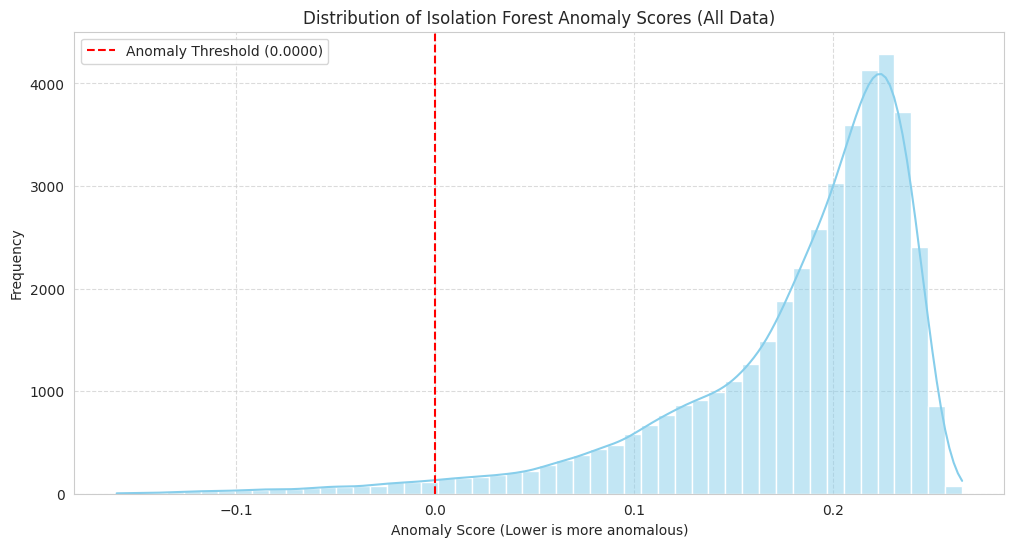

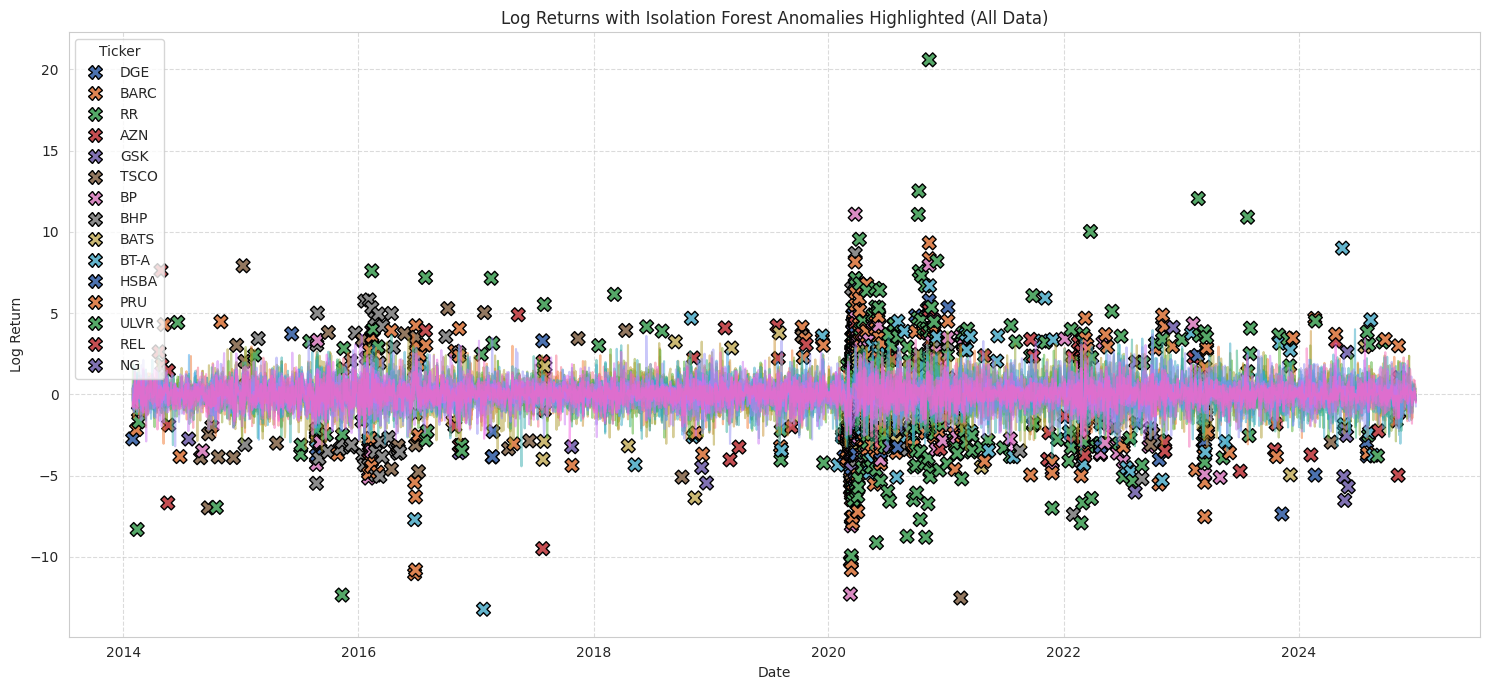

In [25]:
# Visualize the distribution of anomaly scores for FTSE 100 stocks
contamination_rate = 0.01

plt.figure(figsize=(12, 6))
sns.histplot(df100_all_results['iso_forest_anomaly_score'], bins=50, kde=True, color='skyblue')
if iso_forest_model_trained is not None:
    # Calculate threshold from the training scores based on contamination
    # The threshold is the score below which points are considered anomalies.
    # np.percentile takes a percentile value between 0 and 100.
    # The contamination is the *proportion* of outliers, so 100 * contamination is the percentile.
    threshold_val = np.percentile(df100_trained_score['iso_forest_anomaly_score'], (contamination_rate * 100))
    plt.axvline(threshold_val, color='red', linestyle='--', label=f'Anomaly Threshold ({threshold_val:.4f})')
plt.title('Distribution of Isolation Forest Anomaly Scores (All Data)')
plt.xlabel('Anomaly Score (Lower is more anomalous)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualize anomalies over time for a key feature (e.g., log_return)
anomalies_for_plot = df100_all_results[df100_all_results['iso_forest_is_anomaly'] == 1].reset_index()

plt.figure(figsize=(15, 7))
# Plot normal points (e.g., Adjusted Close or a key return feature)
if 'log_return' in df100_all_results.columns:
    sns.lineplot(data=df100_all_results[df100_all_results['iso_forest_is_anomaly'] == 0].reset_index(),
                  x='Date', y='log_return', hue='Ticker', alpha=0.5, legend=False)
    sns.scatterplot(data=anomalies_for_plot,
                    x='Date', y='log_return',
                    hue='Ticker', palette='deep', s=100, marker='X', legend='full',
                    edgecolor='black', linewidth=1)
    plt.title('Log Returns with Isolation Forest Anomalies Highlighted (All Data)')
    plt.xlabel('Date')
    plt.ylabel('Log Return')
else:
    print("Cannot plot 'log_return' as it's not in the DataFrame. Please choose another feature.")
    # Fallback to plotting something else if log_return is not available
    if selected_features:
        sns.lineplot(data=df100_all_results[df100_all_results['iso_forest_is_anomaly'] == 0].reset_index(),
                      x='Date', y=selected_features[0], hue='Ticker', alpha=0.5, legend=False)
        sns.scatterplot(data=anomalies_for_plot,
                        x='Date', y=selected_features[0],
                        hue='Ticker', palette='deep', s=100, marker='X', legend='full') # Removed 'label' argument here
        plt.title(f'{selected_features[0]} with Isolation Forest Anomalies Highlighted (All Data)')
        plt.xlabel('Date')
        plt.ylabel(selected_features[0])
    else:
        print("No features selected for plotting.")

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


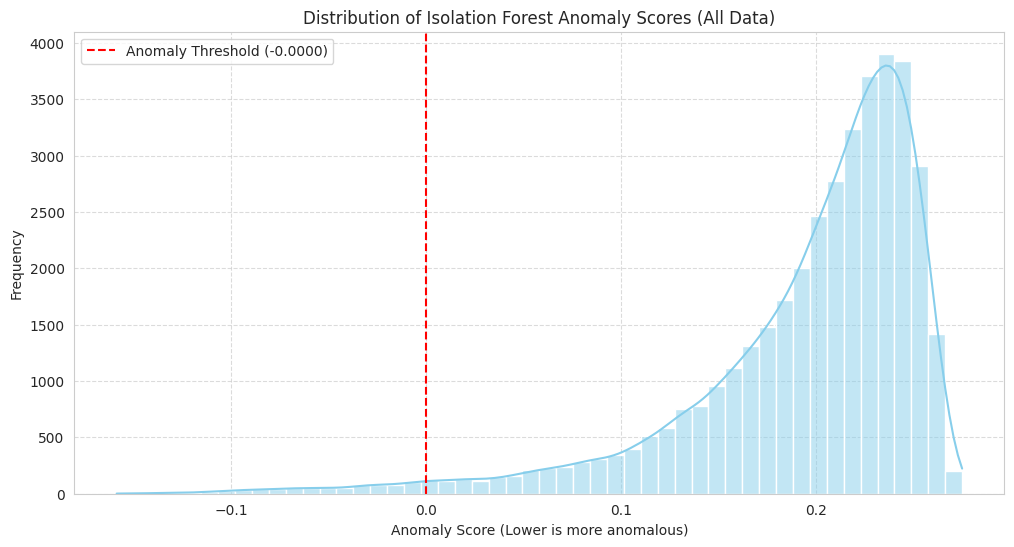

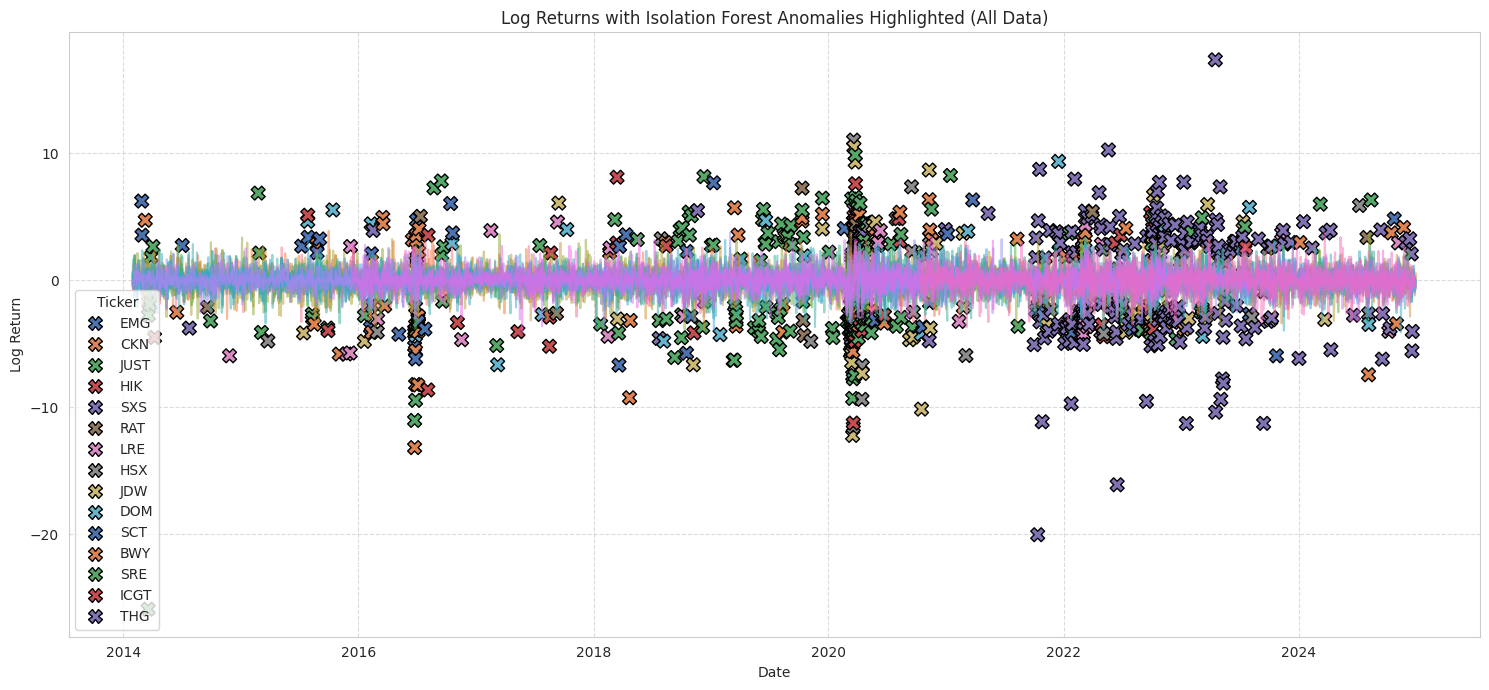

In [26]:
# Visualise the distribution of anomaly scores for FTSE 250 stocks


plt.figure(figsize=(12, 6))
sns.histplot(df250_all_results['iso_forest_anomaly_score'], bins=50, kde=True, color='skyblue')
if iso_forest_model_trained is not None:
    # Calculate threshold from the training scores based on contamination
    # The threshold is the score below which points are considered anomalies.
    # np.percentile takes a percentile value between 0 and 100.
    # The contamination is the *proportion* of outliers, so 100 * contamination is the percentile.
    threshold_val = np.percentile(df250_trained_score['iso_forest_anomaly_score'], (contamination_rate * 100))
    plt.axvline(threshold_val, color='red', linestyle='--', label=f'Anomaly Threshold ({threshold_val:.4f})')
plt.title('Distribution of Isolation Forest Anomaly Scores (All Data)')
plt.xlabel('Anomaly Score (Lower is more anomalous)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Visualize anomalies over time for a key feature (e.g., log_return)
anomalies_for_plot = df250_all_results[df250_all_results['iso_forest_is_anomaly'] == 1].reset_index()

plt.figure(figsize=(15, 7))
# Plot normal points (e.g., Adjusted Close or a key return feature)
if 'log_return' in df250_all_results.columns:
    sns.lineplot(data=df250_all_results[df250_all_results['iso_forest_is_anomaly'] == 0].reset_index(),
                  x='Date', y='log_return', hue='Ticker', alpha=0.5, legend=False)
    sns.scatterplot(data=anomalies_for_plot,
                    x='Date', y='log_return',
                    hue='Ticker', palette='deep', s=100, marker='X', legend='full',
                    edgecolor='black', linewidth=1) # Removed 'label' argument here
    plt.title('Log Returns with Isolation Forest Anomalies Highlighted (All Data)')
    plt.xlabel('Date')
    plt.ylabel('Log Return')
else:
    print("Cannot plot 'log_return' as it's not in the DataFrame. Please choose another feature.")
    # Fallback to plotting something else if log_return is not available
    if selected_features:
        sns.lineplot(data=df250_all_results[df250_all_results['iso_forest_is_anomaly'] == 0].reset_index(),
                      x='Date', y=selected_features[0], hue='Ticker', alpha=0.5, legend=False)
        sns.scatterplot(data=anomalies_for_plot,
                        x='Date', y=selected_features[0],
                        hue='Ticker', palette='deep', s=100, marker='X', legend='full') # Removed 'label' argument here
        plt.title(f'{selected_features[0]} with Isolation Forest Anomalies Highlighted (All Data)')
        plt.xlabel('Date')
        plt.ylabel(selected_features[0])
    else:
        print("No features selected for plotting.")

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Full data with anomalies context shape: (41365, 30)
Is index truly unique in full_data_with_anomalies_context? True

--- Detected Anomalies with Original Context (Total: 957) ---
                     adj close        close         high          low         open       volume  log_return  simple_return  log_adj_close_return  return_5d  return_20d  rolling_std_5d_log_return  rolling_std_20d_log_return  daily_range_norm  garman_klass_vol  volume_change  avg_volume_20d  relative_volume    sma_5d   sma_20d  deviation_from_sma_20d  typical_price  daily_market_mean_log_return  daily_market_median_log_return  deviation_from_daily_mean_return  deviation_from_daily_median_return  daily_return_rank_pct  iso_forest_anomaly_score  iso_forest_anomaly_label  iso_forest_is_anomaly
Date       Ticker                                                                                                                                                                                                               

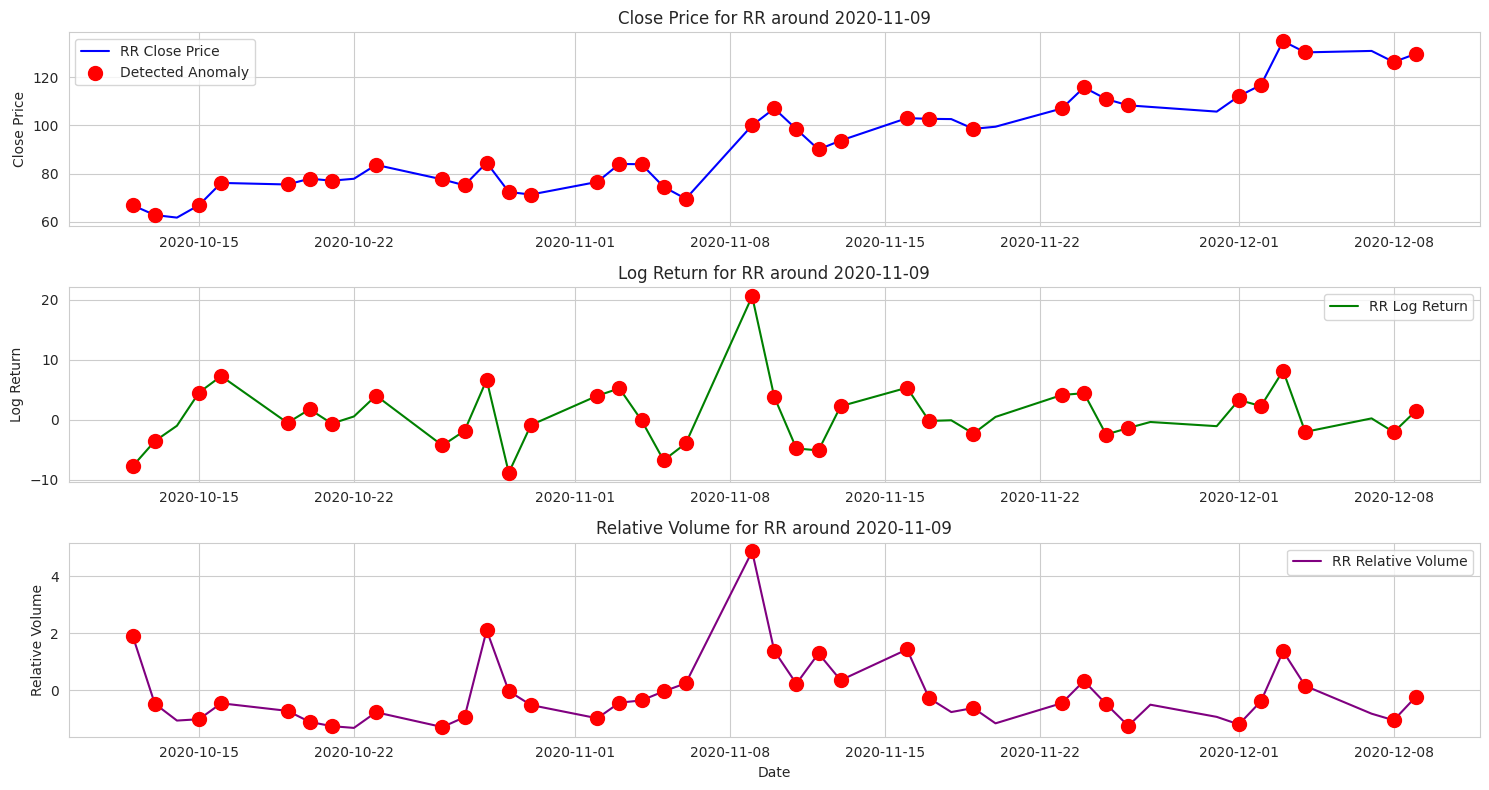


Visualizing anomaly for RR on 2020-10-28


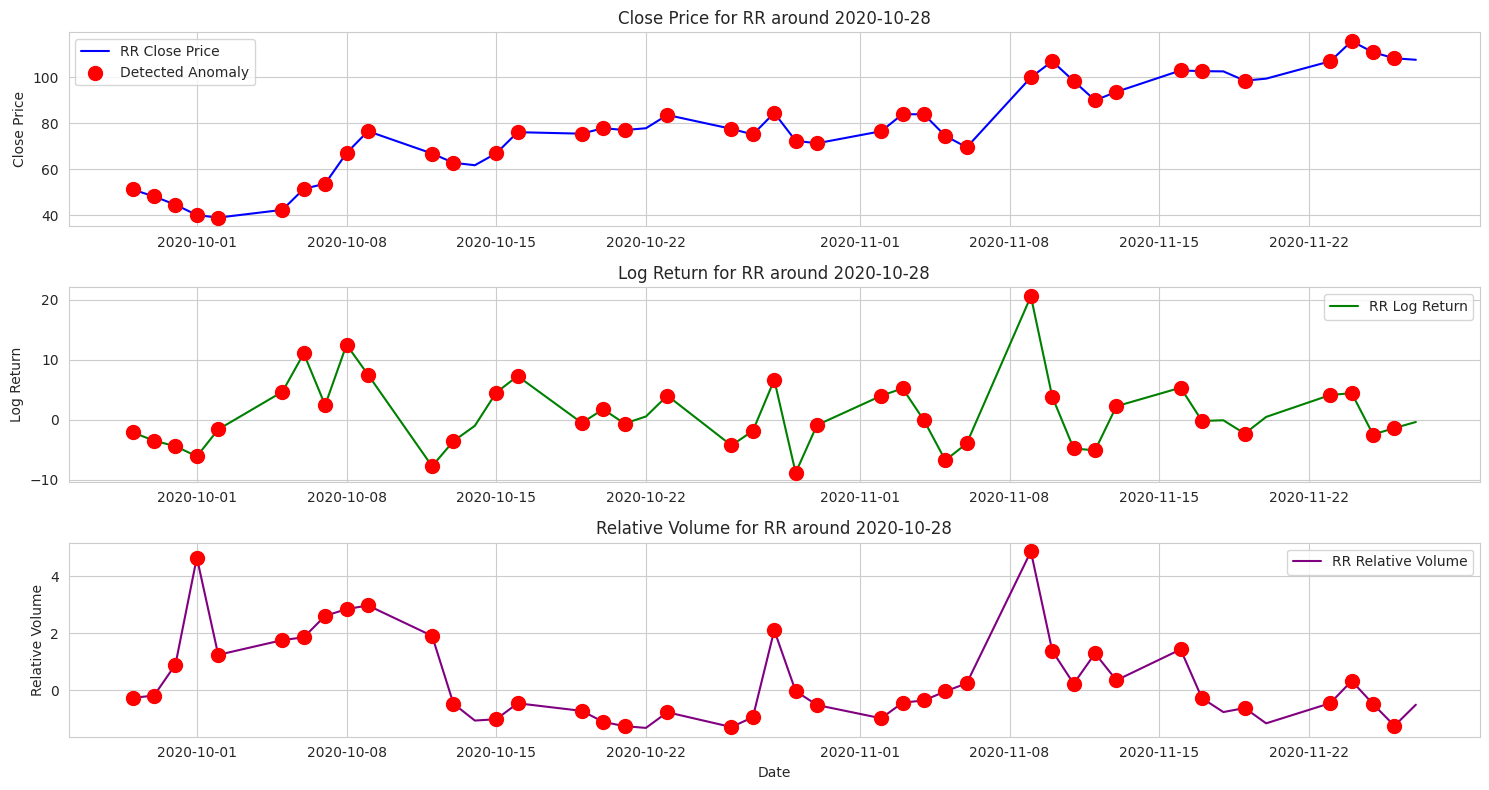


Visualizing anomaly for BP on 2020-03-09


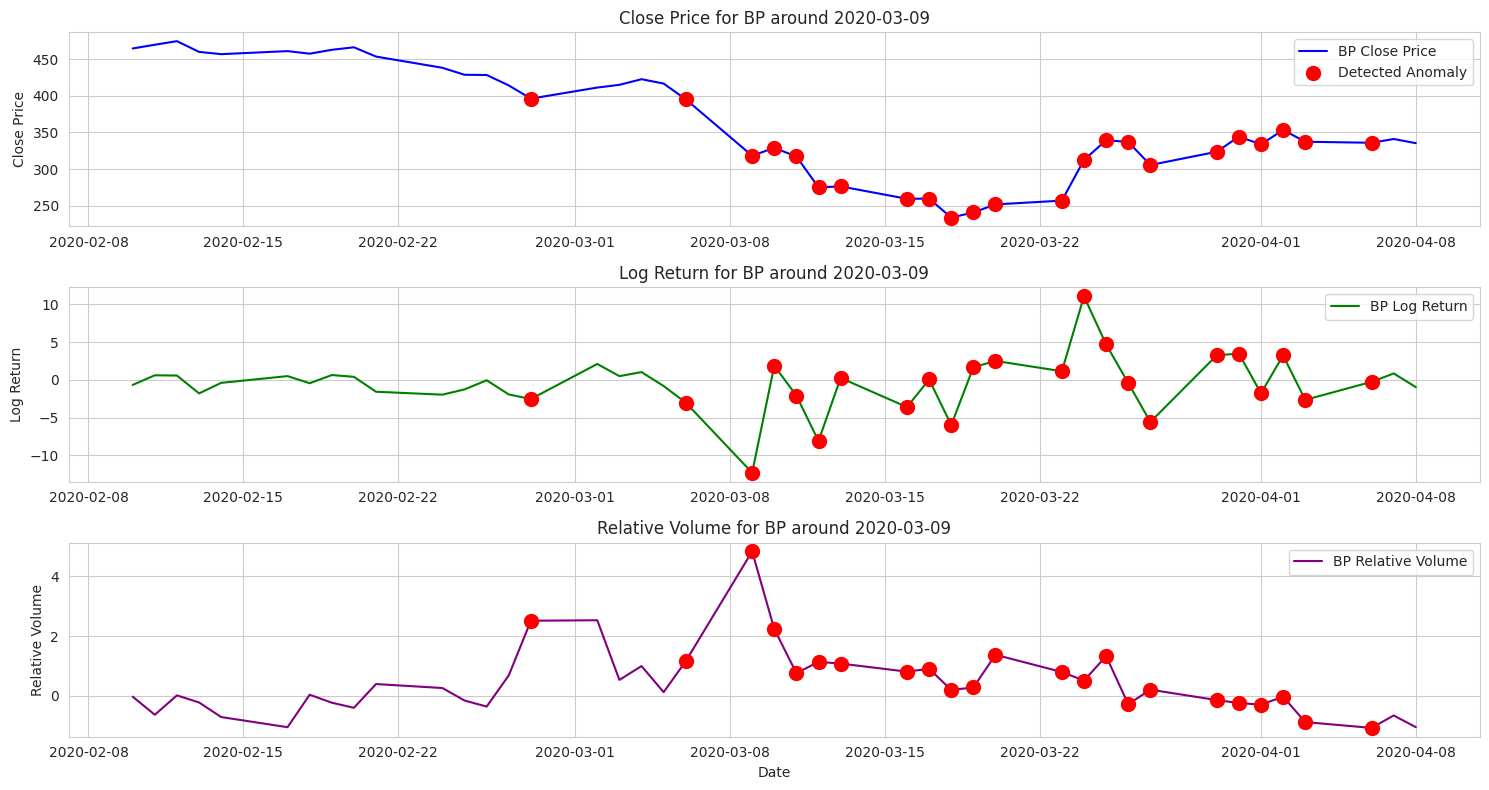

In [27]:
# Combine all scored dataframes (train, val, test)
df100_all_scored = pd.concat([df100_trained_score, df100_val_score, df100_test_score]).sort_index()

# Prepare original_data_for_merge: filter by date range and ensure unique MultiIndex
# This assumes ready_ftse100_data is your original raw data DataFrame.
# It should contain 'close', 'open', 'high', 'low', 'adj close', 'volume'.

# Get the full date range covered by your scored data
min100_date_scored = df100_all_scored.index.get_level_values('Date').min()
max100_date_scored = df100_all_scored.index.get_level_values('Date').max()

original100_data_for_merge = ready_ftse100_data.loc[
(ready_ftse100_data.index.get_level_values('Date') >= min100_date_scored) &
(ready_ftse100_data.index.get_level_values('Date') <= max100_date_scored)
].copy()

# Crucial: Drop duplicates from the MultiIndex if any exist, before any merge operations.
if not original100_data_for_merge.index.is_unique:
  print("Warning: Duplicates found in original_data_for_merge index. Dropping them.")
  original100_data_for_merge = original100_data_for_merge[~original100_data_for_merge.index.duplicated(keep='first')].copy()


# Ensure df_all_scored also has a unique MultiIndex
if not df100_all_scored.index.is_unique:
  print("Warning: Duplicates found in df_all_scored index. Dropping them.")
  df100_all_scored_unique = df100_all_scored[~df100_all_scored.index.duplicated(keep='first')].copy()
else:
  df100_all_scored_unique = df100_all_scored.copy()


# Ensure that both DataFrames have the same index for a clean merge (intersection)
common100_indices = original100_data_for_merge.index.intersection(df100_all_scored_unique.index)

original100_data_aligned = original100_data_for_merge.loc[common100_indices]
scores100_features_aligned = df100_all_scored_unique.loc[common100_indices]


# Perform the merge using `left_index=True` and `right_index=True`
#    This merges directly on the MultiIndex, which is the most stable approach.
#    We are merging the features and anomaly data from scores_features_aligned
#    onto the original raw data from original_data_aligned.

# Columns to take from scores_features_aligned (all columns except base data that might overlap)
# We want the anomaly score and label columns, and potentially other engineered features
# that are not in the raw data but are in df_features.
cols100_to_merge_from_scores = [col for col in scores100_features_aligned.columns
                          if col not in original100_data_aligned.columns or
                          col.startswith('iso_forest_anomaly_') or
                          col == 'iso_forest_is_anomaly']


full100_data_with_anomalies_context = original100_data_aligned.merge(
scores100_features_aligned[cols100_to_merge_from_scores],
left_index=True,  # Merge on the index of the left DataFrame
right_index=True, # Merge on the index of the right DataFrame
how='left'        # Keep all rows from the left DataFrame (original data)
)

print(f"\nFull data with anomalies context shape: {full100_data_with_anomalies_context.shape}")
print(f"Is index truly unique in full_data_with_anomalies_context? {full100_data_with_anomalies_context.index.is_unique}") # Should be True


# Filter and Inspect Anomalies from the Merged DataFrame ---
anomalies100_df_context = full100_data_with_anomalies_context[full100_data_with_anomalies_context['iso_forest_is_anomaly'] == 1].copy()

print(f"\n--- Detected Anomalies with Original Context (Total: {anomalies100_df_context.shape[0]}) ---")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(anomalies100_df_context.sort_values(by='iso_forest_anomaly_score').head(10))


# Visualize Individual Anomalies in Context ---
print("\n--- Visualizing Individual Anomalies with Original Close Price Context ---")

window_days = 30 # Number of days before and after the anomaly date to plot

if not anomalies100_df_context.empty:
# Get top 3 most anomalous points for visualization
  sample100_anomaly_indices = anomalies100_df_context.sort_values(by='iso_forest_anomaly_score').head(3).index.tolist()
else:
  sample100_anomaly_indices = []
  print("No anomalies detected to visualize.")

for anomaly_idx in sample100_anomaly_indices:
  anomaly_date = anomaly_idx[0]
  anomaly_ticker = anomaly_idx[1]

  print(f"\nVisualizing anomaly for {anomaly_ticker} on {anomaly_date.date()}")

  # Select data for this specific ticker across a time window from the full_data_with_anomalies_context
  ticker100_data_for_plot = full100_data_with_anomalies_context.loc[(slice(None), anomaly_ticker), :].droplevel('Ticker')

  start_window = anomaly_date - pd.Timedelta(days=window_days)
  end_window = anomaly_date + pd.Timedelta(days=window_days)

  plot_data = ticker100_data_for_plot.loc[start_window:end_window]

  if plot_data.empty:
      print(f"No data available for {anomaly_ticker} around {anomaly_date.date()} for plotting window.")
      continue

  plt.figure(figsize=(15, 8))

  ax1 = plt.subplot(3, 1, 1)
  ax1.plot(plot_data.index, plot_data['close'], label=f'{anomaly_ticker} Close Price', color='blue')

  anomalies_in_window = plot_data[plot_data['iso_forest_is_anomaly'] == 1]
  if not anomalies_in_window.empty:
      ax1.scatter(anomalies_in_window.index, anomalies_in_window['close'],
                  color='red', s=100, zorder=5, label='Detected Anomaly')

  ax1.set_title(f'Close Price for {anomaly_ticker} around {anomaly_date.date()}')
  ax1.set_ylabel('Close Price')
  ax1.legend()
  ax1.grid(True)

  ax2 = plt.subplot(3, 1, 2, sharex=ax1)
  if 'log_return' in plot_data.columns:
      ax2.plot(plot_data.index, plot_data['log_return'], label=f'{anomaly_ticker} Log Return', color='green')
      if not anomalies_in_window.empty:
          ax2.scatter(anomalies_in_window.index, anomalies_in_window['log_return'], color='red', s=100, zorder=5)
      ax2.set_ylabel('Log Return')
      ax2.set_title(f'Log Return for {anomaly_ticker} around {anomaly_date.date()}')
      ax2.legend()
      ax2.grid(True)
  elif 'relative_volume' in plot_data.columns:
      ax2.plot(plot_data.index, plot_data['relative_volume'], label=f'{anomaly_ticker} Relative Volume', color='purple')
      if not anomalies_in_window.empty:
          ax2.scatter(anomalies_in_window.index, anomalies_in_window['relative_volume'], color='red', s=100, zorder=5)
      ax2.set_ylabel('Relative Volume')
      ax2.set_title(f'Relative Volume for {anomaly_ticker} around {anomaly_date.date()}')
      ax2.legend()
      ax2.grid(True)
  else:
      ax2.text(0.5, 0.5, "No suitable feature for second plot.", horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)


  ax3 = plt.subplot(3, 1, 3, sharex=ax1)
  if 'relative_volume' in plot_data.columns:
      ax3.plot(plot_data.index, plot_data['relative_volume'], label=f'{anomaly_ticker} Relative Volume', color='purple')
      if not anomalies_in_window.empty:
          ax3.scatter(anomalies_in_window.index, anomalies_in_window['relative_volume'], color='red', s=100, zorder=5)
      ax3.set_ylabel('Relative Volume')
      ax3.set_title(f'Relative Volume for {anomaly_ticker} around {anomaly_date.date()}')
  elif 'deviation_from_daily_median_return' in plot_data.columns:
        ax3.plot(plot_data.index, plot_data['deviation_from_daily_median_return'], label=f'{anomaly_ticker} Deviation from Median Daily Return', color='orange')
        if not anomalies_in_window.empty:
          ax3.scatter(anomalies_in_window.index, anomalies_in_window['deviation_from_daily_median_return'], color='red', s=100, zorder=5)
        ax3.set_ylabel('Deviation from Median Daily Return')
        ax3.set_title(f'Deviation from Median Daily Return for {anomaly_ticker} around {anomaly_date.date()}')
  else:
      ax3.text(0.5, 0.5, "No suitable feature for third plot.", horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)

  ax3.set_xlabel('Date')
  ax3.legend()
  ax3.grid(True)

  plt.tight_layout()
  plt.show()


Full data with anomalies context shape: (39164, 30)
Is index truly unique in full_data_with_anomalies_context? True

--- Detected Anomalies with Original Context (Total: 761) ---
                     adj close        close         high          low         open      volume  log_return  simple_return  log_adj_close_return  return_5d  return_20d  rolling_std_5d_log_return  rolling_std_20d_log_return  daily_range_norm  garman_klass_vol  volume_change  avg_volume_20d  relative_volume    sma_5d   sma_20d  deviation_from_sma_20d  typical_price  daily_market_mean_log_return  daily_market_median_log_return  deviation_from_daily_mean_return  deviation_from_daily_median_return  daily_return_rank_pct  iso_forest_anomaly_score  iso_forest_anomaly_label  iso_forest_is_anomaly
Date       Ticker                                                                                                                                                                                                                

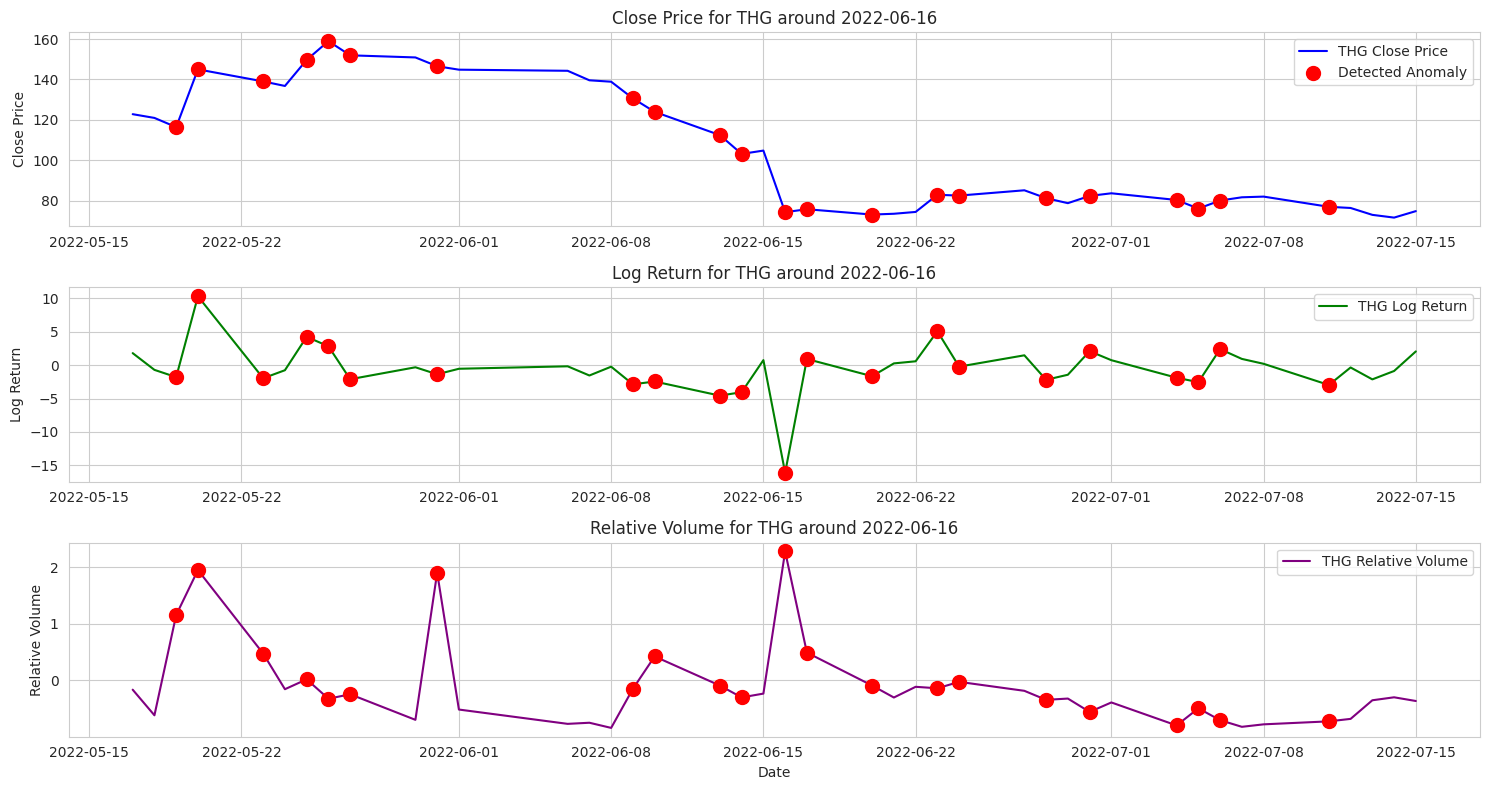


Visualizing anomaly for BWY on 2016-06-24


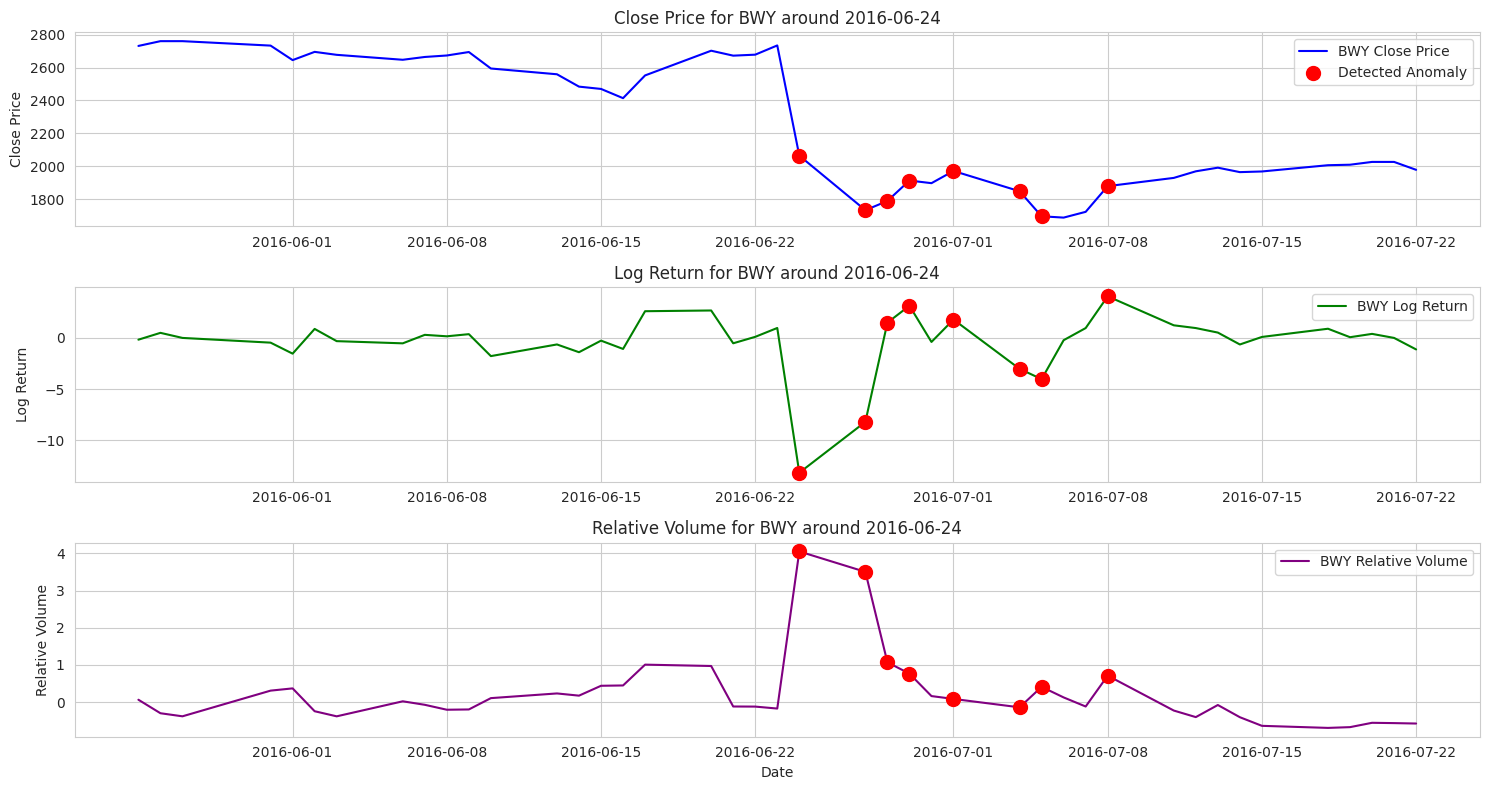


Visualizing anomaly for THG on 2022-01-24


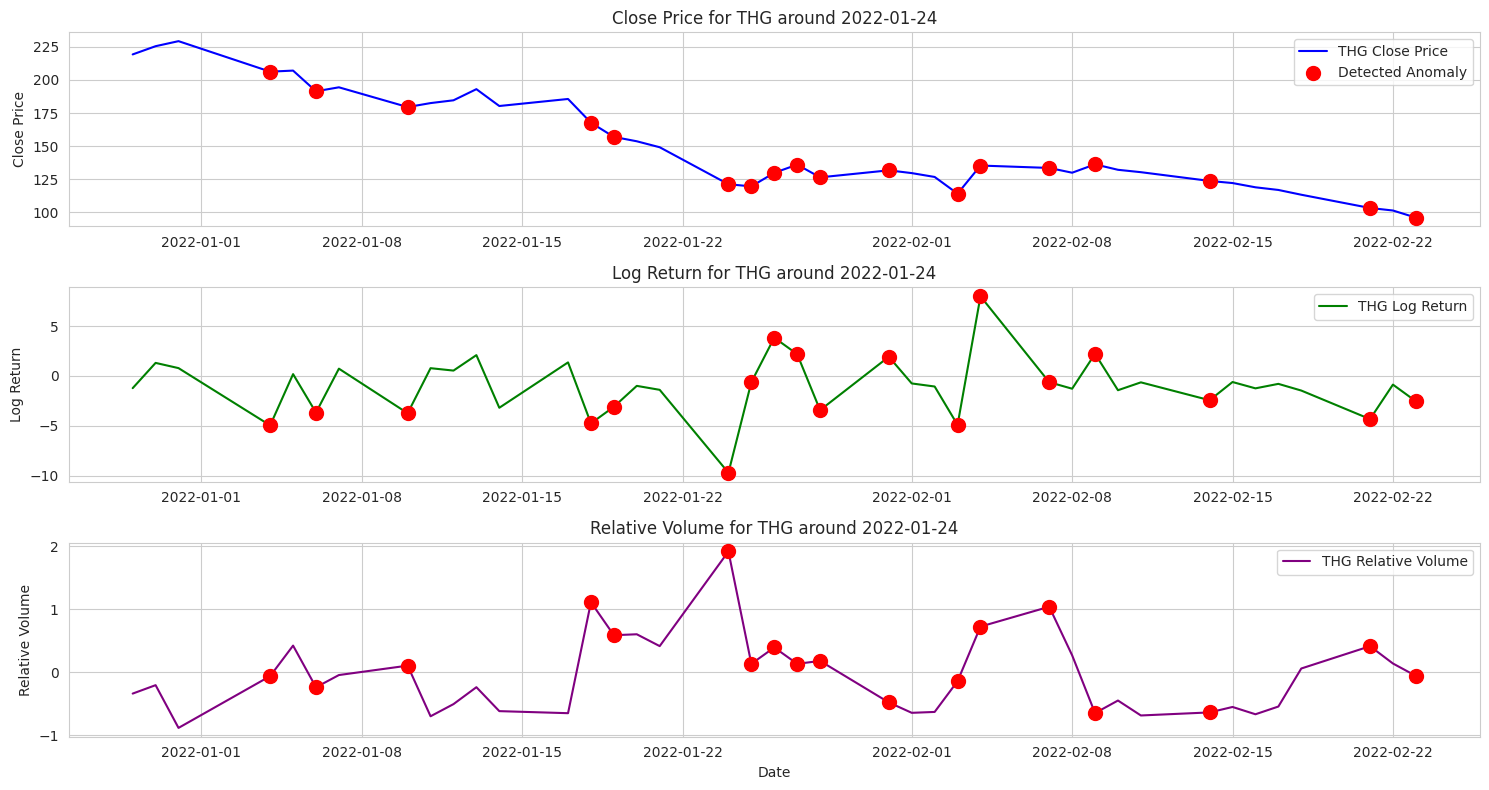

In [28]:
# Combine all scored dataframes (train, val, test)
df250_all_scored = pd.concat([df250_trained_score, df250_val_score, df250_test_score]).sort_index()

# Prepare original_data_for_merge: filter by date range and ensure unique MultiIndex
# This assumes ready_ftse100_data is your original raw data DataFrame.
# It should contain 'close', 'open', 'high', 'low', 'adj close', 'volume'.

# Get the full date range covered by your scored data
min250_date_scored = df250_all_scored.index.get_level_values('Date').min()
max250_date_scored = df250_all_scored.index.get_level_values('Date').max()

original250_data_for_merge = ready_ftse250_data.loc[
(ready_ftse250_data.index.get_level_values('Date') >= min250_date_scored) &
(ready_ftse250_data.index.get_level_values('Date') <= max250_date_scored)
].copy()

# Crucial: Drop duplicates from the MultiIndex if any exist, before any merge operations.
if not original250_data_for_merge.index.is_unique:
  print("Warning: Duplicates found in original_data_for_merge index. Dropping them.")
  original_data_for_merge = original250_data_for_merge[~original250_data_for_merge.index.duplicated(keep='first')].copy()


# Ensure df_all_scored also has a unique MultiIndex
if not df250_all_scored.index.is_unique:
  print("Warning: Duplicates found in df_all_scored index. Dropping them.")
  df250_all_scored_unique = df250_all_scored[~df250_all_scored.index.duplicated(keep='first')].copy()
else:
  df250_all_scored_unique = df250_all_scored.copy()


# Ensure that both DataFrames have the same index for a clean merge (intersection)
common250_indices = original250_data_for_merge.index.intersection(df250_all_scored_unique.index)

original250_data_aligned = original250_data_for_merge.loc[common250_indices]
scores250_features_aligned = df250_all_scored_unique.loc[common250_indices]


#    Perform the merge using `left_index=True` and `right_index=True`
#    This merges directly on the MultiIndex, which is the most stable approach.
#    We are merging the features and anomaly data from scores_features_aligned
#    onto the original raw data from original_data_aligned.

# Columns to take from scores_features_aligned (all columns except base data that might overlap)
# We want the anomaly score and label columns, and potentially other engineered features
# that are not in the raw data but are in df_features.
cols250_to_merge_from_scores = [col for col in scores250_features_aligned.columns
                          if col not in original250_data_aligned.columns or
                          col.startswith('iso_forest_anomaly_') or
                          col == 'iso_forest_is_anomaly']


full250_data_with_anomalies_context = original250_data_aligned.merge(
scores250_features_aligned[cols250_to_merge_from_scores],
left_index=True,  # Merge on the index of the left DataFrame
right_index=True, # Merge on the index of the right DataFrame
how='left'        # Keep all rows from the left DataFrame (original data)
)

print(f"\nFull data with anomalies context shape: {full250_data_with_anomalies_context.shape}")
print(f"Is index truly unique in full_data_with_anomalies_context? {full250_data_with_anomalies_context.index.is_unique}") # Should be True


# --- Filter and Inspect Anomalies from the Merged DataFrame ---
anomalies250_df_context = full250_data_with_anomalies_context[full250_data_with_anomalies_context['iso_forest_is_anomaly'] == 1].copy()

print(f"\n--- Detected Anomalies with Original Context (Total: {anomalies250_df_context.shape[0]}) ---")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(anomalies250_df_context.sort_values(by='iso_forest_anomaly_score').head(10))


# --- Visualise Individual Anomalies in Context ---
print("\n--- Visualising Individual Anomalies with Original Close Price Context ---")

window_days = 30 # Number of days before and after the anomaly date to plot

if not anomalies250_df_context.empty:
# Get top 3 most anomalous points for visualization
  sample250_anomaly_indices = anomalies250_df_context.sort_values(by='iso_forest_anomaly_score').head(3).index.tolist()
else:
  sample250_anomaly_indices = []
  print("No anomalies detected to visualize.")

for anomaly_idx in sample250_anomaly_indices:
  anomaly_date = anomaly_idx[0]
  anomaly_ticker = anomaly_idx[1]

  print(f"\nVisualizing anomaly for {anomaly_ticker} on {anomaly_date.date()}")

  # Select data for this specific ticker across a time window from the full_data_with_anomalies_context
  ticker250_data_for_plot = full250_data_with_anomalies_context.loc[(slice(None), anomaly_ticker), :].droplevel('Ticker')

  start_window = anomaly_date - pd.Timedelta(days=window_days)
  end_window = anomaly_date + pd.Timedelta(days=window_days)

  plot_data = ticker250_data_for_plot.loc[start_window:end_window]

  if plot_data.empty:
      print(f"No data available for {anomaly_ticker} around {anomaly_date.date()} for plotting window.")
      continue

  plt.figure(figsize=(15, 8))

  ax1 = plt.subplot(3, 1, 1)
  ax1.plot(plot_data.index, plot_data['close'], label=f'{anomaly_ticker} Close Price', color='blue')

  anomalies_in_window = plot_data[plot_data['iso_forest_is_anomaly'] == 1]
  if not anomalies_in_window.empty:
      ax1.scatter(anomalies_in_window.index, anomalies_in_window['close'],
                  color='red', s=100, zorder=5, label='Detected Anomaly')

  ax1.set_title(f'Close Price for {anomaly_ticker} around {anomaly_date.date()}')
  ax1.set_ylabel('Close Price')
  ax1.legend()
  ax1.grid(True)

  ax2 = plt.subplot(3, 1, 2, sharex=ax1)
  if 'log_return' in plot_data.columns:
      ax2.plot(plot_data.index, plot_data['log_return'], label=f'{anomaly_ticker} Log Return', color='green')
      if not anomalies_in_window.empty:
          ax2.scatter(anomalies_in_window.index, anomalies_in_window['log_return'], color='red', s=100, zorder=5)
      ax2.set_ylabel('Log Return')
      ax2.set_title(f'Log Return for {anomaly_ticker} around {anomaly_date.date()}')
      ax2.legend()
      ax2.grid(True)
  elif 'relative_volume' in plot_data.columns:
      ax2.plot(plot_data.index, plot_data['relative_volume'], label=f'{anomaly_ticker} Relative Volume', color='purple')
      if not anomalies_in_window.empty:
          ax2.scatter(anomalies_in_window.index, anomalies_in_window['relative_volume'], color='red', s=100, zorder=5)
      ax2.set_ylabel('Relative Volume')
      ax2.set_title(f'Relative Volume for {anomaly_ticker} around {anomaly_date.date()}')
      ax2.legend()
      ax2.grid(True)
  else:
      ax2.text(0.5, 0.5, "No suitable feature for second plot.", horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)


  ax3 = plt.subplot(3, 1, 3, sharex=ax1)
  if 'relative_volume' in plot_data.columns:
      ax3.plot(plot_data.index, plot_data['relative_volume'], label=f'{anomaly_ticker} Relative Volume', color='purple')
      if not anomalies_in_window.empty:
          ax3.scatter(anomalies_in_window.index, anomalies_in_window['relative_volume'], color='red', s=100, zorder=5)
      ax3.set_ylabel('Relative Volume')
      ax3.set_title(f'Relative Volume for {anomaly_ticker} around {anomaly_date.date()}')
  elif 'deviation_from_daily_median_return' in plot_data.columns:
        ax3.plot(plot_data.index, plot_data['deviation_from_daily_median_return'], label=f'{anomaly_ticker} Deviation from Median Daily Return', color='orange')
        if not anomalies_in_window.empty:
          ax3.scatter(anomalies_in_window.index, anomalies_in_window['deviation_from_daily_median_return'], color='red', s=100, zorder=5)
        ax3.set_ylabel('Deviation from Median Daily Return')
        ax3.set_title(f'Deviation from Median Daily Return for {anomaly_ticker} around {anomaly_date.date()}')
  else:
      ax3.text(0.5, 0.5, "No suitable feature for third plot.", horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)

  ax3.set_xlabel('Date')
  ax3.legend()
  ax3.grid(True)

  plt.tight_layout()
  plt.show()

In [29]:
#Function to analyze anomalies

def analyze_and_visualise_anomalies(
    anomalies_df_multiindex: pd.DataFrame,
    full_eval_data_with_anomalies_multiindex: pd.DataFrame,
    num_top_anomalies_to_plot: int = 5,
    window_days_for_plot: int = 40
):
    """
    Performs detailed analysis and visualization of detected anomalies.

    Args:
        anomalies_df_multiindex (pd.DataFrame): DataFrame containing only the data points
                                               identified as anomalies (from Isolation Forest).
                                               Must have MultiIndex (Date, Ticker).
        full_eval_data_with_anomalies_multiindex (pd.DataFrame): The complete evaluation DataFrame
                                                                 with all features, original data,
                                                                 and anomaly scores/labels (both normal and anomalous points).
                                                                 Must have MultiIndex (Date, Ticker).
        num_top_anomalies_to_plot (int): Number of top (most anomalous) events to plot in detail.
        window_days_for_plot (int): Number of calendar days before and after an anomaly
                                    to show in time-series plots for context.
    """
    if anomalies_df_multiindex.empty:
        print("No anomalies detected. Skipping analysis and visualization.")
        return

    print("\n--- Starting Anomaly Analysis and Visualization ---")

    # Set display options for full column view in print statements
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    sns.set_style("whitegrid")

    # --- Flatten DataFrames to have Date/Ticker as regular columns ---
    # This makes subsequent operations (feature selection, plotting) much more consistent.
    full_eval_data_flat = full_eval_data_with_anomalies_multiindex.reset_index().copy()
    anomalies_df_flat = anomalies_df_multiindex.reset_index().copy()

    # --- Overall Anomaly Summary ---
    total_anomalies = anomalies_df_flat.shape[0]
    print(f"\n1. Overall Anomaly Summary:")
    print(f"Total anomalies detected: {total_anomalies}")

    print("\nTop 10 Tickers with Most Anomalies:")
    print(anomalies_df_flat['Ticker'].value_counts().head(10))

    print("\nMost Anomalous Events (Top 10 by Score - Lower is More Anomalous):")
    print(anomalies_df_multiindex.sort_values(by='iso_forest_anomaly_score').head(10))

    # --- Distribution of Anomaly Scores (for Anomalies Only) ---
    plt.figure(figsize=(10, 6))
    sns.histplot(anomalies_df_flat['iso_forest_anomaly_score'], kde=True, bins=30, color='red')
    plt.title('Distribution of Anomaly Scores for Detected Anomalies')
    plt.xlabel('Anomaly Score (Lower = More Anomalous)')
    plt.ylabel('Count')
    plt.show()

    # --- Feature Comparison: Anomalies vs. Normal Data (Box Plots) ---
    print("\n3. Feature Comparison: Anomalies vs. Normal Data (Box Plots):")

    # Corrected way to get feature columns when DataFrame has a flat index and Date/Ticker are columns
    # Get all numerical columns that are NOT Date, Ticker, or anomaly scores/labels, or original base columns.
    feature_cols = [col for col in full_eval_data_flat.columns
                    if pd.api.types.is_numeric_dtype(full_eval_data_flat[col]) # Ensure numerical
                    and col not in ['Date', 'Ticker', 'iso_forest_anomaly_score', 'iso_forest_anomaly_label', 'iso_forest_is_anomaly']
                    and col not in ['open', 'high', 'low', 'close', 'adj close', 'volume']] # Exclude raw original data if desired

    # Select a diverse sample of actual features for comparison
    comparison_features = ['log_return', 'rolling_std_20d_log_return', 'relative_volume', 'deviation_from_daily_median_return']
    existing_comparison_features = [f for f in comparison_features if f in feature_cols]

    if not existing_comparison_features:
        # Fallback: if specific features aren't found, pick first few numerical features
        existing_comparison_features = feature_cols[:min(5, len(feature_cols))]
        print(f" Using a fallback list of {len(existing_comparison_features)} features for comparison plots.")

    if not existing_comparison_features:
        print(" No suitable features found for comparison plots after all filters. Skipping.")
    else:
        # Use the flattened DataFrame directly for plotting box plots
        fig, axes = plt.subplots(len(existing_comparison_features), 1, figsize=(12, 5 * len(existing_comparison_features)))
        if len(existing_comparison_features) == 1: axes = [axes] # Ensure axes is iterable for single plot

        for i, feature in enumerate(existing_comparison_features):
            sns.boxplot(x='iso_forest_is_anomaly', y=feature, data=full_eval_data_flat, ax=axes[i])
            axes[i].set_title(f'Distribution of {feature} for Normal (0) vs. Anomaly (1)')
            axes[i].set_xlabel('Is Anomaly (0=Normal, 1=Anomaly)')
            axes[i].set_ylabel(feature)
        plt.tight_layout()
        plt.show()

    # --- Anomaly Frequency Over Time ---
    print("\n4. Anomaly Frequency Over Time:")
    # Using the flat DataFrame for value_counts on the 'Date' column
    anomalies_per_day = anomalies_df_flat['Date'].value_counts().sort_index()
    if not anomalies_per_day.empty:
        plt.figure(figsize=(15, 6))
        anomalies_per_day.plot(kind='line', marker='o', linestyle='-', color='red')
        plt.title('Number of Anomalies Detected Per Day')
        plt.xlabel('Date')
        plt.ylabel('Number of Anomalies')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("No daily anomaly counts to plot.")

    # --- Detailed Time-Series Plots for Top N Anomalies ---
    print(f"\n5. Detailed Time-Series Plots for Top {num_top_anomalies_to_plot} Anomalies:")

    # Get the indices (Date, Ticker) of the top N most anomalous points from the original MultiIndex anomalies_df
    top_anomaly_indices = anomalies_df_multiindex.sort_values(by='iso_forest_anomaly_score').head(num_top_anomalies_to_plot).index.tolist()

    if not top_anomaly_indices:
        print("No top anomalies to plot in detail.")
        return

    # Use the flattened full_eval_data_flat for plotting, as it has Date/Ticker as columns
    plot_source_df_flat = full_eval_data_flat.copy()

    # Ensure essential plot columns exist
    required_plot_cols = ['close', 'log_return', 'relative_volume']
    if not all(col in plot_source_df_flat.columns for col in required_plot_cols):
        print(f"Error: Missing one or more required plotting columns ({', '.join(required_plot_cols)}) in the main DataFrame. Skipping detailed plots.")
        return

    for anomaly_idx in tqdm(top_anomaly_indices, desc="Plotting Top Anomalies"):
        anomaly_date = anomaly_idx[0]
        anomaly_ticker = anomaly_idx[1]

        print(f"\nVisualising anomaly for {anomaly_ticker} on {anomaly_date.date()}")

        # Filter the flat DataFrame for plotting by Date and Ticker columns
        ticker_data_for_plot_flat = plot_source_df_flat[
            (plot_source_df_flat['Ticker'] == anomaly_ticker) &
            (plot_source_df_flat['Date'] >= (anomaly_date - pd.Timedelta(days=window_days_for_plot))) &
            (plot_source_df_flat['Date'] <= (anomaly_date + pd.Timedelta(days=window_days_for_plot)))
        ].copy()

        # Temporarily set index to Date for plotting, as plot functions usually prefer this
        plot_data = ticker_data_for_plot_flat.set_index('Date').sort_index()

        if plot_data.empty:
            print(f"No data available for {anomaly_ticker} around {anomaly_date.date()} for plotting window. Skipping.")
            continue

        plt.figure(figsize=(15, 10))

        # Subplot 1: Close Price with Anomaly Highlight
        ax1 = plt.subplot(3, 1, 1)
        ax1.plot(plot_data.index, plot_data['close'], label=f'{anomaly_ticker} Close Price', color='blue')

        anomalies_in_window = plot_data[plot_data['iso_forest_is_anomaly'] == 1]
        if not anomalies_in_window.empty:
            ax1.scatter(anomalies_in_window.index, anomalies_in_window['close'],
                        color='red', s=100, zorder=5, label='Detected Anomaly')

        ax1.set_title(f'Close Price for {anomaly_ticker} around {anomaly_date.date()}')
        ax1.set_ylabel('Close Price')
        ax1.legend()
        ax1.grid(True)

        # Subplot 2: Log Return with Anomaly Highlight
        ax2 = plt.subplot(3, 1, 2, sharex=ax1) # Share x-axis to align dates
        ax2.plot(plot_data.index, plot_data['log_return'], label=f'{anomaly_ticker} Log Return', color='green')
        if not anomalies_in_window.empty:
            ax2.scatter(anomalies_in_window.index, anomalies_in_window['log_return'], color='red', s=100, zorder=5)
        ax2.set_ylabel('Log Return')
        ax2.set_title(f'Log Return for {anomaly_ticker} around {anomaly_date.date()}')
        ax2.legend()
        ax2.grid(True)

        # Subplot 3: Relative Volume with Anomaly Highlight
        ax3 = plt.subplot(3, 1, 3, sharex=ax1) # Share x-axis to align dates
        ax3.plot(plot_data.index, plot_data['relative_volume'], label=f'{anomaly_ticker} Relative Volume', color='purple')
        if not anomalies_in_window.empty:
            ax3.scatter(anomalies_in_window.index, anomalies_in_window['relative_volume'], color='red', s=100, zorder=5)
        ax3.set_ylabel('Relative Volume')
        ax3.set_title(f'Relative Volume for {anomaly_ticker} around {anomaly_date.date()}')
        ax3.set_xlabel('Date')
        ax3.legend()
        ax3.grid(True)

        plt.tight_layout()
        plt.show()

    print("\n--- Anomaly Analysis and Visualization Complete ---")




--- Starting Anomaly Analysis and Visualization ---

1. Overall Anomaly Summary:
Total anomalies detected: 957

Top 10 Tickers with Most Anomalies:
Ticker
RR      243
BARC    122
AZN      95
PRU      82
BP       80
BHP      75
BT-A     65
TSCO     38
BATS     32
HSBA     27
Name: count, dtype: int64

Most Anomalous Events (Top 10 by Score - Lower is More Anomalous):
                     adj close        close         high          low         open       volume  log_return  simple_return  log_adj_close_return  return_5d  return_20d  rolling_std_5d_log_return  rolling_std_20d_log_return  daily_range_norm  garman_klass_vol  volume_change  avg_volume_20d  relative_volume    sma_5d   sma_20d  deviation_from_sma_20d  typical_price  daily_market_mean_log_return  daily_market_median_log_return  deviation_from_daily_mean_return  deviation_from_daily_median_return  daily_return_rank_pct  iso_forest_anomaly_score  iso_forest_anomaly_label  iso_forest_is_anomaly
Date       Ticker                 

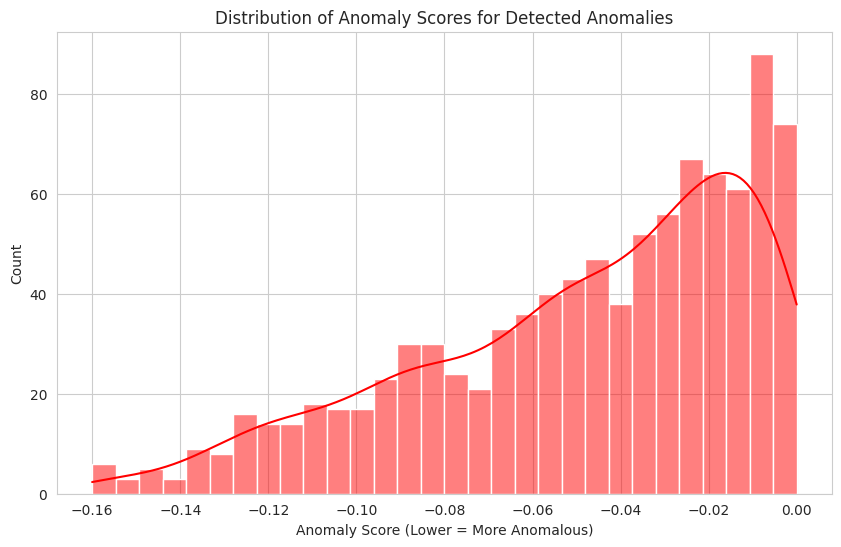


3. Feature Comparison: Anomalies vs. Normal Data (Box Plots):


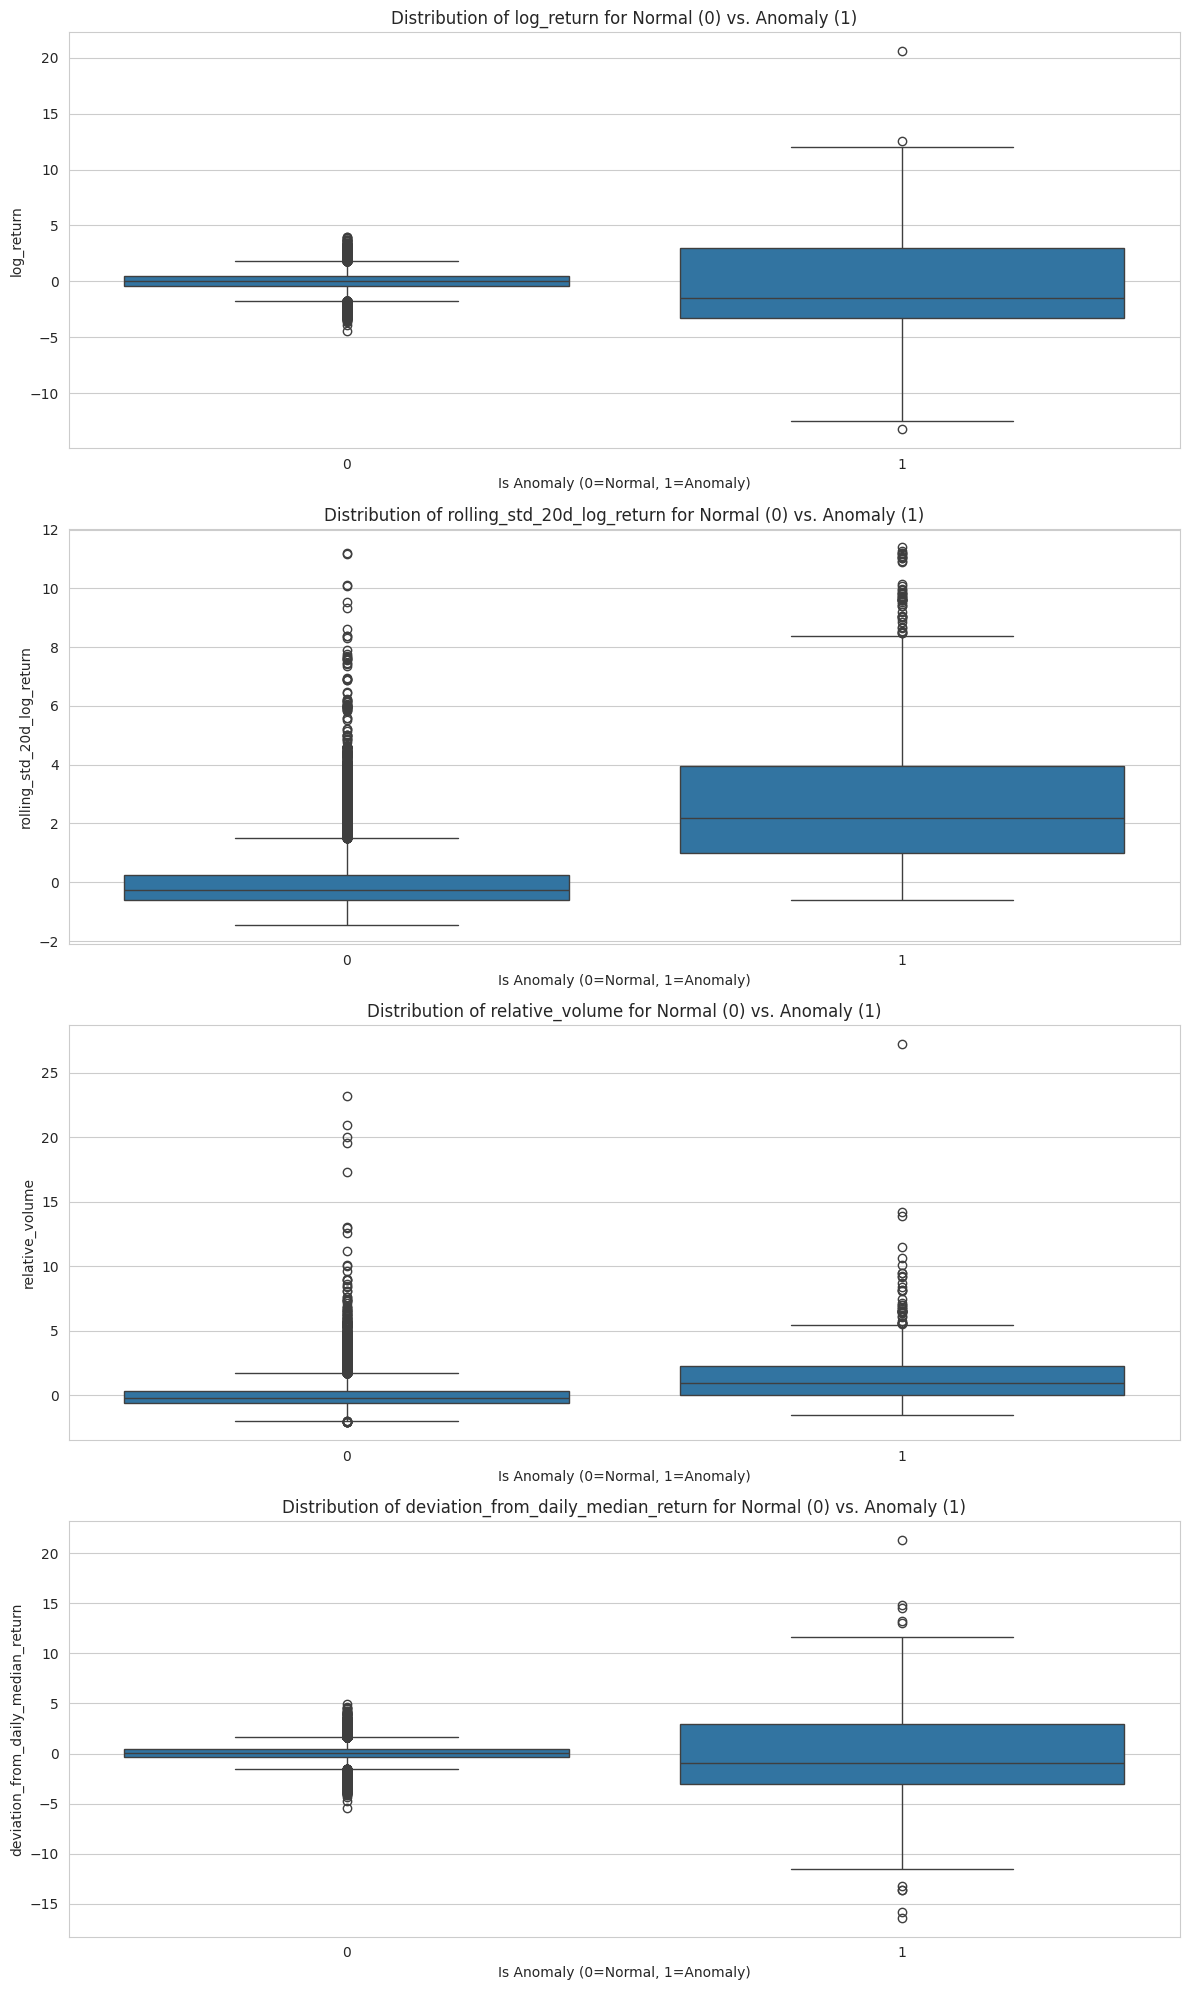


4. Anomaly Frequency Over Time:


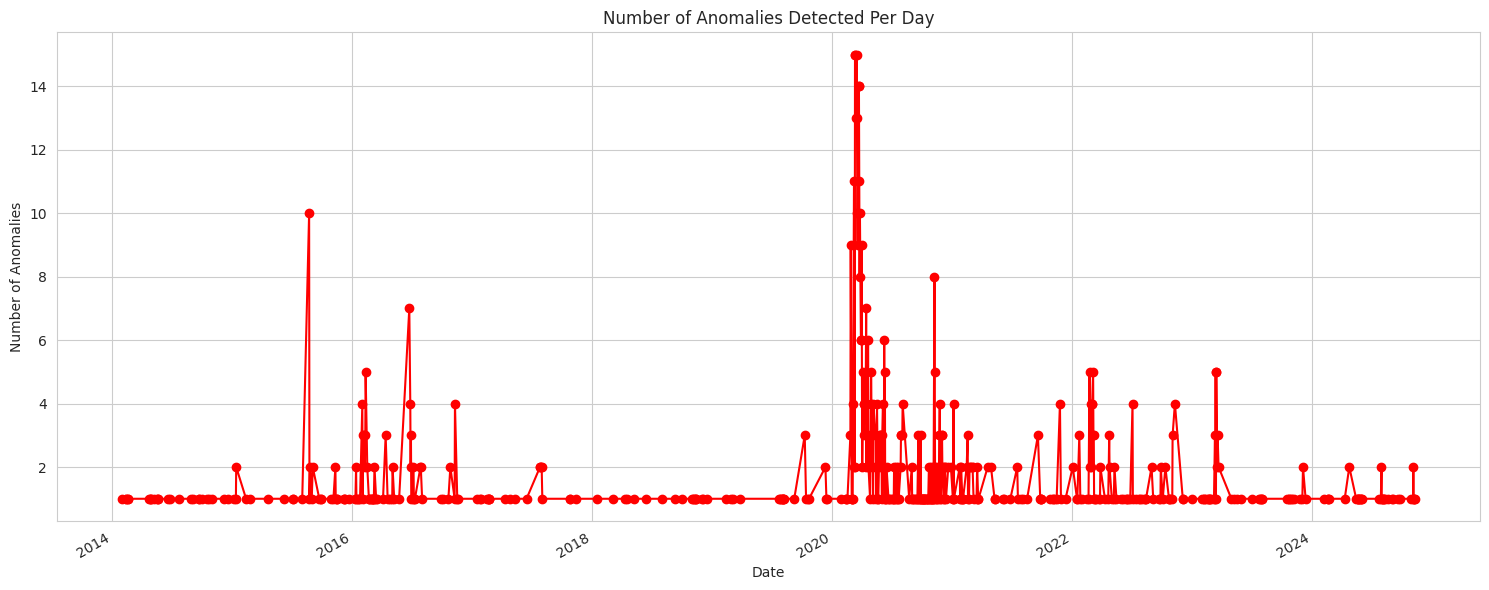


5. Detailed Time-Series Plots for Top 5 Anomalies:


Plotting Top Anomalies:   0%|          | 0/5 [00:00<?, ?it/s]


Visualising anomaly for RR on 2020-11-09


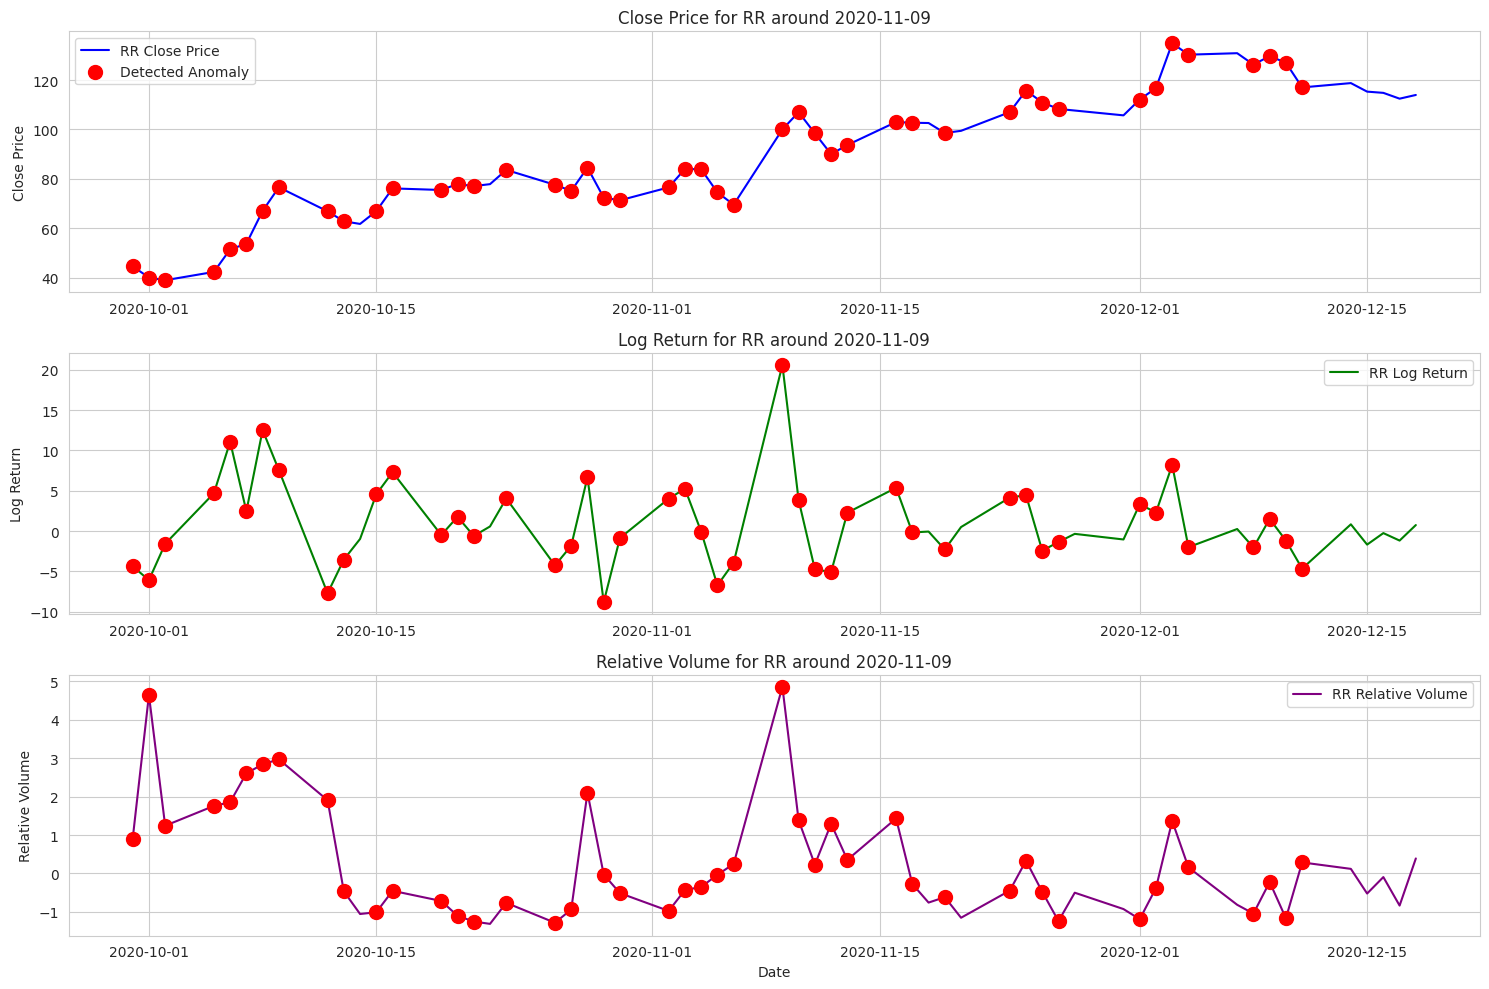

Plotting Top Anomalies:  20%|██        | 1/5 [00:00<00:03,  1.30it/s]


Visualising anomaly for RR on 2020-10-28


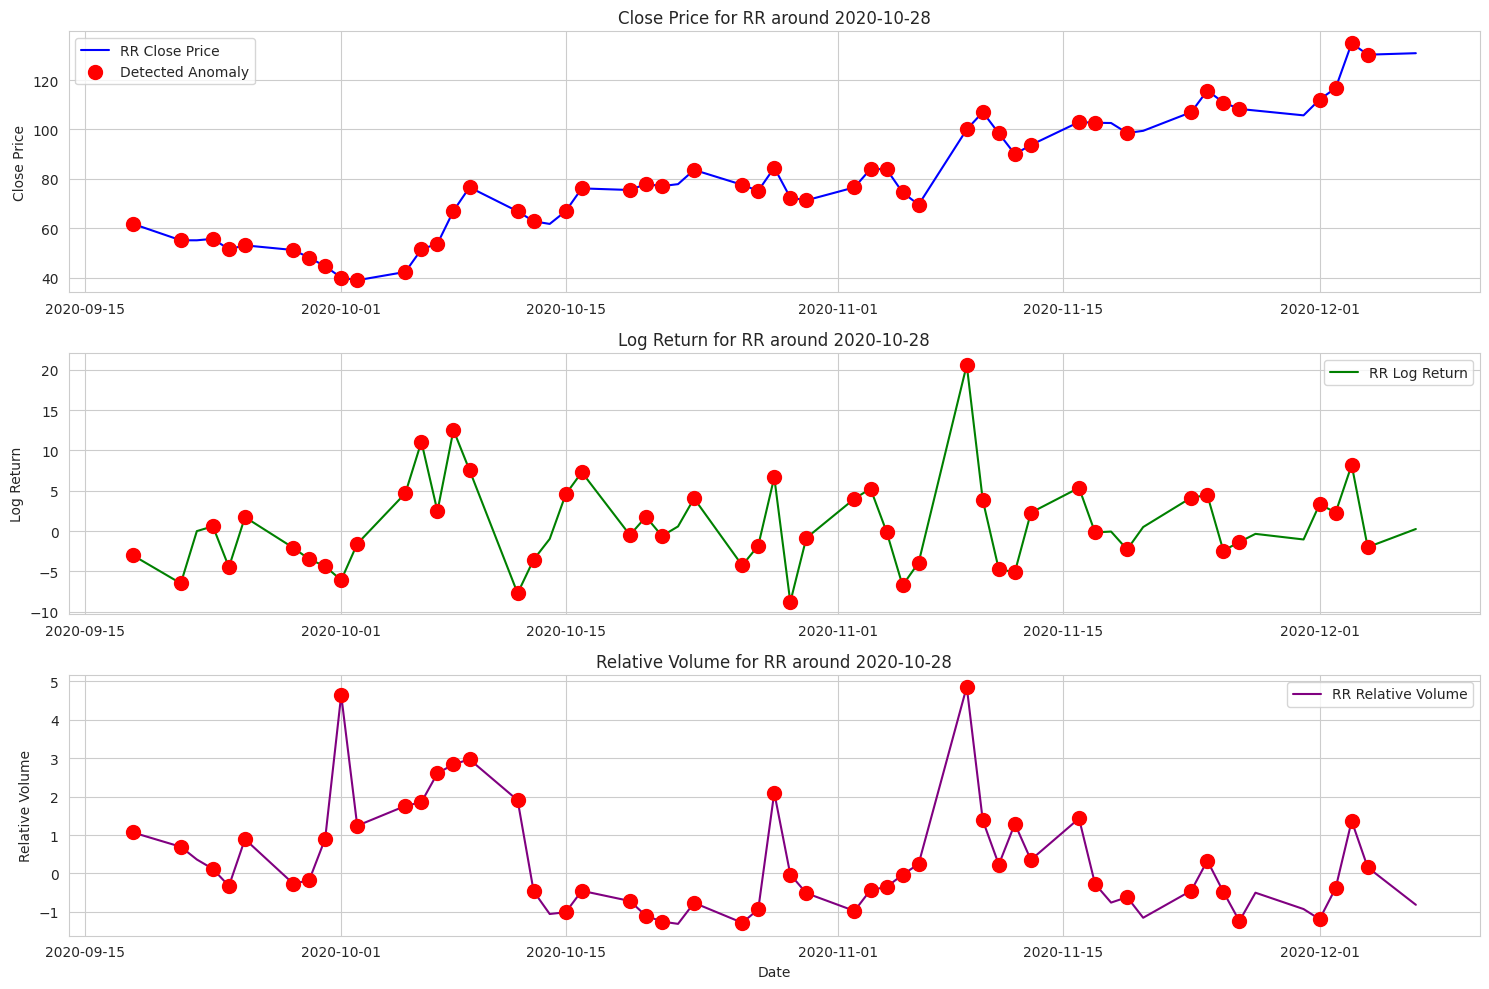

Plotting Top Anomalies:  40%|████      | 2/5 [00:01<00:02,  1.24it/s]


Visualising anomaly for BP on 2020-03-09


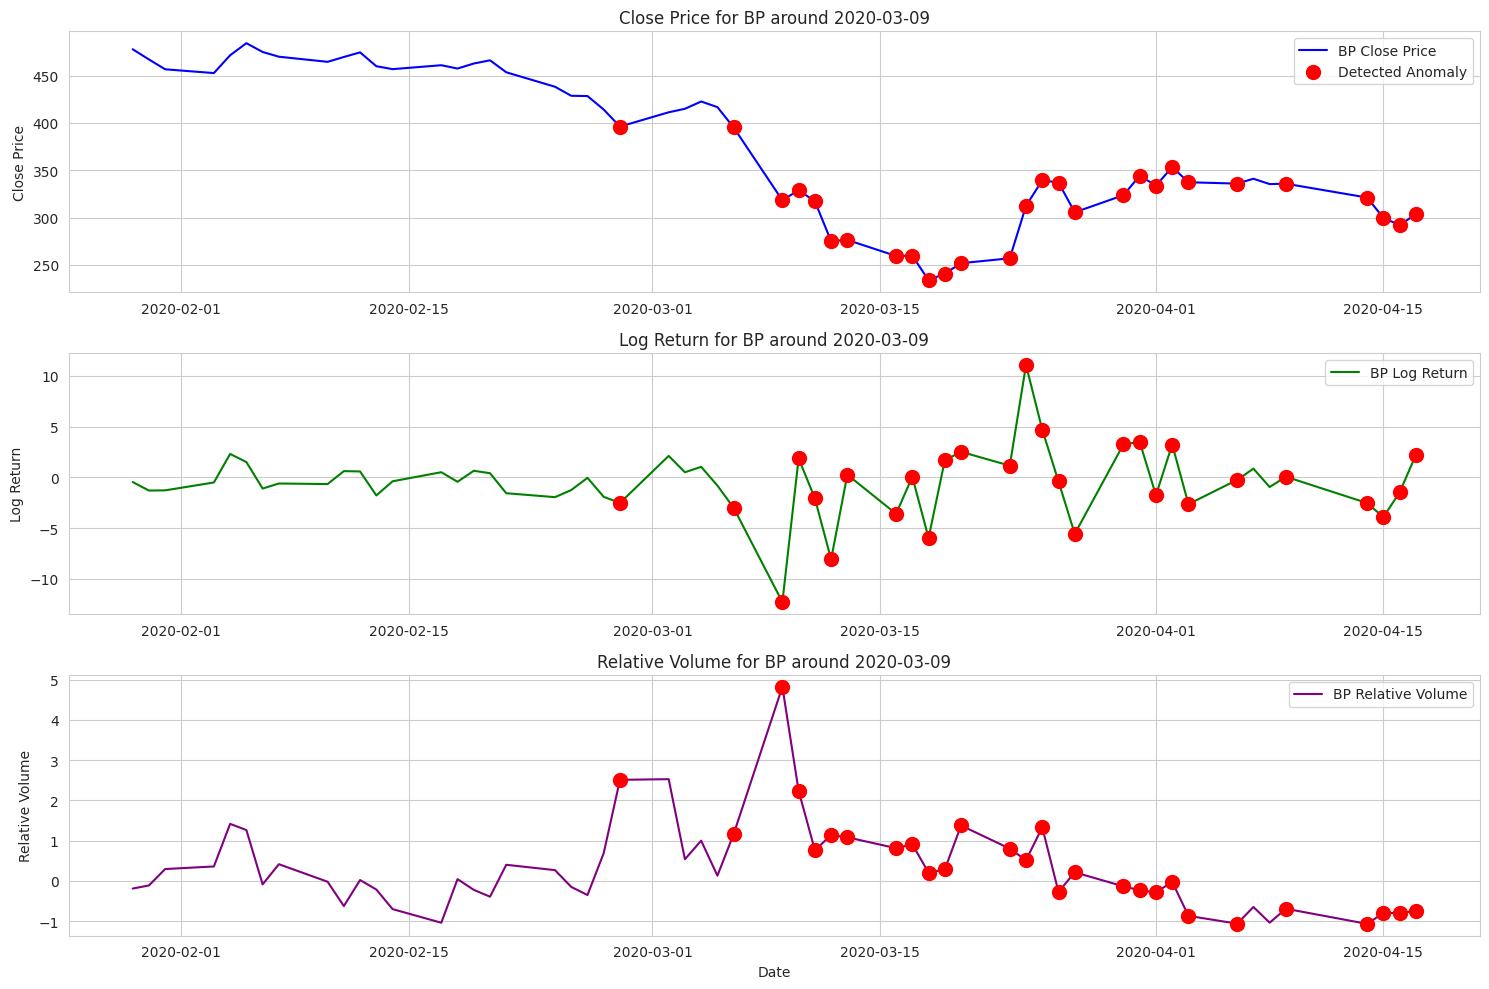

Plotting Top Anomalies:  60%|██████    | 3/5 [00:02<00:01,  1.42it/s]


Visualising anomaly for RR on 2023-02-23


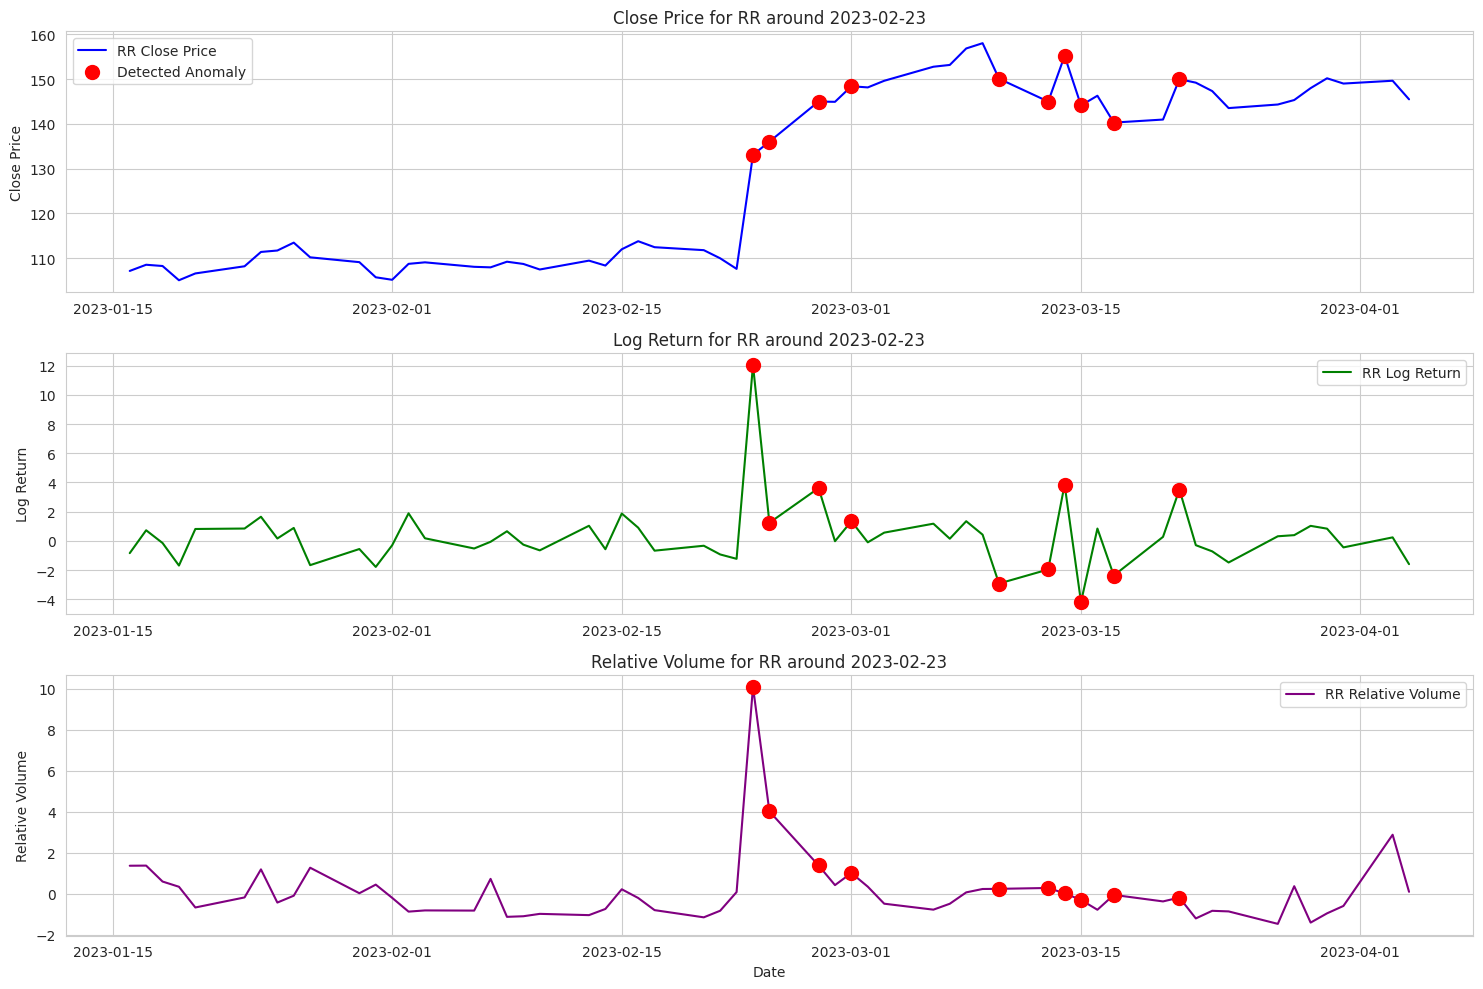

Plotting Top Anomalies:  80%|████████  | 4/5 [00:02<00:00,  1.54it/s]


Visualising anomaly for BARC on 2016-06-27


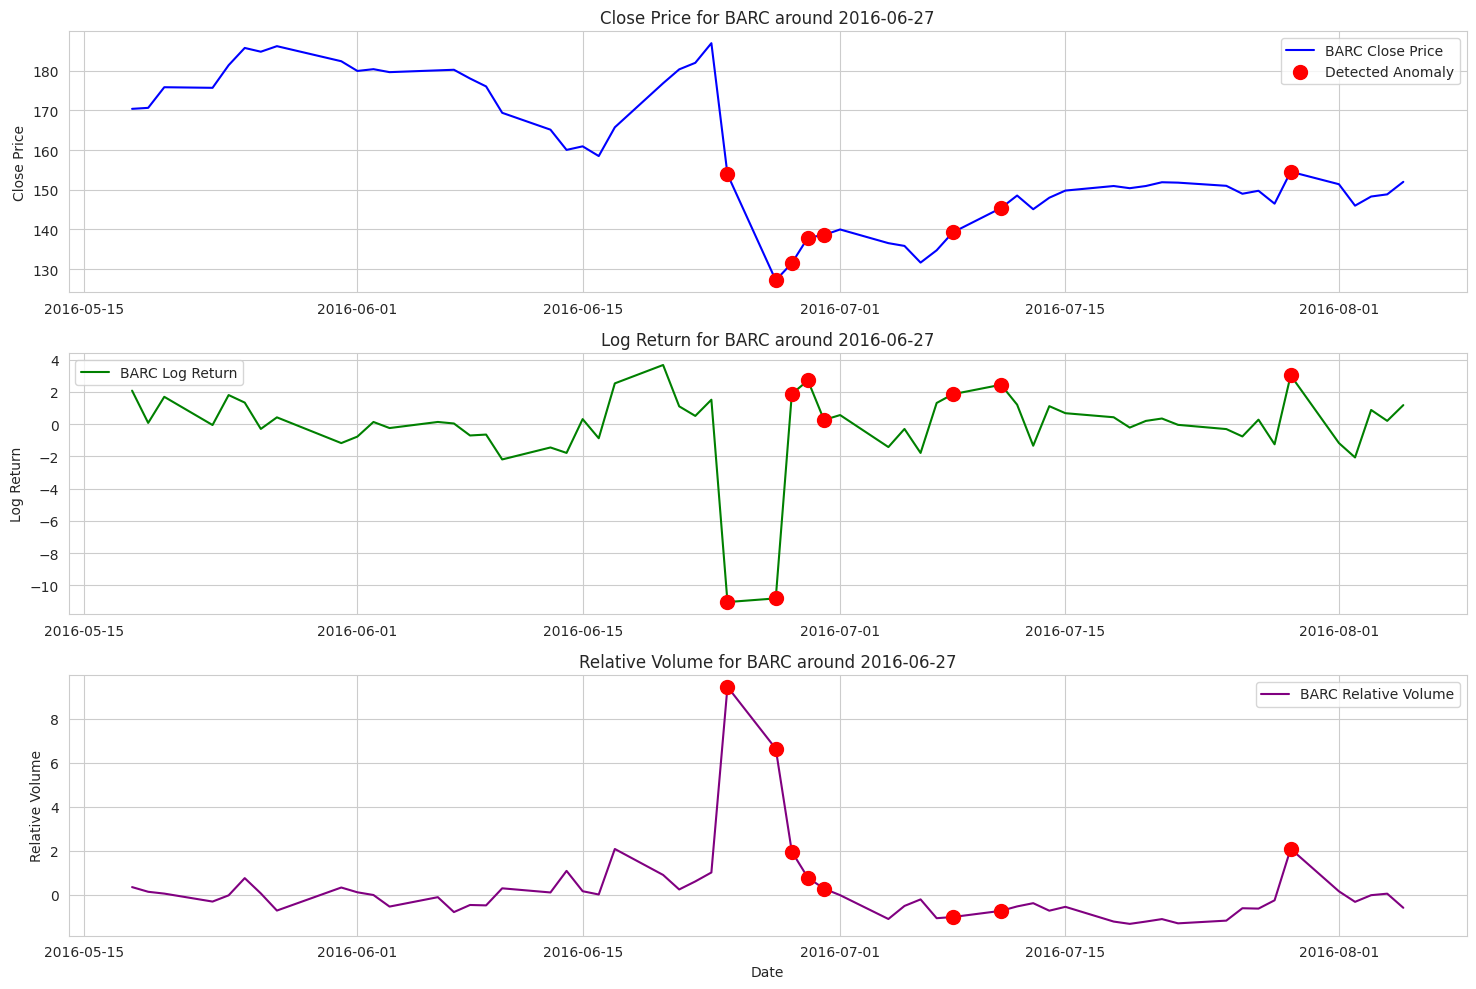

Plotting Top Anomalies: 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


--- Anomaly Analysis and Visualization Complete ---


In [ ]:

    # Filter anomalies for visualization for FTSE 100 stocks
    anomalies100_df_context = full100_data_with_anomalies_context[full100_data_with_anomalies_context['iso_forest_is_anomaly'] == 1].copy()

    # --- Call the analyze_and_visualize_anomalies function ---
    analyze_and_visualise_anomalies(
        anomalies_df_multiindex=anomalies100_df_context,
        full_eval_data_with_anomalies_multiindex=full100_data_with_anomalies_context,
        num_top_anomalies_to_plot=5,  # You can adjust this number
        window_days_for_plot=40       # You can adjust this number
    )


--- Starting Anomaly Analysis and Visualization ---

1. Overall Anomaly Summary:
Total anomalies detected: 761

Top 10 Tickers with Most Anomalies:
Ticker
THG     218
JUST    130
JDW      59
CKN      49
BWY      43
HSX      35
LRE      32
EMG      30
HIK      28
SRE      25
Name: count, dtype: int64

Most Anomalous Events (Top 10 by Score - Lower is More Anomalous):
                     adj close        close         high          low         open      volume  log_return  simple_return  log_adj_close_return  return_5d  return_20d  rolling_std_5d_log_return  rolling_std_20d_log_return  daily_range_norm  garman_klass_vol  volume_change  avg_volume_20d  relative_volume    sma_5d   sma_20d  deviation_from_sma_20d  typical_price  daily_market_mean_log_return  daily_market_median_log_return  deviation_from_daily_mean_return  deviation_from_daily_median_return  daily_return_rank_pct  iso_forest_anomaly_score  iso_forest_anomaly_label  iso_forest_is_anomaly
Date       Ticker                  

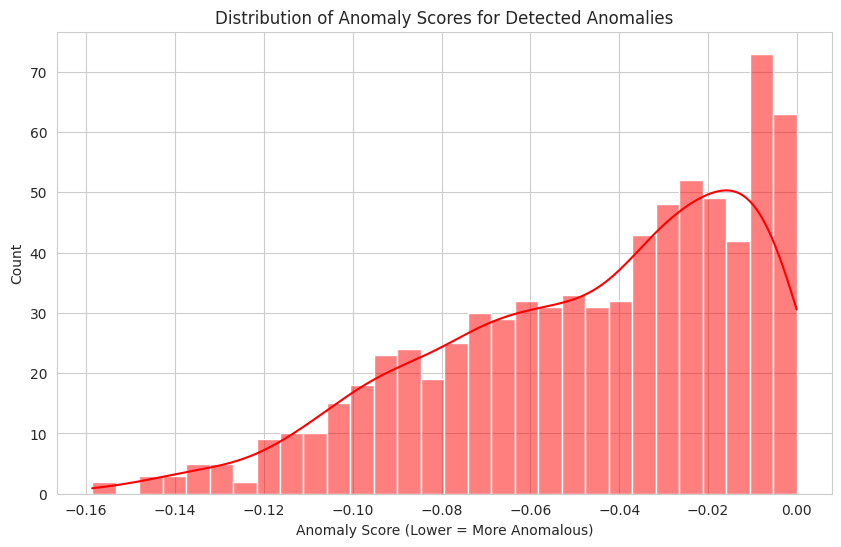


3. Feature Comparison: Anomalies vs. Normal Data (Box Plots):


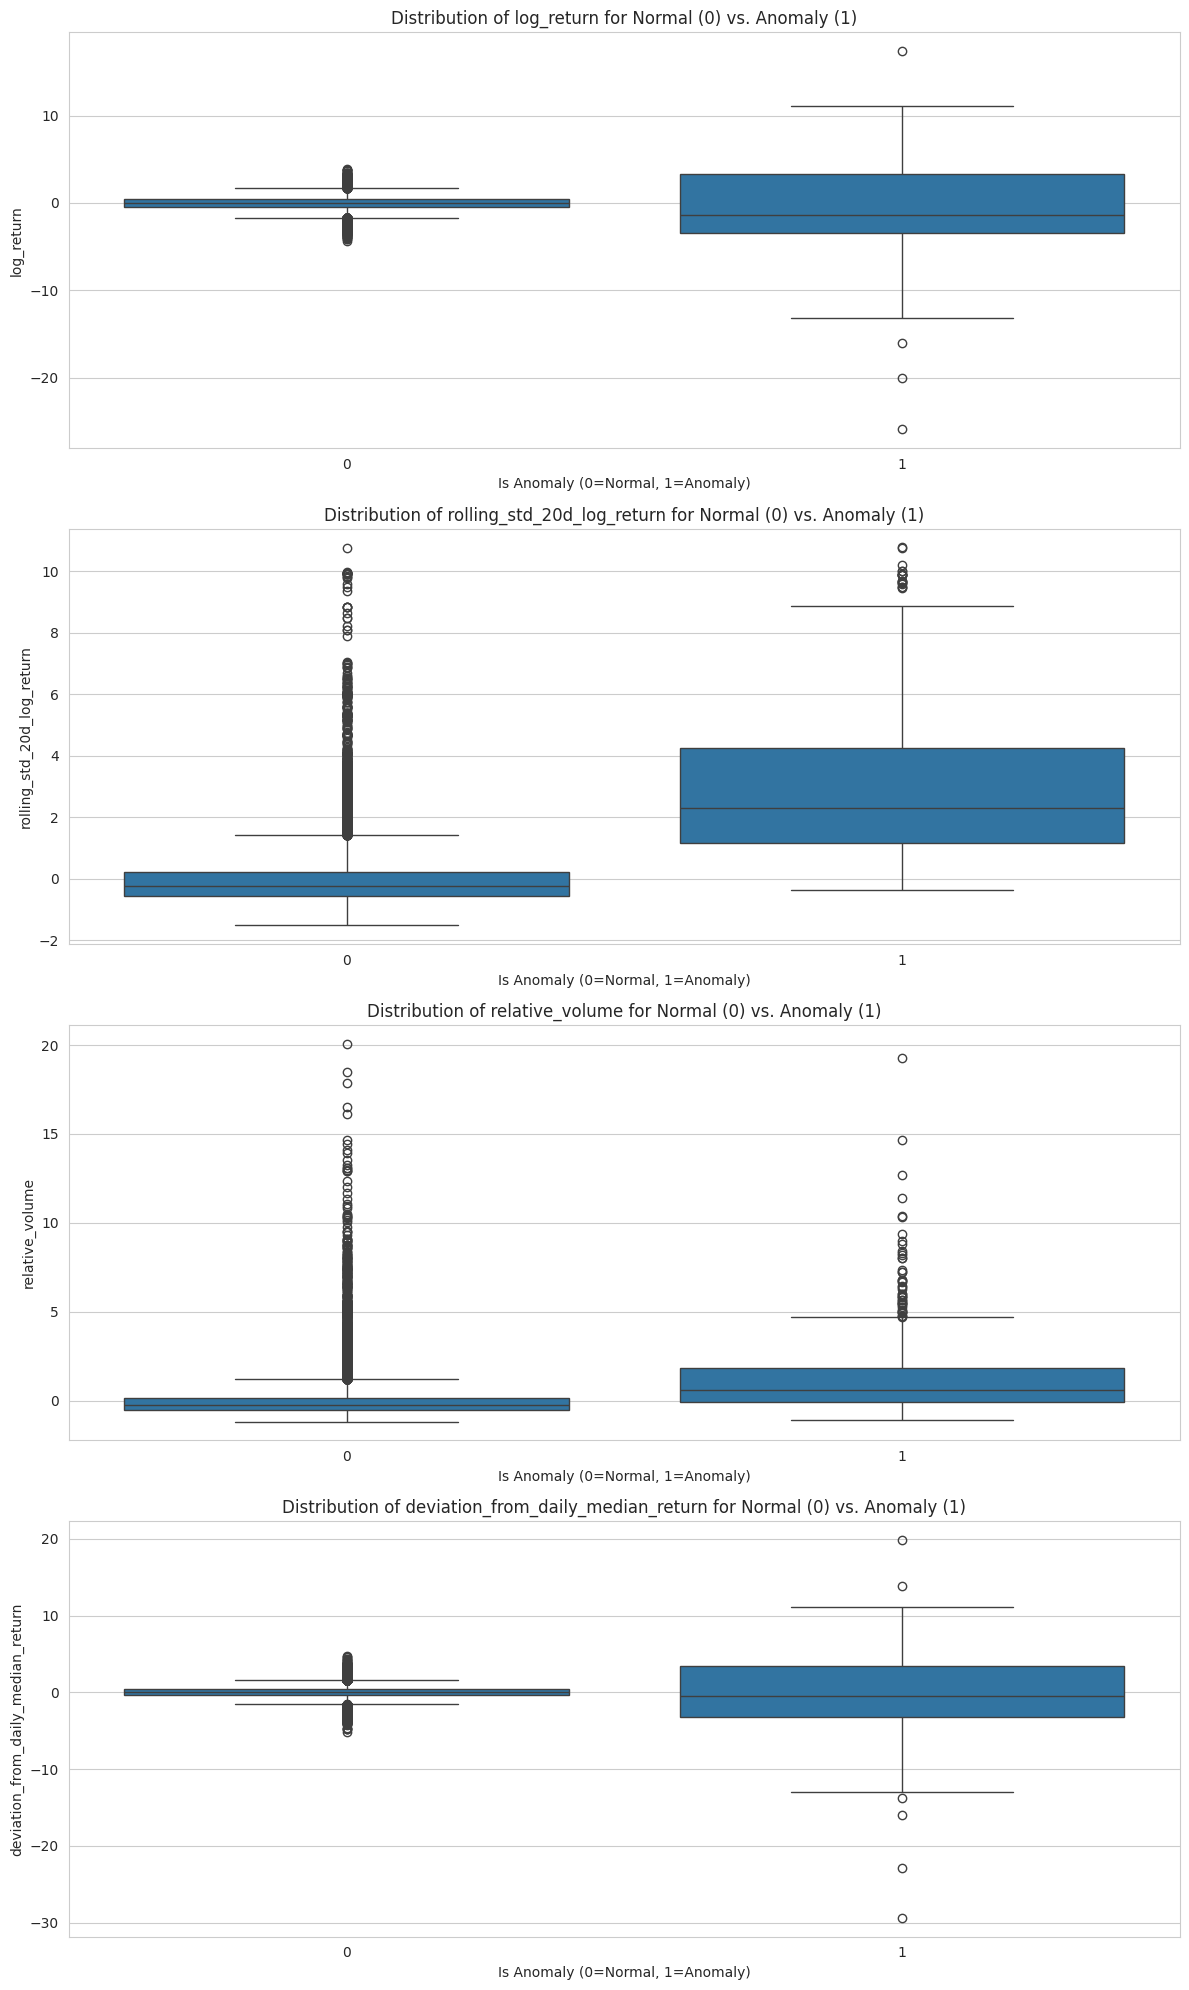


4. Anomaly Frequency Over Time:


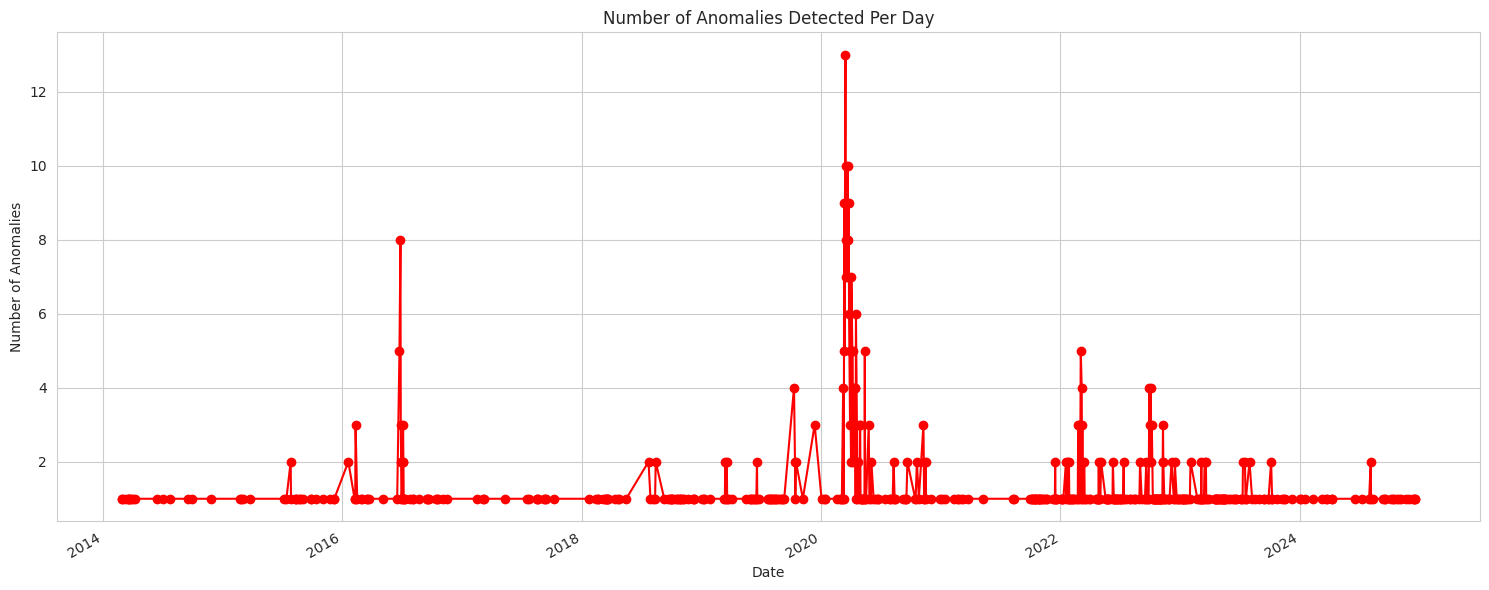


5. Detailed Time-Series Plots for Top 5 Anomalies:


Plotting Top Anomalies:   0%|          | 0/5 [00:00<?, ?it/s]


Visualising anomaly for THG on 2022-06-16


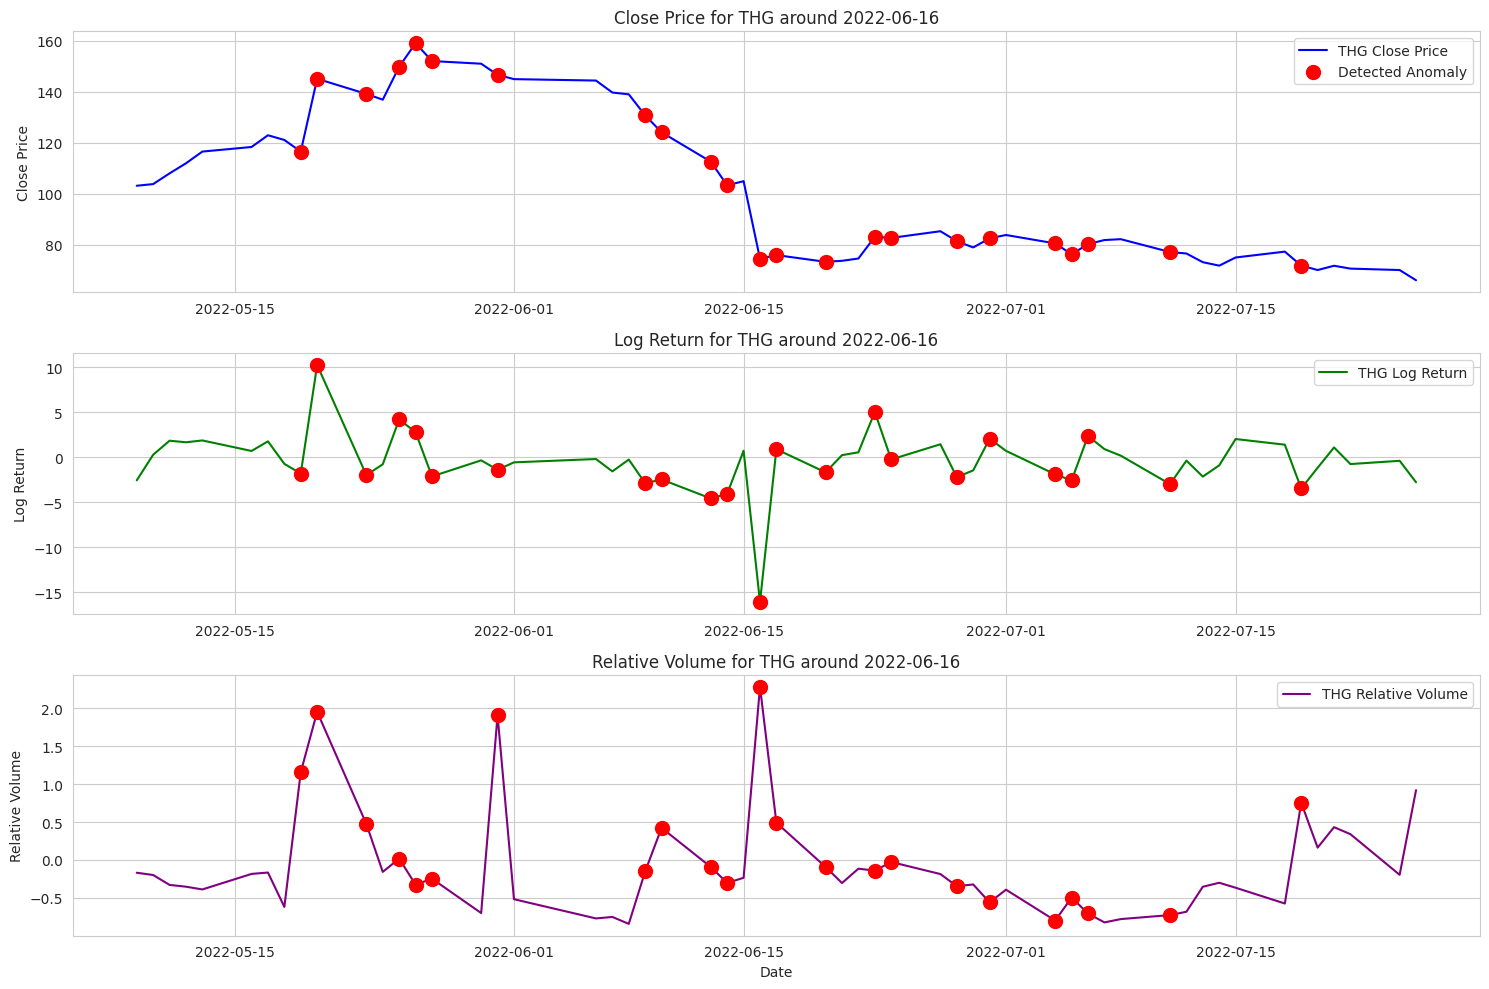

Plotting Top Anomalies:  20%|██        | 1/5 [00:00<00:01,  2.01it/s]


Visualising anomaly for BWY on 2016-06-24


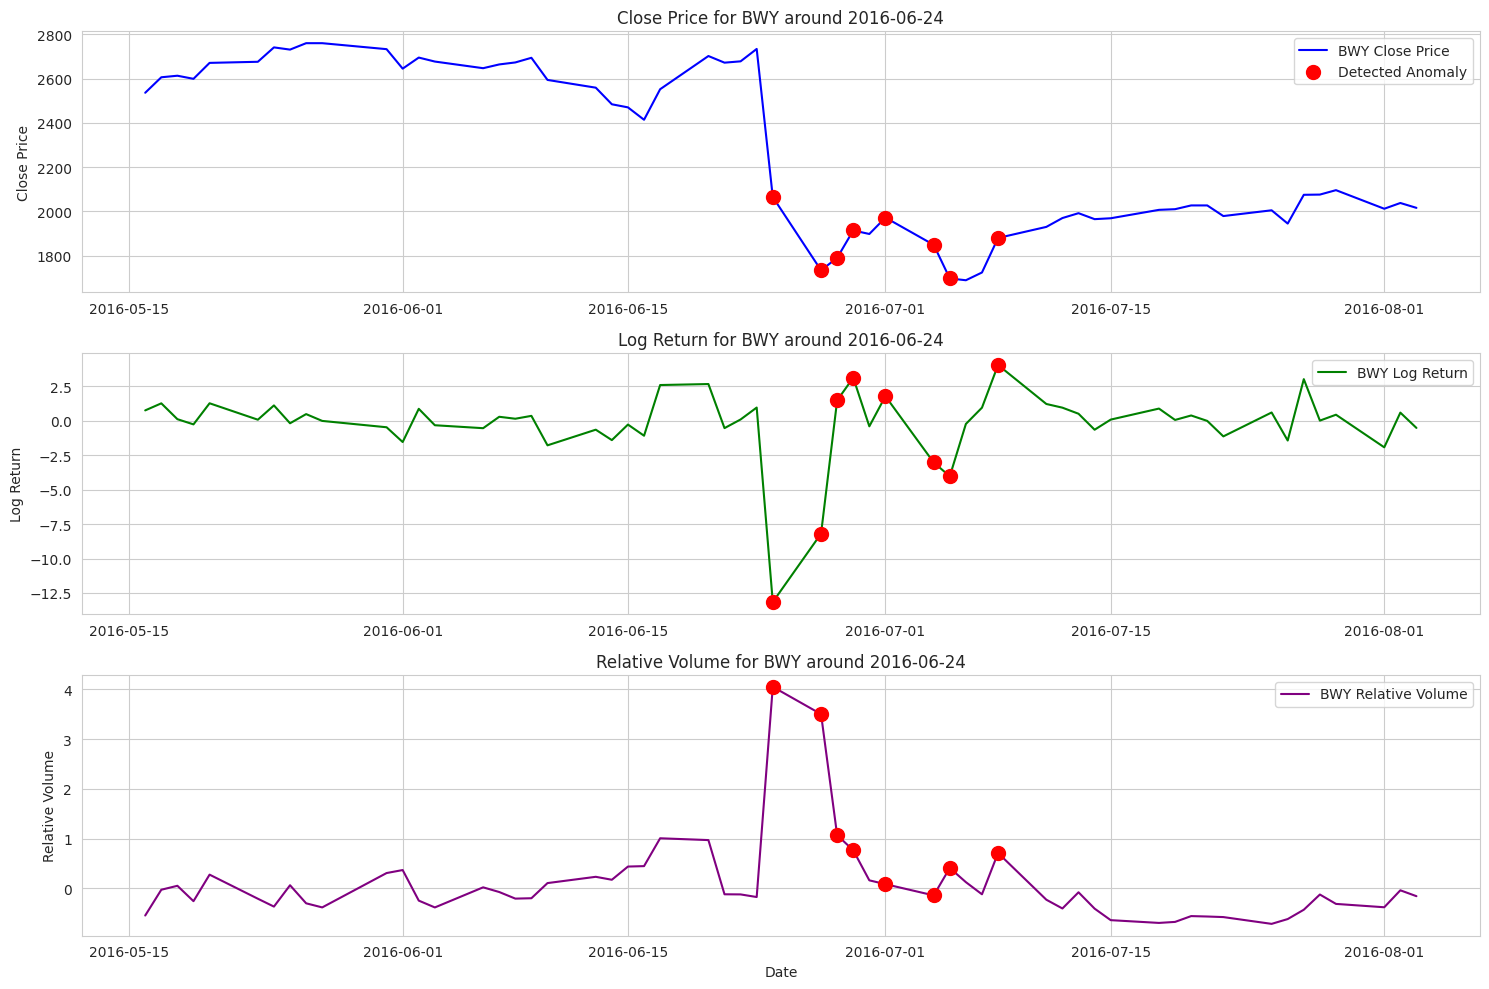

Plotting Top Anomalies:  40%|████      | 2/5 [00:01<00:01,  1.98it/s]


Visualising anomaly for THG on 2022-01-24


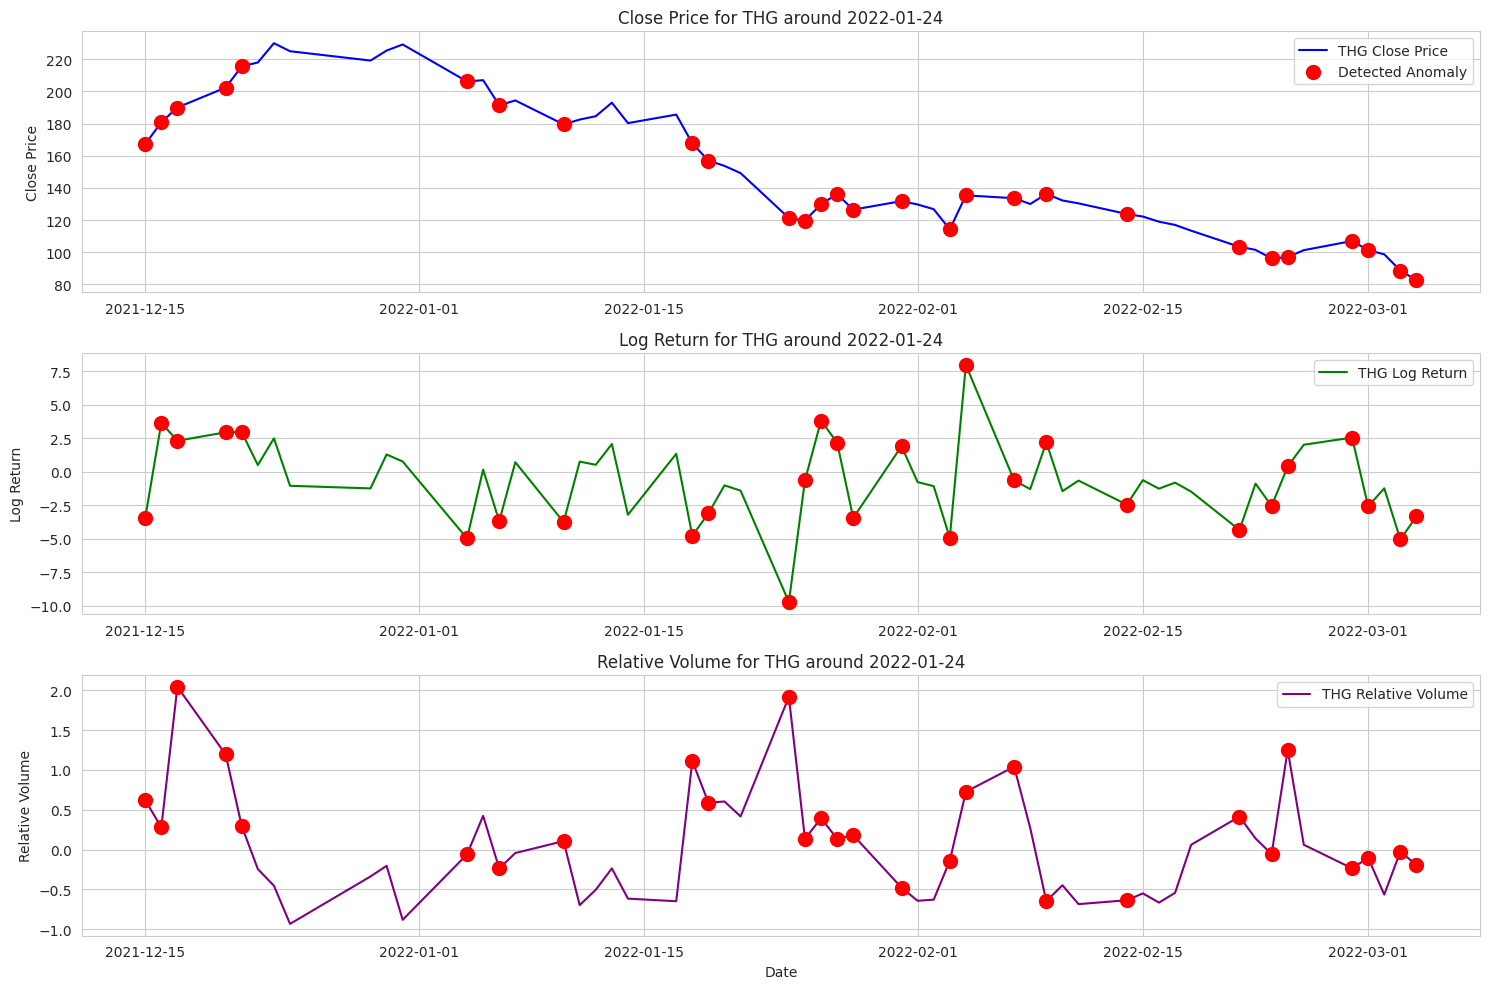

Plotting Top Anomalies:  60%|██████    | 3/5 [00:01<00:01,  1.92it/s]


Visualising anomaly for BWY on 2016-06-27


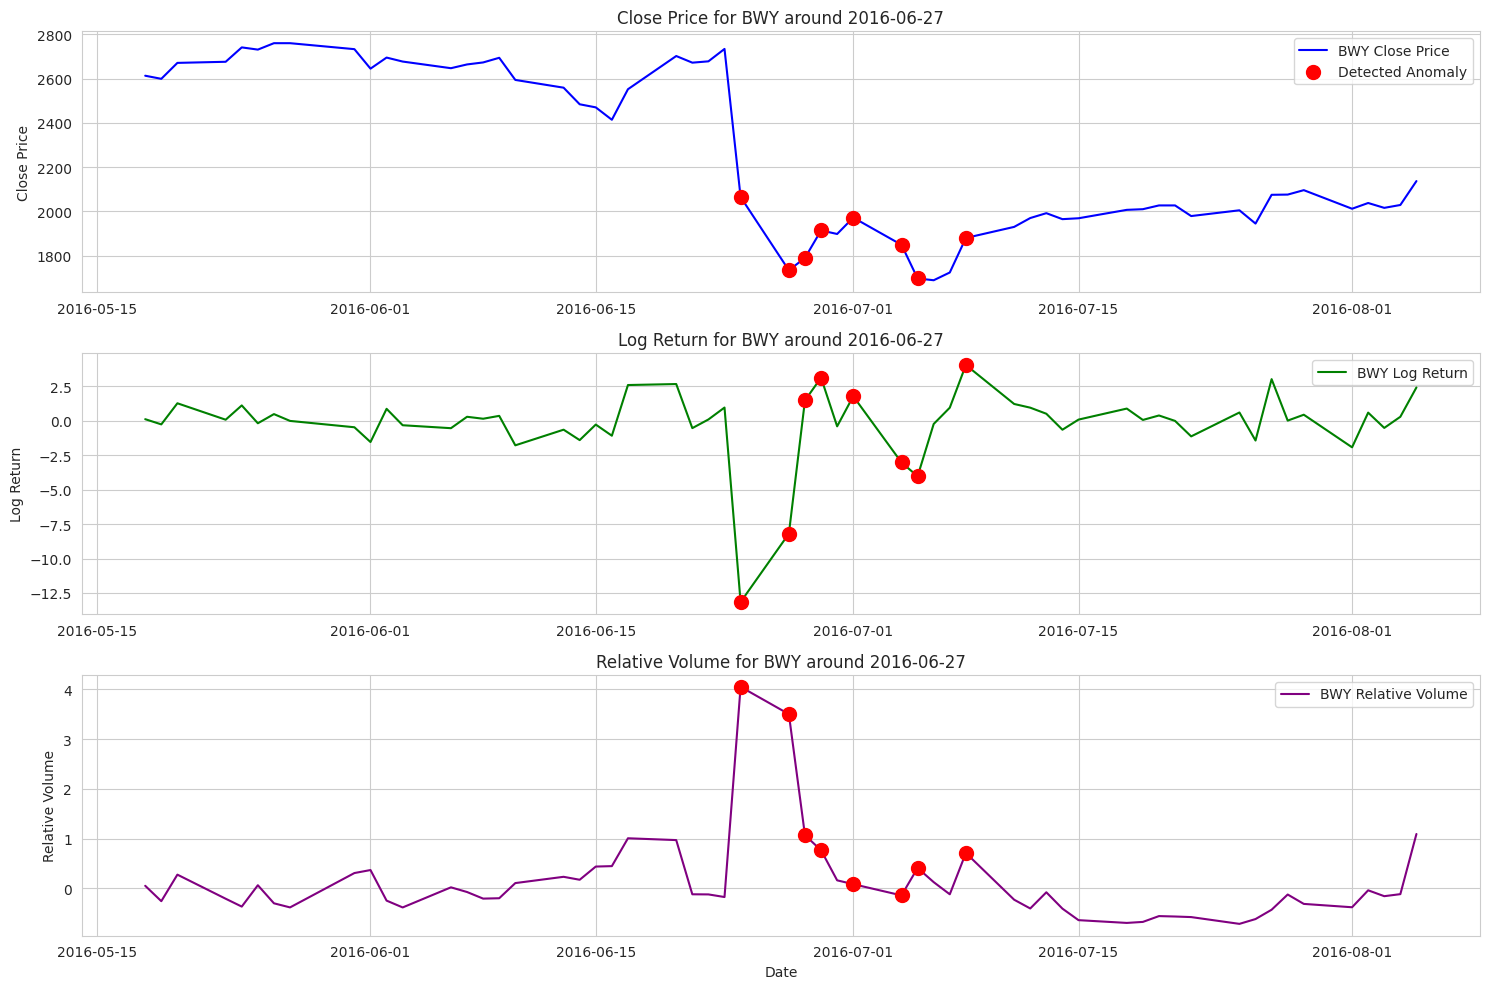

Plotting Top Anomalies:  80%|████████  | 4/5 [00:02<00:00,  1.94it/s]


Visualising anomaly for JUST on 2016-06-27


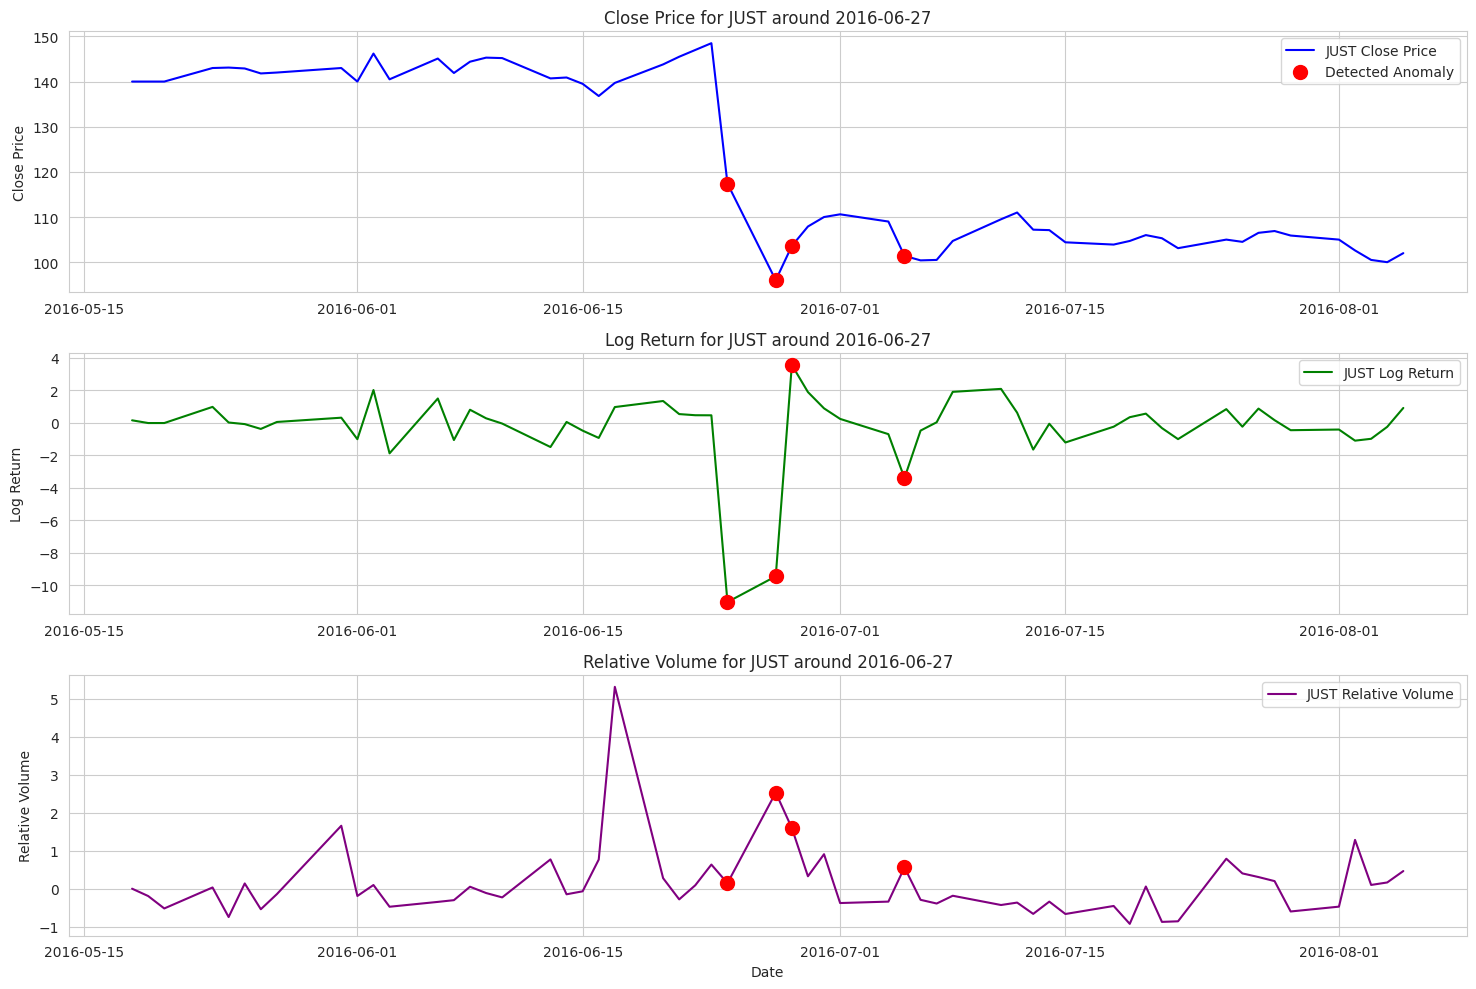

Plotting Top Anomalies: 100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


--- Anomaly Analysis and Visualization Complete ---


In [30]:

    # Filter anomalies for visualization for FTSE 250 stocks
    anomalies250_df_context = full250_data_with_anomalies_context[full250_data_with_anomalies_context['iso_forest_is_anomaly'] == 1].copy()

    # --- Call the analyze_and_visualize_anomalies function ---
    analyze_and_visualise_anomalies(
        anomalies_df_multiindex=anomalies250_df_context,
        full_eval_data_with_anomalies_multiindex=full250_data_with_anomalies_context,
        num_top_anomalies_to_plot=5,  # You can adjust this number
        window_days_for_plot=40       # You can adjust this number
    )

In [31]:

def custom_unsupervised_scorer(model: IsolationForest, X_train_scored: pd.DataFrame, X_val_scored: pd.DataFrame, contamination_rate: float) -> float:
    """
    Custom scoring function for unsupervised anomaly detection.
    Aims to reward models that flag more anomalies in the validation set
    while maintaining the expected contamination rate in the training set.

    Args:
        model (IsolationForest): The trained Isolation Forest model.
        X_train_scored (pd.DataFrame): Training data with 'iso_forest_anomaly_score' and 'iso_forest_is_anomaly'.
        X_val_scored (pd.DataFrame): Validation data with 'iso_forest_anomaly_score' and 'iso_forest_is_anomaly'.
        contamination_rate (float): The expected contamination rate.

    Returns:
        float: A score indicating model performance. Higher is better.
    """
    train_anomalies_count = X_train_scored['iso_forest_is_anomaly'].sum()
    val_anomalies_count = X_val_scored['iso_forest_is_anomaly'].sum()

    expected_train_anomalies = len(X_train_scored) * contamination_rate

    # Ensure expected_train_anomalies is not zero if contamination_rate is very small and len(X_train_scored) is small
    if expected_train_anomalies < 1:
        expected_train_anomalies = 1

    score = (val_anomalies_count / len(X_val_scored)) - (abs(train_anomalies_count - expected_train_anomalies) / expected_train_anomalies)


    return score


def optimize_isolation_forest(
    df_train: pd.DataFrame,
    df_val: pd.DataFrame,
    df_test: pd.DataFrame,
    feature_cols: list,
    param_grid: Dict[str, Any],
    random_state: int = 42
) -> Tuple[Dict[str, Any], IsolationForest, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Optimizes Isolation Forest hyperparameters using a custom scoring function
    on the validation set.

    Args:
        df_train (pd.DataFrame): Training DataFrame with features (scaled, no NaNs).
        df_val (pd.DataFrame): Validation DataFrame with features (scaled, no NaNs).
        df_test (pd.DataFrame): Test DataFrame with features (scaled, no NaNs).
        feature_cols (list): List of column names to be used as features.
        param_grid (Dict[str, Any]): Dictionary with parameters names (str) as keys
                                     and lists of parameter settings to try as values.
                                     Example: {'contamination': [0.005, 0.01, 0.02], 'n_estimators': [100, 200]}
        random_state (int): Seed for reproducibility.

    Returns:
        tuple: A tuple containing:
            - Dict[str, Any]: Best hyperparameters found.
            - IsolationForest: The best trained Isolation Forest model.
            - pd.DataFrame: Training data scored with the best model.
            - pd.DataFrame: Validation data scored with the best model.
            - pd.DataFrame: Test data scored with the best model.
    """
    best_score = -np.inf
    best_params = {}
    best_model = None
    best_df_train_scored = None
    best_df_val_scored = None
    best_df_test_scored = None

    grid_combinations = list(ParameterGrid(param_grid))
    print(f"\n--- Starting Isolation Forest Optimization ({len(grid_combinations)} combinations) ---")

    for i, params in enumerate(grid_combinations):

        current_contamination = params.get('contamination', 0.01)

        df_train_scored, df_val_scored, current_model = train_and_score_isolation_forest(
            X_train_normal=df_train,
            X_eval=df_val,
            feature_cols=feature_cols,
            contamination=current_contamination,
            n_estimators=params.get('n_estimators', 100),
            max_features=params.get('max_features', 1.0),
            max_samples=params.get('max_samples', 'auto'),
            random_state=random_state
        )

        if current_model is not None:
            score = custom_unsupervised_scorer(current_model, df_train_scored, df_val_scored, current_contamination)

            if score > best_score:
                best_score = score
                best_params = params
                best_model = current_model
                best_df_train_scored = df_train_scored
                best_df_val_scored = df_val_scored

                df_test_scored_current = df_test.copy()
                df_test_scored_current['iso_forest_anomaly_score'] = best_model.decision_function(df_test[feature_cols])
                df_test_scored_current['iso_forest_is_anomaly'] = best_model.predict(df_test[feature_cols]) == -1
                best_df_test_scored = df_test_scored_current

        else:
            print(f"Skipping combination {params} due to empty training data.")

    print("\n--- Isolation Forest Optimization Complete ---")
    print(f"Best Score: {best_score:.4f}")
    print(f"Best Parameters: {best_params}")

    return best_params, best_model, best_df_train_scored, best_df_val_scored, best_df_test_scored


In [32]:
# Define the parameter grid for optimization ---

param_grid100 = {
        'contamination': [0.07, 0.10, 0.12, 0.15], # Contamination rates to try
        'n_estimators': [200, 300, 400],          # Number of trees
        'max_features': [0.3, 0.4, 0.5, 0.6],     # Fraction of features to consider for each tree
        'max_samples': ['auto', 0.5],             # Number of samples to draw for each tree
    }


    # Calling optimize_isolation_forest
best100_params, best100_model, best100_df_train_scored, best100_df_val_scored, best100_df_test_scored = optimize_isolation_forest(
        df_train=df100_train_split,
        df_val=df100_val_split,
        df_test=df100_test_split,
        feature_cols=selected_features,
        param_grid=param_grid100,
        random_state=42
    )

print("\n--- Optimization Results ---")
print(f"Best Parameters Found: {best100_params}")
print(f"Best Model: {best100_model}")



--- Starting Isolation Forest Optimization (96 combinations) ---

 Training and Scoring Isolation Forest Model 
Training Isolation Forest with contamination=0.07, n_estimators=200, and random_state=42...
Isolation Forest model trained successfully.
--- Isolation Forest Training and Scoring Complete ---

 Training and Scoring Isolation Forest Model 
Training Isolation Forest with contamination=0.07, n_estimators=300, and random_state=42...
Isolation Forest model trained successfully.
--- Isolation Forest Training and Scoring Complete ---

 Training and Scoring Isolation Forest Model 
Training Isolation Forest with contamination=0.07, n_estimators=400, and random_state=42...
Isolation Forest model trained successfully.
--- Isolation Forest Training and Scoring Complete ---

 Training and Scoring Isolation Forest Model 
Training Isolation Forest with contamination=0.07, n_estimators=200, and random_state=42...
Isolation Forest model trained successfully.
--- Isolation Forest Training and

In [33]:
def summarize_anomalies_in_table(
    anomalies_df_context: pd.DataFrame,
    train_df: pd.DataFrame = None,
    val_df: pd.DataFrame = None,
    test_df: pd.DataFrame = None,
    num_top_features: int = 3
) -> pd.DataFrame:
    """
    Generates a summary table of detected anomalies and prints the count of anomalies
    found in the training, validation, and test sets.

    Args:
        anomalies_df_context (pd.DataFrame): DataFrame containing only detected anomalies.
                                             It must have a MultiIndex ('Date', 'Ticker').
        train_df (pd.DataFrame, optional): The original training dataset.
        val_df (pd.DataFrame, optional): The original validation dataset.
        test_df (pd.DataFrame, optional): The original test dataset.
        num_top_features (int): The number of most extreme features to display for each anomaly.

    Returns:
        pd.DataFrame: A DataFrame representing the summary table of anomalies.
                      Returns an empty DataFrame if no anomalies are detected.
    """
    if anomalies_df_context.empty:
        print("No anomalies detected.")
        return pd.DataFrame()

    # --- Anomaly Count Summary ---
    # Helper function to calculate and print anomaly counts for a given data split
    def print_anomaly_summary(set_name: str, full_set_df: pd.DataFrame, all_anomalies_df: pd.DataFrame):
        if full_set_df is not None and not full_set_df.empty:
            # Get the date range for the current data split
            start_date = full_set_df.index.get_level_values('Date').min()
            end_date = full_set_df.index.get_level_values('Date').max()

            # Filter the anomalies that fall within this date range
            set_anomalies = all_anomalies_df.loc[start_date:end_date]

            num_anomalies = len(set_anomalies)
            total_points = len(full_set_df)

            print(f"Anomalies in {set_name}: {num_anomalies} / {total_points}")

    # Print the summary for each provided dataset
    print_anomaly_summary("Training Set", train_df, anomalies_df_context)
    print_anomaly_summary("Validation Set", val_df, anomalies_df_context)
    print_anomaly_summary("Test Set", test_df, anomalies_df_context)

    # --- Anomaly Table Generation ---
    print("\n--- Generating Anomaly Summary Table ---")
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    pd.set_option('display.max_rows', 100)

    sorted_anomalies = anomalies_df_context.sort_values(by='iso_forest_anomaly_score', ascending=True)
    summary_rows = []

    feature_cols = [col for col in anomalies_df_context.columns
                    if col not in ['open', 'high', 'low', 'close', 'adj close', 'volume',
                                  'iso_forest_anomaly_score', 'iso_forest_anomaly_label', 'iso_forest_is_anomaly']
                    and pd.api.types.is_numeric_dtype(anomalies_df_context[col])]

    extreme_feature_column_names = [f'Extreme_Feature_{i+1}' for i in range(num_top_features)]

    for idx, row in sorted_anomalies.iterrows():
        anomaly_date = idx[0].date()
        anomaly_ticker = idx[1]

        feature_values = row[feature_cols].copy().dropna()
        extreme_features_series = feature_values.abs().sort_values(ascending=False).head(num_top_features)

        current_row_summary = {
            'Date': anomaly_date,
            'Ticker': anomaly_ticker,
            'Anomaly Score': f"{row['iso_forest_anomaly_score']:.4f}",
            'Original Close': f"{row['close']:.2f}",
        }

        for i, (feat_name, _) in enumerate(extreme_features_series.items()):
            original_feat_val = feature_values.loc[feat_name]
            current_row_summary[extreme_feature_column_names[i]] = f"{feat_name}: {original_feat_val:.4f}"

        for i in range(len(extreme_features_series), num_top_features):
            current_row_summary[extreme_feature_column_names[i]] = "N/A"

        summary_rows.append(current_row_summary)

    return pd.DataFrame(summary_rows)

In [34]:
# Defining the DataFrames
unsplit_raw_data = ready_ftse100_data

datasets_to_process = [
    ('train', unsplit_raw_data, best100_df_train_scored),
    ('val', unsplit_raw_data, best100_df_val_scored),
    ('test', unsplit_raw_data, best100_df_test_scored)
]

# Processing the dataset and collecting anomalies
anomaly_percentage = 0.01

#creating an empty list before the loop
all_anomalies_list = []

for split_name, raw_data, scored_data in datasets_to_process:
    print(f"\n{'='*20} Processing {split_name} Set {'='*20}")

    # Calculating the threshold and filtering for anomalies
    score_threshold = scored_data['iso_forest_anomaly_score'].quantile(anomaly_percentage)
    print(f"New anomaly score threshold for the top {anomaly_percentage*100}%: {score_threshold:.4f}")
    top_anomalies_df = scored_data[scored_data['iso_forest_anomaly_score'] < score_threshold]
    anomaly_indices = top_anomalies_df.index

    # Creating the final anomaly DataFrame with full context
    anomalies_with_full_context = raw_data.loc[anomaly_indices].copy()
    anomalies_with_full_context['iso_forest_anomaly_score'] = top_anomalies_df['iso_forest_anomaly_score']

    # Adding the anomalies from the current loop iteration to the list
    all_anomalies_list.append(anomalies_with_full_context)

    # The rest of your code to display the table for each set
    summary_kwargs = {f'{split_name}_df': scored_data}
    summary_table = summarize_anomalies_in_table(
        anomalies_df_context=anomalies_with_full_context,
        **summary_kwargs
    )
    print(f"\n Anomaly Table for {split_name} Set ")
    display(summary_table)


# Combining All Collected Anomalies
# NEW: After the loop, combine the list of DataFrames into one
all100_optimised_anomalies = pd.concat(all_anomalies_list)


==================== Processing train Set ====================
New anomaly score threshold for the top 1.0%: -0.1418
Anomalies in Training Set: 225 / 22451

--- Generating Anomaly Summary Table ---

 Anomaly Table for train Set 


Date Ticker Anomaly Score Original Close Extreme_Feature_1 Extreme_Feature_2 Extreme_Feature_3
0    2015-11-12     RR       -0.2954         184.11               N/A               N/A               N/A
1    2016-06-27   BARC       -0.2947         127.20               N/A               N/A               N/A
2    2016-06-24   BARC       -0.2878         153.90               N/A               N/A               N/A
3    2017-07-27    AZN       -0.2870        4325.00               N/A               N/A               N/A
4    2017-01-24   BT-A       -0.2752         303.00               N/A               N/A               N/A
..          ...    ...           ...            ...               ...               ...               ...
220  2014-04-29    AZN       -0.1436        4632.50               N/A               N/A               N/A
221  2015-02-24    BHP       -0.1425        1643.50               N/A               N/A               N/A
222  2017-04-28   BARC       -0.1424         212.25               N/A               N/A               N/A
223  2014-05-21    AZN       -0.1424        4420.00               N/A               N/A               N/A
224  2017-10-19   ULVR       -0.1420        4299.00               N/A               N/A               N/A

[225 rows x 7 columns]


==================== Processing val Set ====================
New anomaly score threshold for the top 1.0%: -0.2478
Anomalies in Validation Set: 77 / 7605

--- Generating Anomaly Summary Table ---

 Anomaly Table for val Set 


Date Ticker Anomaly Score Original Close Extreme_Feature_1 Extreme_Feature_2 Extreme_Feature_3
0   2020-11-09     RR       -0.3045         100.00               N/A               N/A               N/A
1   2020-03-09     BP       -0.3009         318.20               N/A               N/A               N/A
2   2020-10-28     RR       -0.2967          84.54               N/A               N/A               N/A
3   2020-03-12   BARC       -0.2883          97.52               N/A               N/A               N/A
4   2020-03-09    BHP       -0.2870        1111.40               N/A               N/A               N/A
5   2020-04-01   BARC       -0.2840          82.86               N/A               N/A               N/A
6   2020-03-16   BARC       -0.2831          89.06               N/A               N/A               N/A
7   2020-03-17     RR       -0.2808         133.32               N/A               N/A               N/A
8   2020-03-18     RR       -0.2802         118.87               N/A               N/A               N/A
9   2020-04-06     RR       -0.2792         102.16               N/A               N/A               N/A
10  2020-03-12    PRU       -0.2757         858.26               N/A               N/A               N/A
11  2020-03-12    BHP       -0.2754         939.80               N/A               N/A               N/A
12  2021-11-26     RR       -0.2754         121.56               N/A               N/A               N/A
13  2020-04-01     RR       -0.2752         104.67               N/A               N/A               N/A
14  2020-07-09     RR       -0.2749          87.95               N/A               N/A               N/A
15  2020-11-10     RR       -0.2747         107.00               N/A               N/A               N/A
16  2020-09-01     RR       -0.2746          70.93               N/A               N/A               N/A
17  2020-10-01     RR       -0.2725          40.08               N/A               N/A               N/A
18  2020-11-09   BARC       -0.2716         128.54               N/A               N/A               N/A
19  2020-03-16     RR       -0.2708         147.56               N/A               N/A               N/A
20  2020-03-16    PRU       -0.2702         736.04               N/A               N/A               N/A
21  2020-03-24     BP       -0.2700         312.35               N/A               N/A               N/A
22  2020-03-18     BP       -0.2700         233.70               N/A               N/A               N/A
23  2020-05-29     RR       -0.2698          93.20               N/A               N/A               N/A
24  2020-03-12     RR       -0.2693         154.84               N/A               N/A               N/A
25  2020-06-09     RR       -0.2691         126.97               N/A               N/A               N/A
26  2020-12-03     RR       -0.2690         134.90               N/A               N/A               N/A
27  2020-03-25     RR       -0.2680         136.24               N/A               N/A               N/A
28  2020-10-08     RR       -0.2673          67.04               N/A               N/A               N/A
29  2020-03-27     RR       -0.2669         125.15               N/A               N/A               N/A
30  2020-11-09     BP       -0.2663         229.95               N/A               N/A               N/A
31  2020-03-18    PRU       -0.2661         689.48               N/A               N/A               N/A
32  2020-06-08     RR       -0.2658         136.72               N/A               N/A               N/A
33  2020-03-23     RR       -0.2658         115.34               N/A               N/A               N/A
34  2020-09-21     RR       -0.2652          55.15               N/A               N/A               N/A
35  2020-04-03     RR       -0.2645          86.34               N/A               N/A               N/A
36  2020-03-12     BP       -0.2643         275.00               N/A               N/A               N/A
37  2020-04-29   BAR


==================== Processing test Set ====================
New anomaly score threshold for the top 1.0%: -0.1674
Anomalies in Test Set: 114 / 11309

--- Generating Anomaly Summary Table ---

 Anomaly Table for test Set 


Date Ticker Anomaly Score Original Close Extreme_Feature_1 Extreme_Feature_2 Extreme_Feature_3
0    2022-02-24     RR       -0.2899         102.38               N/A               N/A               N/A
1    2023-02-23     RR       -0.2820         133.10               N/A               N/A               N/A
2    2023-07-26     RR       -0.2739         185.00               N/A               N/A               N/A
3    2022-03-01     RR       -0.2720          92.00               N/A               N/A               N/A
4    2022-03-25     RR       -0.2702         110.14               N/A               N/A               N/A
..          ...    ...           ...            ...               ...               ...               ...
109  2023-03-17   BT-A       -0.1685         137.75               N/A               N/A               N/A
110  2023-07-31     RR       -0.1683         184.85               N/A               N/A               N/A
111  2023-05-11     RR       -0.1680         145.90               N/A               N/A               N/A
112  2024-11-07    AZN       -0.1680        9725.00               N/A               N/A               N/A
113  2022-04-22     RR       -0.1674          91.57               N/A               N/A               N/A

[114 rows x 7 columns]

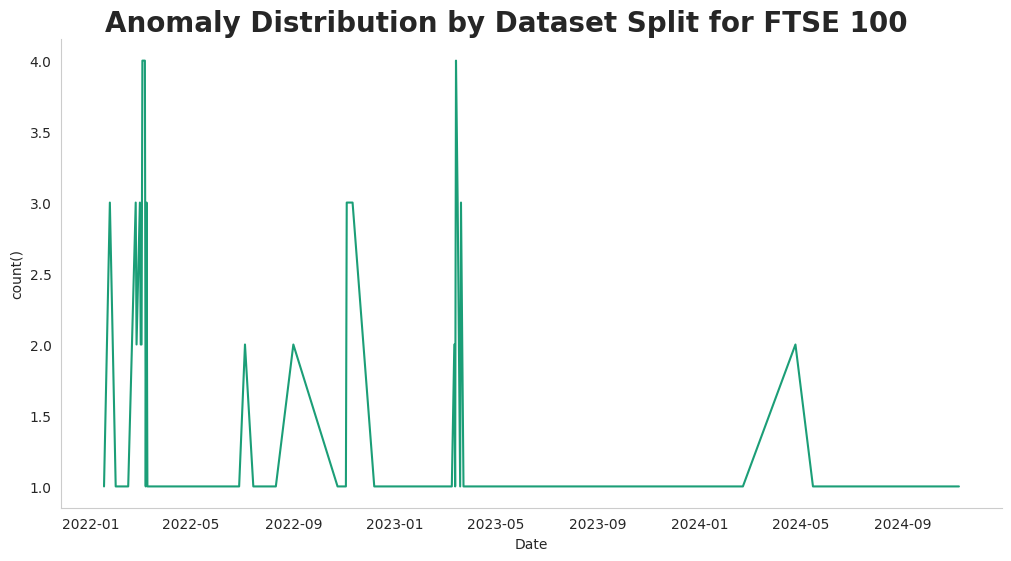

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
fig.suptitle('Anomaly Distribution by Dataset Split for FTSE 100', fontsize=20, fontweight='bold', y=1.05)
ax.grid(False)
df_sorted = summary_table.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

In [ ]:
# --- Get Top 10 Tickers with Most Anomalies ---

# Prerequisite: The 'all_optimised_anomalies' DataFrame has been created by your previous code.

# 1. Access the 'Ticker' index, count each ticker, and select the top 10
top_10_100_tickers = all100_optimised_anomalies.index.get_level_values('Ticker').value_counts().head(10)

# 2. Display the result
print("Top 10 Tickers with the Most Anomalies:")
print(top_10_100_tickers)

Top 10 Tickers with the Most Anomalies:
Ticker
RR      112
BARC     65
BHP      53
AZN      39
PRU      34
TSCO     26
BT-A     20
BP       19
BATS     14
ULVR      9
Name: count, dtype: int64



==================== Visualizations ====================


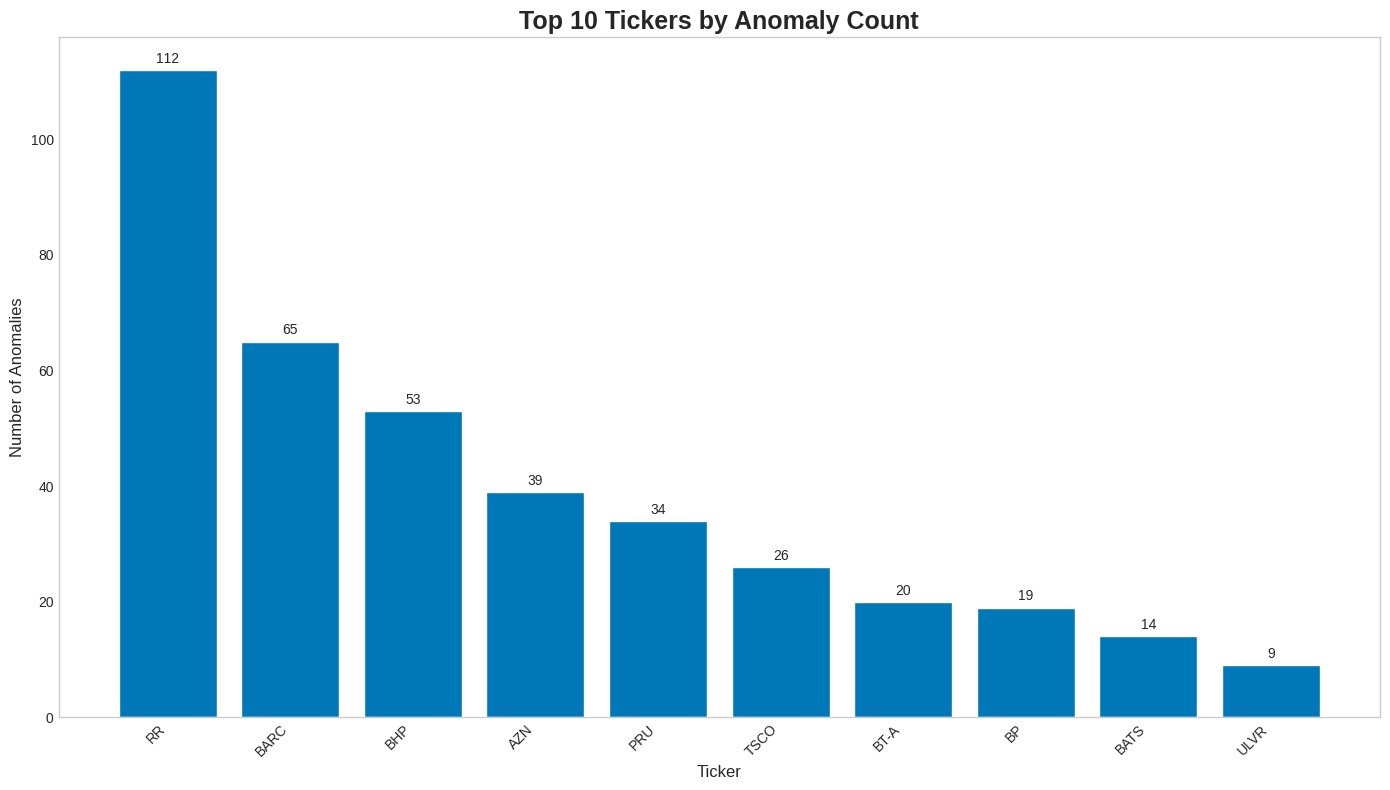

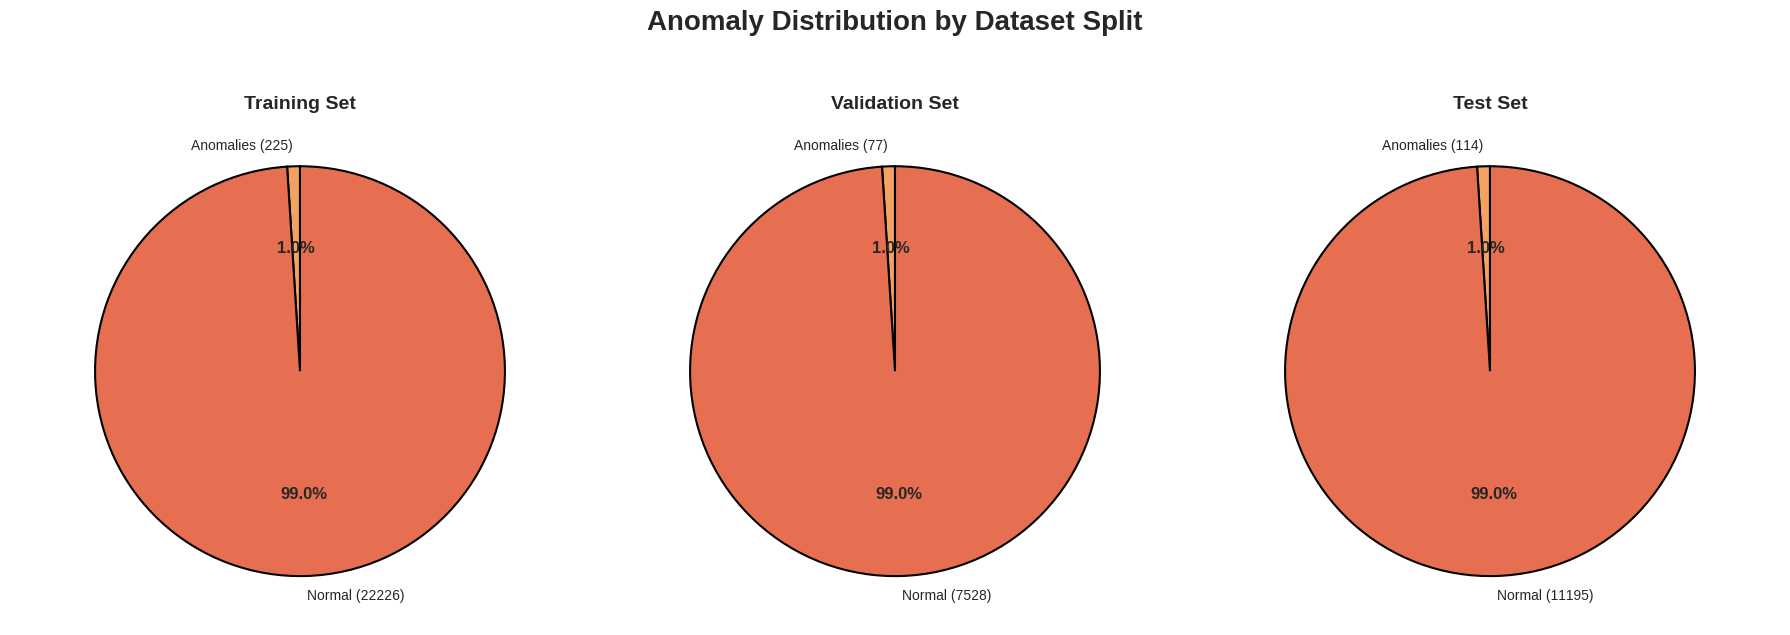

In [36]:
def plot_top_anomalies(anomalies_df: pd.DataFrame, num_to_plot: int = 10):
    """
    Plots a bar chart of the top N tickers with the most anomalies.

    Args:
        anomalies_df (pd.DataFrame): DataFrame containing all detected anomalies.
                                     It must have a MultiIndex ('Date', 'Ticker').
        num_to_plot (int): The number of top tickers to display.
    """
    if anomalies_df.empty:
        print("No anomalies to plot.")
        return

    # Count the number of anomalies for each ticker
    anomaly_counts = anomalies_df.index.get_level_values('Ticker').value_counts().head(num_to_plot)

    # If there are no anomalies, handle gracefully
    if anomaly_counts.empty:
        print("No anomalies to plot.")
        return

    labels = anomaly_counts.index
    values = anomaly_counts.values

    # Create the plot
    plt.style.use('seaborn-v0_8-whitegrid') # A clean, modern style
    fig, ax = plt.subplots(figsize=(14, 8))
    bars = ax.bar(labels, values, color='#0077b6')

    # Add labels and a title
    ax.set_title(f'Top {num_to_plot} Tickers by Anomaly Count', fontsize=18, fontweight='bold')
    ax.set_xlabel('Ticker', fontsize=12)
    ax.set_ylabel('Number of Anomalies', fontsize=12)
    ax.grid(False)

    # Add the count on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout() # Adjusts plot to ensure everything fits
    plt.show()


# Function to plot the anomaly distribution as pie charts ---
def plot_anomaly_distribution(
    train_df: pd.DataFrame,
    val_df: pd.DataFrame,
    test_df: pd.DataFrame,
    anomaly_percentage: float = 0.01
):
    """
    Creates pie charts showing the percentage of anomalies in each dataset split.

    Args:
        train_df (pd.DataFrame): The original training dataset with anomaly scores.
        val_df (pd.DataFrame): The original validation dataset with anomaly scores.
        test_df (pd.DataFrame): The original test dataset with anomaly scores.
        anomaly_percentage (float): The threshold percentage for defining anomalies.
    """
    datasets = {
        "Training Set": train_df,
        "Validation Set": val_df,
        "Test Set": test_df
    }

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Anomaly Distribution by Dataset Split', fontsize=20, fontweight='bold', y=1.05)

    colors = ['#f4a261', '#e76f51']

    for i, (name, df) in enumerate(datasets.items()):
        if df.empty:
            print(f"Skipping pie chart for {name} as it is empty.")
            continue

        # Calculate the threshold for this dataset
        score_threshold = df['iso_forest_anomaly_score'].quantile(anomaly_percentage)

        # Count anomalies and non-anomalies
        num_anomalies = len(df[df['iso_forest_anomaly_score'] < score_threshold])
        num_non_anomalies = len(df) - num_anomalies

        sizes = [num_anomalies, num_non_anomalies]
        labels = [f'Anomalies ({num_anomalies})', f'Normal ({num_non_anomalies})']

        ax = axes[i]

        # Plot the pie chart
        wedges, texts, autotexts = ax.pie(
            sizes,
            labels=labels,
            autopct=lambda p: f'{p:.1f}%', # Display percentages with one decimal place
            colors=colors,
            startangle=90,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'antialiased': True}
        )

        ax.set_title(name, fontsize=14, fontweight='bold')
        ax.axis('equal') # Ensures the pie chart is circular.

        # Adjust autopct text properties for better visibility
        for autotext in autotexts:
            autotext.set_fontsize(12)
            autotext.set_fontweight('bold')

    plt.tight_layout()
    plt.show()

# --- Example Usage (place this after your existing code's loop) ---
print("\n" + "="*20 + " Visualizations " + "="*20)

# Plot the bar chart for the top 10 anomalies from the combined DataFrame
plot_top_anomalies(all100_optimised_anomalies, num_to_plot=10)

# Plot the pie charts for the distribution across splits
plot_anomaly_distribution(
    train_df=best100_df_train_scored,
    val_df=best100_df_val_scored,
    test_df=best100_df_test_scored,
    anomaly_percentage=anomaly_percentage
)

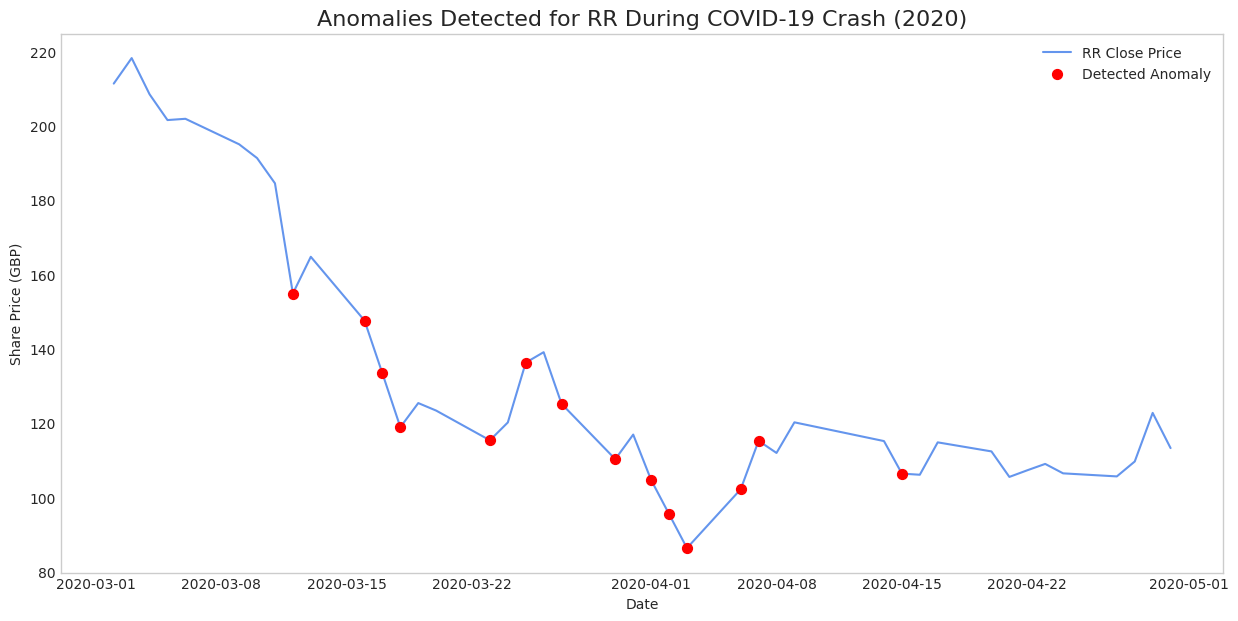

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Plot for COVID-19 Crash ---

# 1. Select the stock and time period
ticker_to_plot = 'RR'
start_date = '2020-03-01'
end_date = '2020-04-30'

# 2. Isolate the stock's price history using a robust filter
# This method handles potential whitespace issues in the ticker symbol
stock_data = ready_ftse100_data[
    (ready_ftse100_data.index.get_level_values('Date') >= start_date) &
    (ready_ftse100_data.index.get_level_values('Date') <= end_date) &
    (ready_ftse100_data.index.get_level_values('Ticker').str.strip() == ticker_to_plot)
]


# 3. Get the anomaly dates for that specific stock and period
anomaly_data = all100_optimised_anomalies[
    (all100_optimised_anomalies.index.get_level_values('Date') >= start_date) &
    (all100_optimised_anomalies.index.get_level_values('Date') <= end_date) &
    (all100_optimised_anomalies.index.get_level_values('Ticker').str.strip() == ticker_to_plot)
]

# 4. Create the plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the share price
ax.plot(stock_data.index.get_level_values('Date'), stock_data['close'], label=f'{ticker_to_plot} Close Price', color='cornflowerblue')

# Plot the anomalies as red dots
ax.scatter(anomaly_data.index.get_level_values('Date'), anomaly_data['close'],
           color='red', s=50, label='Detected Anomaly', zorder=5)

# Formatting
ax.set_title(f'Anomalies Detected for {ticker_to_plot} During COVID-19 Crash (2020)', fontsize=16)
ax.set_xlabel('Date')
ax.set_ylabel('Share Price (GBP)')
ax.legend()
ax.grid(False)
plt.show()

In [40]:
    # --- STEP 4: Define the parameter grid for optimization for 250 Stocks

param_grid250 = {
        'contamination': [0.12, 0.15, 0.17, 0.20], # Common contamination rates to try
        'n_estimators': [200, 300, 400],          # Number of trees
        'max_features': [0.2, 0.3, 0.4, 0.5],               # Fraction of features to consider for each tree
        'max_samples': ['auto', 0.5],             # Number of samples to draw for each tree
}


    # STEP 5: Call optimize_isolation_forest
    # Call your pre-defined optimize_isolation_forest function
best250_params, best250_model, best250_df_train_scored, best250_df_val_scored, best250_df_test_scored = optimize_isolation_forest(
        df_train=df250_train_split,
        df_val=df250_val_split,
        df_test=df250_test_split,
        feature_cols=selected_features,
        param_grid=param_grid250,
        random_state=42
)

print("\n--- Optimization Results ---")
print(f"Best Parameters Found: {best250_params}")
print(f"Best Model: {best250_model}")


--- Starting Isolation Forest Optimization (96 combinations) ---

 Training and Scoring Isolation Forest Model 
Training Isolation Forest with contamination=0.12, n_estimators=200, and random_state=42...
Isolation Forest model trained successfully.
--- Isolation Forest Training and Scoring Complete ---

 Training and Scoring Isolation Forest Model 
Training Isolation Forest with contamination=0.12, n_estimators=300, and random_state=42...
Isolation Forest model trained successfully.
--- Isolation Forest Training and Scoring Complete ---

 Training and Scoring Isolation Forest Model 
Training Isolation Forest with contamination=0.12, n_estimators=400, and random_state=42...
Isolation Forest model trained successfully.
--- Isolation Forest Training and Scoring Complete ---

 Training and Scoring Isolation Forest Model 
Training Isolation Forest with contamination=0.12, n_estimators=200, and random_state=42...
Isolation Forest model trained successfully.
--- Isolation Forest Training and

In [42]:
# --- STEP 1: Define Your DataFrames ---
your250_UNSPLIT_raw_data = ready_ftse250_data

datasets_to_process = [
    ('train', your250_UNSPLIT_raw_data, best250_df_train_scored),
    ('val', your250_UNSPLIT_raw_data, best250_df_val_scored),
    ('test', your250_UNSPLIT_raw_data, best250_df_test_scored)
]

# --- STEP 2: Process Each Dataset and Collect Anomalies ---
anomaly_percentage = 0.01
all_anomalies_list = [] # NEW: Create an empty list before the loop

for split_name, raw_data, scored_data in datasets_to_process:
    print(f"\n{'='*20} Processing {split_name} Set {'='*20}")

    # Calculate threshold and filter for anomalies
    score_threshold = scored_data['iso_forest_anomaly_score'].quantile(anomaly_percentage)
    print(f"New anomaly score threshold for the top {anomaly_percentage*100}%: {score_threshold:.4f}")
    top_anomalies_df = scored_data[scored_data['iso_forest_anomaly_score'] < score_threshold]
    anomaly_indices = top_anomalies_df.index

    # Create the final anomaly DataFrame with full context
    anomalies_with_full_context = raw_data.loc[anomaly_indices].copy()
    anomalies_with_full_context['iso_forest_anomaly_score'] = top_anomalies_df['iso_forest_anomaly_score']

    # NEW: Add the anomalies from the current loop iteration to our list
    all_anomalies_list.append(anomalies_with_full_context)

    # --- The rest of your code to display the table for each set ---
    summary_kwargs = {f'{split_name}_df': scored_data}
    summary_table = summarize_anomalies_in_table(
        anomalies_df_context=anomalies_with_full_context,
        **summary_kwargs
    )
    print(f"\n--- Anomaly Table for {split_name} Set ---")
    display(summary_table)


# --- STEP 3: Combine All Collected Anomalies ---
# NEW: After the loop, combine the list of DataFrames into one
all250_optimised_anomalies = pd.concat(all_anomalies_list)


==================== Processing train Set ====================
New anomaly score threshold for the top 1.0%: -0.1771
Anomalies in Training Set: 205 / 20449

--- Generating Anomaly Summary Table ---

--- Anomaly Table for train Set ---


Date Ticker Anomaly Score Original Close Extreme_Feature_1 Extreme_Feature_2 Extreme_Feature_3
0    2016-06-24    BWY       -0.3307        2065.00               N/A               N/A               N/A
1    2016-06-27    BWY       -0.3221        1734.00               N/A               N/A               N/A
2    2016-06-27   JUST       -0.3181          96.00               N/A               N/A               N/A
3    2014-03-19   JUST       -0.3083         154.00               N/A               N/A               N/A
4    2018-04-23    CKN       -0.3067        2550.00               N/A               N/A               N/A
..          ...    ...           ...            ...               ...               ...               ...
200  2015-05-05    EMG       -0.1781         183.50               N/A               N/A               N/A
201  2016-08-15    CKN       -0.1779        2140.00               N/A               N/A               N/A
202  2014-05-15    EMG       -0.1776          89.95               N/A               N/A               N/A
203  2018-02-21    LRE       -0.1775         593.00               N/A               N/A               N/A
204  2016-03-23    CKN       -0.1772        2180.00               N/A               N/A               N/A

[205 rows x 7 columns]


==================== Processing val Set ====================
New anomaly score threshold for the top 1.0%: -0.2445
Anomalies in Validation Set: 75 / 7405

--- Generating Anomaly Summary Table ---

--- Anomaly Table for val Set ---


Date Ticker Anomaly Score Original Close Extreme_Feature_1 Extreme_Feature_2 Extreme_Feature_3
0   2020-03-18    HSX       -0.3190         786.00               N/A               N/A               N/A
1   2020-03-16    JDW       -0.3181         710.00               N/A               N/A               N/A
2   2020-04-15    HSX       -0.3094         730.00               N/A               N/A               N/A
3   2021-10-12    THG       -0.3083         285.00               N/A               N/A               N/A
4   2021-10-26    THG       -0.3081         242.00               N/A               N/A               N/A
5   2020-03-18   ICGT       -0.3057         510.00               N/A               N/A               N/A
6   2020-03-23    SRE       -0.3044          48.60               N/A               N/A               N/A
7   2020-03-16    SRE       -0.3019          56.60               N/A               N/A               N/A
8   2020-03-20   JUST       -0.3019          45.20               N/A               N/A               N/A
9   2020-03-18    JDW       -0.3006         592.50               N/A               N/A               N/A
10  2020-03-16   ICGT       -0.2989         692.00               N/A               N/A               N/A
11  2020-03-18   JUST       -0.2983          50.45               N/A               N/A               N/A
12  2020-03-20    JDW       -0.2917         700.00               N/A               N/A               N/A
13  2020-03-19   ICGT       -0.2910         460.00               N/A               N/A               N/A
14  2020-03-17    BWY       -0.2882        2169.00               N/A               N/A               N/A
15  2020-03-24    JDW       -0.2872         845.00               N/A               N/A               N/A
16  2021-10-18    THG       -0.2869         348.80               N/A               N/A               N/A
17  2020-03-16    BWY       -0.2854        2444.00               N/A               N/A               N/A
18  2020-10-16    JDW       -0.2841         773.50               N/A               N/A               N/A
19  2020-03-09    EMG       -0.2832         115.65               N/A               N/A               N/A
20  2020-03-24    SRE       -0.2827          60.00               N/A               N/A               N/A
21  2020-03-13    JDW       -0.2822         921.00               N/A               N/A               N/A
22  2020-03-17    JDW       -0.2816         657.00               N/A               N/A               N/A
23  2020-11-09    JDW       -0.2804        1104.00               N/A               N/A               N/A
24  2020-04-14    HSX       -0.2796         842.40               N/A               N/A               N/A
25  2021-12-16    DOM       -0.2792         422.60               N/A               N/A               N/A
26  2020-03-25   ICGT       -0.2758         600.00               N/A               N/A               N/A
27  2021-11-02    THG       -0.2757         197.40               N/A               N/A               N/A
28  2020-03-18    EMG       -0.2739         110.00               N/A               N/A               N/A
29  2020-09-15    HSX       -0.2728         887.40               N/A               N/A               N/A
30  2021-10-19    THG       -0.2719         325.40               N/A               N/A               N/A
31  2020-03-20   ICGT       -0.2714         508.00               N/A               N/A               N/A
32  2020-04-15    JDW       -0.2708         822.00               N/A               N/A               N/A
33  2020-03-31    SRE       -0.2702          65.90               N/A               N/A               N/A
34  2020-03-25    SRE       -0.2698          69.00               N/A               N/A               N/A
35  2020-03-12    BWY       -0.2695        2898.00               N/A               N/A               N/A
36  2020-03-27    SRE       -0.2694          61.40               N/A               N/A               N/A
37  2020-03-26   JUS


==================== Processing test Set ====================
New anomaly score threshold for the top 1.0%: -0.2280
Anomalies in Test Set: 114 / 11310

--- Generating Anomaly Summary Table ---

--- Anomaly Table for test Set ---


Date Ticker Anomaly Score Original Close Extreme_Feature_1 Extreme_Feature_2 Extreme_Feature_3
0    2022-06-16    THG       -0.3344          74.40               N/A               N/A               N/A
1    2022-01-24    THG       -0.3215         121.30               N/A               N/A               N/A
2    2022-09-15    THG       -0.3182          40.00               N/A               N/A               N/A
3    2023-04-17    THG       -0.3132          95.76               N/A               N/A               N/A
4    2024-08-05    CKN       -0.3125        3730.00               N/A               N/A               N/A
..          ...    ...           ...            ...               ...               ...               ...
109  2022-03-29    THG       -0.2298          96.55               N/A               N/A               N/A
110  2022-11-24    THG       -0.2290          72.26               N/A               N/A               N/A
111  2024-01-16    THG       -0.2288          74.14               N/A               N/A               N/A
112  2022-03-16    THG       -0.2286          91.70               N/A               N/A               N/A
113  2024-08-06    DOM       -0.2280         287.00               N/A               N/A               N/A

[114 rows x 7 columns]

In [58]:
# 1. Access the 'Ticker' index, count each ticker, and select the top 10
top_10_250_tickers = all250_optimised_anomalies.index.get_level_values('Ticker').value_counts().head(10)

# 2. Display the result
print("Top 10 Tickers with the Most Anomalies:")
print(top_10_250_tickers)

Top 10 Tickers with the Most Anomalies:
Ticker
THG     106
JUST     90
CKN      29
EMG      22
JDW      21
BWY      21
HIK      16
SCT      15
DOM      14
LRE      14
Name: count, dtype: int64


In [41]:
def plot_quarterly_anomalies(df_results: pd.DataFrame):
    """
    Generates a time-series plot of anomaly counts per quarter.

    Args:
        df_results (pd.DataFrame): The DataFrame containing anomaly detection results,
                                   including a 'Date' index level and a boolean
                                   'iso_forest_is_anomaly' column.
    """
    if df_results.empty:
        print("Input DataFrame is empty. Cannot plot anomalies.")
        return

    print("\n--- Generating Quarterly Anomaly Count Plot ---")

    # Ensure the index is a MultiIndex and 'Date' is a datetime type
    if not isinstance(df_results.index, pd.MultiIndex) or 'Date' not in df_results.index.names:
        print("Error: DataFrame must have a MultiIndex with 'Date' as a level.")
        return

    # Filter for anomalies and resample by quarter
    anomalies_df = df_results[df_results['iso_forest_is_anomaly'] == 1].copy()

    if anomalies_df.empty:
        print("No anomalies detected. Cannot generate plot.")
        return

    # Resample the anomalies to get a count per quarter
    # We use a placeholder column to count
    anomalies_df['count'] = 1

    # Resample by quarter ('QS' for quarter start) and sum the count
    anomalies_per_quarter = anomalies_df.groupby(level='Date')['count'].sum().resample('QS').sum().fillna(0)

    # Plot the results
    plt.figure(figsize=(15, 7))
    anomalies_per_quarter.plot(kind='line', marker='o', color='red', linestyle='-')

    # Add labels and title
    plt.title('Isolation Forest Anomalies Detected Per Quarter')
    plt.xlabel('Date')
    plt.ylabel('Number of Anomalies')
    plt.grid(False)

    # Highlight the COVID-19 period
    plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2021-12-31'), color='gray', alpha=0.2, label='COVID-19 Period')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [45]:
# Assuming your optimization function call has completed and you have the following DataFrames:
# best250_df_train_scored, best250_df_val_scored, best250_df_test_scored

# Combine the three scored DataFrames into a single DataFrame for plotting.
df100_opt_all_results = pd.concat([best100_df_train_scored, best100_df_val_scored, best100_df_test_scored])
df250_opt_all_results = pd.concat([best250_df_train_scored, best250_df_val_scored, best250_df_test_scored])



--- Generating Quarterly Anomaly Count Plot ---


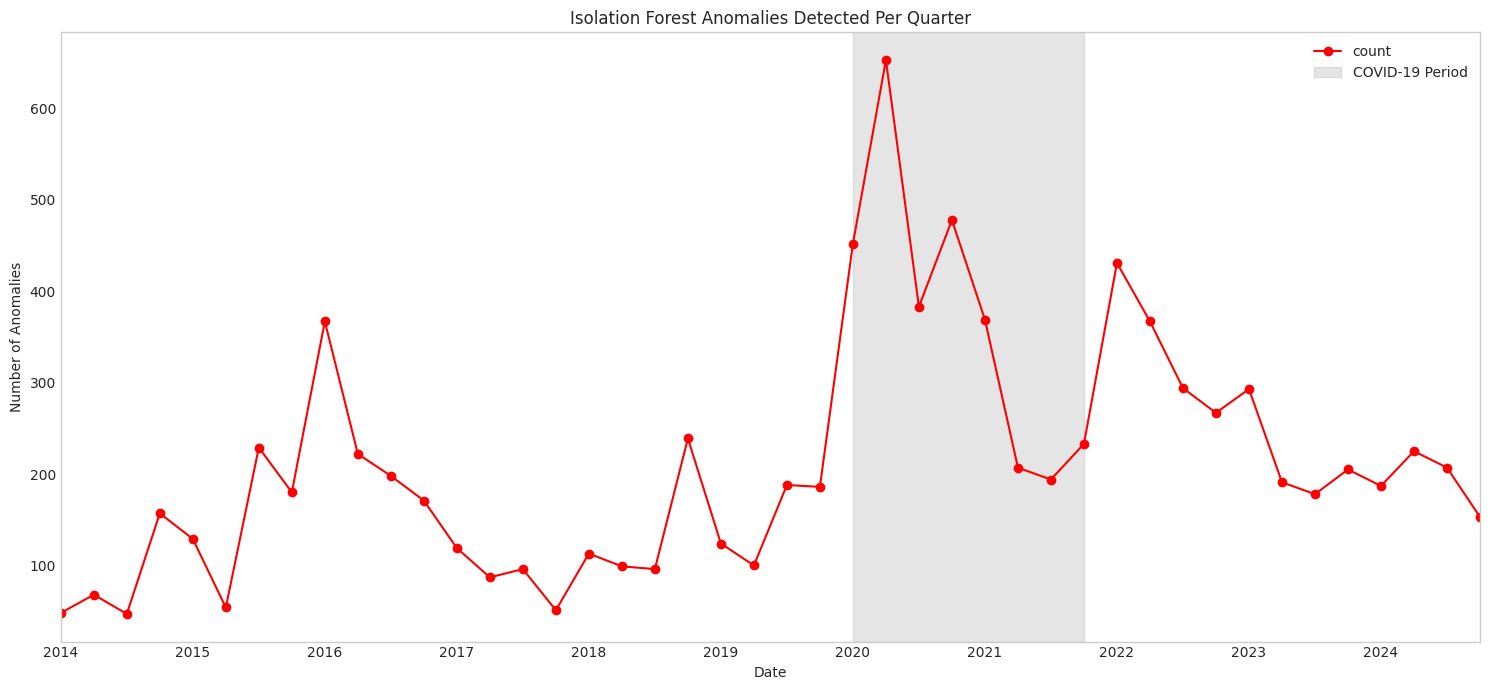


--- Generating Quarterly Anomaly Count Plot ---


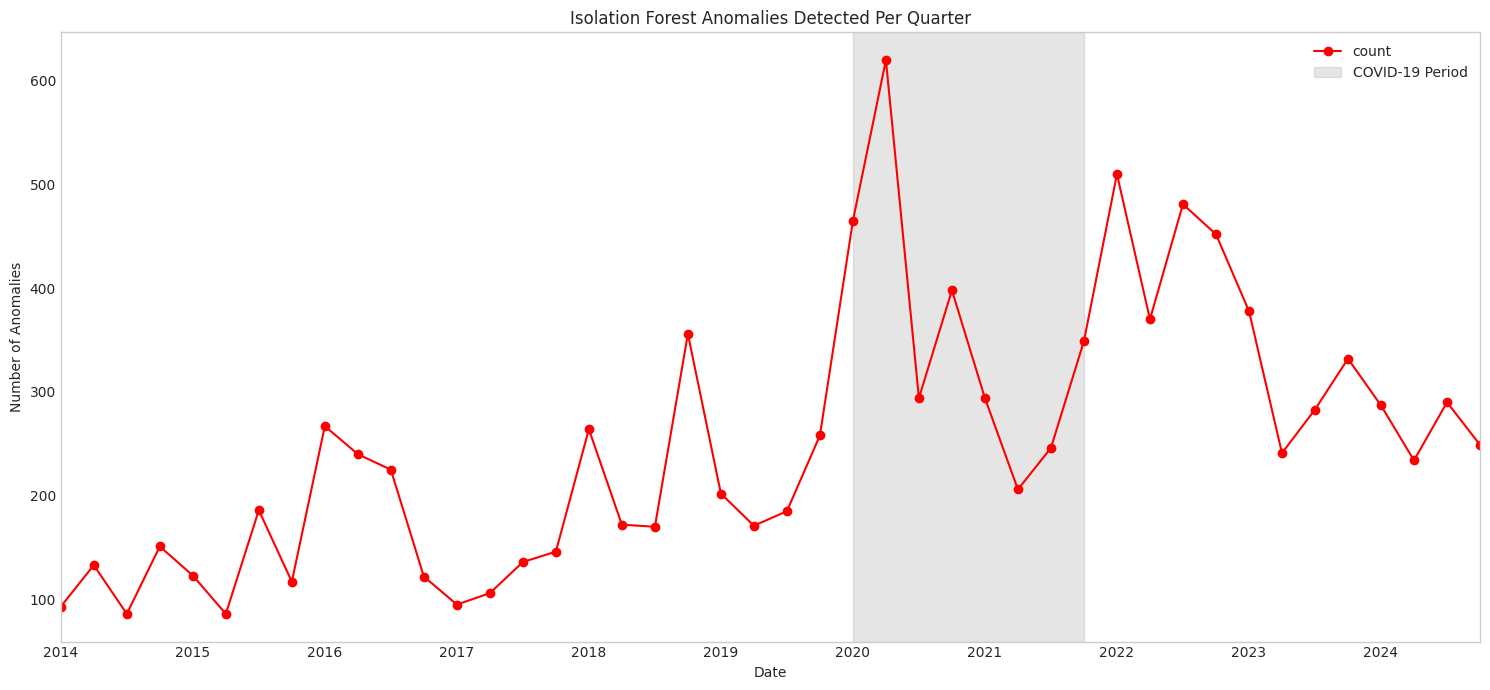

In [46]:
 # Call the function to plot the quarterly anomalies
plot_quarterly_anomalies(df100_opt_all_results)
plot_quarterly_anomalies(df250_opt_all_results)

In [51]:
def plot_quarterly_anomalies(df_results: pd.DataFrame):
    """
    Generates a time-series plot of anomaly counts per quarter.

    Args:
        df_results (pd.DataFrame): The DataFrame containing anomaly detection results,
                                   including a 'Date' index level and a boolean
                                   'iso_forest_is_anomaly' column.
    """
    if df_results.empty:
        print("Input DataFrame is empty. Cannot plot anomalies.")
        return

    print("\n--- Generating Quarterly Anomaly Count Plot ---")

    # Ensure the index is a MultiIndex and 'Date' is a datetime type
    if not isinstance(df_results.index, pd.MultiIndex) or 'Date' not in df_results.index.names:
        print("Error: DataFrame must have a MultiIndex with 'Date' as a level.")
        return

    # Filter for anomalies and resample by quarter
    anomalies_df = df_results[df_results['iso_forest_is_anomaly'] == 1].copy()

    if anomalies_df.empty:
        print("No anomalies detected. Cannot generate plot.")
        return

    # Resample the anomalies to get a count per quarter
    # We use a placeholder column to count
    anomalies_df['count'] = 1

    # Resample by quarter ('QS' for quarter start) and sum the count
    anomalies_per_quarter = anomalies_df.groupby(level='Date')['count'].sum().resample('QS').sum().fillna(0)

    # Plot the results
    plt.figure(figsize=(15, 7))
    anomalies_per_quarter.plot(kind='line', marker='o', color='red', linestyle='-')

    # Add labels and title
    plt.title('Isolation Forest Anomalies Detected Per Quarter for Top 10 Anomalous Tickers')
    plt.xlabel('Date')
    plt.ylabel('Number of Anomalies')
    plt.grid(False)

    # Highlight the COVID-19 period
    plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2021-12-31'), color='gray', alpha=0.2, label='COVID-19 Period')
    plt.legend()
    plt.tight_layout()
    plt.show()


--- Generating Quarterly Anomaly Count Plot ---


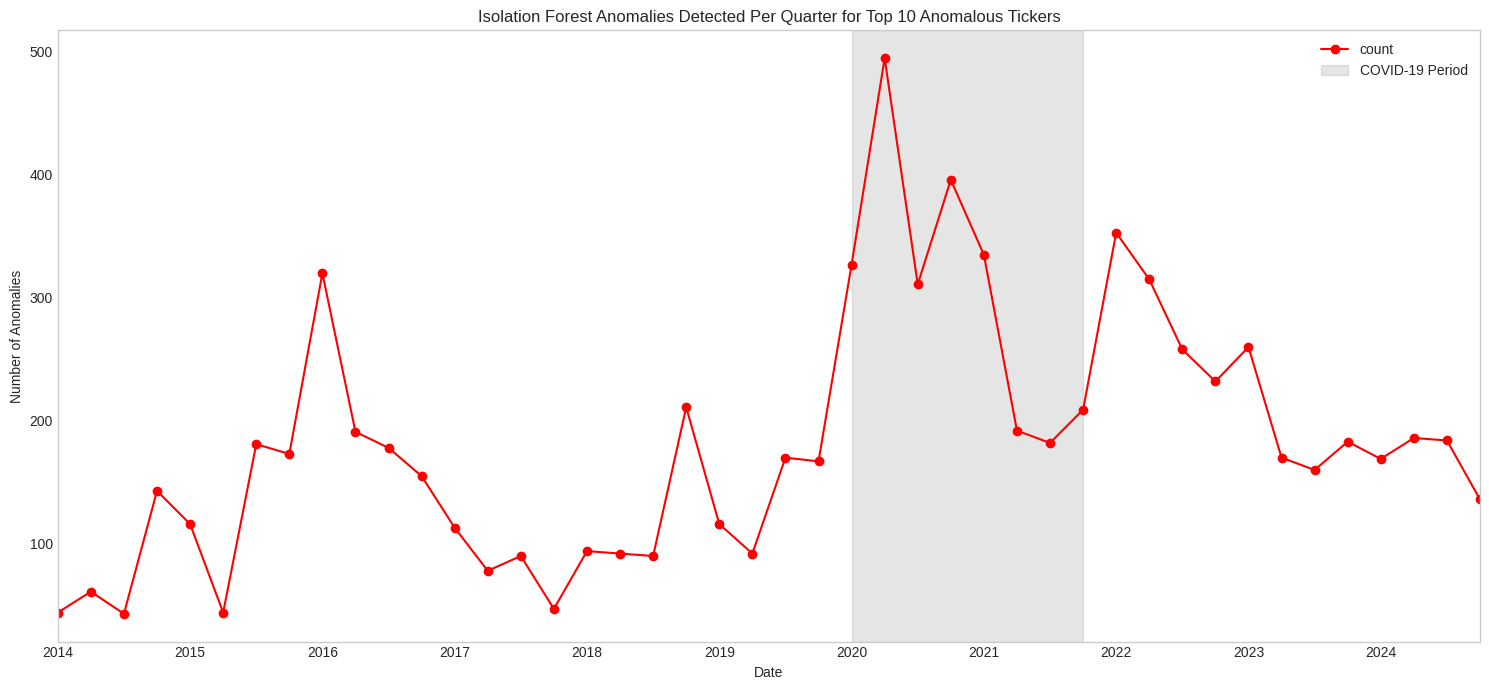

In [52]:
 # Get the top 10 most anomalous tickers by anomaly count
top_10_FTSE100_tickers = df100_opt_all_results[df100_opt_all_results['iso_forest_is_anomaly'] == 1].groupby(level='Ticker').size().nlargest(10).index.tolist()

    # Filter the results DataFrame to include only these top 10 tickers
top_10_anomalous_FTSE100_tickers_df = df100_opt_all_results[df100_opt_all_results.index.get_level_values('Ticker').isin(top_10_FTSE100_tickers)]

    # Call the function to plot the quarterly anomalies for the top 10 tickers
plot_quarterly_anomalies(top_10_anomalous_FTSE100_tickers_df)

In [54]:
def plot_monthly_anomalies(df_results: pd.DataFrame):
    """
    Generates a time-series plot of anomaly counts per month.

    Args:
        df_results (pd.DataFrame): The DataFrame containing anomaly detection results,
                                   including a 'Date' index level and a boolean
                                   'iso_forest_is_anomaly' column.
    """
    if df_results.empty:
        print("Input DataFrame is empty. Cannot plot anomalies.")
        return

    print("\n--- Generating Monthly Anomaly Count Plot ---")

    # Ensure the index is a MultiIndex and 'Date' is a datetime type
    if not isinstance(df_results.index, pd.MultiIndex) or 'Date' not in df_results.index.names:
        print("Error: DataFrame must have a MultiIndex with 'Date' as a level.")
        return

    # Filter for anomalies and resample by month
    anomalies_df = df_results[df_results['iso_forest_is_anomaly'] == 1].copy()

    if anomalies_df.empty:
        print("No anomalies detected. Cannot generate plot.")
        return

    # Resample the anomalies to get a count per month
    # We use a placeholder column to count
    anomalies_df['count'] = 1

    # Resample by month ('MS' for month start) and sum the count
    anomalies_per_month = anomalies_df.groupby(level='Date')['count'].sum().resample('MS').sum().fillna(0)

    # Plot the results
    plt.figure(figsize=(15, 7))
    anomalies_per_month.plot(kind='line', marker='o', color='red', linestyle='-')

    # Add labels and title
    plt.title('Isolation Forest Anomalies Detected Per Month')
    plt.xlabel('Date')
    plt.ylabel('Number of Anomalies')
    plt.grid(False)

    # Highlight the COVID-19 period
    plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2021-12-31'), color='gray', alpha=0.2, label='COVID-19 Period')
    plt.legend()
    plt.tight_layout()
    plt.show()


--- Generating Monthly Anomaly Count Plot ---


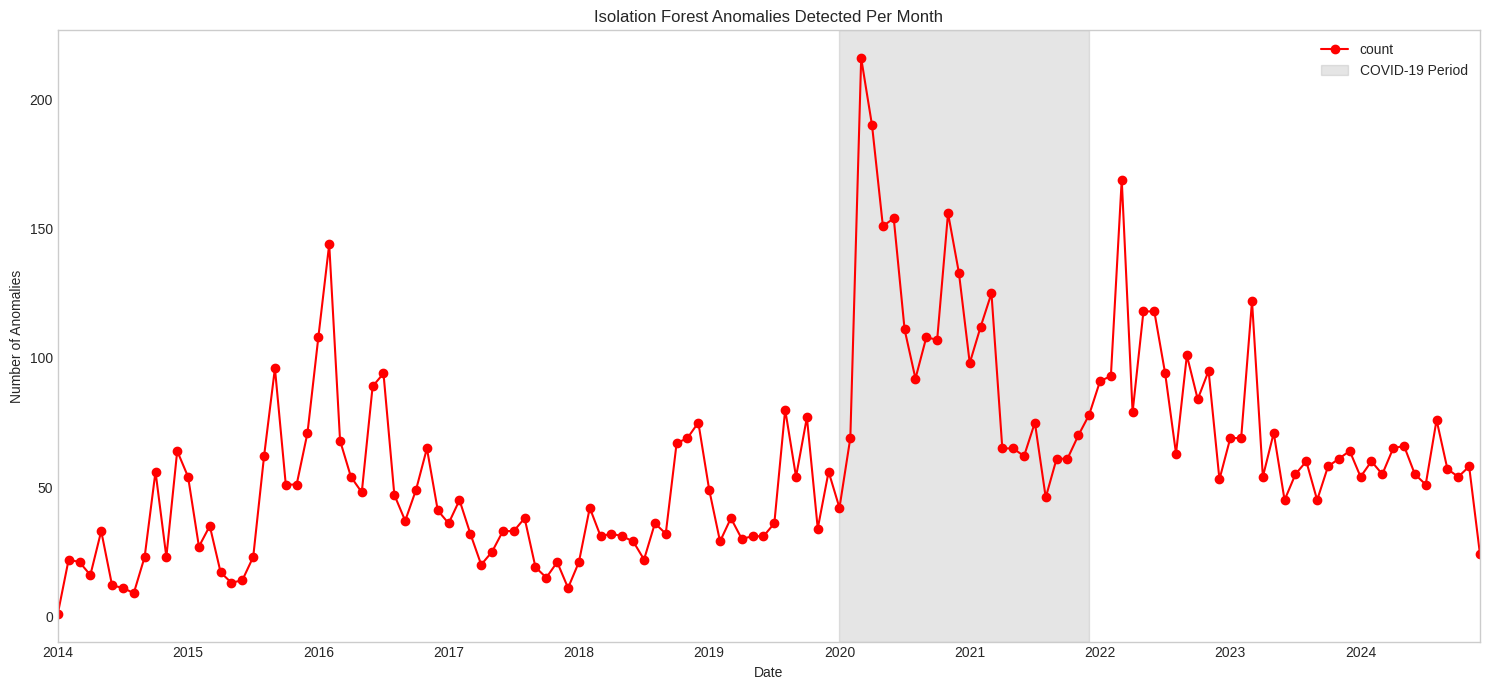


--- Generating Monthly Anomaly Count Plot ---


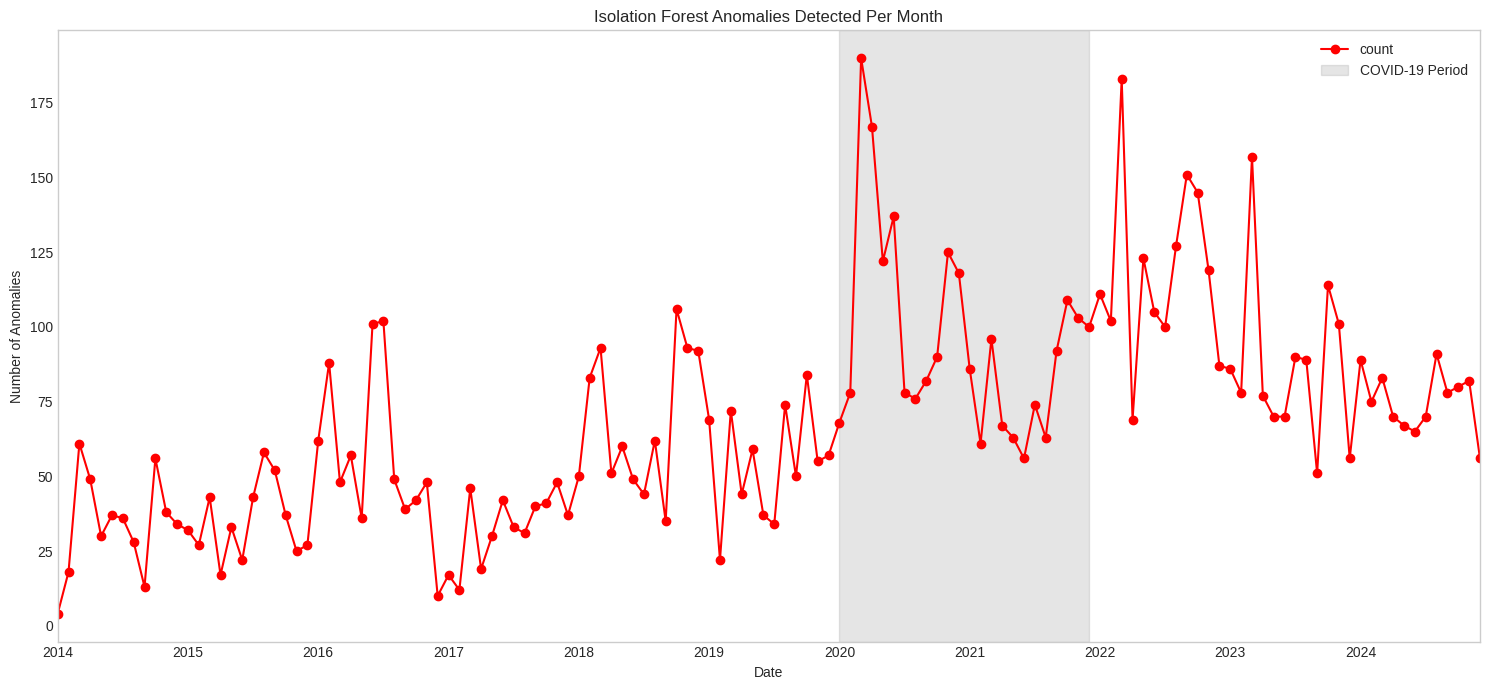

In [56]:
 # Get the top 10 most anomalous tickers by anomaly count
top_10_FTSE100_tickers = df100_opt_all_results[df100_opt_all_results['iso_forest_is_anomaly'] == 1].groupby(level='Ticker').size().nlargest(10).index.tolist()

    # Filter the results DataFrame to include only these top 10 tickers
top_10_anomalous_FTSE100_tickers_df = df100_opt_all_results[df100_opt_all_results.index.get_level_values('Ticker').isin(top_10_FTSE100_tickers)]

    # Call the function to plot the quarterly anomalies for the top 10 tickers
plot_monthly_anomalies(top_10_anomalous_FTSE100_tickers_df)


 # Get the top 10 most anomalous tickers by anomaly count
top_10_FTSE250_tickers = df250_opt_all_results[df250_opt_all_results['iso_forest_is_anomaly'] == 1].groupby(level='Ticker').size().nlargest(10).index.tolist()

    # Filter the results DataFrame to include only these top 10 tickers
top_10_anomalous_FTSE250_tickers_df = df250_opt_all_results[df250_opt_all_results.index.get_level_values('Ticker').isin(top_10_FTSE250_tickers)]

    # Call the function to plot the quarterly anomalies for the top 10 tickers
plot_monthly_anomalies(top_10_anomalous_FTSE250_tickers_df)


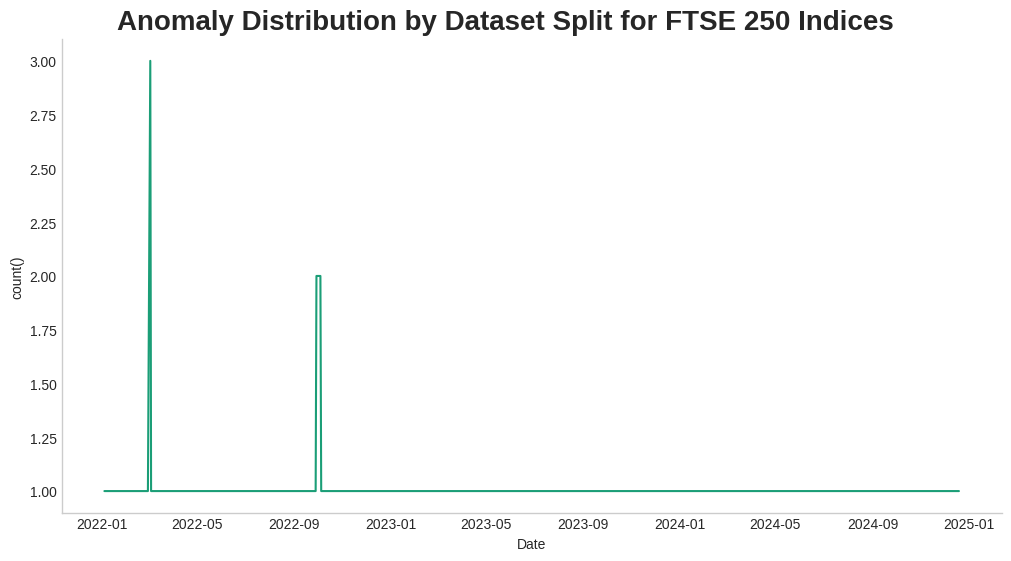

In [57]:
# @title Date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
fig.suptitle('Anomaly Distribution by Dataset Split for FTSE 250 Indices', fontsize=20, fontweight='bold', y=1.05)
df_sorted = summary_table.sort_values('Date', ascending=True)
ax.grid(False)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

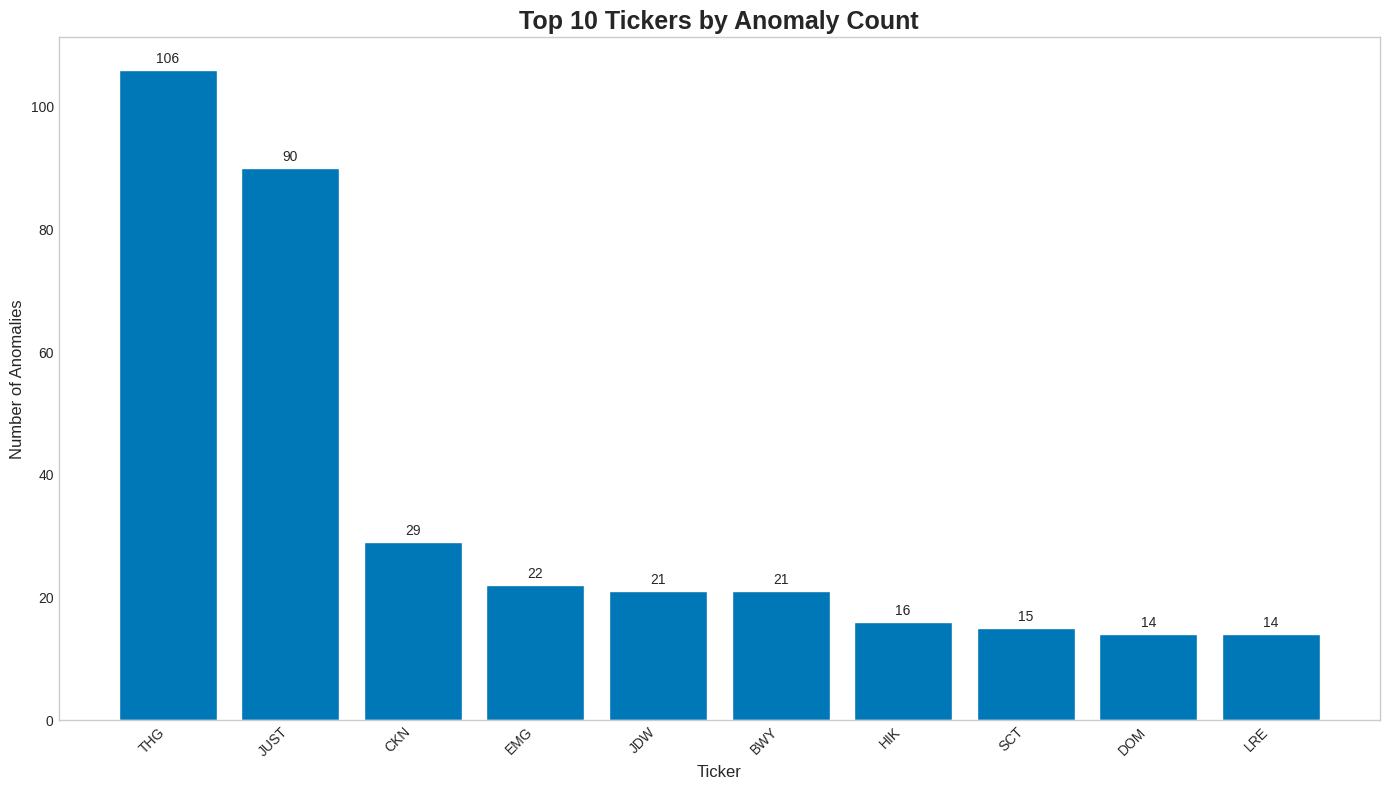

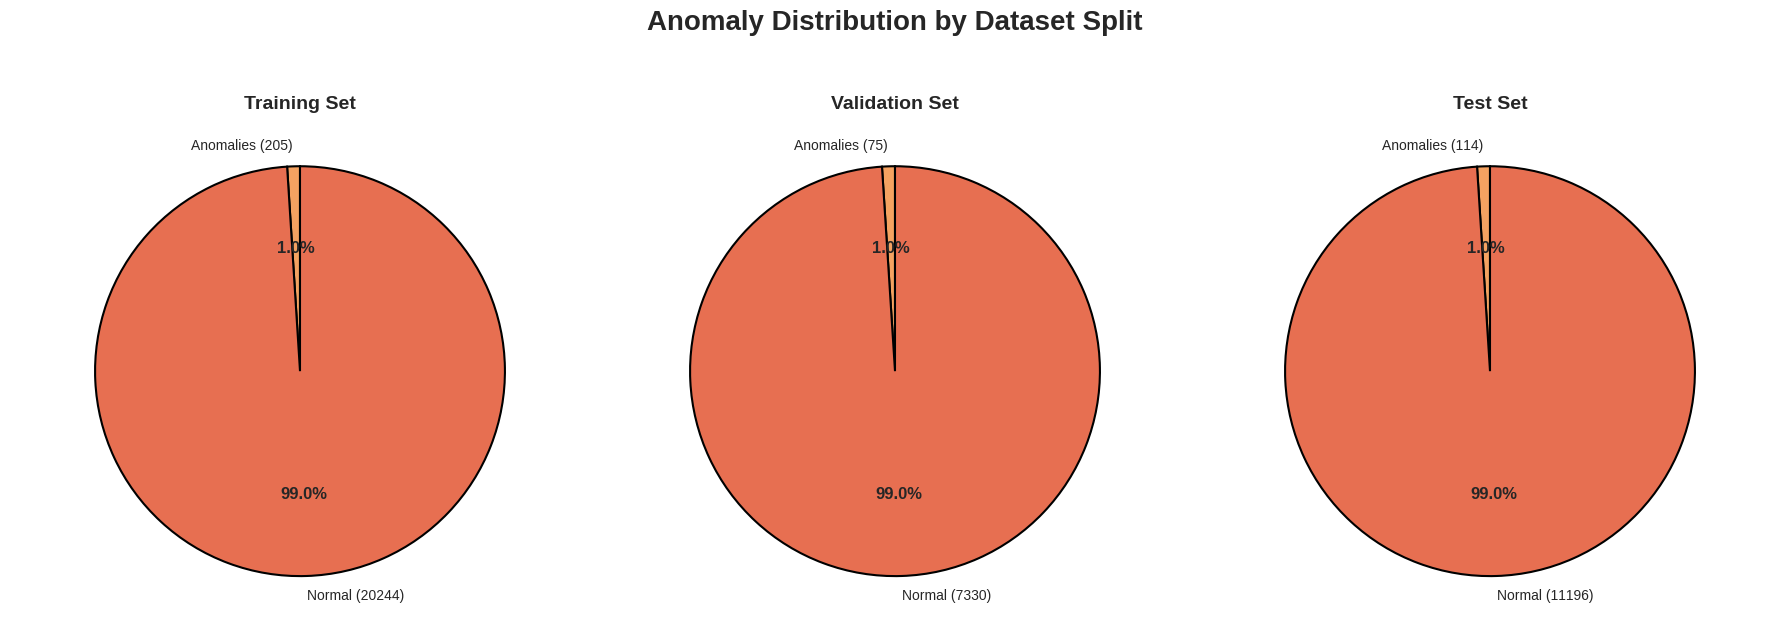

In [47]:

# Plot the bar chart for the top 10 anomalies from the combined DataFrame
plot_top_anomalies(all250_optimised_anomalies, num_to_plot=10)

# Plot the pie charts for the distribution across splits
plot_anomaly_distribution(
    train_df=best250_df_train_scored,
    val_df=best250_df_val_scored,
    test_df=best250_df_test_scored,
    anomaly_percentage=anomaly_percentage
)

In [62]:
from typing import List

def plot_anomalies_for_tickers(
    stock_data: pd.DataFrame,
    anomaly_data: pd.DataFrame,
    tickers_to_plot: List[str]
):
    """
    Generates a time-series plot for each selected ticker, highlighting detected anomalies.

    Args:
        stock_data (pd.DataFrame): The DataFrame with raw stock data (e.g., 'close' price).
                                   Assumed to have a MultiIndex (Date, Ticker).
        anomaly_data (pd.DataFrame): The DataFrame containing all detected anomalies.
                                     Assumed to have a MultiIndex (Date, Ticker).
        tickers_to_plot (List[str]): A list of stock tickers to plot.
    """
    if stock_data.empty or anomaly_data.empty:
        print("Input DataFrame is empty. Cannot generate plots.")
        return

    print("\n--- Generating Individual Anomaly Plots ---")

    for ticker in tickers_to_plot:
        # 1. Select the stock's data for the current ticker
        ticker_stock_data = stock_data[stock_data.index.get_level_values('Ticker').str.strip() == ticker].copy()

        # 2. Select the anomalies for the current ticker
        ticker_anomaly_data = anomaly_data[anomaly_data.index.get_level_values('Ticker').str.strip() == ticker].copy()

        if ticker_stock_data.empty:
            print(f"No stock data found for ticker {ticker}. Skipping plot.")
            continue

        # 3. Create the plot
        fig, ax = plt.subplots(figsize=(15, 7))

        # Plot the close price
        ax.plot(ticker_stock_data.index.get_level_values('Date'), ticker_stock_data['close'],
                label=f'{ticker} Close Price', color='seagreen')

        # Plot the anomalies as red dots
        if not ticker_anomaly_data.empty:
            ax.scatter(ticker_anomaly_data.index.get_level_values('Date'), ticker_anomaly_data['close'],
                       color='red', s=50, label='Detected Anomaly', zorder=5)

        # Formatting
        ax.set_title(f'All Anomalies Detected for {ticker}', fontsize=16)
        ax.set_xlabel('Date')
        ax.set_ylabel('Share Price (GBP)')
        ax.legend()
        ax.grid(False)
        plt.show()


--- Generating Individual Anomaly Plots ---


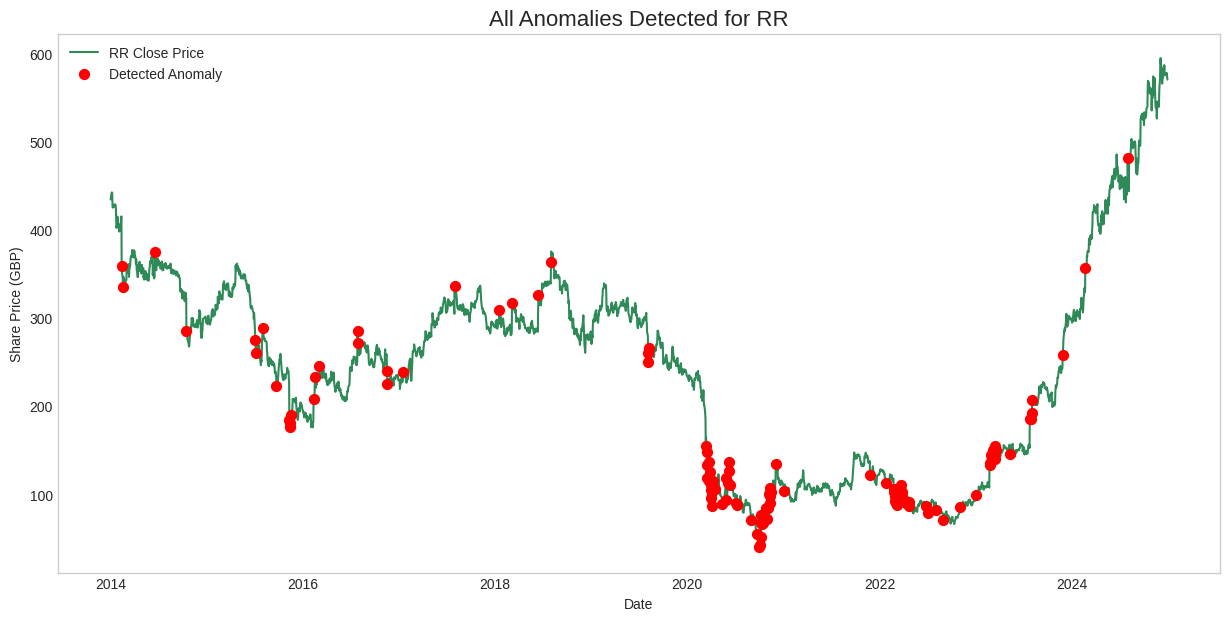

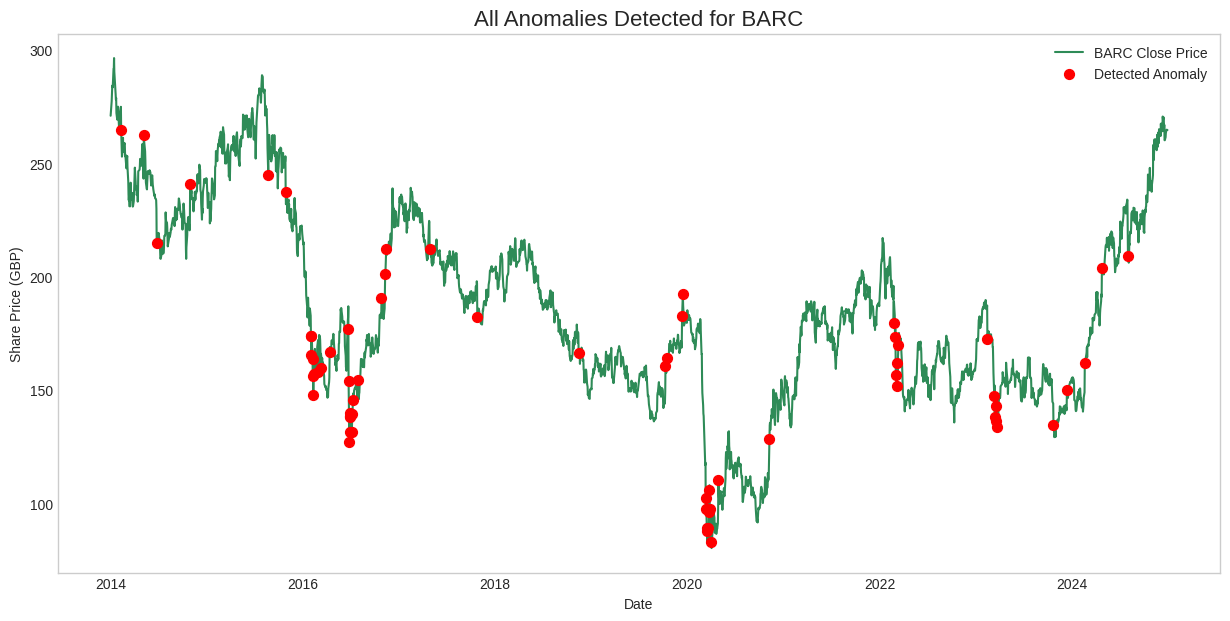

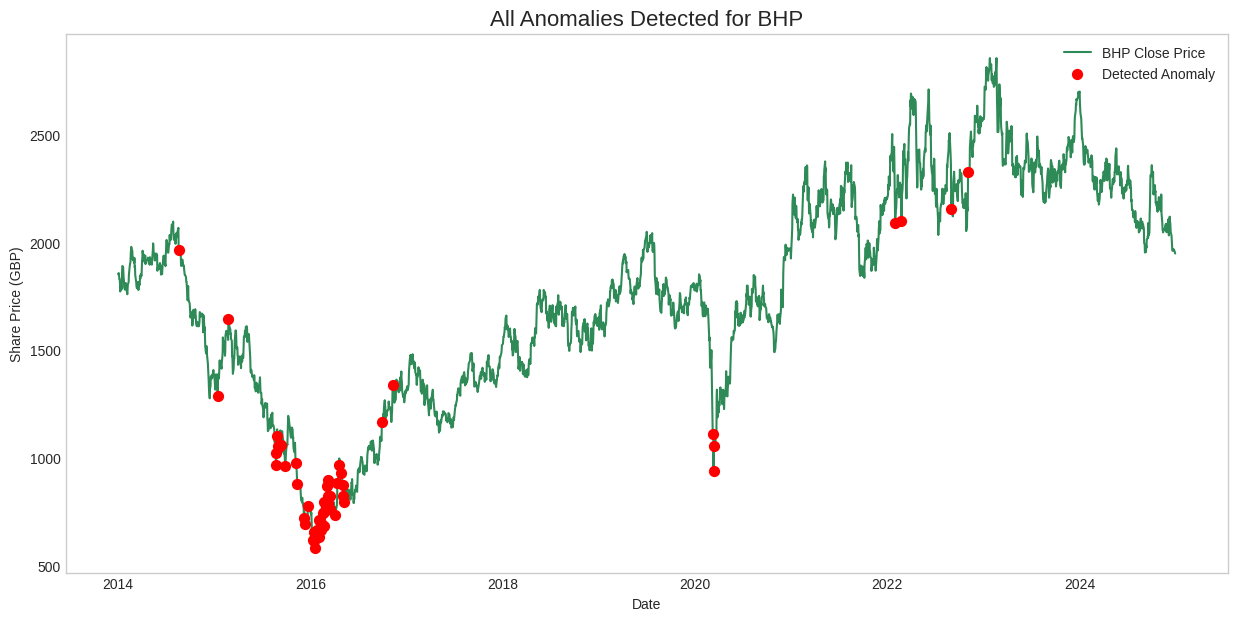

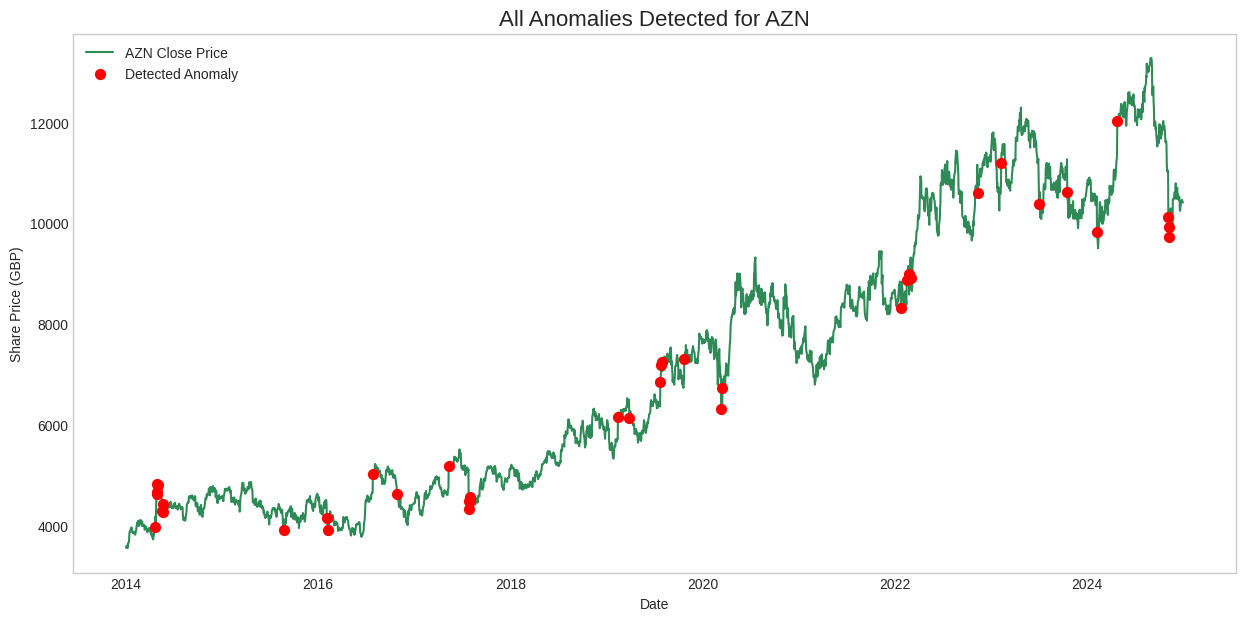

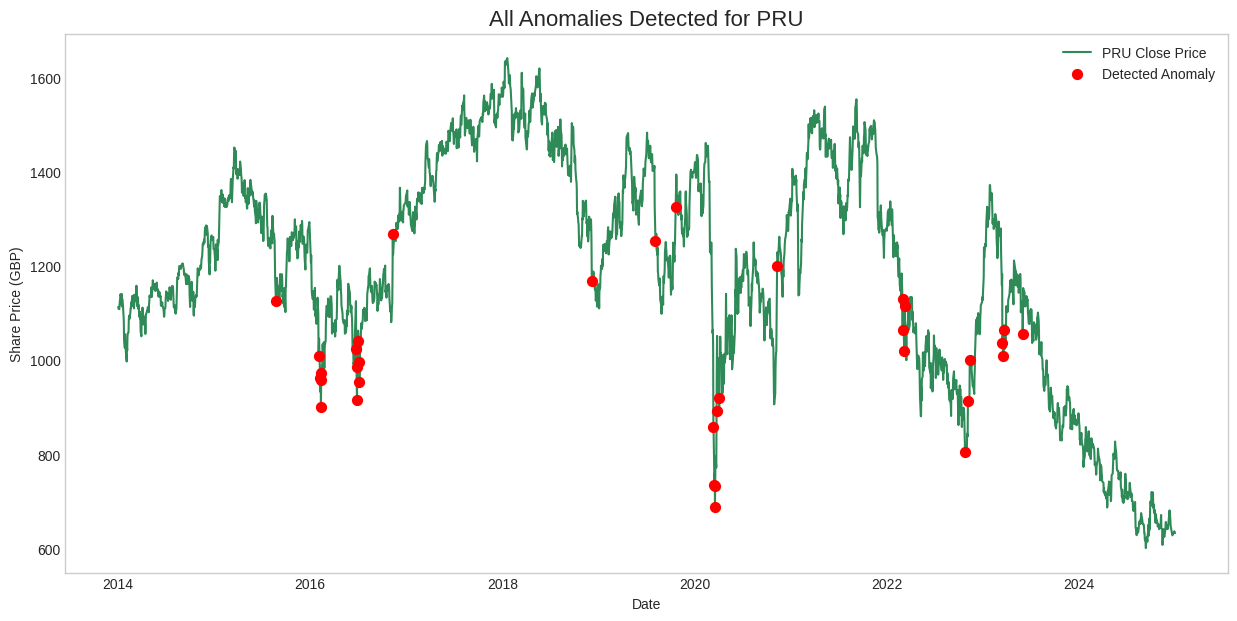


--- Generating Individual Anomaly Plots ---


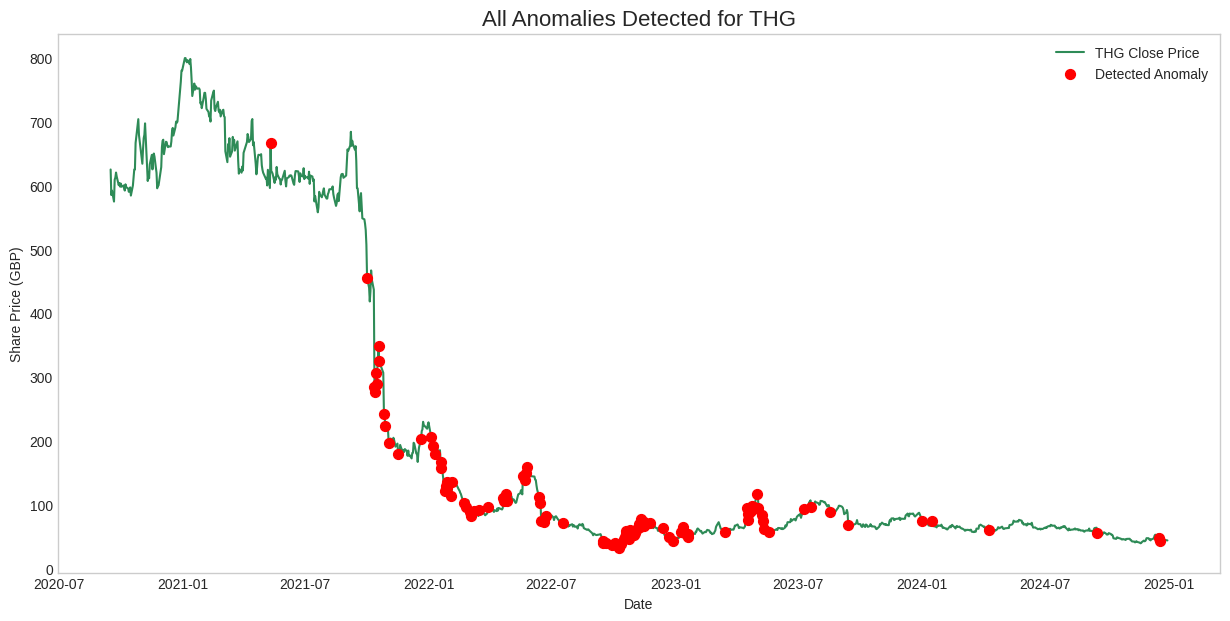

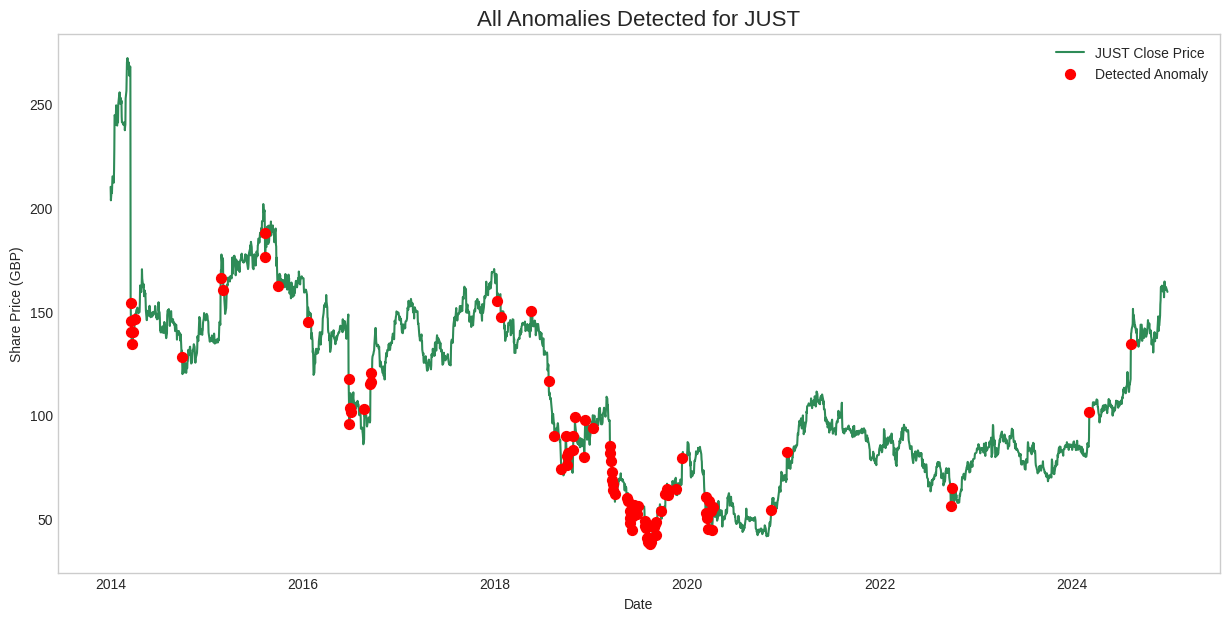

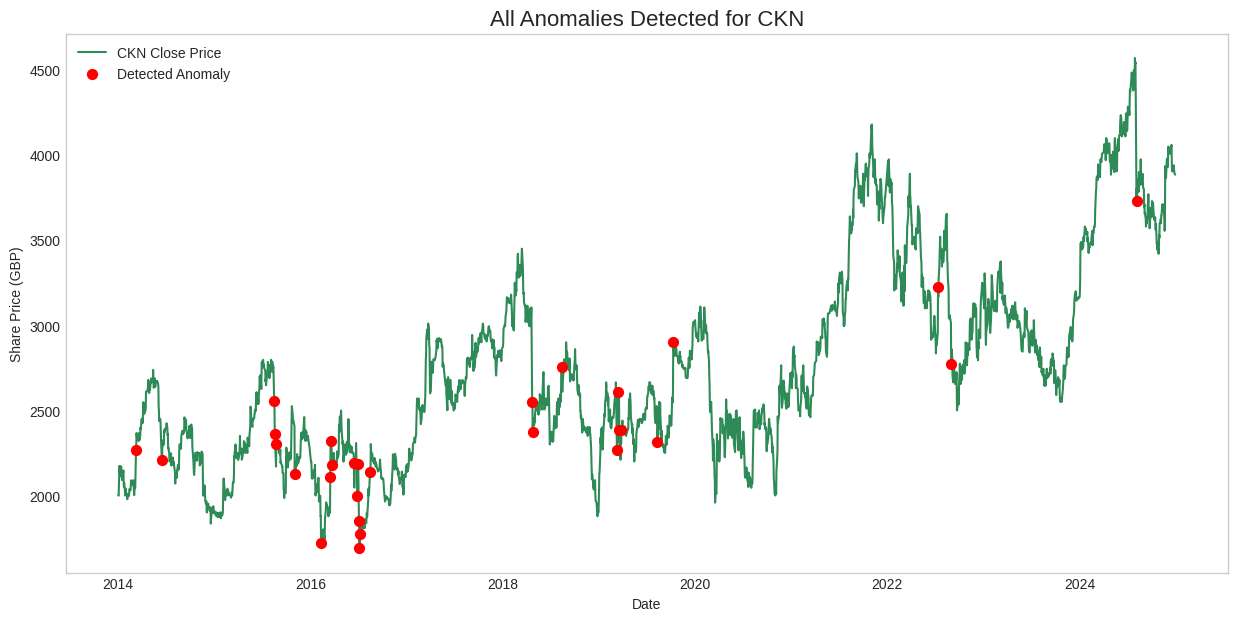

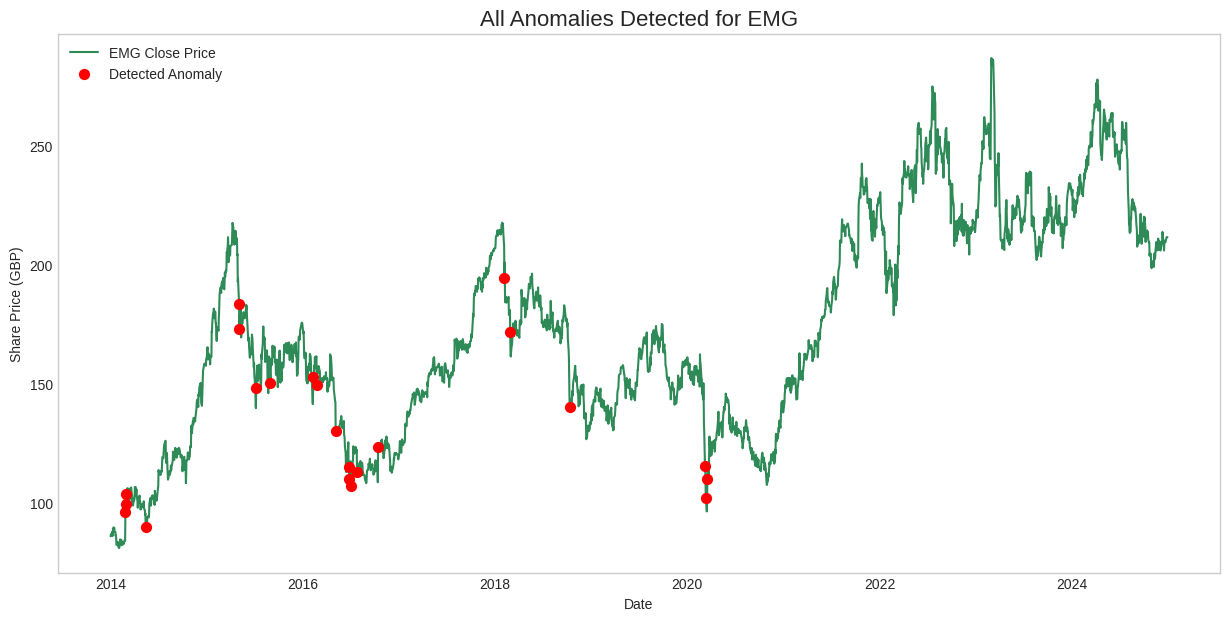

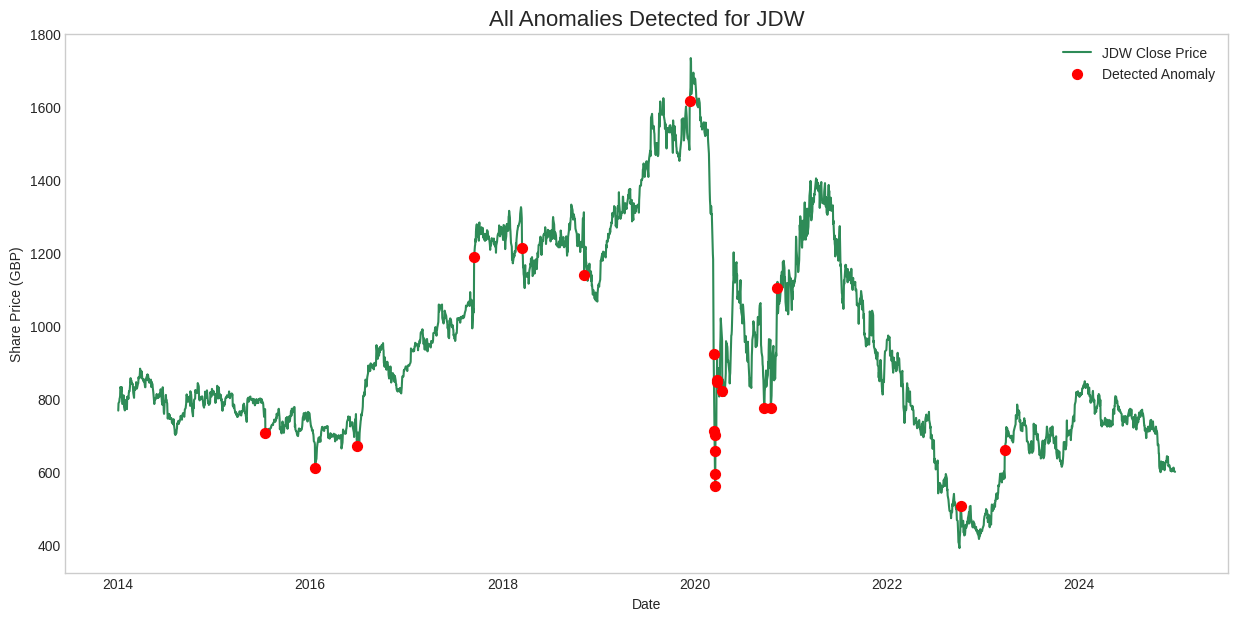

In [65]:
# --- Define the list of 5 tickers to plot ---
FTSE100_tickers_to_plot = ['RR', 'BARC', 'BHP', 'AZN', 'PRU']
FTSE250_tickers_to_plot = ['THG', 'JUST', 'CKN', 'EMG', 'JDW']

# --- Call the function ---
plot_anomalies_for_tickers(
    stock_data=ready_ftse100_data,
    anomaly_data=all100_optimised_anomalies,
    tickers_to_plot=FTSE100_tickers_to_plot
)

  # --- Call the function ---
plot_anomalies_for_tickers(
    stock_data=ready_ftse250_data,
    anomaly_data=all250_optimised_anomalies,
    tickers_to_plot=FTSE250_tickers_to_plot
)

In [ ]:
# --- Get Top 10 Tickers with Most Anomalies ---

# Prerequisite: The 'all_optimised_anomalies' DataFrame has been created by your previous code.

# 1. Access the 'Ticker' index, count each ticker, and select the top 10
top_10_250_tickers = all250_optimised_anomalies.index.get_level_values('Ticker').value_counts().head(10)

# 2. Display the result
print("Top 10 Tickers with the Most Anomalies:")
print(top_10_250_tickers)

Top 10 Tickers with the Most Anomalies:
Ticker
THG     106
JUST     90
CKN      29
EMG      22
JDW      21
BWY      21
HIK      16
SCT      15
DOM      14
LRE      14
Name: count, dtype: int64


In [ ]:
# Get the total number of rows in the combined anomaly DataFrame
total100_anomaly_count = len(all100_optimised_anomalies)

print(f"Total anomalies detected across all sets: {total100_anomaly_count}")

total250_anomaly_count = len(all250_optimised_anomalies)

print(f"Total anomalies detected across all sets: {total250_anomaly_count}")



Total anomalies detected across all sets: 416
Total anomalies detected across all sets: 394


# ***Building a DBSCAN Model for the the FTSE 100 and FTSE 250 Stocks                                                                              ***

In [66]:
# --- Define the plot_k_distance_graph function ---
def plot_k_distance_graph(df_features: pd.DataFrame, min_samples_val: int):
    """
    Plots the k-distance graph to help determine the optimal 'eps' parameter for DBSCAN.

    Args:
        df_features (pd.DataFrame): The DataFrame of features (e.g., X_eval from your split),
                                    assumed to be scaled.
        min_samples_val (int): The chosen 'min_samples' value for DBSCAN, which determines 'k'
                                for the k-distance calculation (k = min_samples_val - 1).
    """
    if df_features.empty:
        print("Input DataFrame is empty. Cannot plot k-distance graph.")
        return

    print(f"\n--- Plotting K-Distance Graph for eps Tuning (k = {min_samples_val-1}) ---")

    # Use NearestNeighbors to find the distance to the (min_samples_val - 1)-th nearest neighbor
    # (k in k-distance is min_samples - 1 because min_samples includes the point itself)
    neighbors = NearestNeighbors(n_neighbors=min_samples_val)
    neighbors_fit = neighbors.fit(df_features)

    # Distances to the n_neighbors-th nearest point for each data point
    distances, indices = neighbors_fit.kneighbors(df_features)

    # Sort distances by the distance to the (k-1)th nearest neighbor (which is min_samples_val - 1)
    # The last column of 'distances' array contains the distances to the n_neighbors-th point.
    distances = np.sort(distances[:, min_samples_val-1], axis=0)

    plt.figure(figsize=(15, 7))
    plt.plot(distances)
    plt.title(f'K-Distance Graph for eps Tuning (k = {min_samples_val-1})')
    plt.xlabel('Data Points Sorted by Distance')
    plt.ylabel(f'Distance to {min_samples_val-1}-th Nearest Neighbor')
    plt.grid(True)
    plt.axhline(y=2, color='r', linestyle='--', label='Example Threshold (2.0)') # Example threshold
    plt.legend()
    plt.show()



Chosen min_samples for DBSCAN: 10
This means k for the k-distance graph is: 9

--- Plotting K-Distance Graph for eps Tuning (k = 9) ---


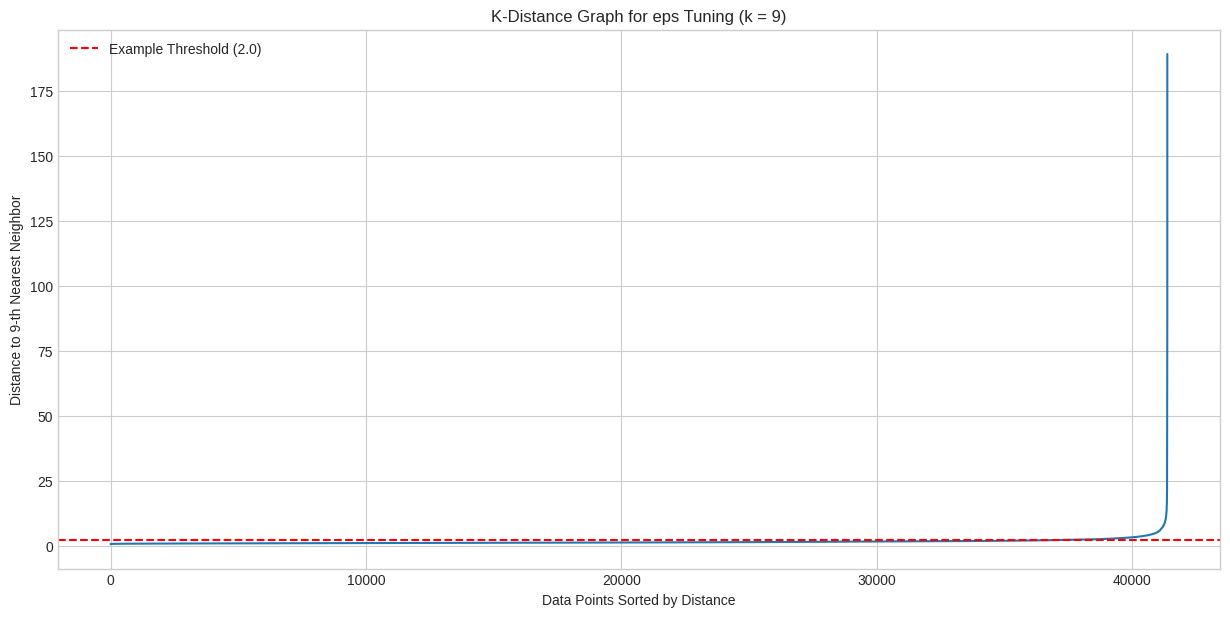


K-Distance graph plotted. Look for the 'elbow' point to choose your 'eps' value.
The 'elbow' is where the curve sharply changes slope, indicating a good 'eps' value.


In [67]:
num_features = final_processed_FTSE100_df.shape[1]
min_samples_for_dbscan = 10 # Example: 2 * 5 features = 10

print(f"\nChosen min_samples for DBSCAN: {min_samples_for_dbscan}")
print(f"This means k for the k-distance graph is: {min_samples_for_dbscan - 1}")

# --- STEP 3: Call the plot_k_distance_graph function ---
plot_k_distance_graph(final_processed_FTSE100_df, min_samples_val=min_samples_for_dbscan)

print("\nK-Distance graph plotted. Look for the 'elbow' point to choose your 'eps' value.")
print("The 'elbow' is where the curve sharply changes slope, indicating a good 'eps' value.")



Chosen min_samples for DBSCAN: 10
This means k for the k-distance graph is: 9

--- Plotting K-Distance Graph for eps Tuning (k = 9) ---


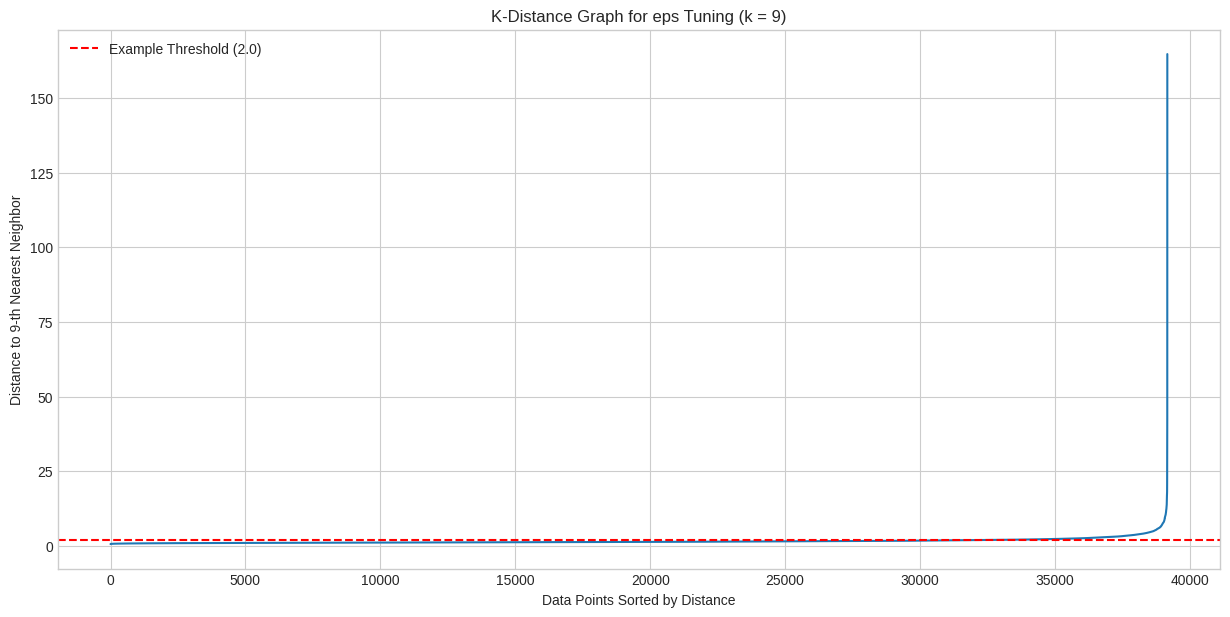


K-Distance graph plotted. Look for the 'elbow' point to choose your 'eps' value.
The 'elbow' is where the curve sharply changes slope, indicating a good 'eps' value.


In [68]:
num_features = final_processed_FTSE100_df.shape[1]
min_samples_for_dbscan = 10 # Example: 2 * 5 features = 10

print(f"\nChosen min_samples for DBSCAN: {min_samples_for_dbscan}")
print(f"This means k for the k-distance graph is: {min_samples_for_dbscan - 1}")

# --- STEP 3: Call the plot_k_distance_graph function ---
plot_k_distance_graph(final_processed_FTSE250_df, min_samples_val=min_samples_for_dbscan)

print("\nK-Distance graph plotted. Look for the 'elbow' point to choose your 'eps' value.")
print("The 'elbow' is where the curve sharply changes slope, indicating a good 'eps' value.")

In [69]:
def train_and_score_dbscan(
    df_features: pd.DataFrame,
    eps: float,
    min_samples: int
) -> pd.DataFrame:
    """
    Trains a DBSCAN model on the input features and assigns cluster labels,
    identifying anomalies as noise points.

    Args:
        df_features (pd.DataFrame): The DataFrame of features, assumed to be scaled and NaN-free.
                                    It should have a MultiIndex (Date, Ticker).
        eps (float): The maximum distance between two samples for one to be considered
                     as in the neighborhood of the other. Determined from k-distance graph.
        min_samples (int): The number of samples (or total weight) in a neighborhood
                           for a point to be considered as a core point.

    Returns:
        pd.DataFrame: A copy of the input df_features with 'dbscan_cluster_label'
                      and 'dbscan_is_anomaly' columns added.
                      'dbscan_cluster_label' will be -1 for anomalies, and 0, 1, 2... for clusters.
                      'dbscan_is_anomaly' will be True for anomalies, False otherwise.
    """
    if df_features.empty:
        print("Input DataFrame is empty. Cannot train DBSCAN model.")
        return pd.DataFrame()

    print(f"\n--- Training DBSCAN Model (eps={eps}, min_samples={min_samples}) ---")

    # Initialize DBSCAN model
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit the model and predict cluster labels
    # DBSCAN operates on a NumPy array, so we pass df_features.values
    # The labels will be -1 for noise (anomalies), and non-negative integers for clusters.
    dbscan_labels = dbscan_model.fit_predict(df_features.values)

    # Create a copy of the input DataFrame to add results
    df_results = df_features.copy()

    # Add the cluster labels to the DataFrame
    df_results['dbscan_cluster_label'] = dbscan_labels

    # Identify anomalies: points with a cluster label of -1 are considered anomalies
    df_results['dbscan_is_anomaly'] = (dbscan_labels == -1)

    num_anomalies = df_results['dbscan_is_anomaly'].sum()
    num_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

    print(f"DBSCAN training complete. Detected {num_anomalies} anomalies.")
    print(f"Found {num_clusters} clusters (excluding noise).")
    print("--- DBSCAN Training and Scoring Complete ---")

    return df_results

In [70]:
 # --- Call the train_and_score_dbscan function ---

my_eps_value = 2 # As determined from your k-distance graph

df100_dbscan_results = train_and_score_dbscan(
    df_features=final_processed_FTSE100_df,
    eps=my_eps_value,
    min_samples=min_samples_for_dbscan
)

print("\n--- DBSCAN Results (head) ---")
print(df100_dbscan_results.head())
print("\n--- DBSCAN Results (Anomalies) ---")
print(df100_dbscan_results[df100_dbscan_results['dbscan_is_anomaly'] == True])
print(f"\nTotal anomalies detected by DBSCAN: {df100_dbscan_results['dbscan_is_anomaly'].sum()}")



--- Training DBSCAN Model (eps=2, min_samples=10) ---
DBSCAN training complete. Detected 3224 anomalies.
Found 2 clusters (excluding noise).
--- DBSCAN Training and Scoring Complete ---

--- DBSCAN Results (head) ---
                   log_return  simple_return  log_adj_close_return  return_5d  return_20d  rolling_std_5d_log_return  rolling_std_20d_log_return  daily_range_norm  garman_klass_vol  volume_change  avg_volume_20d  relative_volume    sma_5d   sma_20d  deviation_from_sma_20d  typical_price  daily_market_mean_log_return  daily_market_median_log_return  deviation_from_daily_mean_return  deviation_from_daily_median_return  daily_return_rank_pct  dbscan_cluster_label  dbscan_is_anomaly
Date       Ticker                                                                                                                                                                                                                                                                                         

In [71]:
 # --- Call the train_and_score_dbscan function ---

my_eps_value = 2.0 # As determined from your k-distance graph

df250_dbscan_results = train_and_score_dbscan(
    df_features=final_processed_FTSE250_df,
    eps=my_eps_value,
    min_samples=min_samples_for_dbscan
)

print("\n--- DBSCAN Results (head) ---")
print(df250_dbscan_results.head())
print("\n--- DBSCAN Results (Anomalies) ---")
print(df250_dbscan_results[df250_dbscan_results['dbscan_is_anomaly'] == True])
print(f"\nTotal anomalies detected by DBSCAN: {df250_dbscan_results['dbscan_is_anomaly'].sum()}")


--- Training DBSCAN Model (eps=2.0, min_samples=10) ---
DBSCAN training complete. Detected 3925 anomalies.
Found 1 clusters (excluding noise).
--- DBSCAN Training and Scoring Complete ---

--- DBSCAN Results (head) ---
                   log_return  simple_return  log_adj_close_return  return_5d  return_20d  rolling_std_5d_log_return  rolling_std_20d_log_return  daily_range_norm  garman_klass_vol  volume_change  avg_volume_20d  relative_volume    sma_5d   sma_20d  deviation_from_sma_20d  typical_price  daily_market_mean_log_return  daily_market_median_log_return  deviation_from_daily_mean_return  deviation_from_daily_median_return  daily_return_rank_pct  dbscan_cluster_label  dbscan_is_anomaly
Date       Ticker                                                                                                                                                                                                                                                                                       

In [72]:
def train_and_score_dbscan(df_features: pd.DataFrame, eps: float, min_samples: int) -> pd.DataFrame:
    """
    Trains a DBSCAN model on the input features and assigns cluster labels,
    identifying anomalies as noise points.
    """
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan_model.fit_predict(df_features.values)
    df_results = df_features.copy()
    df_results['dbscan_cluster_label'] = dbscan_labels
    df_results['dbscan_is_anomaly'] = (dbscan_labels == -1)
    return df_results

def optimize_dbscan(df_features: pd.DataFrame, param_grid_dbscan: Dict[str, Any]) -> pd.DataFrame:
    """
    Performs a manual grid search to find the optimal DBSCAN parameters.
    It returns a summary table of results for each parameter combination.

    Args:
        df_features (pd.DataFrame): The DataFrame of features, scaled and NaN-free.
        param_grid_dbscan (Dict[str, Any]): Dictionary with parameters to test.

    Returns:
        pd.DataFrame: A summary table of the optimization results.
    """
    if df_features.empty:
        print("Input DataFrame is empty. Cannot optimize DBSCAN.")
        return pd.DataFrame()

    print("\n--- Starting DBSCAN Manual Optimization ---")

    results_list = []

    # Use ParameterGrid to iterate through all combinations
    grid_combinations = list(ParameterGrid(param_grid_dbscan))

    for i, params in enumerate(grid_combinations):
        current_eps = params['eps']
        current_min_samples = params['min_samples']

        print(f"\nEvaluating combination {i+1}/{len(grid_combinations)}: eps={current_eps}, min_samples={current_min_samples}")

        df_dbscan_results = train_and_score_dbscan(
            df_features=df_features,
            eps=current_eps,
            min_samples=current_min_samples
        )

        num_anomalies_detected = df_dbscan_results['dbscan_is_anomaly'].sum()
        num_clusters_formed = len(np.unique(df_dbscan_results['dbscan_cluster_label'])) - (1 if -1 in df_dbscan_results['dbscan_cluster_label'].values else 0)

        results_list.append({
            'eps': current_eps,
            'min_samples': current_min_samples,
            'num_anomalies': num_anomalies_detected,
            'num_clusters': num_clusters_formed,
            'anomaly_percentage': (num_anomalies_detected / len(df_features)) * 100
        })

    print("\n--- DBSCAN Optimization Summary ---")
    df_optimization_summary = pd.DataFrame(results_list)
    print(df_optimization_summary.sort_values(by='num_anomalies', ascending=False))

    return df_optimization_summary

In [73]:
# Assuming num_features is determined from your df_features
# num_features = df_features.shape[1]

param_grid_dbscan = {
    'eps': [0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5], # Focus around the upper end of your current range and slightly above
    'min_samples': [2, 3, 4] # Keep min_samples very small and focused
}

# Assuming df_features is your processed, scaled, NaN-free data
optimization_results = optimize_dbscan(final_processed_FTSE100_df, param_grid_dbscan)

# The function will print a summary table of results.


--- Starting DBSCAN Manual Optimization ---

Evaluating combination 1/21: eps=0.9, min_samples=2

Evaluating combination 2/21: eps=0.9, min_samples=3

Evaluating combination 3/21: eps=0.9, min_samples=4

Evaluating combination 4/21: eps=1.0, min_samples=2

Evaluating combination 5/21: eps=1.0, min_samples=3

Evaluating combination 6/21: eps=1.0, min_samples=4

Evaluating combination 7/21: eps=1.1, min_samples=2

Evaluating combination 8/21: eps=1.1, min_samples=3

Evaluating combination 9/21: eps=1.1, min_samples=4

Evaluating combination 10/21: eps=1.2, min_samples=2

Evaluating combination 11/21: eps=1.2, min_samples=3

Evaluating combination 12/21: eps=1.2, min_samples=4

Evaluating combination 13/21: eps=1.3, min_samples=2

Evaluating combination 14/21: eps=1.3, min_samples=3

Evaluating combination 15/21: eps=1.3, min_samples=4

Evaluating combination 16/21: eps=1.4, min_samples=2

Evaluating combination 17/21: eps=1.4, min_samples=3

Evaluating combination 18/21: eps=1.4, min_sa

In [74]:
# Assuming num_features is determined from your df_features
# num_features = df_features.shape[1]

param_grid_dbscan = {
    'eps': [0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5], # Focus around the upper end of your current range and slightly above
    'min_samples': [2, 3, 4] # Keep min_samples very small and focused
}

# Assuming df_features is your processed, scaled, NaN-free data
optimization_results = optimize_dbscan(final_processed_FTSE250_df, param_grid_dbscan)

# The function will print a summary table of results.


--- Starting DBSCAN Manual Optimization ---

Evaluating combination 1/21: eps=0.9, min_samples=2

Evaluating combination 2/21: eps=0.9, min_samples=3

Evaluating combination 3/21: eps=0.9, min_samples=4

Evaluating combination 4/21: eps=1.0, min_samples=2

Evaluating combination 5/21: eps=1.0, min_samples=3

Evaluating combination 6/21: eps=1.0, min_samples=4

Evaluating combination 7/21: eps=1.1, min_samples=2

Evaluating combination 8/21: eps=1.1, min_samples=3

Evaluating combination 9/21: eps=1.1, min_samples=4

Evaluating combination 10/21: eps=1.2, min_samples=2

Evaluating combination 11/21: eps=1.2, min_samples=3

Evaluating combination 12/21: eps=1.2, min_samples=4

Evaluating combination 13/21: eps=1.3, min_samples=2

Evaluating combination 14/21: eps=1.3, min_samples=3

Evaluating combination 15/21: eps=1.3, min_samples=4

Evaluating combination 16/21: eps=1.4, min_samples=2

Evaluating combination 17/21: eps=1.4, min_samples=3

Evaluating combination 18/21: eps=1.4, min_sa

In [75]:
# --- Call the train_and_score_dbscan function using the optimised hyperparameters ---

my_eps_value = 1.5 # As determined from your k-distance graph

df100_optimised_dbscan_results = train_and_score_dbscan(
    df_features=final_processed_FTSE100_df,
    eps=my_eps_value,
    min_samples=3
)

print("\n--- DBSCAN Results (head) ---")
print(df100_optimised_dbscan_results.head())
print("\n--- DBSCAN Results (Anomalies) ---")
print(df100_optimised_dbscan_results[df100_optimised_dbscan_results['dbscan_is_anomaly'] == True])
print(f"\nTotal anomalies detected by DBSCAN: {df100_optimised_dbscan_results['dbscan_is_anomaly'].sum()}")

df250_optimised_dbscan_results = train_and_score_dbscan(
    df_features=final_processed_FTSE250_df,
    eps=my_eps_value,
    min_samples=3
)

print("\n--- DBSCAN Results (head) ---")
print(df250_optimised_dbscan_results.head())
print("\n--- DBSCAN Results (Anomalies) ---")
print(df250_optimised_dbscan_results[df250_dbscan_results['dbscan_is_anomaly'] == True])
print(f"\nTotal anomalies detected by DBSCAN: {df250_optimised_dbscan_results['dbscan_is_anomaly'].sum()}")



--- DBSCAN Results (head) ---
                   log_return  simple_return  log_adj_close_return  return_5d  return_20d  rolling_std_5d_log_return  rolling_std_20d_log_return  daily_range_norm  garman_klass_vol  volume_change  avg_volume_20d  relative_volume    sma_5d   sma_20d  deviation_from_sma_20d  typical_price  daily_market_mean_log_return  daily_market_median_log_return  deviation_from_daily_mean_return  deviation_from_daily_median_return  daily_return_rank_pct  dbscan_cluster_label  dbscan_is_anomaly
Date       Ticker                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
2

In [76]:
def visualize_dbscan_results(df_dbscan_results: pd.DataFrame, original_raw_data: pd.DataFrame, num_top_anomalies: int = 5):
    """
    Generates key visualizations for a DBSCAN model's results.

    Args:
        df_dbscan_results (pd.DataFrame): The DataFrame with features, 'dbscan_cluster_label',
                                          and 'dbscan_is_anomaly' columns.
        original_raw_data (pd.DataFrame): The original raw data DataFrame with
                                          'close' and other base columns for context.
        num_top_anomalies (int): Number of most anomalous events to highlight in plots.
    """
    if df_dbscan_results.empty:
        print("Input DataFrame is empty. Cannot visualize results.")
        return

# --- 1. Anomaly Summary ---
    total_anomalies = df_dbscan_results['dbscan_is_anomaly'].sum()
    print("\n--- DBSCAN Anomaly Summary ---")
    print(f"Total anomalies detected: {total_anomalies} out of {len(df_dbscan_results)} samples.")

    if total_anomalies > 0:
        # Get the top 10 most anomalous indices
        # In DBSCAN, all anomalies (-1) are equally anomalous in the model's eyes.
        # We'll show the first 10 detected anomalies, which are the most prominent.
        anomalies_df = df_dbscan_results[df_dbscan_results['dbscan_is_anomaly'] == True]
        print("\nTop 10 Anomalous Data Points (First 10 detected):")
        print(anomalies_df.head(10).reset_index())
    else:
        print("No anomalies detected.")
        return

    # --- 1. PCA Scatter Plot: Visualize Clusters and Anomalies ---
    # This is necessary as data is high-dimensional (21 features)
    print("\n--- Generating PCA Scatter Plot for Clusters and Anomalies ---")

    # Filter out any non-numerical columns and DBSCAN labels for PCA
    feature_cols = [col for col in df_dbscan_results.columns
                    if pd.api.types.is_numeric_dtype(df_dbscan_results[col]) and
                    col not in ['dbscan_cluster_label', 'dbscan_is_anomaly']]

    X_features = df_dbscan_results[feature_cols].values
    y_labels = df_dbscan_results['dbscan_cluster_label'].values

    # Perform PCA to reduce data to 2 dimensions for plotting
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_features)

    # Create a DataFrame for plotting
    df_pca = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
    df_pca['cluster_label'] = y_labels

    # Prepare colors: use a colormap for clusters, and a distinct color for anomalies (-1)
    unique_labels = np.unique(y_labels)
    cmap = plt.cm.get_cmap('viridis', len(unique_labels))
    colors = [cmap(i) if label != -1 else 'black' for i, label in enumerate(unique_labels)]

    plt.figure(figsize=(12, 8))
    for label, color in zip(unique_labels, colors):
        if label == -1:
            plt.scatter(components[y_labels == label, 0], components[y_labels == label, 1],
                        c=color, label='Anomalies', s=50, marker='X', alpha=0.8)
        else:
            plt.scatter(components[y_labels == label, 0], components[y_labels == label, 1],
                        c=color, label=f'Cluster {label}', s=20, alpha=0.5)

    plt.title('DBSCAN Clusters and Anomalies (PCA-Reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- 2. Time-Series Plot with Anomalies Highlighted ---
    print("\n--- Generating Time-Series Plot with Anomalies Highlighted ---")

    # Merge the anomaly results with the original raw data for context
    full_data_for_plot = original_raw_data.merge(
        df_dbscan_results[['dbscan_is_anomaly']],
        left_index=True,
        right_index=True,
        how='inner'
    )

    anomalies_for_plot = full_data_for_plot[full_data_for_plot['dbscan_is_anomaly'] == True]

    plt.figure(figsize=(15, 7))
    sns.lineplot(data=full_data_for_plot, x='Date', y='close', hue='Ticker', alpha=0.5, legend=False)

    # Plot anomalies on top
    sns.scatterplot(data=anomalies_for_plot.reset_index(),
                    x='Date', y='close',
                    hue='Ticker', palette='deep', s=100, marker='X', legend='full',
                    edgecolor='black', linewidth=1)

    plt.title('Close Price with DBSCAN Anomalies Highlighted')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [78]:
def plot_top_dbscan_anomalies_by_ticker(df_dbscan_results: pd.DataFrame, num_to_plot: int = 10):
    """
    Plots a bar chart of the top N tickers with the most DBSCAN anomalies.

    Args:
        df_dbscan_results (pd.DataFrame): DataFrame containing DBSCAN results.
                                          It must have a MultiIndex ('Date', 'Ticker').
        num_to_plot (int): The number of top tickers to display.
    """
    if df_dbscan_results.empty:
        print("Input DataFrame is empty. Cannot generate plot.")
        return

    # Filter for anomalies only (DBSCAN anomalies are typically labeled -1 or True)
    anomalies_only_df = df_dbscan_results[df_dbscan_results['dbscan_is_anomaly'] == True]

    if anomalies_only_df.empty:
        print("No DBSCAN anomalies detected. Cannot generate plot.")
        return

    # Count the number of anomalies for each ticker
    anomaly_counts = anomalies_only_df.index.get_level_values('Ticker').value_counts().head(num_to_plot)

    labels = anomaly_counts.index
    values = anomaly_counts.values

    # Create the plot
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(14, 8))
    bars = ax.bar(labels, values, color='#e76f51')

    # Add labels and a title
    ax.set_title(f'Top {num_to_plot} Tickers by DBSCAN Anomaly Count', fontsize=18, fontweight='bold')
    ax.set_xlabel('Ticker', fontsize=12)
    ax.set_ylabel('Number of Anomalies', fontsize=12)
    ax.grid(False)

    # Add the count on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

def plot_dbscan_distribution_pie_chart(df_dbscan_results: pd.DataFrame):
    """
    Creates a pie chart showing the percentage of anomalies and normal data points.

    Args:
        df_dbscan_results (pd.DataFrame): DataFrame containing DBSCAN results
                                          with a 'dbscan_is_anomaly' column.
    """
    if df_dbscan_results.empty:
        print("Input DataFrame is empty. Cannot generate pie chart.")
        return

    # Count anomalies and non-anomalies
    total_data_points = len(df_dbscan_results)
    num_anomalies = df_dbscan_results['dbscan_is_anomaly'].sum()
    num_normal = total_data_points - num_anomalies

    if total_data_points == 0:
        print("No data points to plot for pie chart.")
        return

    sizes = [num_anomalies, num_normal]
    labels = [f'Anomalies ({num_anomalies})', f'Normal ({num_normal})']
    colors = ['#e76f51', '#2a9d8f']

    plt.figure(figsize=(8, 8))

    # Plot the pie chart
    wedges, texts, autotexts = plt.pie(
        sizes,
        labels=labels,
        autopct=lambda p: f'{p:.1f}%', # Display percentages with one decimal place
        colors=colors,
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'antialiased': True}
    )

    plt.title('DBSCAN Anomaly Distribution', fontsize=18, fontweight='bold')
    plt.axis('equal') # Ensures the pie chart is circular.

    # Adjust autopct text properties for better visibility
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')

    plt.tight_layout()
    plt.show()

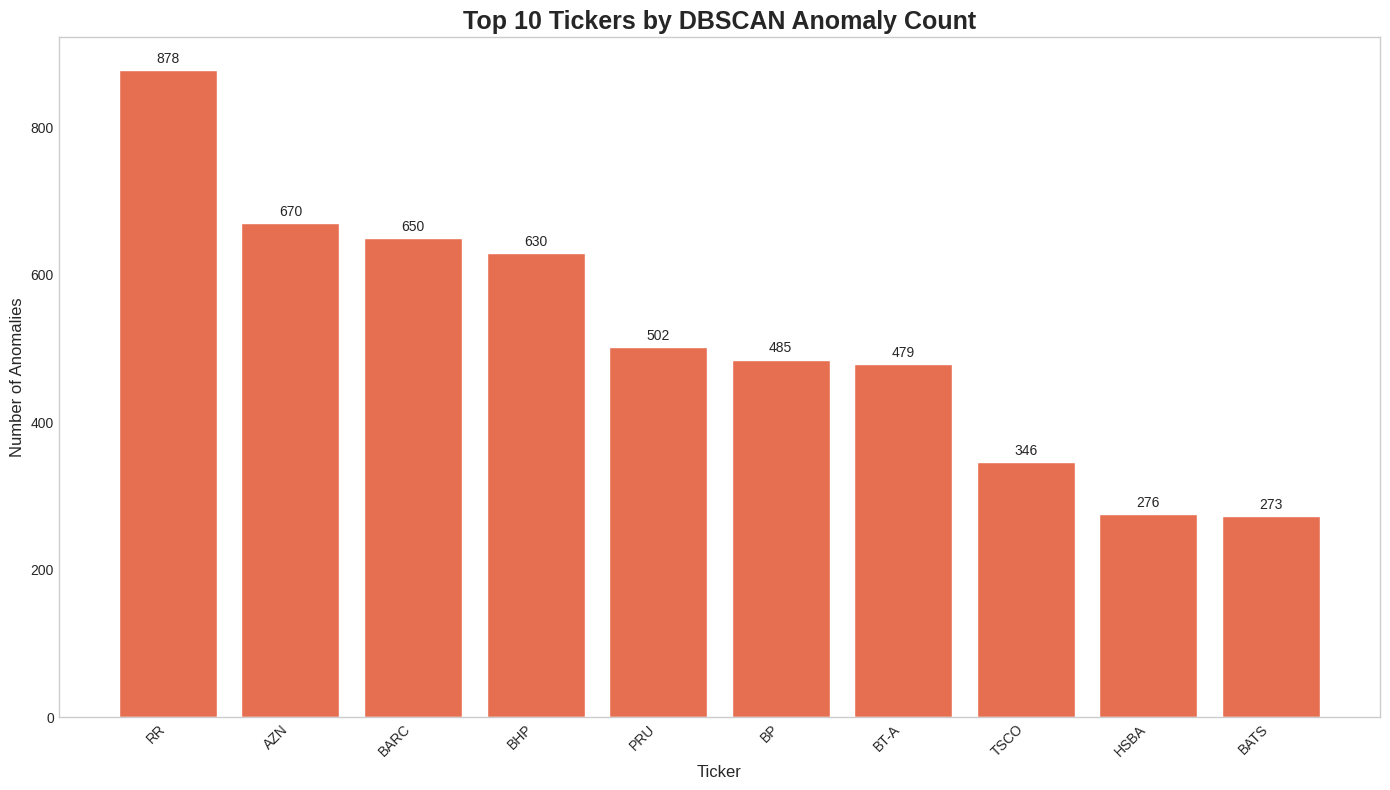

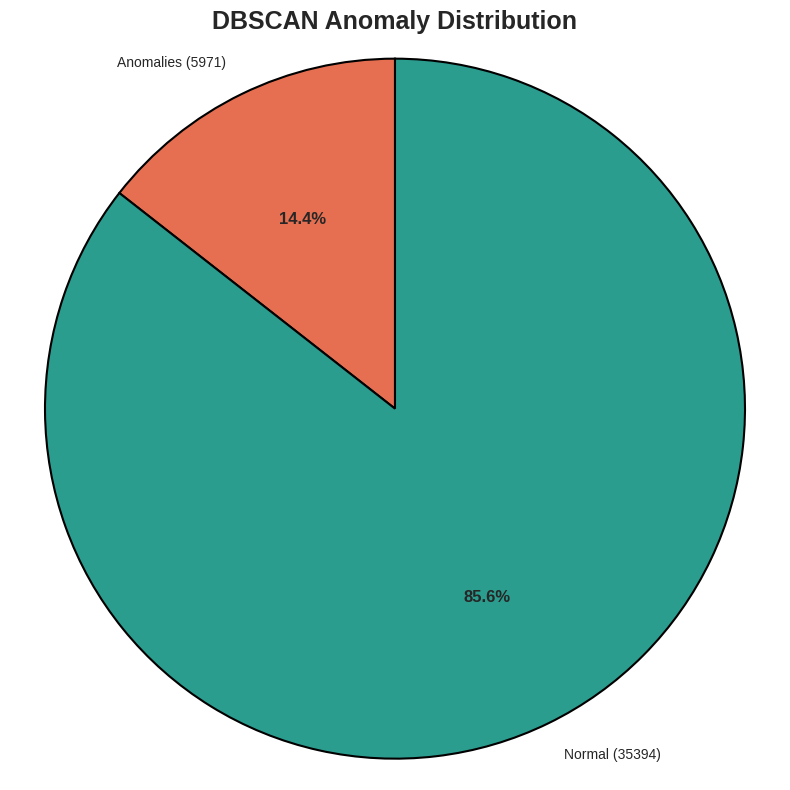

In [79]:
plot_top_dbscan_anomalies_by_ticker(df100_optimised_dbscan_results.copy())
plot_dbscan_distribution_pie_chart(df100_optimised_dbscan_results.copy())

In [80]:
# Call the DBSCAN anomaly analysis function to visualize the optimised parameters
visualize_dbscan_results(
    df100_optimised_dbscan_results.copy(), # Pass a copy if you don't want the original altered
    ready_ftse100_data.copy(),     # Pass a copy for the original data

)

# Call the DBSCAN anomaly analysis function
visualize_dbscan_results(
    df250_optimised_dbscan_results.copy(), # Pass a copy if you don't want the original altered
    ready_ftse250_data.copy(),     # Pass a copy for the original data

)

Output hidden; open in https://colab.research.google.com to view.

In [84]:
def analyze_and_visualise_dbscan_anomalies(
    X_eval_dbscan_scored: pd.DataFrame,
    my_clean_base_df: pd.DataFrame, # Original clean data with raw prices/volumes
    num_top_anomalies_to_plot: int = 5,
    window_days_for_plot: int = 40 # Days before and after anomaly for time-series plot
):
    """
    Performs detailed analysis and visualization of anomalies detected by DBSCAN.

    Args:
        X_eval_dbscan_scored (pd.DataFrame): DataFrame with features and DBSCAN labels
                                            (assumed to have MultiIndex 'Date', 'Ticker').
        my_clean_base_df (pd.DataFrame): The original, cleaned DataFrame with raw prices/volumes
                                         (MultiIndex 'Date', 'Ticker'). Used for context.
        num_top_anomalies_to_plot (int): Number of top anomalous events to plot in detail.
        window_days_for_plot (int): Number of calendar days before and after anomaly for time-series plot.
    """
    if X_eval_dbscan_scored.empty:
        print("X_eval_dbscan_scored DataFrame is empty. No analysis to perform.")
        return

    print("\n--- Starting DBSCAN Anomaly Analysis and Visualization ---")

    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    sns.set_style("whitegrid")

    # --- 1. Prepare Merged Data for Analysis ---
    # This part merges DBSCAN results with original price data for context
    eval_start_date = X_eval_dbscan_scored.index.get_level_values('Date').min()
    eval_end_date = X_eval_dbscan_scored.index.get_level_values('Date').max()

    original_eval_data_base = my_clean_base_df.loc[
        (my_clean_base_df.index.get_level_values('Date') >= eval_start_date) &
        (my_clean_base_df.index.get_level_values('Date') <= eval_end_date)
    ].copy()

    original_eval_data_base = original_eval_data_base[~original_eval_data_base.index.duplicated(keep='first')].copy()
    original_eval_data_base['unique_id'] = original_eval_data_base.index.get_level_values('Date').astype(str) + '_' + \
                                          original_eval_data_base.index.get_level_values('Ticker').astype(str)
    original_eval_data_base.set_index('unique_id', inplace=True)

    eval_scores_features_base = X_eval_dbscan_scored.copy()
    eval_scores_features_base = eval_scores_features_base[~eval_scores_features_base.index.duplicated(keep='first')].copy()

    eval_scores_features_base['unique_id'] = eval_scores_features_base.index.get_level_values('Date').astype(str) + '_' + \
                                           eval_scores_features_base.index.get_level_values('Ticker').astype(str)
    eval_scores_features_base.set_index('unique_id', inplace=True)

    cols_to_merge_from_dbscan = [col for col in eval_scores_features_base.columns
                                 if col not in original_eval_data_base.columns or col in ['dbscan_cluster_label', 'dbscan_is_anomaly']]

    full_eval_data_merged_for_analysis = original_eval_data_base.merge(
        eval_scores_features_base[cols_to_merge_from_dbscan],
        left_index=True,
        right_index=True,
        how='left'
    )

    full_eval_data_merged_for_analysis = full_eval_data_merged_for_analysis.reset_index().copy()
    full_eval_data_merged_for_analysis[['Date', 'Ticker']] = full_eval_data_merged_for_analysis['unique_id'].str.split('_', expand=True)
    full_eval_data_merged_for_analysis['Date'] = pd.to_datetime(full_eval_data_merged_for_analysis['Date'])
    full_eval_data_merged_for_analysis.drop(columns=['unique_id'], inplace=True)

    anomalies_df_flat = full_eval_data_merged_for_analysis[full_eval_data_merged_for_analysis['dbscan_is_anomaly'] == 1].copy()

    if not anomalies_df_flat.empty:
        anomalies_df = anomalies_df_flat.set_index(['Date', 'Ticker']).sort_index()
    else:
        anomalies_df = pd.DataFrame()


    # --- 2. Overall Anomaly Summary ---
    total_anomalies = anomalies_df.shape[0]
    print(f"\n2. Overall Anomaly Summary (DBSCAN):")
    print(f"Total anomalies detected: {total_anomalies}")

    if total_anomalies > 0:
        print("\nTop 10 Tickers with Most Anomalies (DBSCAN):")
        print(anomalies_df.index.get_level_values('Ticker').value_counts().head(10))

        print("\nFirst 10 Detected Anomalies (DBSCAN):")
        print(anomalies_df.head(10))
    else:
        print("No anomalies detected by DBSCAN.")
        return

    # --- 4. Feature Comparison: Anomalies vs. Normal Data (Box Plots) ---
    print("\n4. Feature Comparison: Anomalies vs. Normal Data (Box Plots):")

    feature_cols = [col for col in full_eval_data_merged_for_analysis.columns
                    if pd.api.types.is_numeric_dtype(full_eval_data_merged_for_analysis[col])
                    and col not in ['Date', 'Ticker', 'dbscan_cluster_label', 'dbscan_is_anomaly']
                    and col not in ['open', 'high', 'low', 'close', 'adj close', 'volume']]

    comparison_features = ['log_return', 'rolling_std_20d_log_return', 'relative_volume', 'deviation_from_daily_median_return']
    existing_comparison_features = [f for f in comparison_features if f in feature_cols]

    if not existing_comparison_features:
        existing_comparison_features = feature_cols[:min(5, len(feature_cols))]
        print(f"⚠️ Using a fallback list of {len(existing_comparison_features)} features for comparison plots.")

    if not existing_comparison_features:
        print("⚠️ No suitable features found for comparison plots after all filters. Skipping.")
    else:
        fig, axes = plt.subplots(len(existing_comparison_features), 1, figsize=(12, 5 * len(existing_comparison_features)))
        if len(existing_comparison_features) == 1: axes = [axes]

        for i, feature in enumerate(existing_comparison_features):
            sns.boxplot(x='dbscan_is_anomaly', y=feature, data=full_eval_data_merged_for_analysis, ax=axes[i])
            axes[i].set_title(f'Distribution of {feature} for Normal (0) vs. Anomaly (1) (DBSCAN)')
            axes[i].set_xlabel('Is Anomaly (0=Normal, 1=Anomaly)')
            axes[i].set_ylabel(feature)
        plt.tight_layout()
        plt.show()

    # --- 5. Anomaly Frequency Over Time ---
    print("\n5. Anomaly Frequency Over Time (DBSCAN):")
    anomalies_per_day = anomalies_df_flat['Date'].value_counts().sort_index()
    if not anomalies_per_day.empty:
        plt.figure(figsize=(15, 6))
        anomalies_per_day.plot(kind='line', marker='o', linestyle='-', color='blue')
        plt.title('Number of DBSCAN Anomalies Detected Per Day')
        plt.xlabel('Date')
        plt.ylabel('Number of Anomalies')
        plt.grid(False)
        plt.tight_layout()
        plt.show()
    else:
        print("No daily anomaly counts to plot for DBSCAN.")

    # --- NEW: 6. DBSCAN Cluster Visualization (using PCA) ---
    print("\n6. DBSCAN Cluster Visualization (2D PCA Projection):")

    # Get the features used for DBSCAN (excluding labels, Date, Ticker, original prices)
    # This assumes these features were already scaled.
    features_for_pca = [col for col in X_eval_dbscan_scored.columns # Use the original scored DF for feature list
                        if pd.api.types.is_numeric_dtype(X_eval_dbscan_scored[col]) # Ensure numerical
                        and col not in ['dbscan_cluster_label', 'dbscan_is_anomaly']
                        and col not in ['open', 'high', 'low', 'close', 'adj close', 'volume']] # Exclude original prices/volumes

    # Ensure there are enough features for PCA
    if len(features_for_pca) < 2:
        print("⚠️ Not enough numerical features (less than 2) for PCA visualization. Skipping cluster plot.")
    else:
        # Create a DataFrame with just the features and ensure no NaNs
        X_for_pca = X_eval_dbscan_scored[features_for_pca].dropna()

        if X_for_pca.empty:
            print("⚠️ No data for PCA after dropping NaNs. Skipping cluster plot.")
        else:
            # OPTIONAL: Sample data for faster plotting if dataset is very large
            max_plot_points = 50000 # Limit to avoid extremely slow plots
            if X_for_pca.shape[0] > max_plot_points:
                print(f"Sampling {max_plot_points} points for PCA plot due to large dataset size...")
                X_for_pca_sampled = X_for_pca.sample(max_plot_points, random_state=42)
            else:
                X_for_pca_sampled = X_for_pca

            # Perform PCA
            pca = PCA(n_components=2)
            principal_components = pca.fit_transform(X_for_pca_sampled)

            # Create a DataFrame for plotting PCA results, retaining index for labels
            pca_df = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'], index=X_for_pca_sampled.index)

            # Merge back DBSCAN labels for plotting
            # Use X_eval_dbscan_scored (which has the MultiIndex intact)
            pca_df['cluster_label'] = X_eval_dbscan_scored.loc[pca_df.index, 'dbscan_cluster_label']
            pca_df['is_anomaly'] = X_eval_dbscan_scored.loc[pca_df.index, 'dbscan_is_anomaly']

            plt.figure(figsize=(12, 10))

            # Plot clusters
            sns.scatterplot(
                x='principal_component_1',
                y='principal_component_2',
                hue='cluster_label', # Color by cluster label
                palette='tab10',     # Use a distinct color palette
                data=pca_df[pca_df['is_anomaly'] == 0], # Plot normal points
                s=20, # Size of points
                alpha=0.7, # Transparency
                legend='full'
            )

            # Plot anomalies separately (label -1)
            anomalies_pca = pca_df[pca_df['is_anomaly'] == 1]
            if not anomalies_pca.empty:
                sns.scatterplot(
                    x='principal_component_1',
                    y='principal_component_2',
                    data=anomalies_pca,
                    color='red', # Anomalies in red
                    marker='X', # Use 'X' marker for anomalies
                    s=100, # Larger size for anomalies
                    label='Anomalies (Noise)',
                    zorder=5 # Ensure anomalies are on top
                )

            plt.title('DBSCAN Clusters and Anomalies (2D PCA Projection)')
            plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
            plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
            plt.legend(title='Cluster Label')
            plt.grid(False)
            plt.show()

    # Detailed Time-Series Plots for Sample Anomalies
    print(f"\n7. Detailed Time-Series Plots for Sample DBSCAN Anomalies:")

    sample_anomaly_indices = anomalies_df.sample(min(anomalies_df.shape[0], num_top_anomalies_to_plot), random_state=42).index.tolist()

    if not sample_anomaly_indices:
        print("No sample anomalies to plot in detail.")
        return

    plot_source_df_flat = full_eval_data_merged_for_analysis.copy()

    required_plot_cols = ['close', 'log_return', 'relative_volume']
    if not all(col in plot_source_df_flat.columns for col in required_plot_cols):
        print(f"Error: Missing one or more required plotting columns ({', '.join(required_plot_cols)}) in the main DataFrame. Skipping detailed plots.")
        return

    for anomaly_idx in tqdm(sample_anomaly_indices, desc="Plotting Sample DBSCAN Anomalies"):
        anomaly_date = anomaly_idx[0]
        anomaly_ticker = anomaly_idx[1]

        print(f"\nVisualizing anomaly for {anomaly_ticker} on {anomaly_date.date()}")

        ticker_data_for_plot_flat = plot_source_df_flat[
            (plot_source_df_flat['Ticker'] == anomaly_ticker) &
            (plot_source_df_flat['Date'] >= (anomaly_date - pd.Timedelta(days=window_days_for_plot))) &
            (plot_source_df_flat['Date'] <= (anomaly_date + pd.Timedelta(days=window_days_for_plot)))
        ].copy()

        plot_data = ticker_data_for_plot_flat.set_index('Date').sort_index()

        if plot_data.empty:
            print(f"No data available for {anomaly_ticker} around {anomaly_date.date()} for plotting window. Skipping.")
            continue

        plt.figure(figsize=(15, 10))

        ax1 = plt.subplot(3, 1, 1)
        ax1.plot(plot_data.index, plot_data['close'], label=f'{anomaly_ticker} Close Price', color='blue')

        anomalies_in_window = plot_data[plot_data['dbscan_is_anomaly'] == 1] # Use dbscan_is_anomaly
        if not anomalies_in_window.empty:
            ax1.scatter(anomalies_in_window.index, anomalies_in_window['close'],
                        color='red', s=100, zorder=5, label='Detected Anomaly')

        ax1.set_title(f'Close Price for {anomaly_ticker} around {anomaly_date.date()}')
        ax1.set_ylabel('Close Price')
        ax1.legend()
        ax1.grid(False)

        ax2 = plt.subplot(3, 1, 2, sharex=ax1)
        ax2.plot(plot_data.index, plot_data['log_return'], label=f'{anomaly_ticker} Log Return', color='green')
        if not anomalies_in_window.empty:
            ax2.scatter(anomalies_in_window.index, anomalies_in_window['log_return'], color='red', s=100, zorder=5)
        ax2.set_ylabel('Log Return')
        ax2.set_title(f'Log Return for {anomaly_ticker} around {anomaly_date.date()}')
        ax2.legend()
        ax2.grid(False)

        ax3 = plt.subplot(3, 1, 3, sharex=ax1)
        ax3.plot(plot_data.index, plot_data['relative_volume'], label=f'{anomaly_ticker} Relative Volume', color='purple')
        if not anomalies_in_window.empty:
            ax3.scatter(anomalies_in_window.index, anomalies_in_window['relative_volume'], color='red', s=100, zorder=5)
        ax3.set_ylabel('Relative Volume')
        ax3.set_title(f'Relative Volume for {anomaly_ticker} around {anomaly_date.date()}')
        ax3.set_xlabel('Date')
        ax3.legend()
        ax3.grid(False)

        plt.tight_layout()
        plt.show()

    print("\n--- DBSCAN Anomaly Analysis and Visualization Complete ---")

In [85]:
# Call the DBSCAN anomaly analysis function
analyze_and_visualise_dbscan_anomalies(
    df100_optimised_dbscan_results.copy(), # Pass a copy if you don't want the original altered
    ready_ftse100_data.copy(),     # Pass a copy for the original data
    num_top_anomalies_to_plot=5
)

# Call the DBSCAN anomaly analysis function
analyze_and_visualise_dbscan_anomalies(
    df250_optimised_dbscan_results.copy(), # Pass a copy if you don't want the original altered
    ready_ftse250_data.copy(),     # Pass a copy for the original data
    num_top_anomalies_to_plot=5
)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def plot_monthly_dbscan_anomalies(df_results: pd.DataFrame):
    """
    Generates a time-series plot of DBSCAN anomaly counts per month.

    Args:
        df_results (pd.DataFrame): The DataFrame containing anomaly detection results,
                                   including a 'Date' index level and a boolean
                                   'dbscan_is_anomaly' column.
    """
    if df_results.empty:
        print("Input DataFrame is empty. Cannot plot anomalies.")
        return

    print("\n--- Generating Monthly DBSCAN Anomaly Count Plot ---")

    # Ensure the index is a MultiIndex and 'Date' is a datetime type
    if not isinstance(df_results.index, pd.MultiIndex) or 'Date' not in df_results.index.names:
        print("Error: DataFrame must have a MultiIndex with 'Date' as a level.")
        return

    # Filter for anomalies and resample by month
    anomalies_df = df_results[df_results['dbscan_is_anomaly'] == True].copy()

    if anomalies_df.empty:
        print("No anomalies detected. Cannot generate plot.")
        return

    # Resample the anomalies to get a count per month
    # We use a placeholder column to count
    anomalies_df['count'] = 1

    # Resample by month ('MS' for month start) and sum the count
    anomalies_per_month = anomalies_df.groupby(level='Date')['count'].sum().resample('MS').sum().fillna(0)

    # Plot the results
    plt.figure(figsize=(15, 7))
    anomalies_per_month.plot(kind='line', marker='o', color='green', linestyle='-')

    # Add labels and title
    plt.title('DBSCAN Anomalies Detected Per Month')
    plt.xlabel('Date')
    plt.ylabel('Number of Anomalies')
    plt.grid(False)

    # Highlight the COVID-19 period
    plt.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2021-12-31'), color='gray', alpha=0.2, label='COVID-19 Period')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:

# Call the DBSCAN anomaly analysis function
analyze_and_visualise_dbscan_anomalies(
    df100_dbscan_results.copy(), # Pass a copy if you don't want the original altered
    ready_ftse100_data.copy(),     # Pass a copy for the original data
    num_top_anomalies_to_plot=5
)

# Call the DBSCAN anomaly analysis function
analyze_and_visualise_dbscan_anomalies(
    df250_dbscan_results.copy(), # Pass a copy if you don't want the original altered
    ready_ftse250_data.copy(),     # Pass a copy for the original data
    num_top_anomalies_to_plot=5
)

Output hidden; open in https://colab.research.google.com to view.

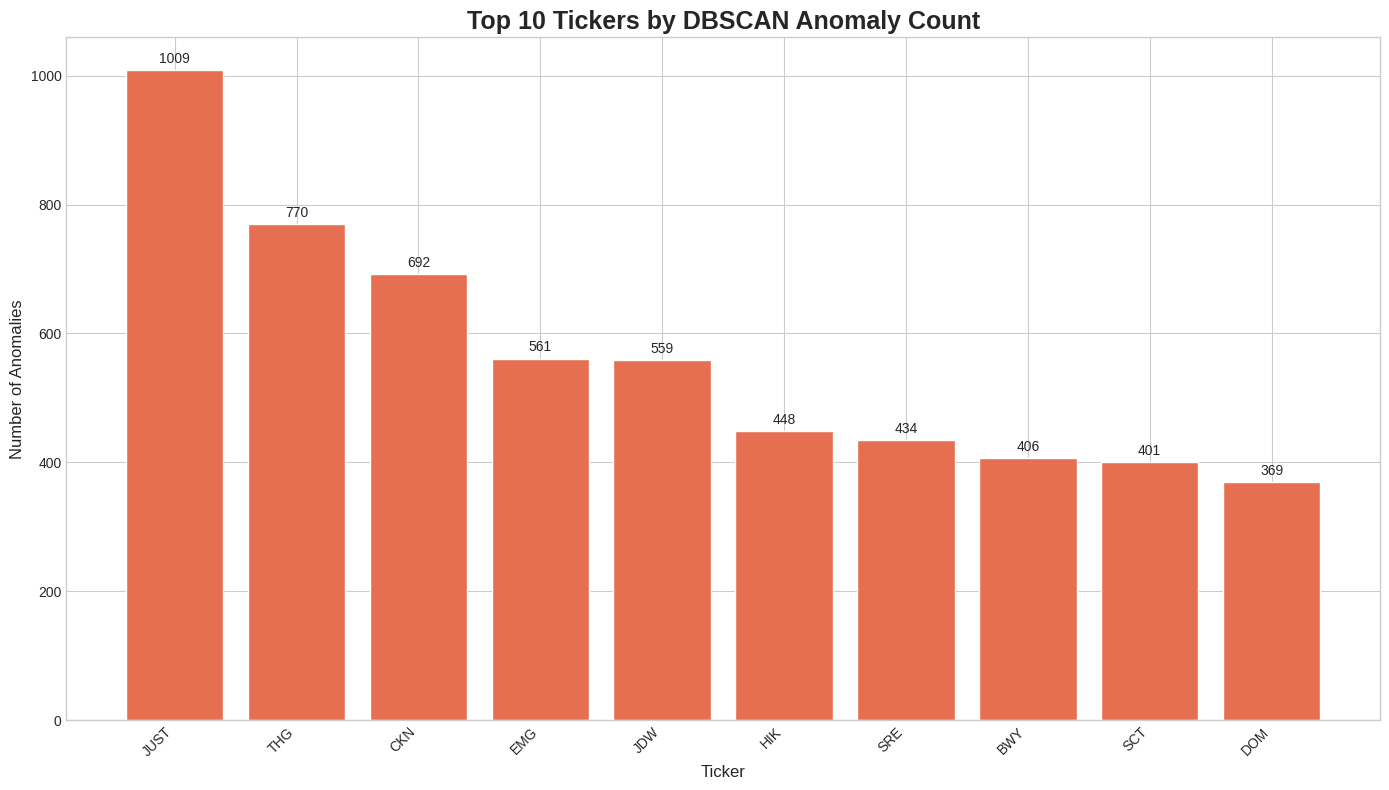

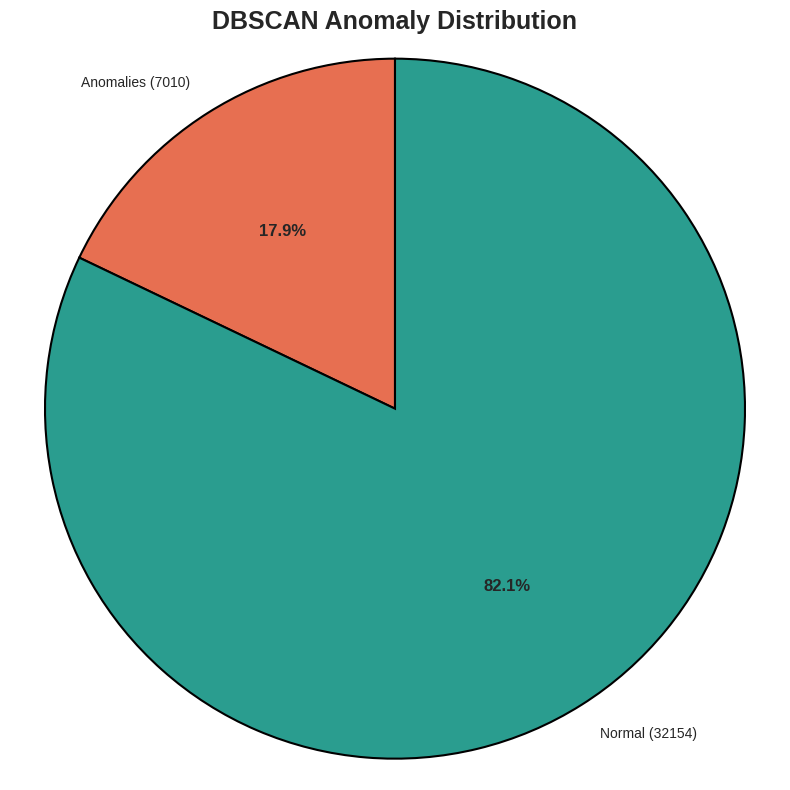

In [ ]:
plot_top_dbscan_anomalies_by_ticker(df250_optimised_dbscan_results.copy())
plot_dbscan_distribution_pie_chart(df250_optimised_dbscan_results.copy())

In [ ]:
def summarize_dbscan_anomalies_in_table(df_dbscan_results: pd.DataFrame, num_top_features: int = 3) -> pd.DataFrame:
    """
    Generates a summary table of detected DBSCAN anomalies, including stock, date,
    cluster label (-1 for anomalies), and the top most extreme feature values.

    Args:
        df_dbscan_results (pd.DataFrame): The DataFrame returned by train_and_score_dbscan,
                                          containing original features, 'dbscan_cluster_label',
                                          and 'dbscan_is_anomaly'. Must have MultiIndex (Date, Ticker).
        num_top_features (int): The number of features to display that are most extreme
                                for each anomaly, based on their absolute scaled value.

    Returns:
        pd.DataFrame: A DataFrame representing the summary table of DBSCAN anomalies.
                      Returns an empty DataFrame if no anomalies are detected.
    """
    if df_dbscan_results.empty:
        print("Input DataFrame is empty. Returning an empty summary table.")
        return pd.DataFrame()

    # Filter for anomalies (where dbscan_cluster_label is -1)
    anomalies_df = df_dbscan_results[df_dbscan_results['dbscan_is_anomaly'] == True].copy()

    if anomalies_df.empty:
        print("No DBSCAN anomalies detected. Returning an empty summary table.")
        return pd.DataFrame()

    print("\n--- Generating DBSCAN Anomaly Summary Table ---")

    # Set display options for Pandas to show full content
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    pd.set_option('display.max_rows', 100) # Adjust as needed

    # Prepare list to hold rows for the summary table
    summary_rows = []

    # Get the list of features that were used by the DBSCAN model
    # Exclude original price columns if they are present and not part of the features used for clustering,
    # and exclude the DBSCAN specific columns.
    feature_cols = [col for col in df_dbscan_results.columns
                    if col not in ['open', 'high', 'low', 'close', 'adj close', 'volume', # Original raw columns
                                  'dbscan_cluster_label', 'dbscan_is_anomaly'] # DBSCAN specific columns
                    and pd.api.types.is_numeric_dtype(df_dbscan_results[col])]

    for idx, row in anomalies_df.iterrows():
        anomaly_date = idx[0].date() # Get just the date part
        anomaly_ticker = idx[1]
        cluster_label = int(row['dbscan_cluster_label']) # Should be -1 for anomalies

        # Find the most extreme features for this anomaly
        # Assuming features are scaled, so absolute value indicates extremity
        feature_values = row[feature_cols].copy()
        feature_values.dropna(inplace=True)

        # Calculate absolute values for ranking extremity
        extreme_features_series = feature_values.abs().sort_values(ascending=False).head(num_top_features)

        # Initialize a dictionary for the current row's summary
        current_row_summary = {
            'Date': anomaly_date,
            'Ticker': anomaly_ticker,
            'DBSCAN Cluster Label': cluster_label, # Will be -1 for anomalies
        }
        # Add original close price if available in the DataFrame for context
        if 'close' in row.index:
            current_row_summary['Adj Close'] = f"{row['close']:.2f}"
        else:
            current_row_summary['Adj Close'] = "N/A"

        # Dynamically add columns for each extreme feature
        for i, (feat_name, abs_feat_val) in enumerate(extreme_features_series.items()):
            original_feat_val = feature_values.loc[feat_name] # Get the original value (not absolute)
            current_row_summary[f'Extreme_Feature_{i+1}'] = f"{feat_name}: {original_feat_val:.4f}"

        # Fill any remaining extreme feature columns with N/A if less than num_top_features were found
        for i in range(len(extreme_features_series), num_top_features):
            current_row_summary[f'Extreme_Feature_{i+1}'] = "N/A"

        summary_rows.append(current_row_summary)
    summary_table_df = pd.DataFrame(summary_rows)
    return summary_table_df

In [ ]:
dbscan100_anomaly_summary_table = summarize_dbscan_anomalies_in_table(df100_dbscan_results, num_top_features=3)

print("\n--- DBSCAN Anomaly Summary Table for FTSE 100 stocks ---")
print(dbscan100_anomaly_summary_table )

dbscan250_anomaly_summary_table = summarize_dbscan_anomalies_in_table(df250_dbscan_results, num_top_features=3)

print("\n--- DBSCAN Anomaly Summary Table for FTSE 250 stocks ---")
print(dbscan250_anomaly_summary_table)


--- Generating DBSCAN Anomaly Summary Table ---

--- DBSCAN Anomaly Summary Table for FTSE 100 stocks ---
            Date Ticker  DBSCAN Cluster Label Adj Close                             Extreme_Feature_1                            Extreme_Feature_2                          Extreme_Feature_3
0     2014-01-30    DGE                    -1       N/A                       relative_volume: 4.1499  deviation_from_daily_median_return: -3.2908                   daily_range_norm: 3.0741
1     2014-01-30   HSBA                    -1       N/A                      daily_range_norm: 3.5002                     garman_klass_vol: 1.6299            deviation_from_sma_20d: -1.1698
2     2014-02-06    AZN                    -1       N/A     deviation_from_daily_mean_return: -2.1173  deviation_from_daily_median_return: -1.9787                    relative_volume: 1.7080
3     2014-02-11   BARC                    -1       N/A                       relative_volume: 3.9847  deviation_from_daily_median_re

# ***Building an LSTM AutoEncoder Model for the FTSE 100 and FTSE 250 stocks                                                                             ***

In [ ]:
#A function to build an LSTM Autoencoder

def build_lstm_autoencoder(n_timesteps: int, n_features: int, lstm_units: int = 64, dropout_rate: float = 0.2) -> Sequential:
    """
    Builds an LSTM Autoencoder model for unsupervised anomaly detection.

    The autoencoder consists of an encoder LSTM, a RepeatVector layer,
    a decoder LSTM, and a TimeDistributed Dense layer to reconstruct the input sequence.

    Args:
        n_timesteps (int): The length of the input sequences (e.g., 10 days).
        n_features (int): The number of features per timestep in the input sequences.
        lstm_units (int): The number of units (neurons) in the LSTM layers.
                          Defaults to 64.
        dropout_rate (float): The dropout rate to apply for regularization.
                              Defaults to 0.2.

    Returns:
        Sequential: The compiled Keras Sequential model (LSTM Autoencoder).
    """
    model = Sequential()

    # Encoder
    # Input layer defines the shape of one input sequence (timesteps, features)
    model.add(Input(shape=(n_timesteps, n_features)))
    # First LSTM layer acts as the encoder.
    # return_sequences=False means it outputs a single vector (the encoded representation)
    # for each input sequence.
    model.add(LSTM(units=lstm_units, activation='relu', return_sequences=False))
    model.add(Dropout(dropout_rate))

    # RepeatVector layer
    # This layer repeats the encoded vector 'n_timesteps' times.
    # This is necessary to feed a sequence back into the decoder LSTM.
    model.add(RepeatVector(n_timesteps))

    # Decoder
    # Second LSTM layer acts as the decoder.
    # return_sequences=True means it outputs a sequence (one vector per timestep)
    # which is then passed to the TimeDistributed Dense layer.
    model.add(LSTM(units=lstm_units, activation='relu', return_sequences=True))
    model.add(Dropout(dropout_rate))

    # Output layer
    # TimeDistributed applies the Dense layer independently to each timestep of the sequence.
    # The number of units in the Dense layer must match the number of features (n_features)
    # to reconstruct the original input sequence.
    model.add(TimeDistributed(Dense(n_features)))

    # Compile the model
    # For autoencoders, Mean Squared Error (MSE) is a common loss function
    # as the goal is to minimize the difference between input and output.
    model.compile(optimizer='adam', loss='mean_squared_error')

    print("\n--- LSTM Autoencoder Model Summary ---")
    model.summary()

    return model

In [ ]:
#Calling the function to build the LSTM Auto Encoder Model for FTSE 100 stocks

# --- Determine n_timesteps and n_features ---
    # n_timesteps: This is your sequence length (e.g., 10 days)
n_timesteps_chosen = 10
    # n_features: This is the number of columns in your final_processed_data
n_features_chosen = final_processed_FTSE100_df.shape[1]

print(f"\nChosen n_timesteps: {n_timesteps_chosen}")
print(f"Chosen n_features: {n_features_chosen}")

# --- Call the build_lstm_autoencoder function ---
lstm100_autoencoder_model = build_lstm_autoencoder(
    n_timesteps=n_timesteps_chosen,
    n_features=n_features_chosen,
    lstm_units=128, # You can experiment with different unit sizes
    dropout_rate=0.2
)

print("\nLSTM Autoencoder model built successfully.")
# The model is now ready to be trained using X_train, y_train (where y_train is X_train)
# as prepared by your create_sequences_autoencoder function.



Chosen n_timesteps: 10
Chosen n_features: 21

--- LSTM Autoencoder Model Summary ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 10, 21)         │         2,709 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,093 (824.58 KB)

 Trainable params: 211,093 (824.58 KB)

 Non-trainable params: 0 (0.00 B)


LSTM Autoencoder model built successfully.


In [ ]:
#Calling the function to build the LSTM Auto Encoder Model for FTSE 250 stocks

#  Determine n_timesteps and n_features
    # n_timesteps: This is the sequence length (e.g., 10 days)
n_timesteps_chosen = 10
    # n_features: This is the number of columns in your final_processed_data
n_features_chosen = final_processed_FTSE250_df.shape[1]

print(f"\nChosen n_timesteps: {n_timesteps_chosen}")
print(f"Chosen n_features: {n_features_chosen}")

# Calling the build_lstm_autoencoder function
lstm250_autoencoder_model = build_lstm_autoencoder(
    n_timesteps=n_timesteps_chosen,
    n_features=n_features_chosen,
    lstm_units=128,
    dropout_rate=0.2
)

print("\nLSTM Autoencoder model built successfully.")


Chosen n_timesteps: 10
Chosen n_features: 21

--- LSTM Autoencoder Model Summary ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 10, 21)         │         2,709 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,093 (824.58 KB)

 Trainable params: 211,093 (824.58 KB)

 Non-trainable params: 0 (0.00 B)


LSTM Autoencoder model built successfully.


In [ ]:
def create_sequences_autoencoder(data_frame, timesteps, features_cols):
    """
    Creates sequences from a multi-index DataFrame for LSTM Autoencoder input.
    For autoencoders, X and y are the same sequence.

    Args:
        data_frame (pd.DataFrame): The input DataFrame with features (already scaled and sorted).
        timesteps (int): The number of past time steps to consider for each sequence.
        features_cols (list): List of column names that are your features.

    Returns:
        np.array: A 3D numpy array X in the format (n_samples, n_timesteps, n_features).
        np.array: A 3D numpy array y (target) in the same format as X.
        list: List of (Date, Ticker) for the *end* of each sequence, for mapping back.
    """
    X, sample_indices = [], []
    tickers = data_frame.index.get_level_values('Ticker').unique()

    for ticker in tickers:
        # Get data for the current ticker, ensuring it's sorted by date
        ticker_data = data_frame.loc[(slice(None), ticker), features_cols].droplevel('Ticker').sort_index()

        # Check if there's enough data for at least one full sequence
        if len(ticker_data) < timesteps: # Note: no +1 here, as y is not a future point
            continue

        for i in range(len(ticker_data) - timesteps + 1): # +1 to include the last possible sequence
            # Extract the sequence of features
            feature_sequence = ticker_data.iloc[i:(i + timesteps)].values
            X.append(feature_sequence)

            # For an autoencoder, the target 'y' is the input 'X' itself.
            # However, for convenience in passing to model.fit, we often set y = X_train
            # and X = X_train.
            # The sample_indices correspond to the last point in the sequence.
            sample_date = ticker_data.index[i + timesteps - 1]
            sample_indices.append((sample_date, ticker))

    # X and y will be the same for an autoencoder trained to reconstruct its input
    X = np.array(X)
    y = np.array(X) # y is the same as X for reconstruction

    return X, y, sample_indices

In [ ]:
# Using final_processed_FTSE100_df as the processed, scaled, NaN-free DataFrame

X100_lstm, y100_lstm, sample100_indices_lstm = create_sequences_autoencoder(
    final_processed_FTSE100_df, # data_frame argument
    n_timesteps_chosen,         # timesteps argument (positional, or as timesteps=n_timesteps_chosen)
    final_processed_FTSE100_df.columns.tolist() # features_cols argument
)

print(f"\nShape of X for LSTM Autoencoder: {X100_lstm.shape}")
print(f"Shape of y for LSTM Autoencoder: {y100_lstm.shape}")
print(f"Number of generated samples: {len(sample100_indices_lstm)}")


Shape of X for LSTM Autoencoder: (41230, 10, 21)
Shape of y for LSTM Autoencoder: (41230, 10, 21)
Number of generated samples: 41230


In [ ]:
# Using final_processed_FTSE250_df as the processed, scaled, NaN-free DataFrame

X250_lstm, y250_lstm, sample250_indices_lstm = create_sequences_autoencoder(
    final_processed_FTSE250_df, # data_frame argument
    n_timesteps_chosen,         # timesteps argument (positional, or as timesteps=n_timesteps_chosen)
    final_processed_FTSE250_df.columns.tolist() # features_cols argument
)

print(f"\nShape of X for LSTM Autoencoder: {X250_lstm.shape}")
print(f"Shape of y for LSTM Autoencoder: {y250_lstm.shape}")
print(f"Number of generated samples: {len(sample250_indices_lstm)}")


Shape of X for LSTM Autoencoder: (39029, 10, 21)
Shape of y for LSTM Autoencoder: (39029, 10, 21)
Number of generated samples: 39029


In [ ]:
# splitting data into the training, validation and test data

# Calculating the split points
train100_size = int(len(X100_lstm) * 0.70) # 70% for training
val100_size = int(len(X100_lstm) * 0.15) # 15% for validation
test100_size = len(X100_lstm) - train100_size - val100_size # Remaining 15% for testing

# Splitting the data chronologically
X100_train, y100_train = X100_lstm[0:train100_size], y100_lstm[0:train100_size]
X100_val, y100_val = X100_lstm[train100_size:train100_size+val100_size], y100_lstm[train100_size:train100_size+val100_size]
X100_test, y100_test = X100_lstm[train100_size+val100_size:len(X100_lstm)], y100_lstm[train100_size+val100_size:len(X100_lstm)]

# Also splitting sample_indices_lstm to keep track of the original (Date, Ticker) for each sample
train100_indices = sample100_indices_lstm[0:train100_size]
val100_indices = sample100_indices_lstm[train100_size:train100_size+val100_size]
test100_indices = sample100_indices_lstm[train100_size+val100_size:len(X100_lstm)]


print(f"\nTrain set shape: X_train {X100_train.shape}, y_train {y100_train.shape}")
print(f"Validation set shape: X_val {X100_val.shape}, y_val {y100_val.shape}")
print(f"Test set shape: X_test {X100_test.shape}, y_test {y100_test.shape}")


Train set shape: X_train (28860, 10, 21), y_train (28860, 10, 21)
Validation set shape: X_val (6184, 10, 21), y_val (6184, 10, 21)
Test set shape: X_test (6186, 10, 21), y_test (6186, 10, 21)


In [ ]:
# splitting data into the training, validation and test data

# Calculating the split points
train250_size = int(len(X250_lstm) * 0.7) # 70% for training
val250_size = int(len(X250_lstm) * 0.15) # 15% for validation
test250_size = len(X250_lstm) - train250_size - val250_size # Remaining 15% for testing

# Splitting the data chronologically
X250_train, y250_train = X250_lstm[0:train250_size], y250_lstm[0:train250_size]
X250_val, y250_val = X250_lstm[train250_size:train250_size+val250_size], y250_lstm[train250_size:train250_size+val250_size]
X250_test, y250_test = X250_lstm[train250_size+val250_size:len(X250_lstm)], y250_lstm[train250_size+val250_size:len(X250_lstm)]

# Also splitting sample_indices_lstm to keep track of the original (Date, Ticker) for each sample
train250_indices = sample250_indices_lstm[0:train250_size]
val250_indices = sample250_indices_lstm[train250_size:train250_size+val250_size]
test250_indices = sample250_indices_lstm[train250_size+val250_size:len(X250_lstm)]


print(f"\nTrain set shape: X_train {X250_train.shape}, y_train {y250_train.shape}")
print(f"Validation set shape: X_val {X250_val.shape}, y_val {y250_val.shape}")
print(f"Test set shape: X_test {X250_test.shape}, y_test {y250_test.shape}")


Train set shape: X_train (27320, 10, 21), y_train (27320, 10, 21)
Validation set shape: X_val (5854, 10, 21), y_val (5854, 10, 21)
Test set shape: X_test (5855, 10, 21), y_test (5855, 10, 21)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Assuming lstm_autoencoder_model is built from build_lstm_autoencoder
# Assuming X_train, y_train, X_val, y_val are from the data splitting step

# Define training hyperparameters
epochs = 50 # Start with a reasonable number, EarlyStopping will manage it
batch_size = 32 # Common batch size, adjust based on memory/performance

# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True, # Restores model weights from the epoch with the best value of the monitored quantity.
    verbose=1            # Prints messages when stopping
)

print("\n--- Training the LSTM Autoencoder Model ---")
history = lstm100_autoencoder_model.fit(
    X100_train, y100_train, # For autoencoder, y_train is X_train
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X100_val, y100_val), # For autoencoder, y_val is X_val
    callbacks=[early_stopping],
    verbose=1
)

print("\nLSTM Autoencoder model training complete.")


--- Training the LSTM Autoencoder Model ---
Epoch 1/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.6351 - val_loss: 0.7518
Epoch 2/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5242 - val_loss: 0.6791
Epoch 3/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5612 - val_loss: 0.6476
Epoch 4/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2.9097 - val_loss: 0.6324
Epoch 5/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.5722 - val_loss: 0.6018
Epoch 6/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4783 - val_loss: 0.5873
Epoch 7/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.4722 - val_loss: 0.5951
Epoch 8/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4134 - val_loss: 0.6178
Epoch 9/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4664 - val_loss: 0.5785
Epoch 10/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4454 - val_loss: 0.5237
Epoch 11/50
902/902 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3986 - val_loss: 0.5825
Epoch

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Defining training hyperparameters
epochs = 50 # Start with a reasonable number, EarlyStopping will manage it
batch_size = 32 # Common batch size, adjust based on memory/performance

# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True, # Restores model weights from the epoch with the best value of the monitored quantity.
    verbose=1            # Prints messages when stopping
)

print("\n--- Training the LSTM Autoencoder Model ---")
history = lstm250_autoencoder_model.fit(
    X250_train, y250_train, # For autoencoder, y_train is X_train
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X250_val, y250_val), # For autoencoder, y_val is X_val
    callbacks=[early_stopping],
    verbose=1
)

print("\nLSTM Autoencoder model training complete.")


--- Training the LSTM Autoencoder Model ---
Epoch 1/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 0.6325 - val_loss: 0.7182
Epoch 2/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.4864 - val_loss: 0.6837
Epoch 3/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4539 - val_loss: 0.6673
Epoch 4/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4590 - val_loss: 0.6497
Epoch 5/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4279 - val_loss: 0.6376
Epoch 6/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4142 - val_loss: 0.6551
Epoch 7/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4213 - val_loss: 0.6217
Epoch 8/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.4076 - val_loss: 0.6267
Epoch 9/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.4023 - val_loss: 0.6170
Epoch 10/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.3762 - val_loss: 0.6025
Epoch 11/50
854/854 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3760 - val_loss: 0.6079
Epoc

In [ ]:
# A function to evaluate the performance of the trained LSTM Autoencoder model and detect anomalies using the reconstruction error.

def evaluate_and_detect_lstm_anomalies(
    model: Sequential,
    X_train: np.ndarray,
    y_train: np.ndarray, # For autoencoder, y_train is X_train
    X_val: np.ndarray,
    y_val: np.ndarray,   # For autoencoder, y_val is X_val
    X_test: np.ndarray,
    y_test: np.ndarray,  # For autoencoder, y_test is X_test
    sample_indices_all: list, # List of (Date, Ticker) for all X_lstm samples
    original_raw_data: pd.DataFrame # Your ready_ftse100_data or ready_ftse250_data
) -> Tuple[pd.DataFrame, pd.DataFrame, float]:
    """
    Evaluates the LSTM Autoencoder model, calculates reconstruction errors,
    detects anomalies based on a threshold, and prepares data for visualization.

    Args:
        model (Sequential): The trained LSTM Autoencoder model.
        X_train (np.ndarray): Training input sequences.
        y_train (np.ndarray): Training target sequences (same as X_train for autoencoder).
        X_val (np.ndarray): Validation input sequences.
        y_val (np.ndarray): Validation target sequences (same as X_val for autoencoder).
        X_test (np.ndarray): Test input sequences.
        y_test (np.ndarray): Test target sequences (same as X_test for autoencoder).
        sample_indices_all (list): List of (Date, Ticker) tuples corresponding to each
                                   sample in the concatenated X_lstm (train+val+test).
        original_raw_data (pd.DataFrame): Your original raw stock data DataFrame
                                          (e.g., ready_ftse100_data) with 'close' and other
                                          base columns, and MultiIndex (Date, Ticker).

    Returns:
        tuple[pd.DataFrame, pd.DataFrame, float]:
            - full_data_with_anomalies_context (pd.DataFrame): Merged DataFrame with original
              data, reconstruction errors, and anomaly labels for all samples.
            - anomalies_df_context (pd.DataFrame): DataFrame containing only the detected anomalies
              with their original context.
            - threshold (float): The calculated anomaly threshold.
    """
    print("\n--- Starting LSTM Anomaly Evaluation and Detection ---")

    # Evaluating Model Performance (Loss on test set)
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Reconstruction Loss (MSE): {test_loss:.6f}")

    # Calculating Reconstruction Errors for all data
    # Concatenating all X and y data for unified processing
    X_all = np.concatenate((X_train, X_val, X_test), axis=0)
    y_all = np.concatenate((y_train, y_val, y_test), axis=0) # Should be same as X_all

    print(f"Predicting reconstructions for all {X_all.shape[0]} samples...")
    X_pred = model.predict(X_all)

    # Calculating Mean Squared Error (MSE) for each sequence
    reconstruction_errors = np.mean(np.square(X_all - X_pred), axis=(1, 2))

    # Creating DataFrame of Reconstruction Errors
    df_reconstruction_error = pd.DataFrame(
        {'reconstruction_error': reconstruction_errors},
        index=pd.MultiIndex.from_tuples(sample_indices_all, names=['Date', 'Ticker'])
    )

    print("\nReconstruction Error Statistics:")
    print(df_reconstruction_error.describe())

    # Determining Anomaly Threshold
    # Getting reconstruction errors only for the training set to set the threshold
    # The indices for train, val, test splits are based on the order in X_all
    train_size = len(X_train)
    val_size = len(X_val)
    train_errors = reconstruction_errors[0:train_size]

    # Defining a threshold (e.g., 95th or 99th percentile of training errors)
    # This assumes the training data is primarily "normal".

    threshold = np.percentile(train_errors, 95) # 95th percentile is a common starting point
    print(f"\nAnomaly Threshold (95th percentile of training errors): {threshold:.6f}")

    # Identifying Anomalies
    df_reconstruction_error['is_anomaly'] = (df_reconstruction_error['reconstruction_error'] > threshold)

    # Merging Anomaly Results with Original Raw Data for Context
    print("\nMerging anomaly results with original raw data for context...")

    # Get the full date range covered by your scored data
    min_date_scored = df_reconstruction_error.index.get_level_values('Date').min()
    max_date_scored = df_reconstruction_error.index.get_level_values('Date').max()

    original_data_for_merge = original_raw_data.loc[
        (original_raw_data.index.get_level_values('Date') >= min_date_scored) &
        (original_raw_data.index.get_level_values('Date') <= max_date_scored)
    ].copy()

    # Crucial: Drop duplicates from the MultiIndex if any exist, before any merge operations.
    if not original_data_for_merge.index.is_unique:
        print("Warning: Duplicates found in original_data_for_merge index. Dropping them.")
        original_data_for_merge = original_data_for_merge[~original_data_for_merge.index.duplicated(keep='first')].copy()

    df_reconstruction_error_unique = df_reconstruction_error.copy()
    if not df_reconstruction_error.index.is_unique:
        print("Warning: Duplicates found in df_reconstruction_error index. Dropping them.")
        df_reconstruction_error_unique = df_reconstruction_error[~df_reconstruction_error.index.duplicated(keep='first')].copy()

    common_indices = original_data_for_merge.index.intersection(df_reconstruction_error_unique.index)
    original_data_aligned = original_data_for_merge.loc[common_indices]
    reconstruction_data_aligned = df_reconstruction_error_unique.loc[common_indices]

    # Performing the merge using `left_index=True` and `right_index=True`
    full_data_with_anomalies_context = original_data_aligned.merge(
        reconstruction_data_aligned[['reconstruction_error', 'is_anomaly']],
        left_index=True,
        right_index=True,
        how='left'
    )
    # Ensuring 'is_anomaly' is boolean after merge for consistency
    if 'is_anomaly' in full_data_with_anomalies_context.columns:
        full_data_with_anomalies_context['is_anomaly'] = full_data_with_anomalies_context['is_anomaly'].astype(bool)

    print(f"Full data with anomalies context shape: {full_data_with_anomalies_context.shape}")
    print(f"Is index truly unique in full_data_with_anomalies_context? {full_data_with_anomalies_context.index.is_unique}")

    # Filtering to get only the anomalies with context
    anomalies_df_context = full_data_with_anomalies_context[full_data_with_anomalies_context['is_anomaly'] == True].copy()

    num_anomalies_detected = anomalies_df_context.shape[0]
    print(f"\nTotal LSTM Anomalies Detected: {num_anomalies_detected}")
    print("\nDetected LSTM Anomalies (head):\n", anomalies_df_context.head())

    # Visualisation (Overall Error Distribution)
    plt.figure(figsize=(12, 6))
    sns.histplot(reconstruction_errors, bins=50, kde=True, color='skyblue')
    plt.axvline(threshold, color='red', linestyle='--', label=f'Anomaly Threshold ({threshold:.4f})')
    plt.title('Distribution of LSTM Reconstruction Errors')
    plt.xlabel('Reconstruction Error (MSE)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    return full_data_with_anomalies_context, anomalies_df_context, threshold


--- Starting LSTM Anomaly Evaluation and Detection ---
Test Reconstruction Loss (MSE): 0.223891
Predicting reconstructions for all 41230 samples...
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

Reconstruction Error Statistics:
       reconstruction_error
count          41230.000000
mean               0.267400
std                2.722480
min                0.019943
25%                0.094816
50%                0.136829
75%                0.212085
max              267.667708

Anomaly Threshold (95th percentile of training errors): 0.460459

Merging anomaly results with original raw data for context...
Full data with anomalies context shape: (41230, 8)
Is index truly unique in full_data_with_anomalies_context? True

Total LSTM Anomalies Detected: 2455

Detected LSTM Anomalies (head):
                      adj close        close         high          low         open      volume  reconstruction_error  is_anomaly
Date       Ticker                                                             

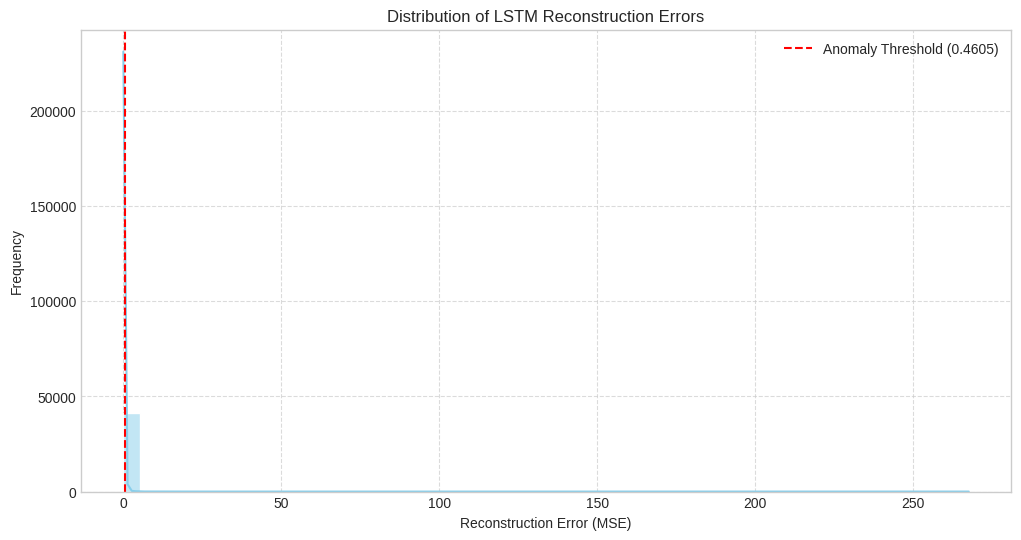


--- LSTM Anomaly Detection Complete ---

Head of full_lstm_results (merged with original data):
                      adj close        close         high          low         open      volume  reconstruction_error  is_anomaly
Date       Ticker                                                                                                               
2014-02-12 AZN     3986.995117  4002.500000  4008.500000  3956.500000  3989.500000   2830986.0              0.149505       False
           BARC     259.596222   260.450012   271.515991   259.750000   264.700012  58225865.0              0.186063       False
           BATS    2973.607422  2995.000000  3012.500000  2985.000000  3000.000000   3635252.0              0.090022       False
           BHP     1850.139160  1862.500000  1881.000000  1852.035034  1864.000000   7398187.0              0.070912       False
           BP       483.876343   487.049988   493.200012   486.000000   487.350006  25415556.0              0.076765       False

In [ ]:
# Calling the evaluate_and_detect_lstm_anomalies function
full100_lstm_results, anomalies100_lstm_df, threshold_lstm = evaluate_and_detect_lstm_anomalies(
    model=lstm100_autoencoder_model,
    X_train=X100_train,
    y_train=y100_train,
    X_val=X100_val,
    y_val=y100_val,
    X_test=X100_test,
    y_test=y100_test,
    sample_indices_all=sample100_indices_lstm,
    original_raw_data=ready_ftse100_data
)

print("\n--- LSTM Anomaly Detection Complete ---")
print("\nHead of full_lstm_results (merged with original data):\n", full100_lstm_results.head())
print("\nHead of anomalies_lstm_df (only detected anomalies):\n", anomalies100_lstm_df.head())
print(f"\nCalculated LSTM Anomaly Threshold: {threshold_lstm:.6f}")



--- Starting LSTM Anomaly Evaluation and Detection ---
Test Reconstruction Loss (MSE): 0.309305
Predicting reconstructions for all 39029 samples...
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

Reconstruction Error Statistics:
       reconstruction_error
count          39029.000000
mean               0.267118
std                2.649160
min                0.023191
25%                0.094673
50%                0.138393
75%                0.211450
max              164.535157

Anomaly Threshold (95th percentile of training errors): 0.448042

Merging anomaly results with original raw data for context...
Full data with anomalies context shape: (39029, 8)
Is index truly unique in full_data_with_anomalies_context? True

Total LSTM Anomalies Detected: 2407

Detected LSTM Anomalies (head):
                      adj close        close         high          low         open      volume  reconstruction_error  is_anomaly
Date       Ticker                                                             

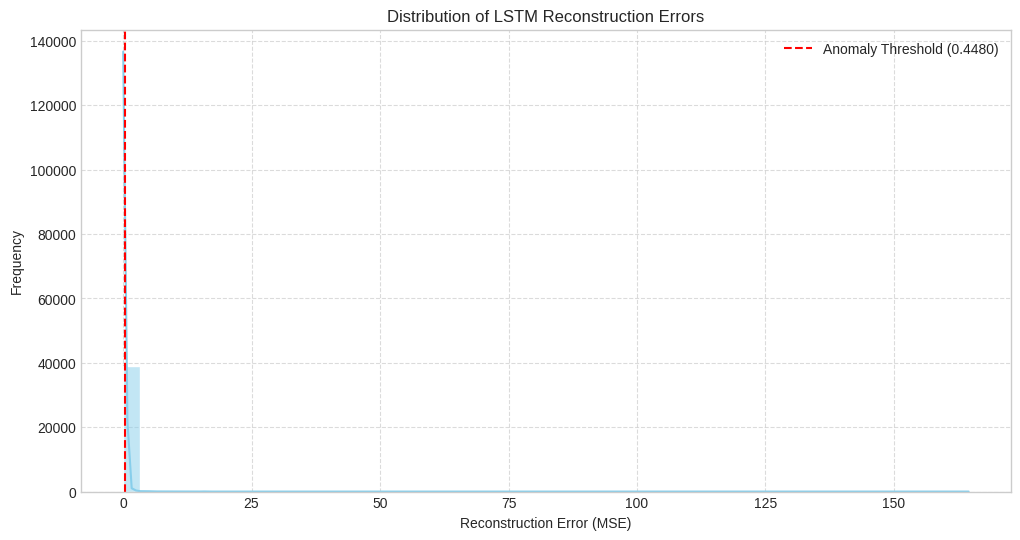


--- LSTM Anomaly Detection Complete ---

Head of full_lstm_results (merged with original data):
                      adj close        close         high          low         open     volume  reconstruction_error  is_anomaly
Date       Ticker                                                                                                              
2014-02-12 BWY     1628.787231  1636.000000  1660.000000  1616.000000  1660.000000   314099.0              0.114946       False
           CKN     2010.465576  2017.000000  2036.000000  2017.000000  2034.000000      995.0              0.087152       False
           DOM      172.740875   173.333298   174.333298   170.333298   170.333298   889548.0              0.125819       False
           EMG       83.710533    84.250000    85.000000    83.500000    84.900002  4131256.0              0.089017       False
           HIK     1237.361572  1240.000000  1249.000000  1214.000000  1249.000000   324361.0              0.122206       False

Head 

In [ ]:
# Calling the evaluate_and_detect_lstm_anomalies function
full250_lstm_results, anomalies250_lstm_df, threshold_lstm = evaluate_and_detect_lstm_anomalies(
    model=lstm250_autoencoder_model,
    X_train=X250_train,
    y_train=y250_train,
    X_val=X250_val,
    y_val=y250_val,
    X_test=X250_test,
    y_test=y250_test,
    sample_indices_all=sample250_indices_lstm,
    original_raw_data=ready_ftse250_data
)

print("\n--- LSTM Anomaly Detection Complete ---")
print("\nHead of full_lstm_results (merged with original data):\n", full250_lstm_results.head())
print("\nHead of anomalies_lstm_df (only detected anomalies):\n", anomalies250_lstm_df.head())
print(f"\nCalculated LSTM Anomaly Threshold: {threshold_lstm:.6f}")


In [ ]:
def summarise_lstm_anomalous_indices(anomalies_df_context: pd.DataFrame, num_top_indices: int = 10) -> tuple[int, pd.DataFrame]:
    """
    Summarises detected LSTM anomalies by finding the top N indices (Tickers) with the strongest anomalies.

    Args:
        anomalies_df_context (pd.DataFrame): A DataFrame containing only the detected anomalies.
                                             Must include 'reconstruction_error' and have MultiIndex (Date, Ticker).
        num_top_indices (int): The number of top anomalous indices to retrieve.

    Returns:
        tuple[int, pd.DataFrame]:
            - Total number of anomalies detected
            - DataFrame of top N indices with their highest reconstruction error
    """
    if anomalies_df_context.empty:
        print("No anomalies detected. Returning empty summary.")
        return 0, pd.DataFrame()

    total_anomalies = len(anomalies_df_context)

    # Reset index so we can group by Ticker
    anomalies_reset = anomalies_df_context.reset_index()

    # Get the maximum reconstruction error for each Ticker
    ticker_max_errors = (
        anomalies_reset
        .groupby("Ticker")["reconstruction_error"]
        .max()
        .sort_values(ascending=False)
        .head(num_top_indices)
        .reset_index()
    )

    ticker_max_errors.rename(columns={"reconstruction_error": "max_reconstruction_error"}, inplace=True)

    return total_anomalies, ticker_max_errors



In [ ]:
 # Calling the summarise_lstm_anomalous_indices function

total100_anomalies, top100_anomalies_table = summarise_lstm_anomalous_indices(
        anomalies_df_context=anomalies100_lstm_df
)

print(f"\nTotal Anomalies Detected: {total100_anomalies}")
print("\n--- Top Anomalies Summary ---")
print(top100_anomalies_table)

total250_anomalies, top250_anomalies_table = summarise_lstm_anomalous_indices(
        anomalies_df_context=anomalies250_lstm_df
)

print(f"\nTotal Anomalies Detected: {total250_anomalies}")
print("\n--- Top Anomalies Summary ---")
print(top250_anomalies_table)


Total Anomalies Detected: 2455

--- Top Anomalies Summary ---
  Ticker  max_reconstruction_error
0   HSBA                267.667708
1     BP                 45.645894
2    PRU                 37.398829
3     NG                 37.002534
4     RR                 26.979128
5    GSK                 26.504704
6   BATS                 16.563377
7   BARC                 11.182795
8   BT-A                  6.067325
9    DGE                  4.767069

Total Anomalies Detected: 2407

--- Top Anomalies Summary ---
  Ticker  max_reconstruction_error
0    SRE                164.535157
1    BWY                 62.760155
2    HSX                 14.553026
3    THG                 12.032228
4   JUST                  9.742996
5    JDW                  9.050294
6   ICGT                  4.935174
7    CKN                  3.422651
8    SXS                  1.901467
9    RAT                  1.719494


In [ ]:
def custom_lstm_autoencoder_scorer(
    model_params: Dict[str, Any], # Parameters for build_lstm_autoencoder
    train_data: Tuple[np.ndarray, np.ndarray], # (X_train, y_train)
    val_data: Tuple[np.ndarray, np.ndarray],   # (X_val, y_val)
    n_timesteps: int,
    n_features: int,
    epochs: int = 50,
    batch_size: int = 32,
    patience: int = 10
) -> float:
    """
    Custom scoring function for LSTM Autoencoder optimisation.
    Trains the model, calculates reconstruction errors, and returns a score.
    Aims to reward models that have low training error and higher validation error
    (indicating it struggles more with anomalies). Higher score is better.
    """
    X_train, y_train = train_data
    X_val, y_val = val_data

    # Building the model with current parameters
    model = build_lstm_autoencoder(
        n_timesteps=n_timesteps,
        n_features=n_features,
        lstm_units=model_params.get('lstm_units', 64),
        dropout_rate=model_params.get('dropout_rate', 0.2)
    )


    early_stopping = EarlyStopping(
        monitor='val_loss', patience=patience, restore_best_weights=True, verbose=0
    )

    # Training the model (suppress verbose output during optimisation)
    # Handle potential errors during training for a robust grid search
    try:
        history = model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping],
            verbose=0 # Suppress output for each epoch during optimization
        )
    except Exception as e:
        print(f"  Training failed for params {model_params}: {e}")
        return -np.inf # Return a very low score if training fails

    # Calculate reconstruction errors on validation set
    val_preds = model.predict(X_val, verbose=0)
    val_errors = np.mean(np.square(X_val - val_preds), axis=(1, 2))

    # Calculate reconstruction errors on training set
    train_preds = model.predict(X_train, verbose=0)
    train_errors = np.mean(np.square(X_train - train_preds), axis=(1, 2))

    # Defining the scoring metric:
    # Maximise the difference between the mean validation error and the mean training error.
    # This rewards models that learn normal well (low train error) but struggle with anomalies (high val error).
    score = np.mean(val_errors) - np.mean(train_errors)

    return score


In [ ]:

def optimise_lstm_autoencoder(
    X_train: np.ndarray, y_train: np.ndarray,
    X_val: np.ndarray, y_val: np.ndarray,
    X_test: np.ndarray, y_test: np.ndarray,
    n_timesteps: int,
    n_features: int,
    param_grid_lstm: Dict[str, Any],
    epochs: int = 50,
    batch_size: int = 32,
    patience: int = 10
) -> Tuple[Dict[str, Any], Sequential, np.ndarray, np.ndarray, np.ndarray]:
    """
    Optimises LSTM Autoencoder hyperparameters using a custom scoring function.
    Prints only the final best results.

    Args:
        X_train (np.ndarray): Training input sequences.
        y_train (np.ndarray): Training target sequences (same as X_train for autoencoder).
        X_val (np.ndarray): Validation input sequences.
        y_val (np.ndarray): Validation target sequences (same as X_val for autoencoder).
        X_test (np.ndarray): Test input sequences.
        y_test (np.ndarray): Test target sequences (same as X_test for autoencoder).
        n_timesteps (int): The length of the input sequences.
        n_features (int): The number of features per timestep.
        param_grid_lstm (Dict[str, Any]): Dictionary with parameters names (str) as keys
                                     and lists of parameter settings to try as values.
        epochs (int): Maximum number of epochs for training each model.
        batch_size (int): Batch size for training each model.
        patience (int): Patience for EarlyStopping callback.

    Returns:
        tuple: A tuple containing:
            - Dict[str, Any]: Best hyperparameters found.
            - Sequential: The best trained LSTM Autoencoder model.
            - np.ndarray: Training predictions from the best model.
            - np.ndarray: Validation predictions from the best model.
            - np.ndarray: Test predictions from the best model.
    """
    best_score = -np.inf
    best_params = {}
    best_model = None
    best_train_preds = None
    best_val_preds = None
    best_test_preds = None

    grid_combinations = list(ParameterGrid(param_grid_lstm))
    print(f"\n Starting LSTM Autoencoder Optimisation ({len(grid_combinations)} combinations) ")

    for i, params in enumerate(grid_combinations):
        # Build and train the model with current parameters
        current_model = build_lstm_autoencoder(
            n_timesteps=n_timesteps,
            n_features=n_features,
            lstm_units=params.get('lstm_units', 64),
            dropout_rate=params.get('dropout_rate', 0.2)
        )


        early_stopping_callback = EarlyStopping(
            monitor='val_loss', patience=patience, restore_best_weights=True, verbose=0
        )

        try:
            current_model.fit(
                X_train, y_train,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(X_val, y_val),
                callbacks=[early_stopping_callback],
                verbose=0 # Suppress output for each epoch during optimization
            )
        except Exception as e:
            print(f"  Training failed for params {params}: {e}. Skipping.")
            continue # Skip to next combination if training fails

        # Calculating the score for this combination
        score = custom_lstm_autoencoder_scorer(
            model_params=params,
            train_data=(X_train, y_train),
            val_data=(X_val, y_val),
            n_timesteps=n_timesteps,
            n_features=n_features,
            epochs=epochs,
            batch_size=batch_size,
            patience=patience
        )

        if score > best_score:
            best_score = score
            best_params = params
            best_model = current_model # Storing the model instance

            # Getting predictions for all sets from the current best model
            best_train_preds = current_model.predict(X_train, verbose=0)
            best_val_preds = current_model.predict(X_val, verbose=0)
            best_test_preds = current_model.predict(X_test, verbose=0)

    print("\n--- LSTM Autoencoder Optimization Complete ---")
    print(f"Best Score: {best_score:.4f}")
    print(f"Best Parameters: {best_params}")

    return best_params, best_model, best_train_preds, best_val_preds, best_test_preds


In [ ]:
# Defining the parameter grid for LSTM Autoencoder optimisation ---
param_grid_lstm = {
    'lstm_units': [64, 128], # Number of units in LSTM layers
    'dropout_rate': [0.1, 0.2, 0.3], # Dropout rate for regularisation
}

# Calling the optimise_lstm_autoencoder function for FTSE 100

best_lstm_params, best_lstm_model, best_train_preds, best_val_preds, best_test_preds = optimise_lstm_autoencoder(
    X_train=X100_train, y_train=y100_train,
    X_val=X100_val, y_val=y100_val,
    X_test=X100_test, y_test=y100_test,
    n_timesteps=n_timesteps_chosen,
    n_features=n_features_chosen,
    param_grid_lstm=param_grid_lstm,
    epochs=50,
    batch_size=32,
    patience=10
)

# Printing the final optimised results
print("\n LSTM Optimisation Results ")
print(f"Best Parameters Found: {best_lstm_params}")
print(f"Best Model: {best_lstm_model}")


 Starting LSTM Autoencoder Optimisation (6 combinations) 

--- LSTM Autoencoder Model Summary ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 10, 21)         │         1,365 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,405 (220.33 KB)

 Trainable params: 56,405 (220.33 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 64)             │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_3 (RepeatVector)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 10, 21)         │         1,365 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,405 (220.33 KB)

 Trainable params: 56,405 (220.33 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_4 (RepeatVector)  │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 10, 21)         │         2,709 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,093 (824.58 KB)

 Trainable params: 211,093 (824.58 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_5 (RepeatVector)  │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 10, 21)         │         2,709 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,093 (824.58 KB)

 Trainable params: 211,093 (824.58 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 64)             │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_6 (RepeatVector)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 10, 21)         │         1,365 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,405 (220.33 KB)

 Trainable params: 56,405 (220.33 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 64)             │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_7 (RepeatVector)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_7              │ (None, 10, 21)         │         1,365 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,405 (220.33 KB)

 Trainable params: 56,405 (220.33 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_8 (RepeatVector)  │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_8              │ (None, 10, 21)         │         2,709 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,093 (824.58 KB)

 Trainable params: 211,093 (824.58 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_9 (RepeatVector)  │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ (None, 10, 21)         │         2,709 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,093 (824.58 KB)

 Trainable params: 211,093 (824.58 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 64)             │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_10 (RepeatVector) │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ (None, 10, 21)         │         1,365 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,405 (220.33 KB)

 Trainable params: 56,405 (220.33 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ (None, 64)             │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_11 (RepeatVector) │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_11             │ (None, 10, 21)         │         1,365 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,405 (220.33 KB)

 Trainable params: 56,405 (220.33 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_12 (RepeatVector) │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_12             │ (None, 10, 21)         │         2,709 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,093 (824.58 KB)

 Trainable params: 211,093 (824.58 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_13 (RepeatVector) │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_13             │ (None, 10, 21)         │         2,709 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,093 (824.58 KB)

 Trainable params: 211,093 (824.58 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Optimization Complete ---
Best Score: 0.1477
Best Parameters: {'dropout_rate': 0.3, 'lstm_units': 64}

 LSTM Optimisation Results 
Best Parameters Found: {'dropout_rate': 0.3, 'lstm_units': 64}
Best Model: <Sequential name=sequential_10, built=True>



--- Starting LSTM Anomaly Evaluation and Detection ---
Test Reconstruction Loss (MSE): 0.345298
Predicting reconstructions for all 41230 samples...
1289/1289 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

Reconstruction Error Statistics:
       reconstruction_error
count          41230.000000
mean               0.402131
std                2.470243
min                0.040908
25%                0.158283
50%                0.227554
75%                0.352443
max              181.186789

Anomaly Threshold (95th percentile of training errors): 0.760845

Merging anomaly results with original raw data for context...
Full data with anomalies context shape: (41230, 8)
Is index truly unique in full_data_with_anomalies_context? True

Total LSTM Anomalies Detected: 2410

Detected LSTM Anomalies (head):
                      adj close        close         high          low        open      volume  reconstruction_error  is_anomaly
Date       Ticker                                                              

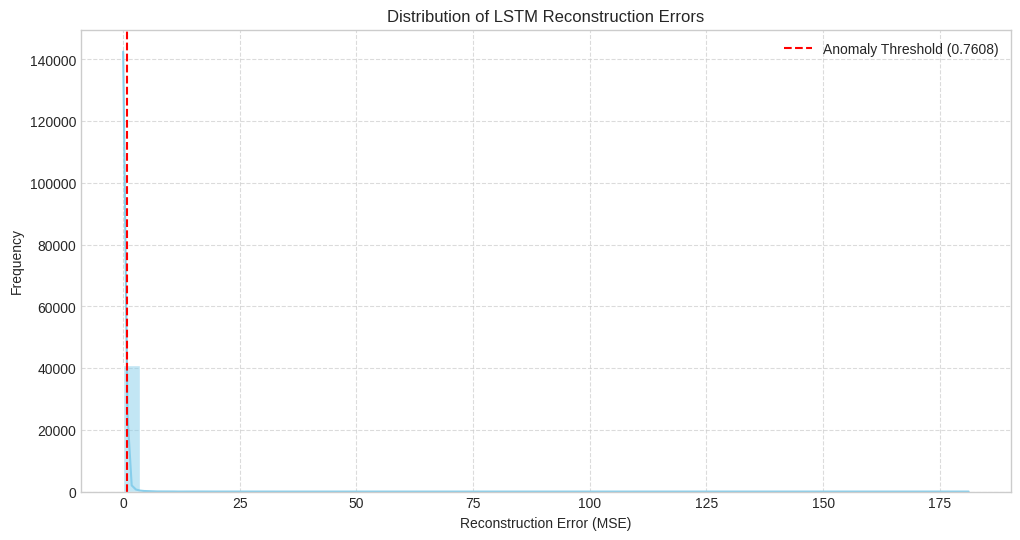


--- LSTM Anomaly Detection Complete ---

Head of full_lstm_results (merged with original data):
                      adj close        close         high          low         open      volume  reconstruction_error  is_anomaly
Date       Ticker                                                                                                               
2014-02-12 AZN     3986.995117  4002.500000  4008.500000  3956.500000  3989.500000   2830986.0              0.219939       False
           BARC     259.596222   260.450012   271.515991   259.750000   264.700012  58225865.0              0.240667       False
           BATS    2973.607422  2995.000000  3012.500000  2985.000000  3000.000000   3635252.0              0.157516       False
           BHP     1850.139160  1862.500000  1881.000000  1852.035034  1864.000000   7398187.0              0.094501       False
           BP       483.876343   487.049988   493.200012   486.000000   487.350006  25415556.0              0.176533       False

In [ ]:
# Calling  evaluate_and_detect_lstm_anomalies with the best model
full100_lstm_results, anomalies100_lstm_df, threshold_lstm = evaluate_and_detect_lstm_anomalies(
    model=best_lstm_model,
    X_train=X100_train, y_train=y100_train,
    X_val=X100_val, y_val=y100_val,
    X_test=X100_test, y_test=y100_test,
    sample_indices_all=sample100_indices_lstm,
    original_raw_data=ready_ftse100_data
)

# Analysing the Final Results
print("\n--- LSTM Anomaly Detection Complete ---")
print("\nHead of full_lstm_results (merged with original data):\n", full100_lstm_results.head())
print("\nHead of anomalies_lstm_df (only detected anomalies):\n", anomalies100_lstm_df.head())
print(f"\nCalculated LSTM Anomaly Threshold: {threshold_lstm:.6f}")


In [ ]:
# Defining the parameter grid for LSTM Autoencoder optimization
param_grid_lstm = {
    'lstm_units': [64, 128], # Number of units in LSTM layers
    'dropout_rate': [0.1, 0.2, 0.3], # Dropout rate for regularisation
}

# Calling the optimize_lstm_autoencoder function for FTSE 250

best_250_lstm_params, best_250_lstm_model, best_250_train_preds, best_250_val_preds, best_250_test_preds = optimise_lstm_autoencoder(
    X_train=X250_train, y_train=y250_train,
    X_val=X250_val, y_val=y250_val,
    X_test=X250_test, y_test=y250_test,
    n_timesteps=n_timesteps_chosen,
    n_features=n_features_chosen,
    param_grid_lstm=param_grid_lstm,
    epochs=50,
    batch_size=32,
    patience=10
)

# Printing the final optimized results
print("\n--- LSTM Optimization Results ---")
print(f"Best Parameters Found: {best_lstm_params}")
print(f"Best Model: {best_lstm_model}")


 Starting LSTM Autoencoder Optimisation (6 combinations) 

--- LSTM Autoencoder Model Summary ---


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                  │ (None, 64)             │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_14 (RepeatVector) │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_14             │ (None, 10, 21)         │         1,365 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,405 (220.33 KB)

 Trainable params: 56,405 (220.33 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                  │ (None, 64)             │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_15 (RepeatVector) │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_15             │ (None, 10, 21)         │         1,365 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,405 (220.33 KB)

 Trainable params: 56,405 (220.33 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                  │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_16 (RepeatVector) │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_16             │ (None, 10, 21)         │         2,709 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,093 (824.58 KB)

 Trainable params: 211,093 (824.58 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_34 (LSTM)                  │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_17 (RepeatVector) │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_17             │ (None, 10, 21)         │         2,709 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,093 (824.58 KB)

 Trainable params: 211,093 (824.58 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                  │ (None, 64)             │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_18 (RepeatVector) │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_18             │ (None, 10, 21)         │         1,365 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,405 (220.33 KB)

 Trainable params: 56,405 (220.33 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                  │ (None, 64)             │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_19 (RepeatVector) │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_19             │ (None, 10, 21)         │         1,365 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,405 (220.33 KB)

 Trainable params: 56,405 (220.33 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                  │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_20 (RepeatVector) │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_20             │ (None, 10, 21)         │         2,709 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,093 (824.58 KB)

 Trainable params: 211,093 (824.58 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_42 (LSTM)                  │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_21 (RepeatVector) │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_21             │ (None, 10, 21)         │         2,709 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,093 (824.58 KB)

 Trainable params: 211,093 (824.58 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_44 (LSTM)                  │ (None, 64)             │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_22 (RepeatVector) │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_45 (LSTM)                  │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_22             │ (None, 10, 21)         │         1,365 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,405 (220.33 KB)

 Trainable params: 56,405 (220.33 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_46 (LSTM)                  │ (None, 64)             │        22,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_23 (RepeatVector) │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_23             │ (None, 10, 21)         │         1,365 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,405 (220.33 KB)

 Trainable params: 56,405 (220.33 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                  │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_24 (RepeatVector) │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_49 (LSTM)                  │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_24             │ (None, 10, 21)         │         2,709 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,093 (824.58 KB)

 Trainable params: 211,093 (824.58 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Model Summary ---


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_50 (LSTM)                  │ (None, 128)            │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_25 (RepeatVector) │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_51 (LSTM)                  │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_25             │ (None, 10, 21)         │         2,709 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,093 (824.58 KB)

 Trainable params: 211,093 (824.58 KB)

 Non-trainable params: 0 (0.00 B)


--- LSTM Autoencoder Optimization Complete ---
Best Score: 0.3139
Best Parameters: {'dropout_rate': 0.1, 'lstm_units': 128}

--- LSTM Optimization Results ---
Best Parameters Found: {'dropout_rate': 0.3, 'lstm_units': 64}
Best Model: <Sequential name=sequential_10, built=True>



--- Starting LSTM Anomaly Evaluation and Detection ---
Test Reconstruction Loss (MSE): 0.288738
Predicting reconstructions for all 39029 samples...
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

Reconstruction Error Statistics:
       reconstruction_error
count          39029.000000
mean               0.261447
std                2.755072
min                0.020334
25%                0.086453
50%                0.127858
75%                0.197681
max              183.660405

Anomaly Threshold (95th percentile of training errors): 0.427808

Merging anomaly results with original raw data for context...
Full data with anomalies context shape: (39029, 8)
Is index truly unique in full_data_with_anomalies_context? True

Total LSTM Anomalies Detected: 2414

Detected LSTM Anomalies (head):
                      adj close   close         high          low      open    volume  reconstruction_error  is_anomaly
Date       Ticker                                                                       

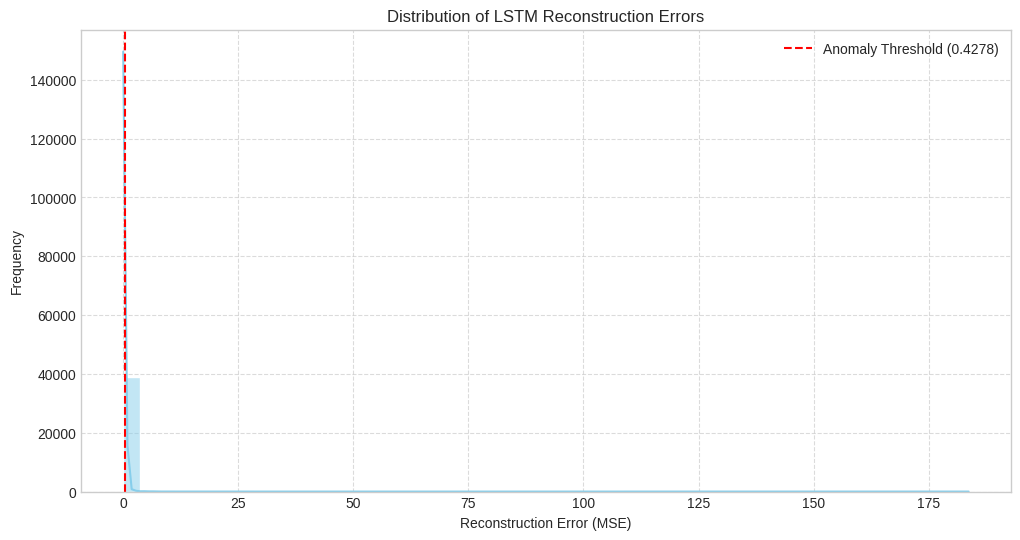


--- LSTM Anomaly Detection Complete ---

Head of full_lstm_results (merged with original data):
                      adj close        close         high          low         open     volume  reconstruction_error  is_anomaly
Date       Ticker                                                                                                              
2014-02-12 BWY     1628.787231  1636.000000  1660.000000  1616.000000  1660.000000   314099.0              0.094245       False
           CKN     2010.465576  2017.000000  2036.000000  2017.000000  2034.000000      995.0              0.082150       False
           DOM      172.740875   173.333298   174.333298   170.333298   170.333298   889548.0              0.113520       False
           EMG       83.710533    84.250000    85.000000    83.500000    84.900002  4131256.0              0.092347       False
           HIK     1237.361572  1240.000000  1249.000000  1214.000000  1249.000000   324361.0              0.109594       False

Head 

In [ ]:
# Calling the evaluate_and_detect_lstm_anomalies with the best model

full250_lstm_results, anomalies250_lstm_df, threshold_lstm = evaluate_and_detect_lstm_anomalies(
    model=best_250_lstm_model,
    X_train=X250_train, y_train=y250_train,
    X_val=X250_val, y_val=y250_val,
    X_test=X250_test, y_test=y250_test,
    sample_indices_all=sample250_indices_lstm,
    original_raw_data=ready_ftse250_data
)

# Analyze the Final Results
print("\n--- LSTM Anomaly Detection Complete ---")
print("\nHead of full_lstm_results (merged with original data):\n", full250_lstm_results.head())
print("\nHead of anomalies_lstm_df (only detected anomalies):\n", anomalies250_lstm_df.head())
print(f"\nCalculated LSTM Anomaly Threshold: {threshold_lstm:.6f}")


In [ ]:
def visualise_lstm_results(
    full_data_with_anomalies_context: pd.DataFrame,
    anomalies_df_context: pd.DataFrame,
    num_top_anomalies_to_plot: int = 5,
    window_days_for_plot: int = 40
):
    """
    Generates key visualisations for a trained LSTM Autoencoder model's results.
    """
    if anomalies_df_context.empty:
        print("No anomalies detected. Skipping visualization.")
        return

    print("\n--- Starting LSTM Anomaly Visualization ---")

    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    sns.set_style("whitegrid")

    # Overall Error Distribution
    print("\n--- Generating Overall Error Distribution Plot ---")
    error_column = 'reconstruction_error'
    threshold = anomalies_df_context['reconstruction_error'].min() if not anomalies_df_context.empty else None

    plt.figure(figsize=(12, 6))
    sns.histplot(full_data_with_anomalies_context[error_column], bins=50, kde=True, color='skyblue')
    if threshold is not None:
        plt.axvline(threshold, color='red', linestyle='--', label='Threshold for Visualization')
    plt.title('Distribution of LSTM Reconstruction Errors')
    plt.xlabel('Reconstruction Error (MSE)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Detailed Time-Series Plots for Top N Anomalies
    print(f"\n--- Generating Detailed Time-Series Plots for Top {num_top_anomalies_to_plot} Anomalies ---")

      # Keeping only the highest-error anomaly per ticker
    anomalies_df_context = (
        anomalies_df_context
        .sort_values(by='reconstruction_error', ascending=False)
        .reset_index()
        .drop_duplicates(subset=['Ticker'], keep='first')
        .set_index(['Date', 'Ticker'])
    )

    # Take up to N tickers (each with their worst anomaly)
    top_anomaly_indices = anomalies_df_context.head(num_top_anomalies_to_plot).index.tolist()


    if not top_anomaly_indices:
        print("No top anomalies to plot in detail.")
        return

    for anomaly_idx in tqdm(top_anomaly_indices, desc="Plotting Top Anomalies"):
        anomaly_date, anomaly_ticker = anomaly_idx
        print(f"\nVisualizing anomaly for {anomaly_ticker} on {anomaly_date.date()}")

        ticker_data_for_plot = full_data_with_anomalies_context.loc[
            (slice(None), anomaly_ticker), :
        ].droplevel('Ticker')

        start_window = anomaly_date - pd.Timedelta(days=window_days_for_plot)
        end_window = anomaly_date + pd.Timedelta(days=window_days_for_plot)
        plot_data = ticker_data_for_plot.loc[start_window:end_window]

        if plot_data.empty:
            print(f"No data available for {anomaly_ticker} around {anomaly_date.date()} for plotting window. Skipping.")
            continue

        plt.figure(figsize=(15, 10))


        #  Subplot 1: Close Price
        ax1 = plt.subplot(3, 1, 1)
        ax1.plot(plot_data.index, plot_data['close'], label=f'{anomaly_ticker} Close Price', color='blue')
        anomalies_in_window = plot_data[plot_data['is_anomaly'] == True]
        if not anomalies_in_window.empty:
            ax1.scatter(anomalies_in_window.index, anomalies_in_window['close'], color='red', s=100, zorder=5, label='Detected Anomaly')
        ax1.set_title(f'Close Price for {anomaly_ticker} around {anomaly_date.date()}')
        ax1.set_ylabel('Close Price')
        ax1.legend()
        ax1.grid(True)

        #  Subplot 2: Reconstruction Error
        ax2 = plt.subplot(3, 1, 2, sharex=ax1)
        ax2.plot(plot_data.index, plot_data[error_column], label='Reconstruction Error', color='orange')
        if not anomalies_in_window.empty:
            ax2.scatter(anomalies_in_window.index, anomalies_in_window[error_column], color='red', s=100, zorder=5)
        ax2.set_ylabel('Reconstruction Error')
        ax2.set_title(f'Reconstruction Error for {anomaly_ticker} around {anomaly_date.date()}')
        ax2.legend()
        ax2.grid(True)


        plt.tight_layout()
        plt.show()



--- Starting LSTM Anomaly Visualization ---

--- Generating Overall Error Distribution Plot ---


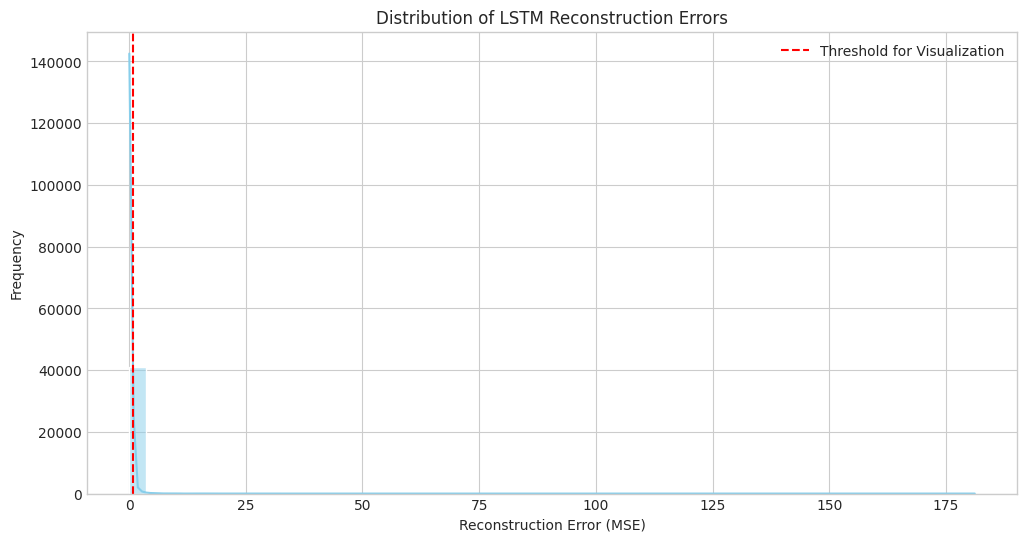


--- Generating Detailed Time-Series Plots for Top 5 Anomalies ---


Plotting Top Anomalies:   0%|          | 0/5 [00:00<?, ?it/s]


Visualizing anomaly for HSBA on 2015-05-06


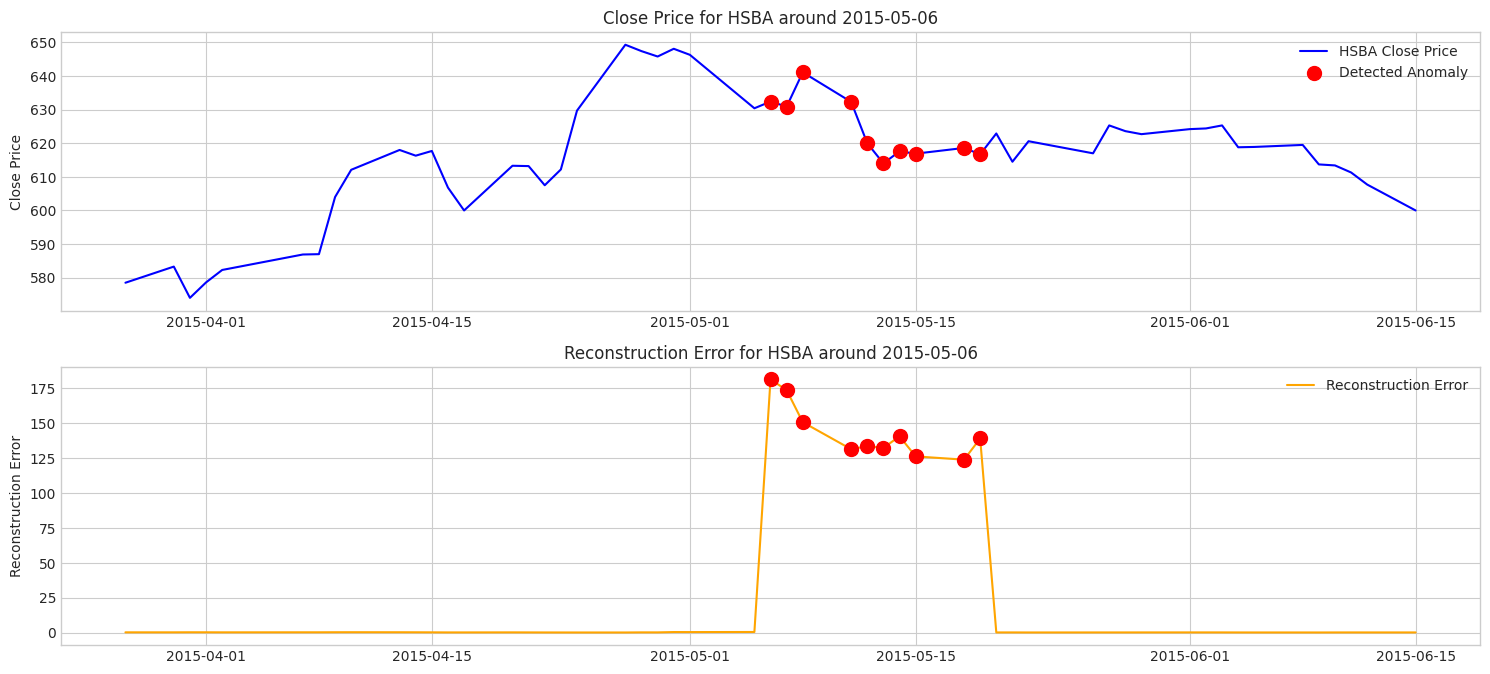

Plotting Top Anomalies:  20%|██        | 1/5 [00:00<00:01,  2.23it/s]


Visualizing anomaly for BP on 2019-12-17


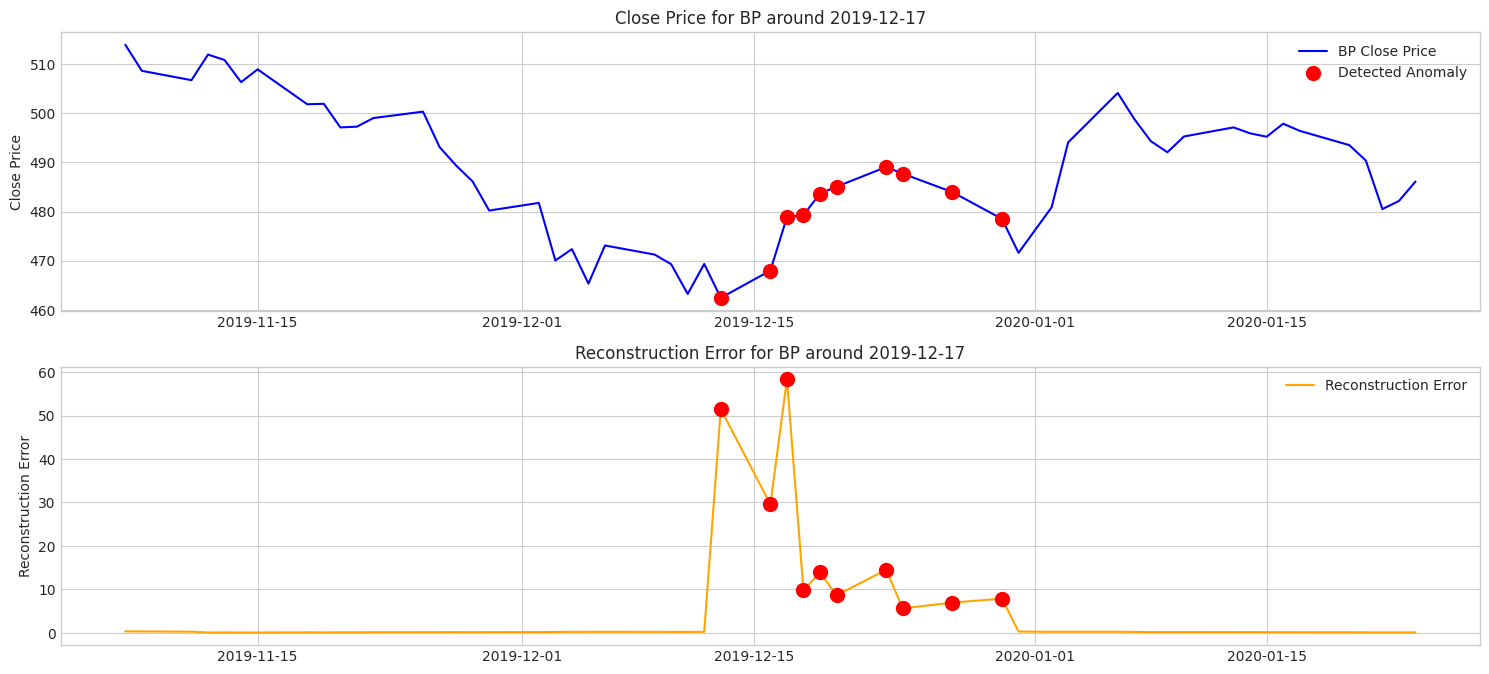

Plotting Top Anomalies:  40%|████      | 2/5 [00:00<00:01,  2.46it/s]


Visualizing anomaly for PRU on 2019-10-25


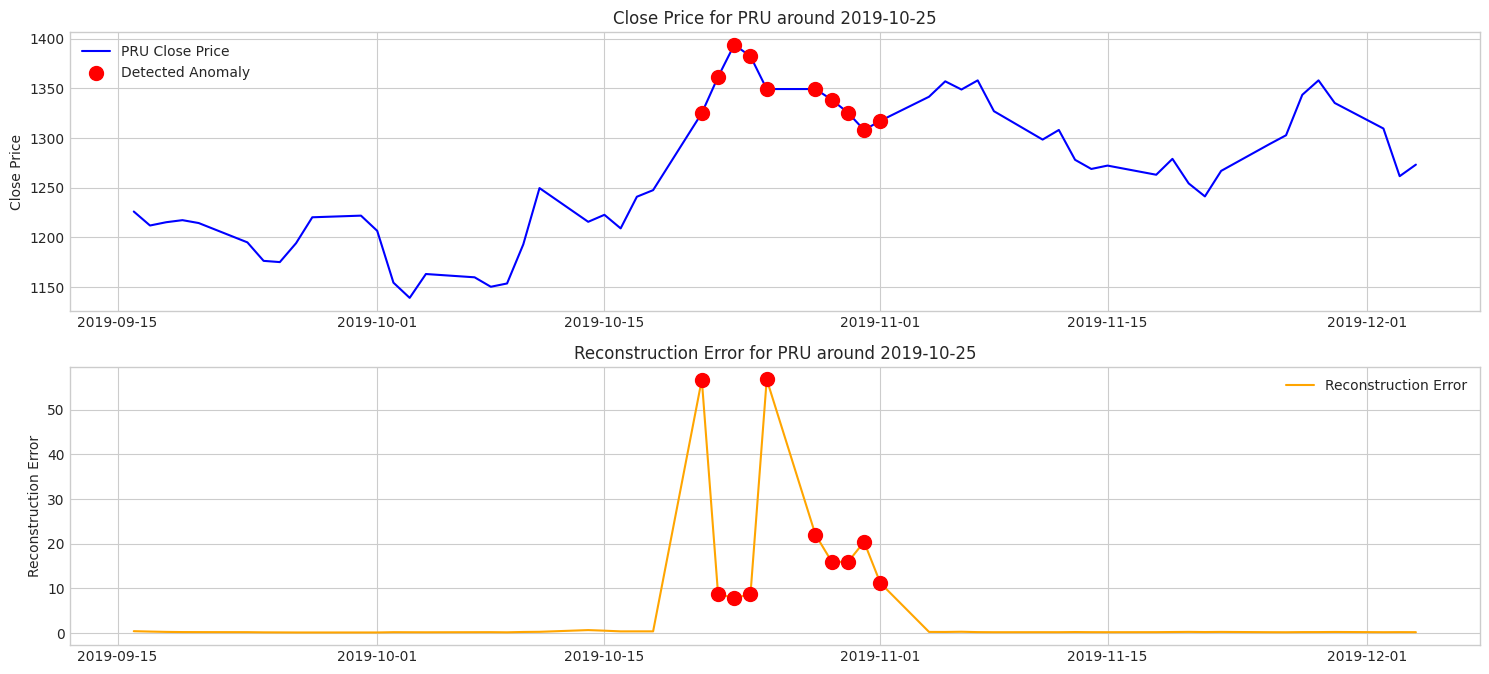

Plotting Top Anomalies:  60%|██████    | 3/5 [00:01<00:00,  2.51it/s]


Visualizing anomaly for NG on 2019-11-07


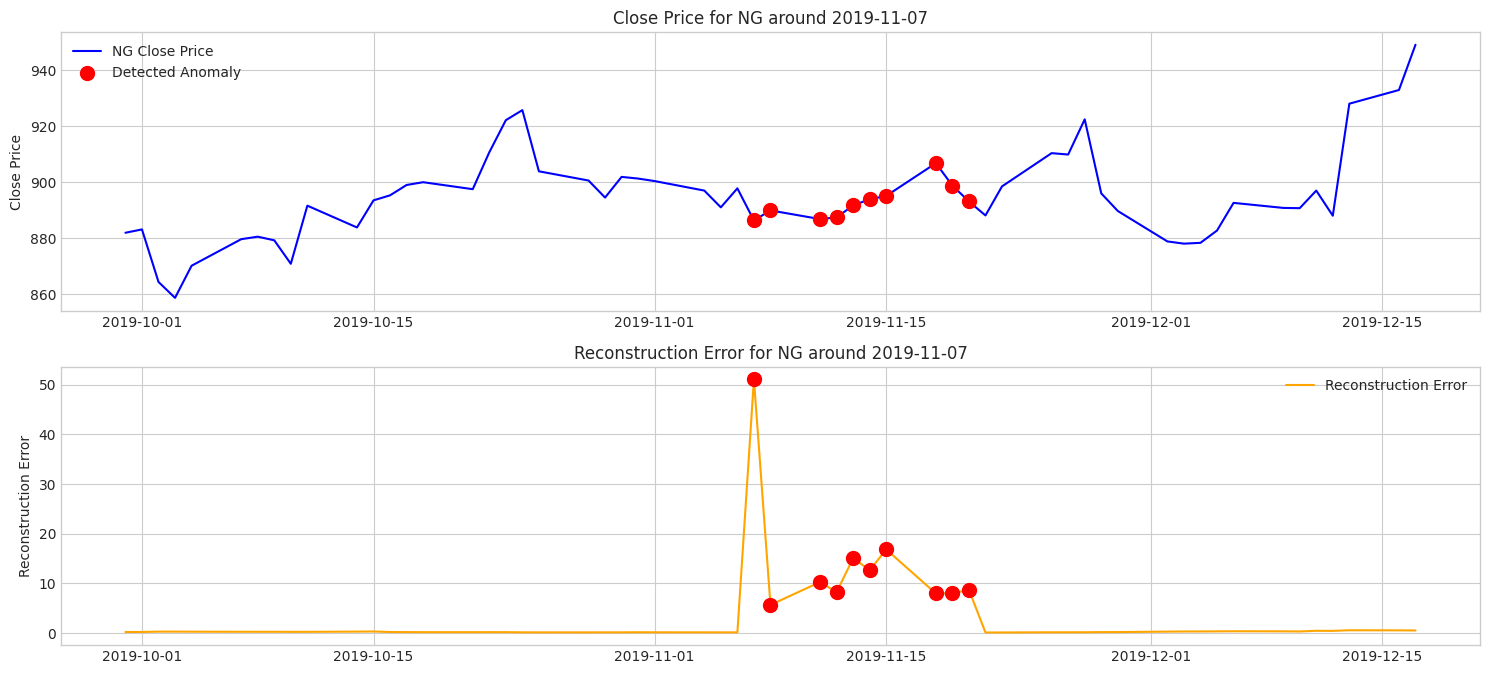

Plotting Top Anomalies:  80%|████████  | 4/5 [00:01<00:00,  2.49it/s]


Visualizing anomaly for BATS on 2019-12-06


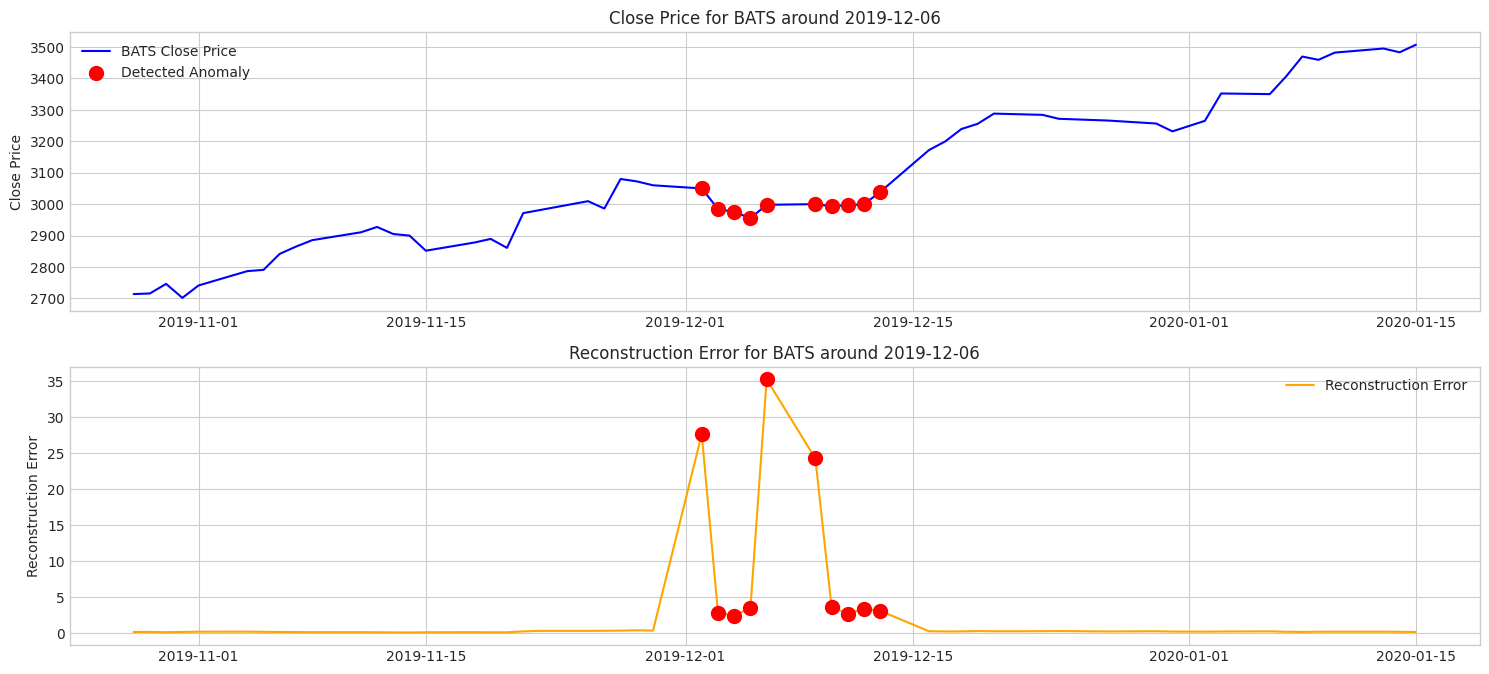

Plotting Top Anomalies: 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]


In [ ]:
  # Call the visualisation function for FTSE 100
visualise_lstm_results(
    full_data_with_anomalies_context=full100_lstm_results,
    anomalies_df_context=anomalies100_lstm_df,
    num_top_anomalies_to_plot=5,
    window_days_for_plot=40
)



--- Starting LSTM Anomaly Visualization ---

--- Generating Overall Error Distribution Plot ---


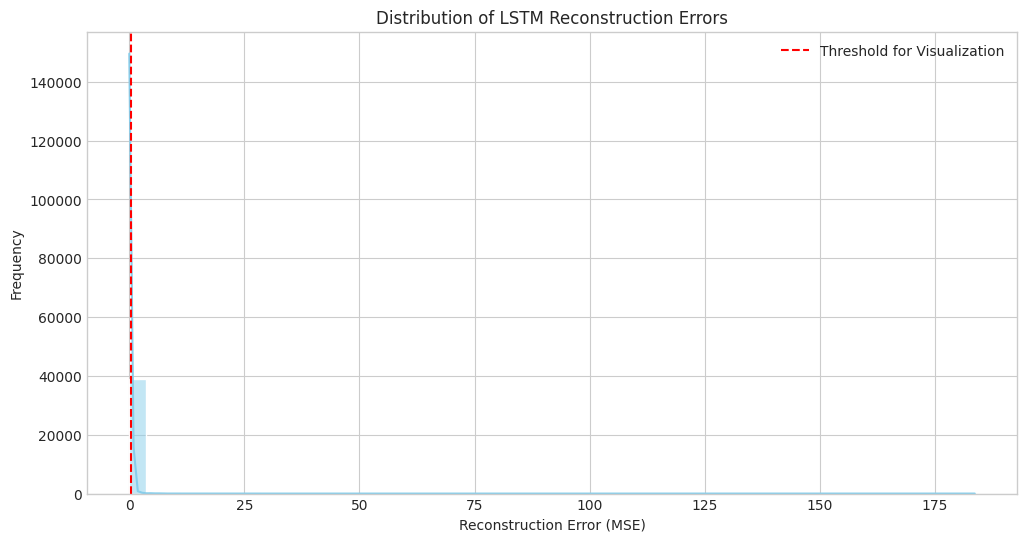


--- Generating Detailed Time-Series Plots for Top 5 Anomalies ---


Plotting Top Anomalies:   0%|          | 0/5 [00:00<?, ?it/s]


Visualizing anomaly for SRE on 2014-06-12


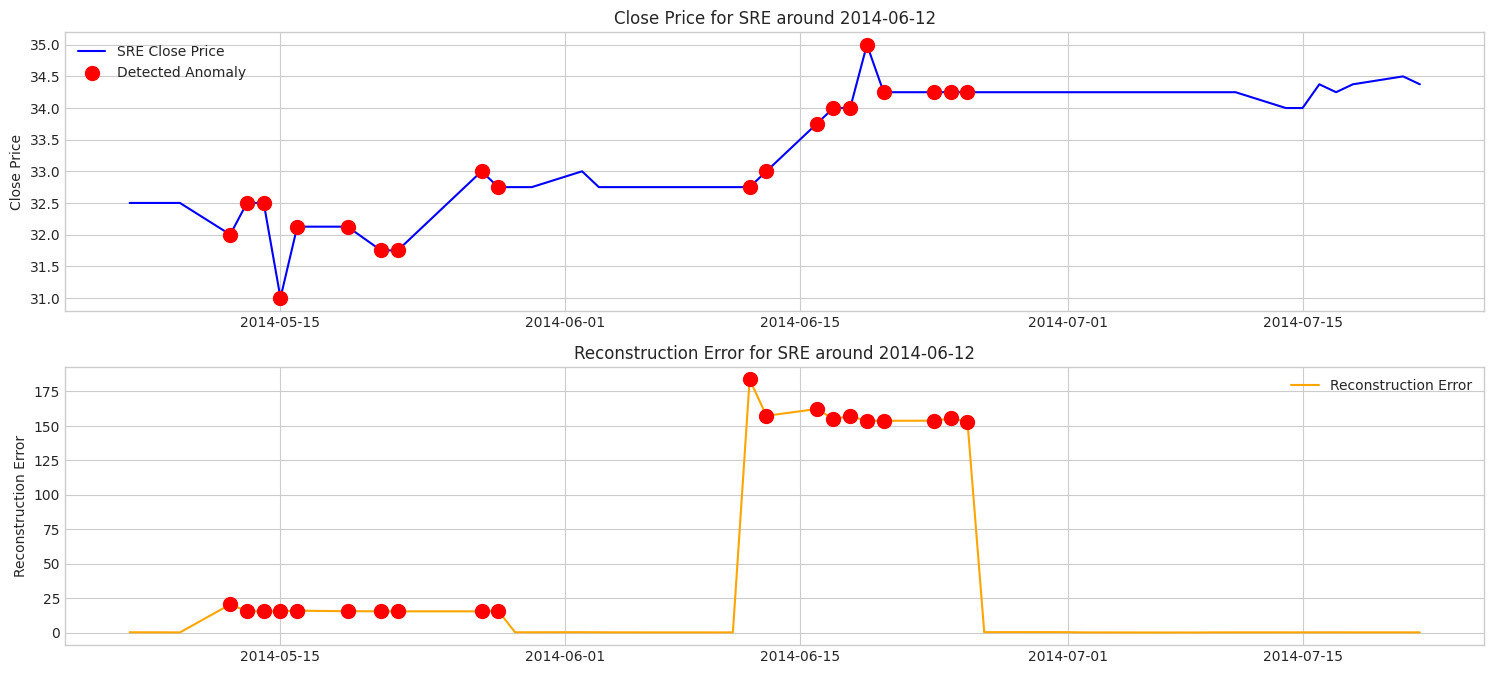

Plotting Top Anomalies:  20%|██        | 1/5 [00:00<00:01,  2.51it/s]


Visualizing anomaly for BWY on 2019-10-01


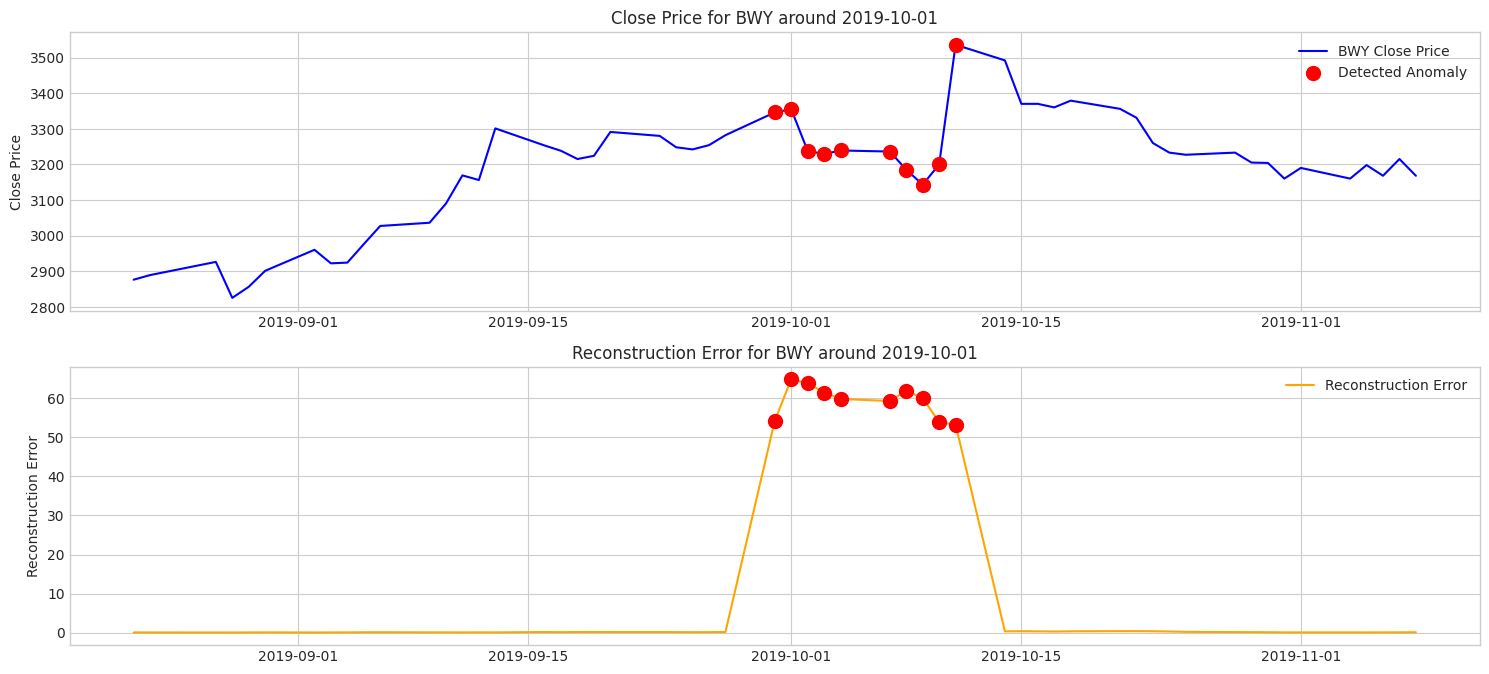

Plotting Top Anomalies:  40%|████      | 2/5 [00:00<00:01,  2.57it/s]


Visualizing anomaly for JUST on 2014-03-25


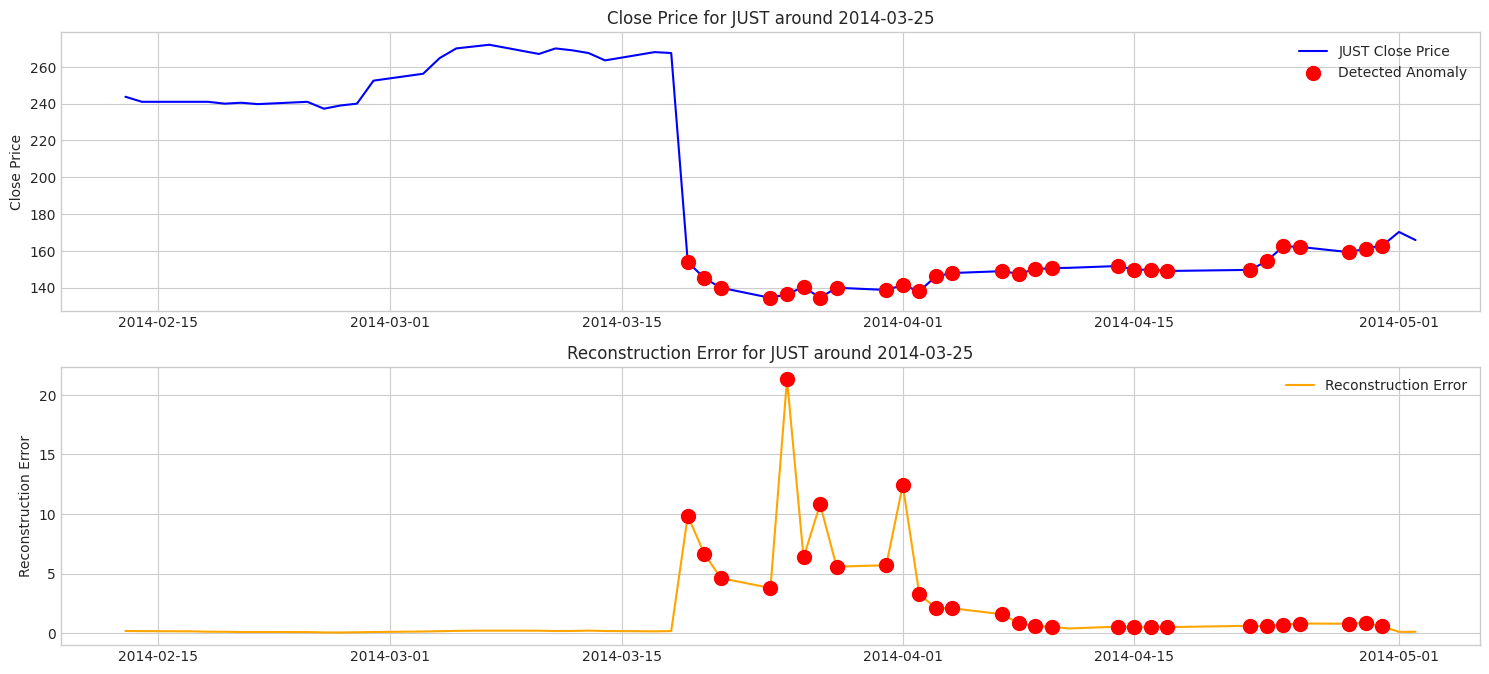

Plotting Top Anomalies:  60%|██████    | 3/5 [00:01<00:00,  2.58it/s]


Visualizing anomaly for HSX on 2020-10-15


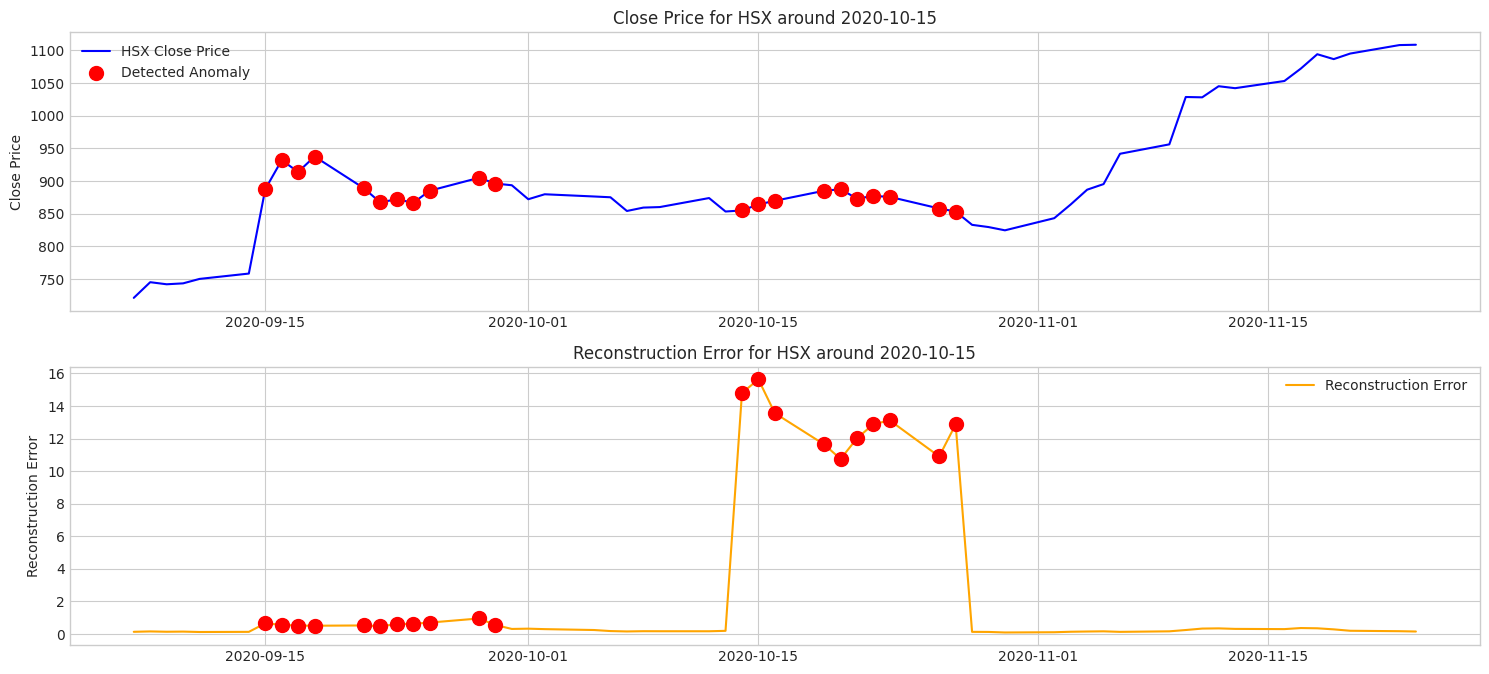

Plotting Top Anomalies:  80%|████████  | 4/5 [00:01<00:00,  2.56it/s]


Visualizing anomaly for THG on 2023-05-15


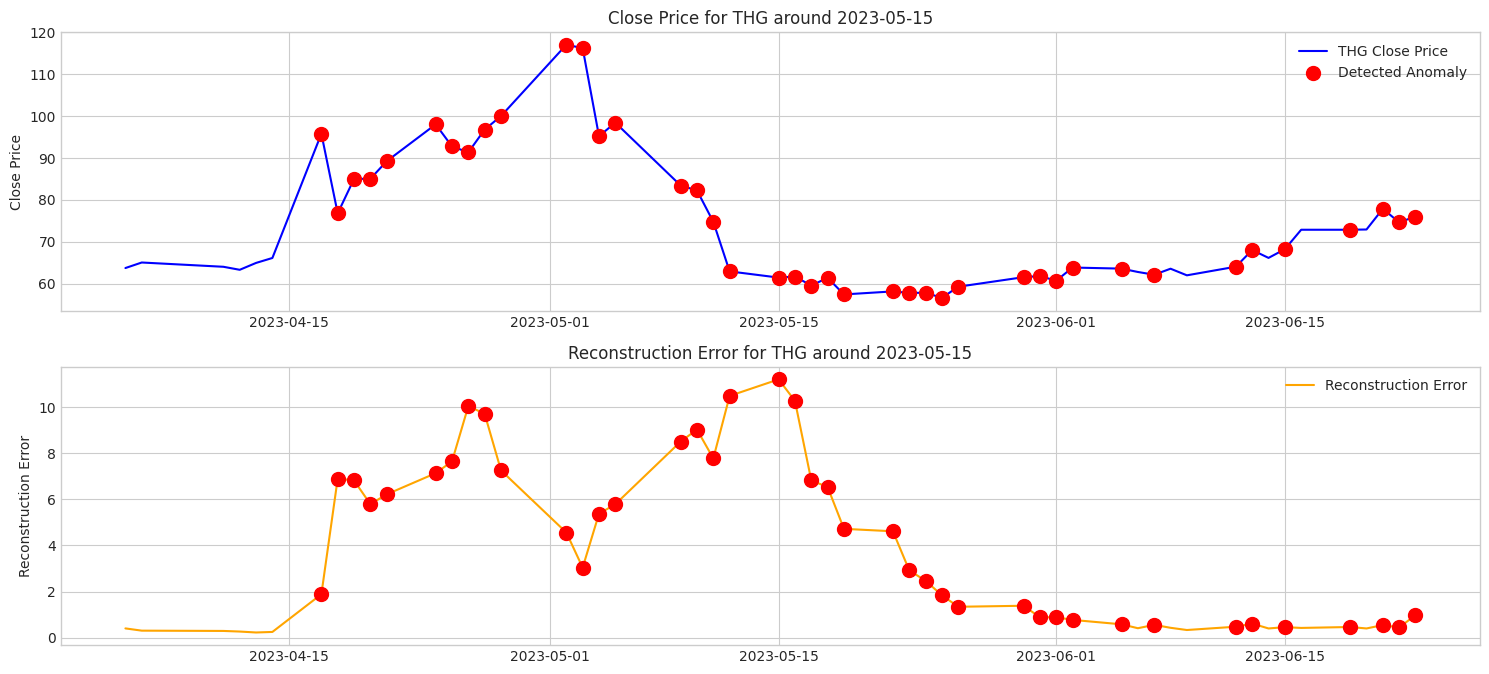

Plotting Top Anomalies: 100%|██████████| 5/5 [00:01<00:00,  2.58it/s]


In [ ]:


    # Call the visualization function
visualise_lstm_results(
    full_data_with_anomalies_context=full250_lstm_results,
    anomalies_df_context=anomalies250_lstm_df,
    num_top_anomalies_to_plot=5,
    window_days_for_plot=40
)


In [ ]:
!git commit -m "optimised the LSTM model and included functions to visualise anomalies"

In [ ]:
def plot_lstm_anomalies_bar_chart(ticker_max_errors: pd.DataFrame, num_to_plot: int = 10):
    """
    Plots a bar chart of the top N most anomalous tickers based on
    their maximum reconstruction error.

    Args:
        ticker_max_errors (pd.DataFrame): A DataFrame with 'Ticker' and
                                          'max_reconstruction_error' columns,
                                          typically the output of the
                                          summarise_lstm_anomalous_indices function.
        num_to_plot (int): The number of top tickers to display.
    """
    if ticker_max_errors.empty:
        print("Input DataFrame is empty. Cannot generate plot.")
        return

    # Sort and take the top N just in case the input isn't pre-sorted
    top_anomalies = ticker_max_errors.sort_values(
        by='max_reconstruction_error', ascending=False
    ).head(num_to_plot)

    # If the number of tickers is less than num_to_plot, adjust the title
    actual_num_plotted = len(top_anomalies)

    labels = top_anomalies['Ticker']
    values = top_anomalies['max_reconstruction_error']

    # Create the plot
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(14, 8))
    bars = ax.bar(labels, values, color='#2a9d8f')

    # Add labels and a title
    ax.set_title(
        f'Top {actual_num_plotted} Tickers by Maximum Reconstruction Error',
        fontsize=18, fontweight='bold'
    )
    ax.set_xlabel('Ticker', fontsize=12)
    ax.set_ylabel('Maximum Reconstruction Error', fontsize=12)
    ax.grid(False)

    # Add the reconstruction error value on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

def plot_lstm_distribution_pie_charts(
    train_errors: np.ndarray,
    val_errors: np.ndarray,
    test_errors: np.ndarray,
    anomaly_threshold: float
):
    """
    Creates pie charts showing the percentage of anomalies vs. normal data
    in each dataset split based on the LSTM reconstruction error.

    Args:
        train_errors (np.ndarray): 1D array of reconstruction errors for the training set.
        val_errors (np.ndarray): 1D array of reconstruction errors for the validation set.
        test_errors (np.ndarray): 1D array of reconstruction errors for the test set.
        anomaly_threshold (float): The threshold for defining anomalies.
    """
    datasets = {
        "Training Set": train_errors,
        "Validation Set": val_errors,
        "Test Set": test_errors
    }

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('LSTM Anomaly Distribution by Dataset Split', fontsize=20, fontweight='bold', y=1.05)
    colors = ['#f4a261', '#e76f51']

    for i, (name, errors) in enumerate(datasets.items()):
        if errors.size == 0:
            print(f"Skipping pie chart for {name} as there is no data.")
            continue

        # Count anomalies and non-anomalies based on the threshold
        num_anomalies = np.sum(errors > anomaly_threshold)
        num_normal = errors.size - num_anomalies

        sizes = [num_anomalies, num_normal]
        labels = [f'Anomalies ({num_anomalies})', f'Normal ({num_normal})']

        ax = axes[i]

        # Plot the pie chart
        wedges, texts, autotexts = ax.pie(
            sizes,
            labels=labels,
            autopct=lambda p: f'{p:.1f}%',
            colors=colors,
            startangle=90,
            wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'antialiased': True}
        )

        ax.set_title(name, fontsize=14, fontweight='bold')
        ax.axis('equal') # Ensures the pie chart is circular.

        # Adjust autopct text properties for better visibility
        for autotext in autotexts:
            autotext.set_fontsize(12)
            autotext.set_fontweight('bold')

    plt.tight_layout()
    plt.show()

Total LSTM anomalies detected: 2410
Plotting top anomalies by maximum reconstruction error:


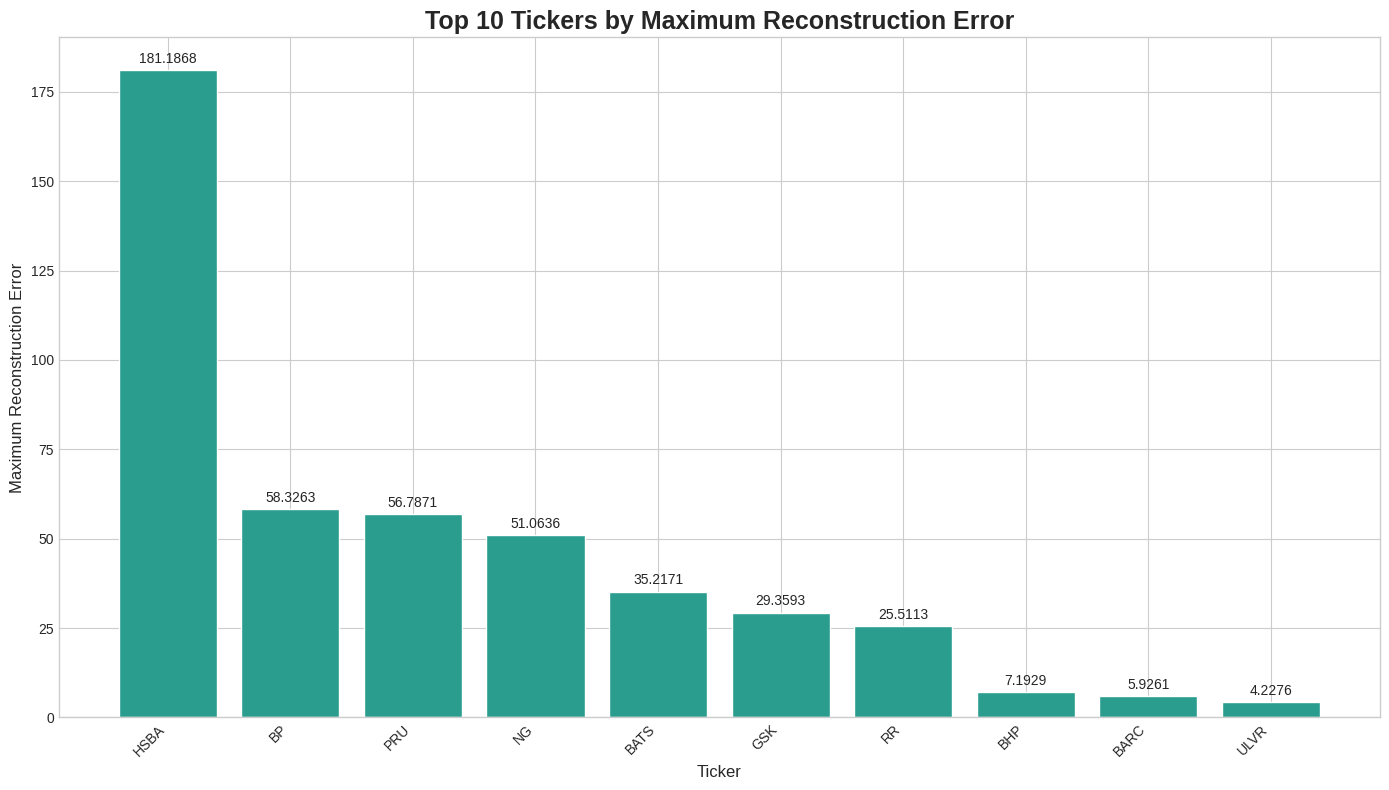


Calculating reconstruction errors...
902/902 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Plotting anomaly distribution across datasets:


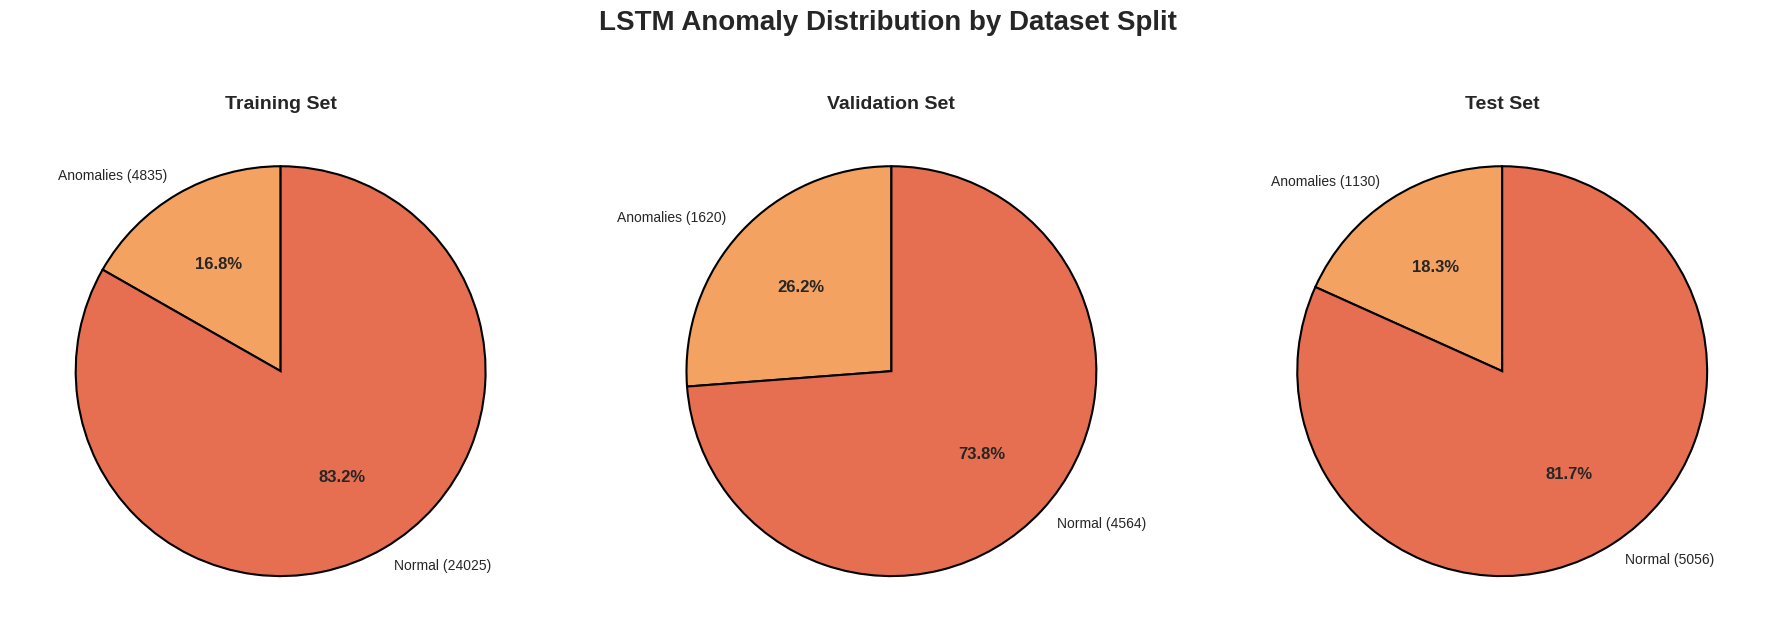

In [ ]:

# Assuming 'anomalies_df_context', 'train_df', 'val_df', 'test_df'
# and 'anomaly_threshold' are defined from your LSTM model pipeline.

 # First, get the summary data for the bar chart
total_anomalies, top_tickers = summarise_lstm_anomalous_indices(
    anomalies_df_context=anomalies100_lstm_df,
     num_top_indices=10
 )

# Then, plot the bar chart
print(f"Total LSTM anomalies detected: {total_anomalies}")
print("Plotting top anomalies by maximum reconstruction error:")
plot_lstm_anomalies_bar_chart(top_tickers)

# Calculate the reconstruction errors for each dataset
print("\nCalculating reconstruction errors...")
reconstruction_train_error = np.mean(np.abs(best_lstm_model.predict(X100_train) - X100_train), axis=(1, 2))
reconstruction_val_error = np.mean(np.abs(best_lstm_model.predict(X100_val) - X100_val), axis=(1, 2))
reconstruction_test_error = np.mean(np.abs(best_lstm_model.predict(X100_test) - X100_test), axis=(1, 2))

# Finally, plot the pie charts for distribution across splits
print("\nPlotting anomaly distribution across datasets:")
plot_lstm_distribution_pie_charts(
train_errors=reconstruction_train_error,
val_errors=reconstruction_val_error,
test_errors=reconstruction_test_error,
anomaly_threshold=threshold_lstm
)

Total LSTM anomalies detected: 2414
Plotting top anomalies by maximum reconstruction error:


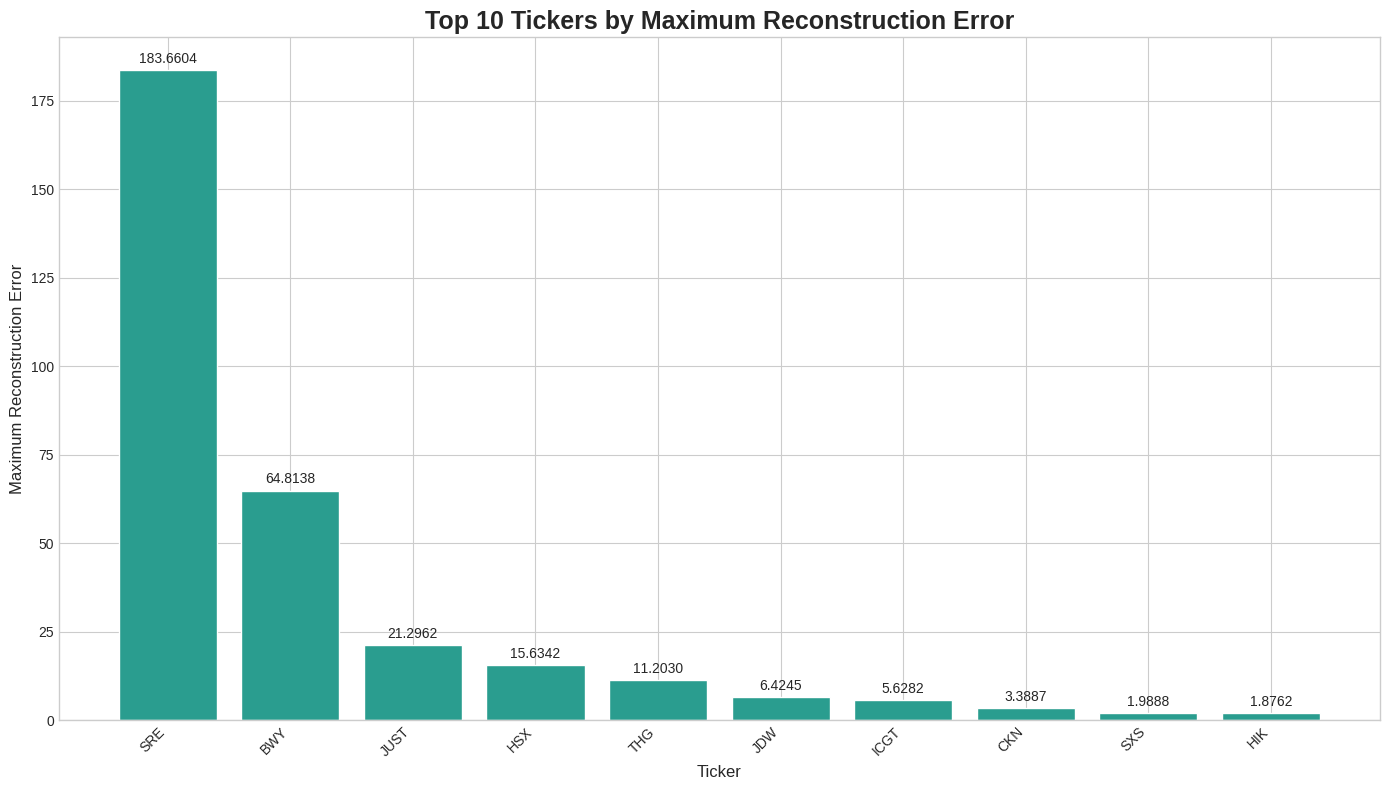


Calculating reconstruction errors...
854/854 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Plotting anomaly distribution across datasets:


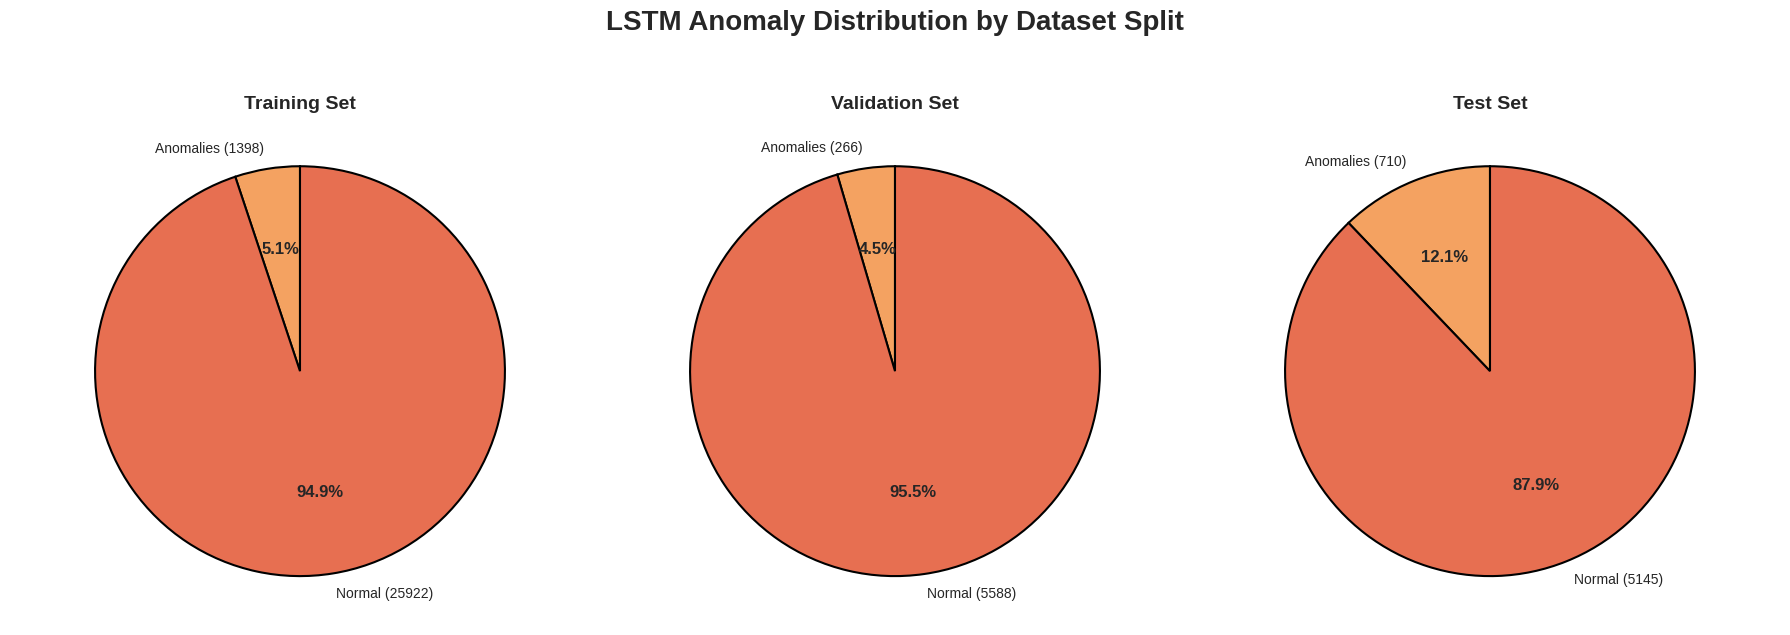

In [ ]:

# Assuming 'anomalies_df_context', 'train_df', 'val_df', 'test_df'
# and 'anomaly_threshold' are defined from your LSTM model pipeline.

 # First, get the summary data for the bar chart
total_anomalies, top_tickers = summarise_lstm_anomalous_indices(
    anomalies_df_context=anomalies250_lstm_df,
     num_top_indices=10
 )

# Then, plot the bar chart
print(f"Total LSTM anomalies detected: {total_anomalies}")
print("Plotting top anomalies by maximum reconstruction error:")
plot_lstm_anomalies_bar_chart(top_tickers)

# Calculate the reconstruction errors for each dataset
print("\nCalculating reconstruction errors...")
reconstruction_train_error = np.mean(np.abs(best_250_lstm_model.predict(X250_train) - X250_train), axis=(1, 2))
reconstruction_val_error = np.mean(np.abs(best_250_lstm_model.predict(X250_val) - X250_val), axis=(1, 2))
reconstruction_test_error = np.mean(np.abs(best_250_lstm_model.predict(X250_test) - X250_test), axis=(1, 2))

# Finally, plot the pie charts for distribution across splits
print("\nPlotting anomaly distribution across datasets:")
plot_lstm_distribution_pie_charts(
train_errors=reconstruction_train_error,
val_errors=reconstruction_val_error,
test_errors=reconstruction_test_error,
anomaly_threshold=threshold_lstm
)

In [ ]:



def plot_model_anomaly_comparison(anomaly_counts: dict):
    """
    Creates a grouped bar chart to compare anomaly counts across different
    models and datasets.

    Args:
        anomaly_counts (dict): A dictionary containing the anomaly counts.
                               Expected format:
                               {
                                   'FTSE 100': {'Isolation Forest': count, 'DBSCAN': count, 'LSTM': count},
                                   'FTSE 250': {'Isolation Forest': count, 'DBSCAN': count, 'LSTM': count}
                               }
    """
    # Convert the dictionary to a pandas DataFrame for easier plotting
    df = pd.DataFrame(anomaly_counts).T

    # Create the grouped bar chart
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 8))

    # Define bar positions and width for grouped bars
    x = np.arange(len(df.index))
    bar_width = 0.25

    # Plot each model as a separate set of bars
    bars1 = ax.bar(x - bar_width, df['Isolation Forest'], bar_width, label='Isolation Forest', color='#87CEFA')
    bars2 = ax.bar(x, df['DBSCAN'], bar_width, label='DBSCAN', color='#800080')
    bars3 = ax.bar(x + bar_width, df['LSTM'], bar_width, label='LSTM', color='#32CD32')

    # Set titles, labels, and ticks
    ax.set_title('Anomaly Count Comparison: FTSE 100 vs. FTSE 250', fontsize=18, fontweight='bold')
    ax.set_xlabel('Indices', fontsize=12)
    ax.set_ylabel('Total Anomaly Count', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(df.index)
    ax.legend(title='Model')
    ax.grid(False)

    # Function to add the count label on top of each bar
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

    # Add labels to all bar groups
    add_labels(bars1)
    add_labels(bars2)
    add_labels(bars3)


    plt.rcParams['font.family'] = 'Zapf Chancery'
    plt.tight_layout()
    plt.show()

# --- Example Usage ---
# You would replace this with your actual anomaly counts for each model and dataset.
# The counts should be the sum of anomalies from all data splits (train, val, test).
ftse_100_counts = {
    'Isolation Forest': 416,
    'DBSCAN': 5971,
    'LSTM': 7585
}

ftse_250_counts = {
    'Isolation Forest': 394,
    'DBSCAN': 7010,
    'LSTM': 2374
}

comparison_data = {
    'FTSE 100': ftse_100_counts,
    'FTSE 250': ftse_250_counts
}

# Call the function to generate the plot
plot_model_anomaly_comparison(comparison_data)

NameError: name 'pd' is not defined